<a href="https://colab.research.google.com/github/lushilima/Hidrologia/blob/main/precipitacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1XO6D7BCT8n_wRDVvyAUdmIS53fmJVyKf
To: /content/dados_temp.csv
100%|██████████| 368k/368k [00:00<00:00, 26.6MB/s]
/tmp/ipython-input-1181907037.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensal = serie_diaria.resample('M').sum()
/tmp/ipython-input-1181907037.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  contagem_dias_mes = serie_diaria.resample('M').count()
/tmp/ipython-input-1181907037.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tamanho_mes = serie_diaria.resample('M').size()
/tmp/ipython-input-1181907037.py:77: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  anual = serie_diaria.resample('Y').sum()
/tmp/ipython-input-1181907037.py:78: FutureWarning: 'Y' is deprecated and will be removed in a fu

Linha do cabeçalho detectada: 14
Colunas carregadas: ['EstacaoCodigo', 'NivelConsistencia', 'Data', 'TipoMedicaoChuvas', 'Maxima', 'Total', 'DiaMaxima', 'NumDiasDeChuva', 'MaximaStatus', 'TotalStatus', 'NumDiasDeChuvaStatus', 'TotalAnual', 'TotalAnualStatus', 'Chuva01', 'Chuva02', 'Chuva03', 'Chuva04', 'Chuva05', 'Chuva06', 'Chuva07', 'Chuva08', 'Chuva09', 'Chuva10', 'Chuva11', 'Chuva12', 'Chuva13', 'Chuva14', 'Chuva15', 'Chuva16', 'Chuva17', 'Chuva18', 'Chuva19', 'Chuva20', 'Chuva21', 'Chuva22', 'Chuva23', 'Chuva24', 'Chuva25', 'Chuva26', 'Chuva27', 'Chuva28', 'Chuva29', 'Chuva30', 'Chuva31', 'Chuva01Status', 'Chuva02Status', 'Chuva03Status', 'Chuva04Status', 'Chuva05Status', 'Chuva06Status', 'Chuva07Status', 'Chuva08Status', 'Chuva09Status', 'Chuva10Status', 'Chuva11Status', 'Chuva12Status', 'Chuva13Status', 'Chuva14Status', 'Chuva15Status', 'Chuva16Status', 'Chuva17Status', 'Chuva18Status', 'Chuva19Status', 'Chuva20Status', 'Chuva21Status', 'Chuva22Status', 'Chuva23Status', 'Chuva24

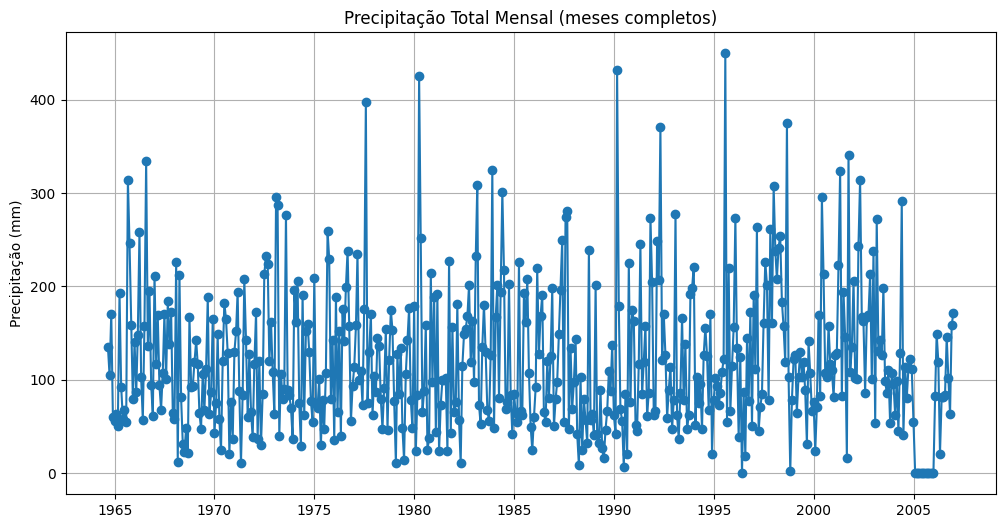

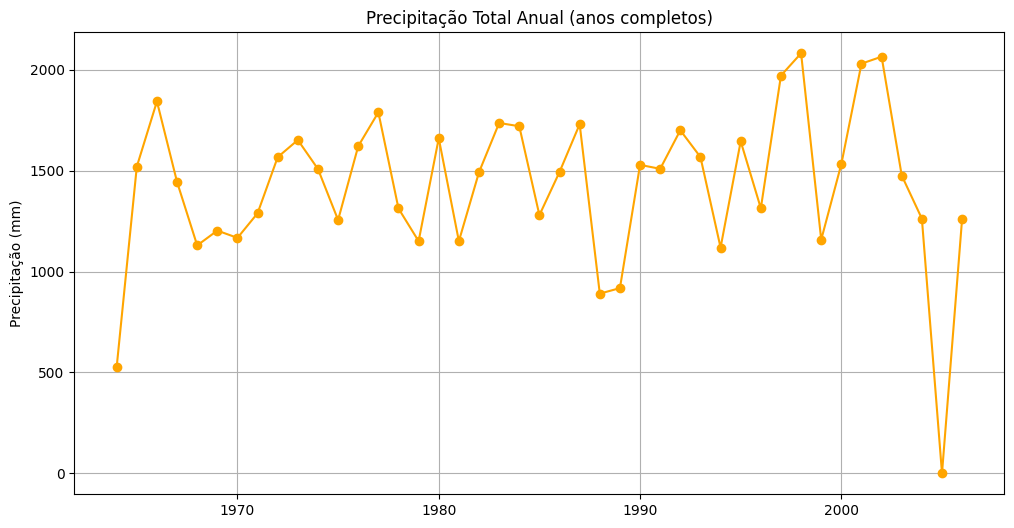


Descrição do comportamento da chuva:
- A precipitação anual média é de 1425.0 mm.
- O ano mais chuvoso teve 2081.9 mm, e o menos chuvoso 0.0 mm.
- Há variabilidade interanual clara, com anos mais secos e mais úmidos.
- A série mensal mostra sazonalidade, com meses de maior concentração de chuvas, conforme esperado na região.

📄 Descrição:
A precipitação anual média foi de 1425.0 mm, com máximo de 2081.9 mm e mínimo de 0.0 mm.
Observa-se variação interanual significativa e padrão sazonal claro nos meses completos.


In [ ]:
# --- Instalar gdown ---
!pip install gdown --quiet

import gdown
import pandas as pd
import matplotlib.pyplot as plt

# === Passo 1: Baixar o arquivo do Google Drive ===
drive_url = "https://drive.google.com/file/d/1XO6D7BCT8n_wRDVvyAUdmIS53fmJVyKf/view?usp=drive_link"
file_id = drive_url.split("/d/")[1].split("/")[0]
output_name = "dados_temp.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_name, quiet=False)

# === Passo 2: Detectar automaticamente a linha do cabeçalho ===
with open(output_name, 'r', encoding='latin1') as f:
    linhas = f.readlines()

header_line = None
for i, linha in enumerate(linhas):
    if linha.startswith("EstacaoCodigo;NivelConsistencia;Data"):
        header_line = i
        break

if header_line is None:
    raise ValueError("Não foi encontrada a linha do cabeçalho no arquivo.")

print(f"Linha do cabeçalho detectada: {header_line}")

# === Passo 3: Ler o CSV ===
df = pd.read_csv(
    output_name,
    sep=';',
    decimal=',',
    quotechar='"',
    encoding='latin1',
    skiprows=header_line
)

print("Colunas carregadas:", df.columns.tolist())
print(df.head())

# === Passo 4: Filtrar e preparar dados ===
if 'NivelConsistencia' in df.columns:
    df = df[df['NivelConsistencia'] == 2].copy()
    if df.empty:
        print("⚠ Nenhum dado com NivelConsistencia = 2. Usando todos os registros.")
        df = pd.read_csv(
            output_name,
            sep=';',
            decimal=',',
            quotechar='"',
            encoding='latin1',
            skiprows=header_line
        )
else:
    print("⚠ Coluna 'NivelConsistencia' não encontrada. Usando todos os registros.")

# Converter coluna Data
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')

# Converter Total para numérico
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Remover NaNs
df = df.dropna(subset=['Data', 'Total'])

# === Passo 5: Criar séries temporais ===
serie_diaria = df.set_index('Data')['Total'].sort_index()

# Mensal (meses completos)
mensal = serie_diaria.resample('M').sum()
contagem_dias_mes = serie_diaria.resample('M').count()
tamanho_mes = serie_diaria.resample('M').size()
mensal_sem_falhas = mensal[contagem_dias_mes == tamanho_mes]

# Anual (anos completos)
anual = serie_diaria.resample('Y').sum()
contagem_dias_ano = serie_diaria.resample('Y').count()
tamanho_ano = serie_diaria.resample('Y').size()
anual_sem_falhas = anual[contagem_dias_ano == tamanho_ano]

# === Passo 6: Estatísticas ===
def estatisticas_basicas(serie):
    return pd.Series({
        'Média': serie.mean(),
        'Mediana': serie.median(),
        'Máximo': serie.max(),
        'Mínimo': serie.min(),
        'Desvio Padrão': serie.std(),
        'Total acumulado': serie.sum()
    })

print("\n📊 Estatísticas - Série Diária:")
print(estatisticas_basicas(serie_diaria))

print("\n📊 Estatísticas - Série Mensal (meses completos):")
print(estatisticas_basicas(mensal_sem_falhas))

print("\n📊 Estatísticas - Série Anual (anos completos):")
print(estatisticas_basicas(anual_sem_falhas))

# === Passo 7: Gráficos ===
plt.figure(figsize=(12,6))
plt.plot(mensal_sem_falhas.index, mensal_sem_falhas.values, marker='o')
plt.title('Precipitação Total Mensal (meses completos)')
plt.ylabel('Precipitação (mm)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(anual_sem_falhas.index.year, anual_sem_falhas.values, marker='o', color='orange')
plt.title('Precipitação Total Anual (anos completos)')
plt.ylabel('Precipitação (mm)')
plt.grid(True)
plt.show()


# Breve descrição
print(f"\nDescrição do comportamento da chuva:")
print(f"- A precipitação anual média é de {anual_sem_falhas.mean():.1f} mm.")
print(f"- O ano mais chuvoso teve {anual_sem_falhas.max():.1f} mm, e o menos chuvoso {anual_sem_falhas.min():.1f} mm.")
print(f"- Há variabilidade interanual clara, com anos mais secos e mais úmidos.")
print(f"- A série mensal mostra sazonalidade, com meses de maior concentração de chuvas, conforme esperado na região.")


# === Passo 8: Resumo textual ===
print(f"\n📄 Descrição:")
print(f"A precipitação anual média foi de {anual_sem_falhas.mean():.1f} mm, "
      f"com máximo de {anual_sem_falhas.max():.1f} mm e mínimo de {anual_sem_falhas.min():.1f} mm.")
print("Observa-se variação interanual significativa e padrão sazonal claro nos meses completos.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# 📂 Caminho do CSV no Google Drive
csv_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'

# 🔍 Detectar a linha do cabeçalho (procura por 'EstacaoCodigo')
with open(csv_path, 'r', encoding='latin1') as f:
    linhas = f.readlines()

header_line = None
for i, linha in enumerate(linhas):
    if "EstacaoCodigo" in linha:
        header_line = i
        break

print(f"Linha do cabeçalho detectada: {header_line}")

# 📥 Ler CSV a partir do cabeçalho
df = pd.read_csv(
    csv_path,
    sep=';',
    decimal=',',
    encoding='latin1',
    skiprows=header_line
)

# 📅 Converter coluna Data
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')

# 📌 Pegar apenas Data e chuva diária
df_diario = df[['Data', 'Total']].copy()
df_diario.columns = ['Data', 'Chuva_mm']

# 💾 Salvar como Excel no mesmo diretório
output_path = '/content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria.xlsx'
df_diario.to_excel(output_path, index=False)

print(f"✅ Arquivo salvo em: {output_path}")



Linha do cabeçalho detectada: 14
✅ Arquivo salvo em: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria.xlsx


In [ ]:
import os
import pandas as pd

# Caminhos
csv_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'
output_dir = '/content/drive/MyDrive/hidrologia/precipitacao'
output_path = os.path.join(output_dir, 'chuva_diaria.xlsx')

# Criar a pasta se não existir
os.makedirs(output_dir, exist_ok=True)

# Detectar a linha do cabeçalho
with open(csv_path, 'r', encoding='latin1') as f:
    linhas = f.readlines()

header_line = None
for i, linha in enumerate(linhas):
    if "EstacaoCodigo" in linha:
        header_line = i
        break

print(f"Linha do cabeçalho detectada: {header_line}")

# Ler CSV
df = pd.read_csv(
    csv_path,
    sep=';',
    decimal=',',
    encoding='latin1',
    skiprows=header_line
)

# Converter data
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')

# Selecionar Data e chuva total
df_diario = df[['Data', 'Total']].copy()
df_diario.columns = ['Data', 'Chuva_mm']

# Salvar
df_diario.to_excel(output_path, index=False)
print(f"✅ Arquivo salvo em: {output_path}")


Linha do cabeçalho detectada: 14
✅ Arquivo salvo em: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria.xlsx


In [ ]:
import pandas as pd
import numpy as np
import os

# --- Etapa 1: Definição de Caminhos e Nomes dos Arquivos ---

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Nome do arquivo CSV de entrada
csv_input_file = '3152004_Chuvas.csv'

# Caminho completo do arquivo de entrada
input_path = os.path.join(pasta_raiz, csv_input_file)

# Nome do arquivo CSV de saída
csv_output_file = 'chuva_diaria_organizada.csv'

# --- Etapa 2: Funções de Processamento ---

def process_and_transpose_csv(input_file_path, output_file):
    """
    Lê um CSV de precipitação mensal (formato wide), o transpõe para uma
    série diária (formato long) e salva em um novo arquivo CSV.
    """
    print(f"\nProcessando o arquivo: {input_file_path}")

    try:
        # Lê o arquivo CSV
        df = pd.read_csv(input_file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"❌ Erro: O arquivo '{input_file_path}' não foi encontrado.")
        return

    # Inverte o DataFrame para ter a ordem cronológica correta
    df = df.iloc[::-1].copy()

    # Pega as colunas de dados de chuva e as colunas de status
    chuva_cols = [col for col in df.columns if col.startswith('Chuva') and 'Status' not in col]
    status_cols = [col for col in df.columns if col.startswith('Chuva') and 'Status' in col]
    id_vars = [col for col in df.columns if col not in chuva_cols and col not in status_cols]

    # Prepara os DataFrames para o melt
    df_chuva = df.melt(id_vars=id_vars, value_vars=chuva_cols, var_name='DiaStr', value_name='Precipitacao')
    df_status = df.melt(id_vars=id_vars, value_vars=status_cols, var_name='DiaStatusStr', value_name='Status')

    # Alinha os DataFrames derretidos e combina-os
    df_status['DiaStr'] = df_status['DiaStatusStr'].str.replace('Status', '')
    df_final = pd.merge(df_chuva, df_status[['EstacaoCodigo', 'Data', 'DiaStr', 'Status']],
                        on=['EstacaoCodigo', 'Data', 'DiaStr'], how='left')

    # Cria a data completa
    df_final['Data'] = pd.to_datetime(df_final['Data'], format='%d/%m/%Y', errors='coerce')
    df_final['Dia'] = df_final['DiaStr'].str.replace('Chuva', '').astype(int)
    df_final['DataCompleta'] = pd.to_datetime(dict(year=df_final['Data'].dt.year, month=df_final['Data'].dt.month, day=df_final['Dia']), errors='coerce')

    # Filtra as colunas finais e salva o CSV
    df_final = df_final[['DataCompleta', 'Precipitacao', 'Status', 'EstacaoCodigo']].dropna(subset=['DataCompleta'])
    df_final = df_final.sort_values(by='DataCompleta')

    df_final.to_csv(os.path.join(pasta_raiz, output_file), index=False)

    print(f"✅ Arquivo '{os.path.join(pasta_raiz, output_file)}' criado com sucesso com os dados diários organizados.")
    print("\n--- Primeiros registros do arquivo final ---")
    print(df_final.head())
    print("\n--- Últimos registros do arquivo final ---")
    print(df_final.tail())
    print(f"\nAnálise concluída. O arquivo '{os.path.join(pasta_raiz, output_file)}' está pronto.")

# --- Etapa 3: Execução ---
process_and_transpose_csv(input_path, csv_output_file)


Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv
✅ Arquivo '/content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada.csv' criado com sucesso com os dados diários organizados.

--- Primeiros registros do arquivo final ---
    DataCompleta  Precipitacao  Status  EstacaoCodigo
0     1967-01-01           0.7       1        3152004
167   1967-01-02          19.8       1        3152004
334   1967-01-03          19.2       1        3152004
501   1967-01-04          11.7       1        3152004
668   1967-01-05           0.0       1        3152004

--- Últimos registros do arquivo final ---
     DataCompleta  Precipitacao  Status  EstacaoCodigo
4341   1981-04-26           0.0       1        3152004
4508   1981-04-27           0.0       1        3152004
4675   1981-04-28           0.0       1        3152004
4842   1981-04-29          24.0       1        3152004
5009   1981-04-30           0.0       1        3152004

Análise concluída. O arqu

In [ ]:
import pandas as pd
import numpy as np
import os

# --- Etapa 1: Definição de Caminhos e Nomes dos Arquivos ---

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Lista dos arquivos CSV a serem processados
csv_input_files = [
    '3152004_Chuvas.csv',
    '3152011_Chuvas.csv',
    '3152016_Chuvas.csv'
]

# --- Etapa 2: Funções de Processamento ---

def process_and_transpose_csv(input_file_path, output_file_name):
    """
    Lê um CSV de precipitação mensal (formato wide), o transpõe para uma
    série diária (formato long) e salva em um novo arquivo CSV.
    """
    print(f"\nProcessando o arquivo: {input_file_path}")

    try:
        # Lê o arquivo CSV
        df = pd.read_csv(input_file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"❌ Erro: O arquivo '{input_file_path}' não foi encontrado.")
        return

    # Inverte o DataFrame para ter a ordem cronológica correta
    df = df.iloc[::-1].copy()

    # Pega as colunas de dados de chuva e as colunas de status
    chuva_cols = [col for col in df.columns if col.startswith('Chuva') and 'Status' not in col]
    status_cols = [col for col in df.columns if col.startswith('Chuva') and 'Status' in col]
    id_vars = [col for col in df.columns if col not in chuva_cols and col not in status_cols]

    # Prepara os DataFrames para o melt
    df_chuva = df.melt(id_vars=id_vars, value_vars=chuva_cols, var_name='DiaStr', value_name='Precipitacao')
    df_status = df.melt(id_vars=id_vars, value_vars=status_cols, var_name='DiaStatusStr', value_name='Status')

    # Alinha os DataFrames derretidos e combina-os
    df_status['DiaStr'] = df_status['DiaStatusStr'].str.replace('Status', '')
    df_final = pd.merge(df_chuva, df_status[['EstacaoCodigo', 'Data', 'DiaStr', 'Status']],
                        on=['EstacaoCodigo', 'Data', 'DiaStr'], how='left')

    # Cria a data completa
    df_final['Data'] = pd.to_datetime(df_final['Data'], format='%d/%m/%Y', errors='coerce')
    df_final['Dia'] = df_final['DiaStr'].str.replace('Chuva', '').astype(int)
    df_final['DataCompleta'] = pd.to_datetime(dict(year=df_final['Data'].dt.year, month=df_final['Data'].dt.month, day=df_final['Dia']), errors='coerce')

    # Filtra as colunas finais e salva o CSV
    df_final = df_final[['DataCompleta', 'Precipitacao', 'Status', 'EstacaoCodigo']].dropna(subset=['DataCompleta'])
    df_final = df_final.sort_values(by='DataCompleta')

    output_path = os.path.join(pasta_raiz, output_file_name)
    df_final.to_csv(output_path, index=False)

    print(f"✅ Arquivo '{output_path}' criado com sucesso com os dados diários organizados.")
    print("\n--- Primeiros registros do arquivo final ---")
    print(df_final.head())
    print("\n--- Últimos registros do arquivo final ---")
    print(df_final.tail())
    print(f"\nProcessamento de '{input_file_path}' concluído.")

# --- Etapa 3: Execução para todas as estações ---
for file_name in csv_input_files:
    # Cria um nome de arquivo de saída único para cada estação
    estacao_codigo = file_name.split('_')[0]
    output_file_name = f'chuva_diaria_organizada_{estacao_codigo}.csv'

    input_file_path = os.path.join(pasta_raiz, file_name)
    process_and_transpose_csv(input_file_path, output_file_name)


Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv
✅ Arquivo '/content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152004.csv' criado com sucesso com os dados diários organizados.

--- Primeiros registros do arquivo final ---
    DataCompleta  Precipitacao  Status  EstacaoCodigo
0     1967-01-01           0.7       1        3152004
167   1967-01-02          19.8       1        3152004
334   1967-01-03          19.2       1        3152004
501   1967-01-04          11.7       1        3152004
668   1967-01-05           0.0       1        3152004

--- Últimos registros do arquivo final ---
     DataCompleta  Precipitacao  Status  EstacaoCodigo
4341   1981-04-26           0.0       1        3152004
4508   1981-04-27           0.0       1        3152004
4675   1981-04-28           0.0       1        3152004
4842   1981-04-29          24.0       1        3152004
5009   1981-04-30           0.0       1        3152004

Processamento de 

In [ ]:
import pandas as pd
import numpy as np
import os

# --- Etapa 1: Definição de Caminhos e Nomes dos Arquivos ---

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Lista dos arquivos CSV a serem processados
csv_input_files = [
    '3152004_Chuvas.csv',
    '3152011_Chuvas.csv',
    '3152016_Chuvas.csv'
]

# --- Etapa 2: Funções de Processamento ---

def process_and_transpose_csv(input_file_path, output_file_name):
    """
    Lê um CSV de precipitação mensal (formato wide), o transpõe para uma
    série diária (formato long) e salva em um novo arquivo CSV.
    Esta versão inclui a remoção de duplicatas de datas.
    """
    print(f"\nProcessando o arquivo: {input_file_path}")

    try:
        df = pd.read_csv(input_file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"❌ Erro: O arquivo '{input_file_path}' não foi encontrado.")
        return

    # Inverte o DataFrame para ter a ordem cronológica correta
    df = df.iloc[::-1].reset_index(drop=True)

    # Pega as colunas de dados de chuva e as colunas de status
    chuva_cols = [col for col in df.columns if col.startswith('Chuva') and 'Status' not in col]
    status_cols = [col for col in df.columns if col.startswith('Chuva') and 'Status' in col]
    id_vars = [col for col in df.columns if col not in chuva_cols and col not in status_cols]

    # Prepara os DataFrames para o melt
    df_chuva = df.melt(id_vars=id_vars, value_vars=chuva_cols, var_name='DiaStr', value_name='Precipitacao')
    df_status = df.melt(id_vars=id_vars, value_vars=status_cols, var_name='DiaStatusStr', value_name='Status')

    # Alinha os DataFrames derretidos e combina-os
    df_status['DiaStr'] = df_status['DiaStatusStr'].str.replace('Status', '')
    df_final = pd.merge(df_chuva, df_status[['EstacaoCodigo', 'Data', 'DiaStr', 'Status']],
                        on=['EstacaoCodigo', 'Data', 'DiaStr'], how='left')

    # Cria a data completa
    df_final['Data'] = pd.to_datetime(df_final['Data'], format='%d/%m/%Y', errors='coerce')
    df_final['Dia'] = df_final['DiaStr'].str.replace('Chuva', '').astype(int)
    df_final['DataCompleta'] = pd.to_datetime(dict(year=df_final['Data'].dt.year, month=df_final['Data'].dt.month, day=df_final['Dia']), errors='coerce')

    # Filtra as colunas finais e remove duplicatas de datas
    df_final = df_final[['DataCompleta', 'Precipitacao', 'Status', 'EstacaoCodigo']].dropna(subset=['DataCompleta'])
    df_final = df_final.drop_duplicates(subset=['DataCompleta'], keep='last')
    df_final = df_final.sort_values(by='DataCompleta')

    output_path = os.path.join(pasta_raiz, output_file_name)
    df_final.to_csv(output_path, index=False)

    print(f"✅ Arquivo '{output_path}' criado com sucesso com os dados diários organizados e sem duplicatas.")
    print("\n--- Primeiros registros do arquivo final ---")
    print(df_final.head())
    print("\n--- Últimos registros do arquivo final ---")
    print(df_final.tail())
    print(f"\nProcessamento de '{input_file_path}' concluído.")

# --- Etapa 3: Execução para todas as estações ---
for file_name in csv_input_files:
    estacao_codigo = file_name.split('_')[0]
    output_file_name = f'chuva_diaria_organizada_{estacao_codigo}.csv'

    input_file_path = os.path.join(pasta_raiz, file_name)
    process_and_transpose_csv(input_file_path, output_file_name)


Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv
✅ Arquivo '/content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152004.csv' criado com sucesso com os dados diários organizados e sem duplicatas.

--- Primeiros registros do arquivo final ---
    DataCompleta  Precipitacao  Status  EstacaoCodigo
0     1967-01-01           0.7       1        3152004
167   1967-01-02          19.8       1        3152004
334   1967-01-03          19.2       1        3152004
501   1967-01-04          11.7       1        3152004
668   1967-01-05           0.0       1        3152004

--- Últimos registros do arquivo final ---
     DataCompleta  Precipitacao  Status  EstacaoCodigo
4341   1981-04-26           0.0       1        3152004
4508   1981-04-27           0.0       1        3152004
4675   1981-04-28           0.0       1        3152004
4842   1981-04-29          24.0       1        3152004
5009   1981-04-30           0.0       1        3152004




Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152016.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152004.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152011.csv

📊 Estatísticas - Série Diária Original (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Diária Preenchida (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Mensal Preenchida (Ponte):
Média                 91.059362
Mediana               77.650000
Máximo               693.400000
Mínimo            

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



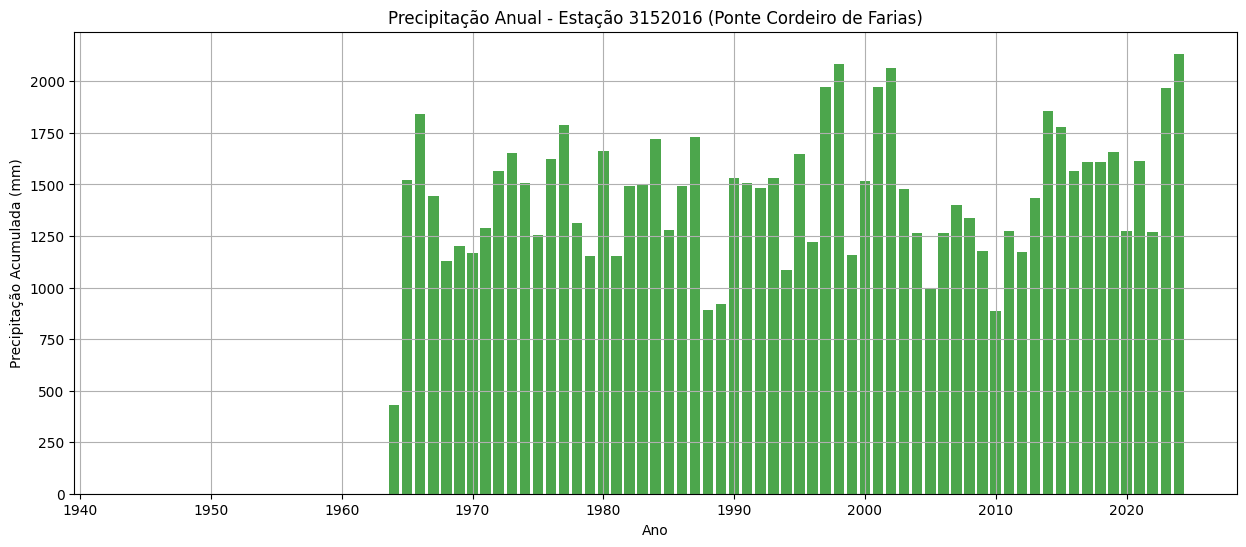

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# --- Etapa 1: Caminhos e Arquivos ---
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

csv_files = {
    '3152004': 'chuva_diaria_organizada_3152004.csv',
    '3152011': 'chuva_diaria_organizada_3152011.csv',
    '3152016': 'chuva_diaria_organizada_3152016.csv'
}

station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

# --- Etapa 2: Funções ---
def process_daily_series(file_name, station_id):
    file_path = os.path.join(pasta_raiz, file_name)
    print(f"\nProcessando o arquivo: {file_path}")
    try:
        df = pd.read_csv(file_path, sep=',', encoding='utf-8')
    except FileNotFoundError:
        print(f"❌ Erro: Arquivo não encontrado: {file_path}")
        return pd.Series(dtype='float64')

    df['DataCompleta'] = pd.to_datetime(df['DataCompleta'], errors='coerce')
    df = df.dropna(subset=['DataCompleta'])
    series = df.set_index('DataCompleta')['Precipitacao'].sort_index()
    return series

def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})
    treino_mul = df.dropna()
    modelo_mul = None
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])
        falhas_preenchiveis = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if falhas_preenchiveis.any():
            df.loc[falhas_preenchiveis, 'alvo'] = modelo_mul.predict(df.loc[falhas_preenchiveis, ['viz1', 'viz2']])
    # garante que mantém o índice original da série alvo
    return df['alvo'].reindex(s_alvo.index), modelo_mul

def estatisticas_basicas(serie, nome):
    print(f"\n📊 Estatísticas - {nome}:")
    if not serie.empty:
        s_limpa = pd.to_numeric(serie, errors='coerce').dropna()
        if not s_limpa.empty:
            print(pd.Series({
                'Média': s_limpa.mean(),
                'Mediana': s_limpa.median(),
                'Máximo': s_limpa.max(),
                'Mínimo': s_limpa.min(),
                'Desvio Padrão': s_limpa.std(),
                'Total acumulado': s_limpa.sum()
            }))
        else:
            print("Série vazia após remoção de NaN.")
    else:
        print("Série completamente vazia.")

# --- Etapa 3: Execução ---
series_ponte = process_daily_series(csv_files['3152016'], '3152016')
series_cascata = process_daily_series(csv_files['3152004'], '3152004')
series_terceira = process_daily_series(csv_files['3152011'], '3152011')

df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
})

series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Séries agregadas
serie_mensal_preenchida = series_ponte_preenchida.resample('ME').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('YE').sum()

# Estatísticas
estatisticas_basicas(series_ponte, 'Série Diária Original (Ponte)')
estatisticas_basicas(series_ponte_preenchida, 'Série Diária Preenchida (Ponte)')
estatisticas_basicas(serie_mensal_preenchida, 'Série Mensal Preenchida (Ponte)')
estatisticas_basicas(serie_anual_preenchida, 'Série Anual Preenchida (Ponte)')

# Diagnóstico de falhas (corrigido para nunca dar negativo)
falhas_totais = series_ponte.isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = max(falhas_totais - falhas_remanescentes, 0)

print(f"\n--- Diagnóstico de Falhas ---")
print(f"Total de falhas originais na série Ponte: {falhas_totais}")
print(f"Total de falhas preenchidas pela regressão: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: {falhas_remanescentes} falhas não foram preenchidas.")

# --- Etapa 4: Gráficos ---

# Gráfico de regressão
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    df_treino = df_combined.dropna(subset=['ponte', 'cascata', 'terceira'])
    if not df_treino.empty:
        # Usa .values para evitar erro de nomes de colunas diferentes
        r2_score = modelo_regressao.score(
            df_treino[['cascata', 'terceira']].values,
            df_treino['ponte'].values
        )

        axs[0].scatter(df_treino['cascata'], df_treino['ponte'], alpha=0.6, label='Dados de Treino')
        axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
        axs[0].set_xlabel(station_names["3152004"])
        axs[0].set_ylabel(station_names["3152016"])
        axs[0].legend()
        axs[0].grid(True)

        axs[1].scatter(df_treino['terceira'], df_treino['ponte'], alpha=0.6, label='Dados de Treino')
        axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
        axs[1].set_xlabel(station_names["3152011"])
        axs[1].set_ylabel(station_names["3152016"])
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(pasta_raiz, 'regressao_multipla.png'))
        plt.close()


# Gráfico da série diária
if not series_ponte.empty:
    plt.figure(figsize=(15, 6))
    plt.plot(series_ponte.dropna().index, series_ponte.dropna().values, 'bo', markersize=3, label='Dados Originais')
    # Alinha antes de filtrar
    series_ponte_preenchida = series_ponte_preenchida.reindex(series_ponte.index)
    preenchidos = series_ponte_preenchida.loc[series_ponte.index[series_ponte.isna()]]
    if not preenchidos.empty:
        plt.plot(preenchidos.index, preenchidos, 'go', markersize=3, label='Dados Preenchidos')
    plt.title(f'Precipitação Diária - {station_names["3152016"]}')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_diaria_preenchida.png'))
    plt.close()

# Gráfico mensal
if not serie_mensal_preenchida.empty:
    plt.figure(figsize=(15, 6))
    plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal - {station_names["3152016"]}')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_mensal_preenchida.png'))
    plt.close()

# Gráfico anual
if not serie_anual_preenchida.empty:
    plt.figure(figsize=(15, 6))
    plt.bar(serie_anual_preenchida.index.year, serie_anual_preenchida, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual - {station_names["3152016"]}')
    plt.xlabel('Ano')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)



Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152016.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152004.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152011.csv

📊 Estatísticas - Série Diária Original (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Diária Preenchida (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

--- Diagnóstico ---
Falhas originais: 116
Falhas preenchidas: -2256
Falhas remanescentes: 2372


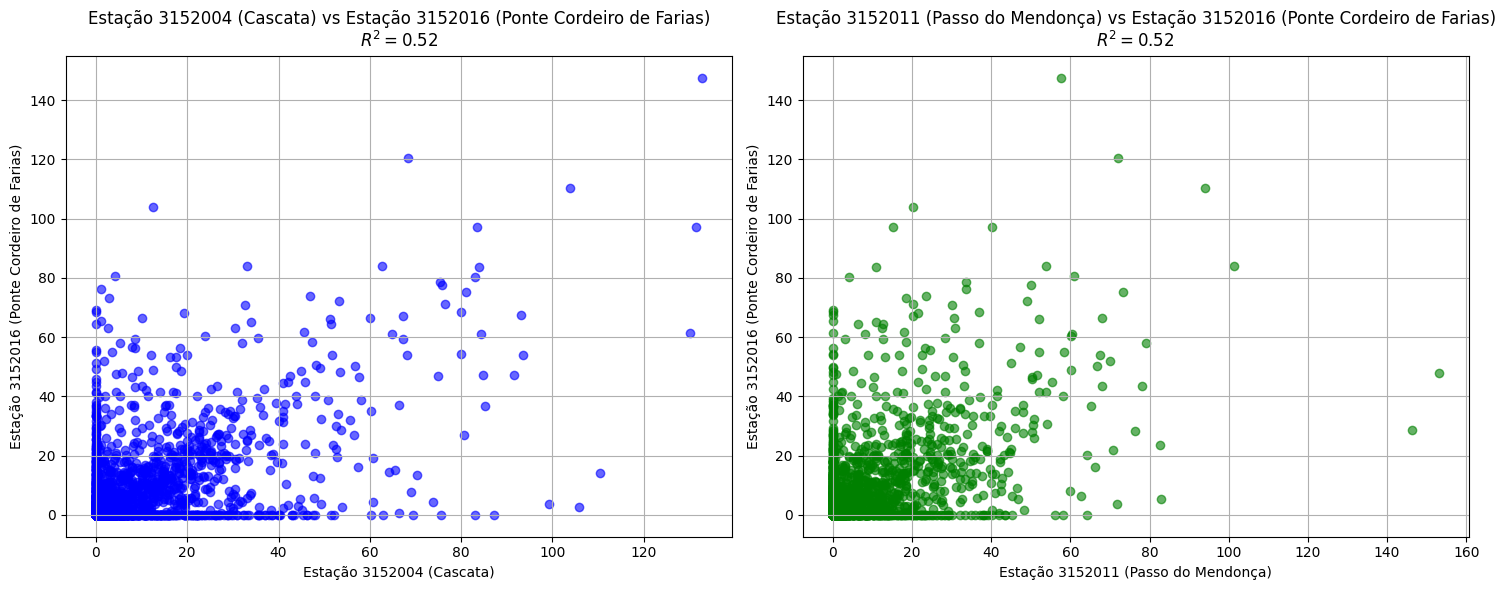

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

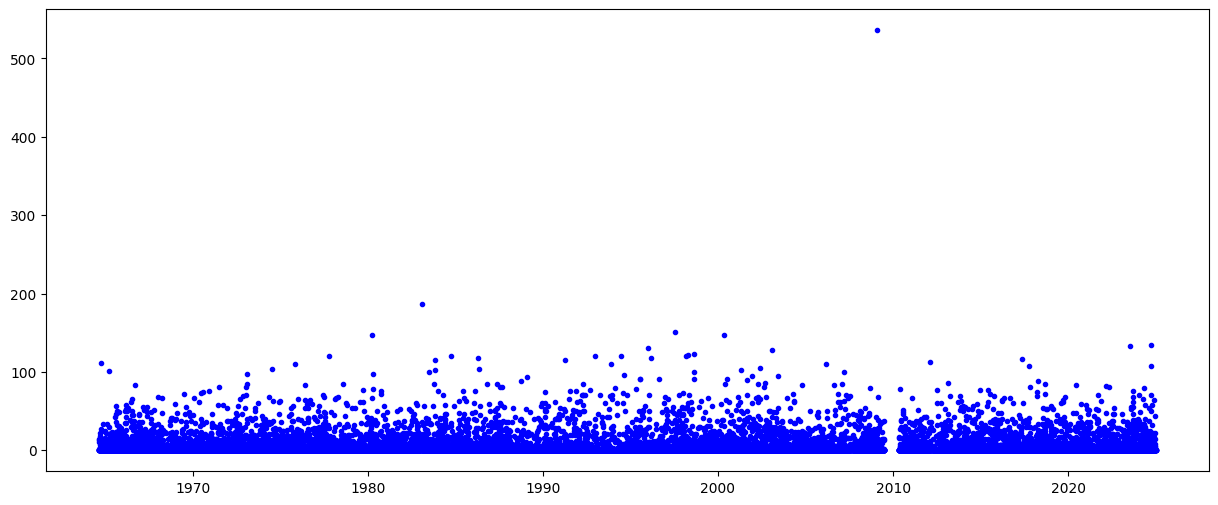

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# === CONFIGURAÇÕES ===
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

csv_files = {
    '3152004': 'chuva_diaria_organizada_3152004.csv',
    '3152011': 'chuva_diaria_organizada_3152011.csv',
    '3152016': 'chuva_diaria_organizada_3152016.csv'
}

station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

# === FUNÇÕES ===
def process_daily_series(file_name):
    file_path = os.path.join(pasta_raiz, file_name)
    print(f"\nProcessando o arquivo: {file_path}")
    try:
        df = pd.read_csv(file_path, sep=',', encoding='utf-8')
    except FileNotFoundError:
        print(f"❌ Erro: Arquivo '{file_path}' não encontrado.")
        return pd.Series(dtype='float64')

    df['DataCompleta'] = pd.to_datetime(df['DataCompleta'], errors='coerce')
    df = df.dropna(subset=['DataCompleta'])
    series = df.set_index('DataCompleta')['Precipitacao'].sort_index()
    return series

def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})
    treino = df.dropna()
    modelo = None
    if not treino.empty:
        modelo = LinearRegression()
        modelo.fit(treino[['viz1', 'viz2']], treino['alvo'])
        falhas = df['alvo'].isna() & df['viz1'].notna() & df['viz2'].notna()
        if falhas.any():
            df.loc[falhas, 'alvo'] = modelo.predict(df.loc[falhas, ['viz1', 'viz2']])
    return df['alvo'], modelo, treino

def estatisticas_basicas(serie, nome):
    print(f"\n📊 Estatísticas - {nome}:")
    if serie.notna().any():
        s = serie.dropna()
        print(pd.Series({
            'Média': s.mean(),
            'Mediana': s.median(),
            'Máximo': s.max(),
            'Mínimo': s.min(),
            'Desvio Padrão': s.std(),
            'Total acumulado': s.sum()
        }))
    else:
        print("Série vazia.")

# === EXECUÇÃO ===
series_ponte = process_daily_series(csv_files['3152016'])
series_cascata = process_daily_series(csv_files['3152004'])
series_terceira = process_daily_series(csv_files['3152011'])

df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
})

series_ponte_preenchida, modelo_regressao, df_treino = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

serie_mensal_preenchida = series_ponte_preenchida.resample('ME').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('YE').sum()

estatisticas_basicas(series_ponte, 'Série Diária Original (Ponte)')
estatisticas_basicas(series_ponte_preenchida, 'Série Diária Preenchida (Ponte)')

falhas_totais = series_ponte.isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes
print("\n--- Diagnóstico ---")
print(f"Falhas originais: {falhas_totais}")
print(f"Falhas preenchidas: {falhas_preenchidas}")
print(f"Falhas remanescentes: {falhas_remanescentes}")

# === PLOTS ===
# Regressão
if modelo_regressao and not df_treino.empty:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    r2_score = modelo_regressao.score(df_treino[['viz1', 'viz2']], df_treino['alvo'])
    axs[0].scatter(df_treino['viz1'], df_treino['alvo'], alpha=0.6, color='blue')
    axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(station_names["3152004"])
    axs[0].set_ylabel(station_names["3152016"])
    axs[0].grid(True)
    axs[1].scatter(df_treino['viz2'], df_treino['alvo'], alpha=0.6, color='green')
    axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(station_names["3152011"])
    axs[1].set_ylabel(station_names["3152016"])
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

# Série diária
plt.figure(figsize=(15, 6))
plt.plot(series_ponte.index, series_ponte, 'bo', markersize=3, label='Original')
preenchidos = series_ponte_preenchida[series_ponte.isna()]
if not preenchidos.empty:
    plt.plot(preenchidos.index, preenchidos, 'ro', markersize=3, label='Preenchidos')
plt.title(f'Precipitação Diária - {station_names["3152016"]}')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Série mensal
plt.figure(figsize=(15, 6))
plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='skyblue', label='Mensal')
plt.title(f'Precipitação Mensal - {station_names["3152016"]}')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Série anual
plt.figure(figsize=(15, 6))
plt.bar(serie_anual_preenchida.index.year, serie_anual_preenchida, color='orange', label='Anual')
plt.title(f'Precipitação Anual - {station_names["3152016"]}')
plt.xlabel('Ano')
plt.ylabel('Precipitação Acumulada (mm)')
plt.legend()
plt.grid(True)
plt.show()



Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152016.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152004.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152011.csv

📊 Estatísticas - Série Diária Original (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Diária Preenchida (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Mensal Preenchida (Ponte):
Média                 91.059362
Mediana               77.650000
Máximo               693.400000
Mínimo            

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

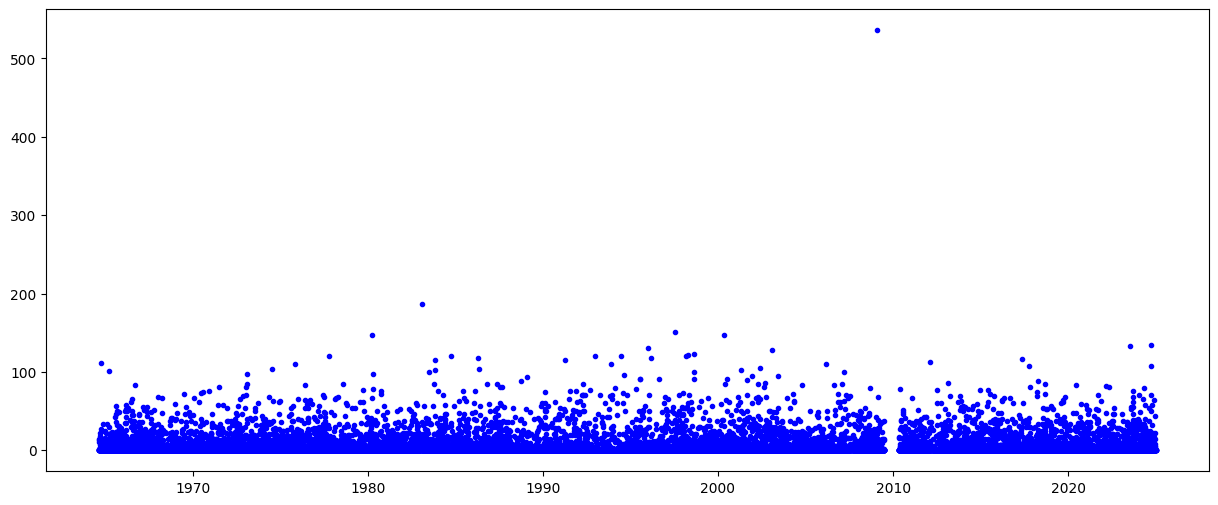

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# --- Etapa 1: Definição de Caminhos e Nomes dos Arquivos ---

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Define os nomes dos arquivos CSV diários
csv_files = {
    '3152004': 'chuva_diaria_organizada_3152004.csv',
    '3152011': 'chuva_diaria_organizada_3152011.csv',
    '3152016': 'chuva_diaria_organizada_3152016.csv'
}

# Nomes das estações para os rótulos dos gráficos
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

# --- Etapa 2: Funções de Processamento e Análise ---

def process_daily_series(file_name, station_id):
    """
    Lê o arquivo CSV de série diária e retorna um objeto Series.
    """
    file_path = os.path.join(pasta_raiz, file_name)
    print(f"\nProcessando o arquivo: {file_path}")

    try:
        df = pd.read_csv(file_path, sep=',', encoding='utf-8')
    except FileNotFoundError:
        print(f"❌ Erro: O arquivo '{file_path}' não foi encontrado.")
        return pd.Series(dtype='float64')

    # Converte a coluna de data para o índice datetime
    df['DataCompleta'] = pd.to_datetime(df['DataCompleta'], errors='coerce')
    df = df.dropna(subset=['DataCompleta'])

    # Cria a série temporal. Mantemos os NaNs para a contagem de falhas.
    series = df.set_index('DataCompleta')['Precipitacao'].sort_index()

    return series

def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    """Preenche falhas na série alvo usando regressão linear com as séries vizinhas."""
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None

    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        falhas_preenchiveis = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if falhas_preenchiveis.any():
            df.loc[falhas_preenchiveis, 'alvo'] = modelo_mul.predict(df.loc[falhas_preenchiveis, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

def estatisticas_basicas(serie, nome):
    """Calcula e imprime estatísticas básicas para uma série temporal."""
    print(f"\n📊 Estatísticas - {nome}:")
    if not serie.empty:
        s_limpa = serie.dropna()
        if not s_limpa.empty:
            print(pd.Series({
                'Média': s_limpa.mean(),
                'Mediana': s_limpa.median(),
                'Máximo': s_limpa.max(),
                'Mínimo': s_limpa.min(),
                'Desvio Padrão': s_limpa.std(),
                'Total acumulado': s_limpa.sum()
            }))
        else:
            print("Série vazia. Não é possível calcular estatísticas.")
    else:
        print("Série vazia. Não é possível calcular estatísticas.")

# --- Etapa 3: Execução do Script ---

# Processa os três arquivos CSV diários para obter as séries
series_ponte = process_daily_series(csv_files['3152016'], '3152016')
series_cascata = process_daily_series(csv_files['3152004'], '3152004')
series_terceira = process_daily_series(csv_files['3152011'], '3152011')

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
})

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('ME').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('YE').sum()

# Calcula e imprime as estatísticas
estatisticas_basicas(series_ponte, 'Série Diária Original (Ponte)')
estatisticas_basicas(series_ponte_preenchida, 'Série Diária Preenchida (Ponte)')
estatisticas_basicas(serie_mensal_preenchida, 'Série Mensal Preenchida (Ponte)')
estatisticas_basicas(serie_anual_preenchida, 'Série Anual Preenchida (Ponte)')

# Diagnóstico de falhas
falhas_totais = series_ponte.isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\n--- Diagnóstico de Falhas ---")
print(f"Total de falhas originais na série Ponte: {falhas_totais}")
print(f"Total de falhas preenchidas pela regressão: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# --- Etapa 4: Plotagem dos Gráficos ---

# Gráfico de regressão
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    df_treino = df_combined.dropna(subset=['ponte', 'cascata', 'terceira'])

    if not df_treino.empty:
        df_treino_renomeado = df_treino.rename(columns={'cascata': 'viz1', 'terceira': 'viz2'})
        r2_score = modelo_regressao.score(df_treino_renomeado[['viz1', 'viz2']], df_treino_renomeado['ponte'])

        axs[0].scatter(df_treino_renomeado['viz1'], df_treino_renomeado['ponte'], alpha=0.6, label='Dados de Treino')
        axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
        axs[0].set_xlabel(station_names["3152004"])
        axs[0].set_ylabel(station_names["3152016"])
        axs[0].legend()
        axs[0].grid(True)

        axs[1].scatter(df_treino_renomeado['viz2'], df_treino_renomeado['ponte'], alpha=0.6, label='Dados de Treino')
        axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
        axs[1].set_xlabel(station_names["3152011"])
        axs[1].set_ylabel(station_names["3152016"])
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(pasta_raiz, 'regressao_multipla.png'))
        plt.close()
    else:
        print("Aviso: Não foi possível gerar o gráfico de regressão por falta de dados de treino suficientes.")
else:
    print("Aviso: Não foi possível gerar o gráfico de regressão. Modelo não foi treinado.")

# Gráfico da série diária (original e preenchida)
if not series_ponte.empty:
    plt.figure(figsize=(15, 6))

    plt.plot(series_ponte.dropna().index, series_ponte.dropna().values, 'bo', markersize=3, label='Dados Originais', zorder=3)

    preenchidos = series_ponte_preenchida[series_ponte.isna()]
    if not preenchidos.empty:
        plt.plot(preenchidos.index, preenchidos, 'go', markersize=3, label='Dados Preenchidos', zorder=2)

    plt.title(f'Precipitação Diária da {station_names["3152016"]} (Série Original e Preenchida)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_diaria_preenchida.png'))
    plt.close()
else:
    print("Aviso: Não foi possível gerar o gráfico diário por falta de dados.")

# Gráfico da série mensal
if not serie_mensal_preenchida.empty:
    plt.figure(figsize=(15, 6))
    plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_mensal_preenchida.png'))
    plt.close()
else:
    print("Aviso: Não foi possível gerar o gráfico mensal por falta de dados.")

# Gráfico da série anual
if not serie_anual_preenchida.empty:
    plt.figure(figsize=(15, 6))
    plt.bar(serie_anual_preenchida.index.year, serie_anual_preenchida, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
    plt.xlabel('Ano')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_anual_preenchida.png'))
    plt.close()
else:
    print("Aviso: Não foi possível gerar o gráfico anual por falta de dados.")

print("\nAnálise concluída. Verifique os arquivos de imagem gerados na sua pasta.")


Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152016.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152004.csv

Processando o arquivo: /content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_organizada_3152011.csv

📊 Estatísticas - Série Diária Original (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Diária Preenchida (Ponte):
Média                  4.100329
Mediana                0.000000
Máximo               535.800000
Mínimo                 0.000000
Desvio Padrão         12.283735
Total acumulado    88509.700000
dtype: float64

📊 Estatísticas - Série Mensal Preenchida (Ponte):
Média                 91.059362
Mediana               77.650000
Máximo               693.400000
Mínimo            

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

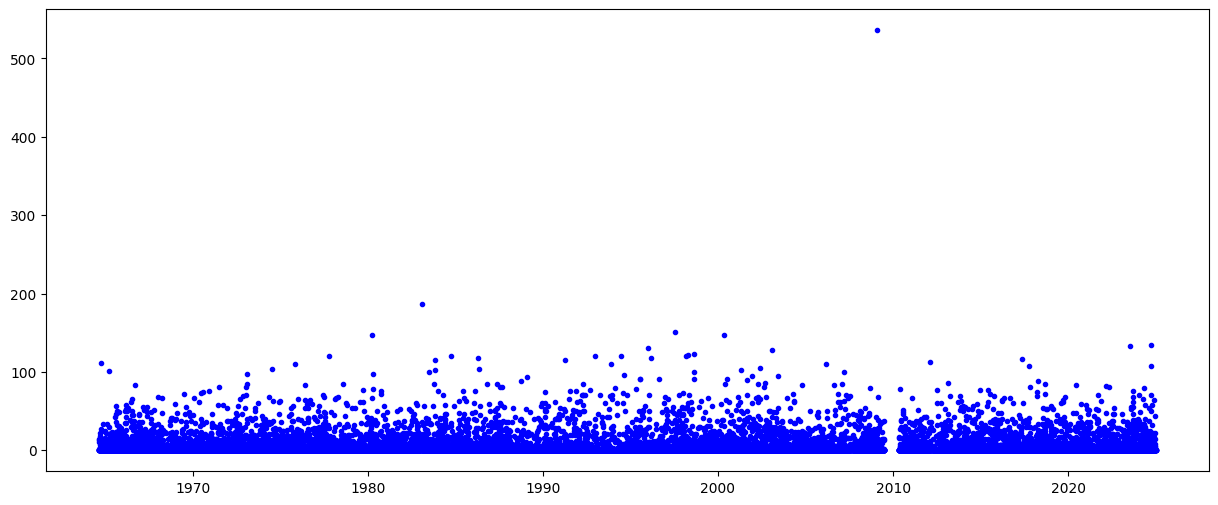

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# --- Etapa 1: Definição de Caminhos e Nomes dos Arquivos ---

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Define os nomes dos arquivos CSV diários
csv_files = {
    '3152004': 'chuva_diaria_organizada_3152004.csv',
    '3152011': 'chuva_diaria_organizada_3152011.csv',
    '3152016': 'chuva_diaria_organizada_3152016.csv'
}

# Nomes das estações para os rótulos dos gráficos
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

# --- Etapa 2: Funções de Processamento e Análise ---

def process_daily_series(file_name, station_id):
    """
    Lê o arquivo CSV de série diária e retorna um objeto Series.
    """
    file_path = os.path.join(pasta_raiz, file_name)
    print(f"\nProcessando o arquivo: {file_path}")

    try:
        df = pd.read_csv(file_path, sep=',', encoding='utf-8')
    except FileNotFoundError:
        print(f"❌ Erro: O arquivo '{file_path}' não foi encontrado.")
        return pd.Series(dtype='float64')

    # Converte a coluna de data para o índice datetime
    df['DataCompleta'] = pd.to_datetime(df['DataCompleta'], errors='coerce')
    df = df.dropna(subset=['DataCompleta'])

    # Cria a série temporal. Mantemos os NaNs para a contagem de falhas.
    series = df.set_index('DataCompleta')['Precipitacao'].sort_index()

    return series

def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    """Preenche falhas na série alvo usando regressão linear com as séries vizinhas."""
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None

    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        falhas_preenchiveis = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if falhas_preenchiveis.any():
            df.loc[falhas_preenchiveis, 'alvo'] = modelo_mul.predict(df.loc[falhas_preenchiveis, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

def estatisticas_basicas(serie, nome):
    """Calcula e imprime estatísticas básicas para uma série temporal."""
    print(f"\n📊 Estatísticas - {nome}:")
    if not serie.empty:
        s_limpa = serie.dropna()
        if not s_limpa.empty:
            print(pd.Series({
                'Média': s_limpa.mean(),
                'Mediana': s_limpa.median(),
                'Máximo': s_limpa.max(),
                'Mínimo': s_limpa.min(),
                'Desvio Padrão': s_limpa.std(),
                'Total acumulado': s_limpa.sum()
            }))
        else:
            print("Série vazia. Não é possível calcular estatísticas.")
    else:
        print("Série vazia. Não é possível calcular estatísticas.")

# --- Etapa 3: Execução do Script ---

# Processa os três arquivos CSV diários para obter as séries
series_ponte = process_daily_series(csv_files['3152016'], '3152016')
series_cascata = process_daily_series(csv_files['3152004'], '3152004')
series_terceira = process_daily_series(csv_files['3152011'], '3152011')

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
})

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('ME').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('YE').sum()

# Calcula e imprime as estatísticas
estatisticas_basicas(series_ponte, 'Série Diária Original (Ponte)')
estatisticas_basicas(series_ponte_preenchida, 'Série Diária Preenchida (Ponte)')
estatisticas_basicas(serie_mensal_preenchida, 'Série Mensal Preenchida (Ponte)')
estatisticas_basicas(serie_anual_preenchida, 'Série Anual Preenchida (Ponte)')

# Diagnóstico de falhas
falhas_totais = series_ponte.isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\n--- Diagnóstico de Falhas ---")
print(f"Total de falhas originais na série Ponte: {falhas_totais}")
print(f"Total de falhas preenchidas pela regressão: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# --- Etapa 4: Plotagem dos Gráficos ---

# Gráfico de regressão
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    df_treino = df_combined.dropna(subset=['ponte', 'cascata', 'terceira'])

    if not df_treino.empty:
        df_treino_renomeado = df_treino.rename(columns={'cascata': 'viz1', 'terceira': 'viz2'})
        r2_score = modelo_regressao.score(df_treino_renomeado[['viz1', 'viz2']], df_treino_renomeado['ponte'])

        axs[0].scatter(df_treino_renomeado['viz1'], df_treino_renomeado['ponte'], alpha=0.6, label='Dados de Treino')
        axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
        axs[0].set_xlabel(station_names["3152004"])
        axs[0].set_ylabel(station_names["3152016"])
        axs[0].legend()
        axs[0].grid(True)

        axs[1].scatter(df_treino_renomeado['viz2'], df_treino_renomeado['ponte'], alpha=0.6, label='Dados de Treino')
        axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
        axs[1].set_xlabel(station_names["3152011"])
        axs[1].set_ylabel(station_names["3152016"])
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(pasta_raiz, 'regressao_multipla.png'))
        plt.close()
    else:
        print("Aviso: Não foi possível gerar o gráfico de regressão por falta de dados de treino suficientes.")
else:
    print("Aviso: Não foi possível gerar o gráfico de regressão. Modelo não foi treinado.")

# Gráfico da série diária (original e preenchida)
if not series_ponte.empty:
    plt.figure(figsize=(15, 6))

    plt.plot(series_ponte.dropna().index, series_ponte.dropna().values, 'bo', markersize=3, label='Dados Originais', zorder=3)

    preenchidos = series_ponte_preenchida[series_ponte.isna()]
    if not preenchidos.empty:
        plt.plot(preenchidos.index, preenchidos, 'go', markersize=3, label='Dados Preenchidos', zorder=2)

    plt.title(f'Precipitação Diária da {station_names["3152016"]} (Série Original e Preenchida)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_diaria_preenchida.png'))
    plt.close()
else:
    print("Aviso: Não foi possível gerar o gráfico diário por falta de dados.")

# Gráfico da série mensal
if not serie_mensal_preenchida.empty:
    plt.figure(figsize=(15, 6))
    plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_mensal_preenchida.png'))
    plt.close()
else:
    print("Aviso: Não foi possível gerar o gráfico mensal por falta de dados.")

# Gráfico da série anual
if not serie_anual_preenchida.empty:
    plt.figure(figsize=(15, 6))
    plt.bar(serie_anual_preenchida.index.year, serie_anual_preenchida, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
    plt.xlabel('Ano')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta_raiz, 'precipitacao_anual_preenchida.png'))
    plt.close()
else:
    print("Aviso: Não foi possível gerar o gráfico anual por falta de dados.")

print("\nAnálise concluída. Verifique os arquivos de imagem gerados na sua pasta.")

Estatísticas Diárias:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Chuva_mm, dtype: float64

Estatísticas Mensais:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Chuva_mm, dtype: float64

Estatísticas Anuais:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Chuva_mm, dtype: float64


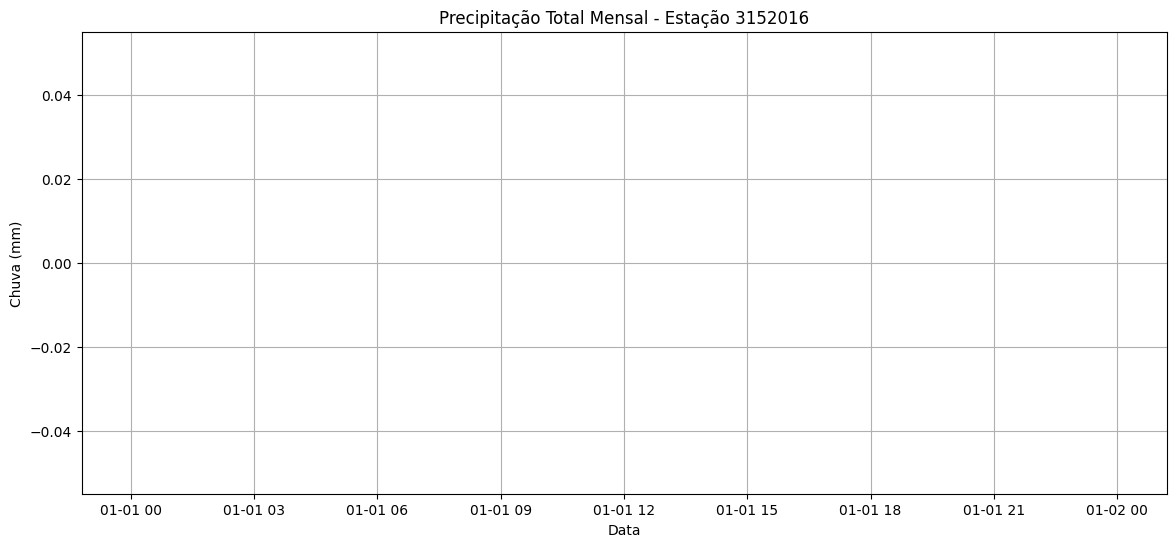

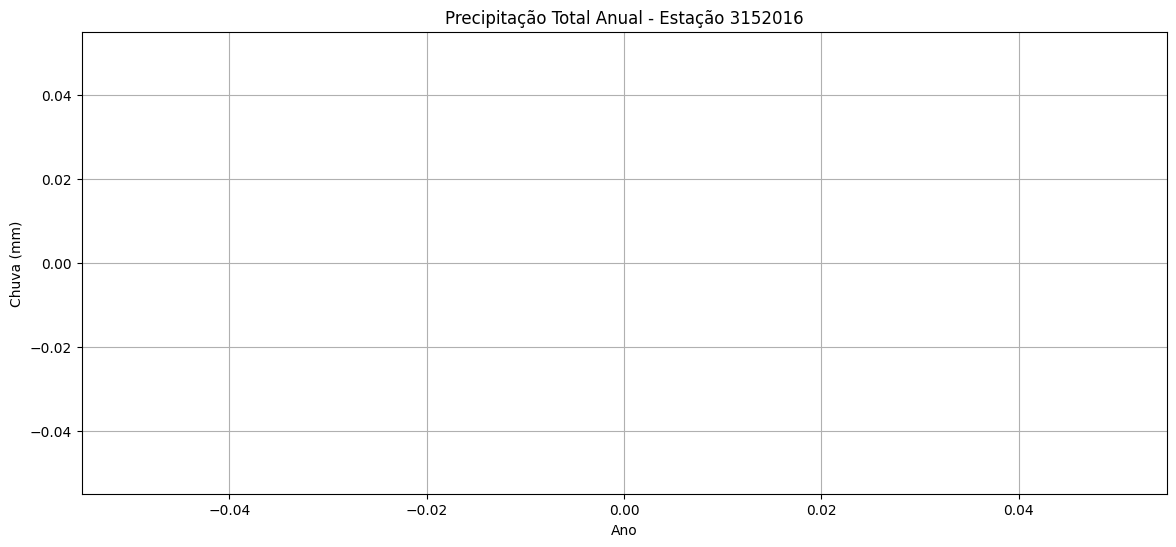

Anos com dados faltantes: [np.int32(2006), np.int32(2004), np.int32(2003), np.int32(2002), np.int32(2001), np.int32(2000), np.int32(1999), np.int32(1998), np.int32(1997), np.int32(1996), np.int32(1995), np.int32(1994), np.int32(1993), np.int32(1992), np.int32(1991), np.int32(1990), np.int32(1989), np.int32(1988), np.int32(1987), np.int32(1986), np.int32(1985), np.int32(1984), np.int32(1983), np.int32(1982), np.int32(1981), np.int32(1980), np.int32(1979), np.int32(1978), np.int32(1977), np.int32(1976), np.int32(1975), np.int32(1974), np.int32(1973), np.int32(1972), np.int32(1971), np.int32(1970), np.int32(1969), np.int32(1968), np.int32(1967), np.int32(1966), np.int32(1965), np.int32(1964)]
Preenchendo ano 2006 com média anual: nan mm
Preenchendo ano 2004 com média anual: nan mm
Preenchendo ano 2003 com média anual: nan mm
Preenchendo ano 2002 com média anual: nan mm
Preenchendo ano 2001 com média anual: nan mm
Preenchendo ano 2000 com média anual: nan mm
Preenchendo ano 1999 com média 

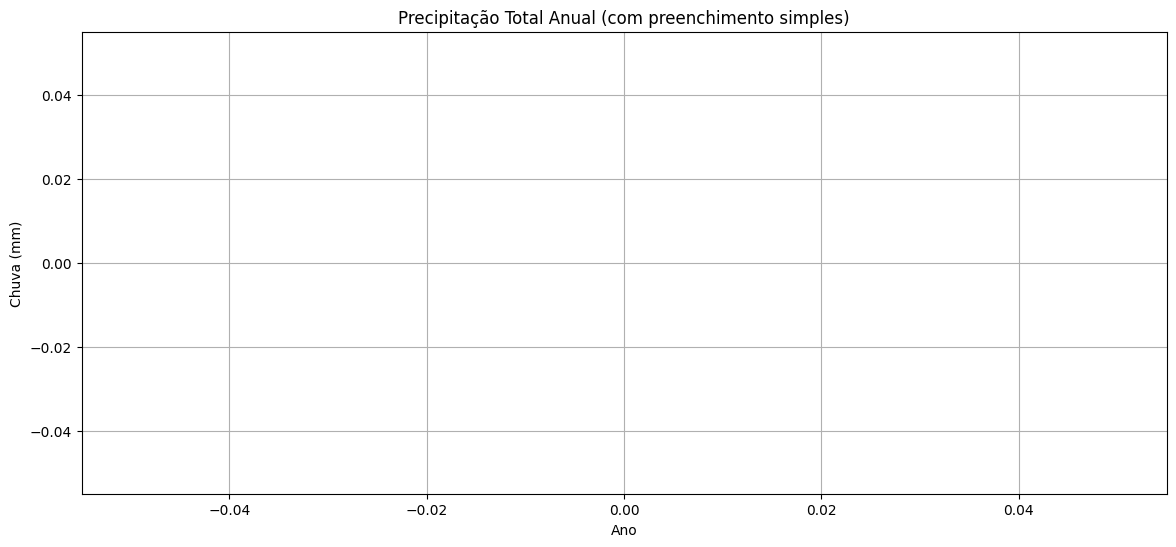

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Passo 1: Ler o arquivo (supondo já carregado em df, com coluna 'Data' datetime e 'NivelConsistencia') ---
# Filtrar nível de consistência 2
df_consist = df[df['NivelConsistencia'] == 2].copy()

# Converter Data para datetime (caso ainda não tenha feito)
df_consist['Data'] = pd.to_datetime(df_consist['Data'], format='%d/%m/%Y', errors='coerce')

# --- Passo 2: Identificar meses completos (sem dias faltantes) ---
df_consist['AnoMes'] = df_consist['Data'].dt.to_period('M')

# Contar quantos registros existem por mês
contagem_por_mes = df_consist.groupby('AnoMes').size()

# Dias que deveriam existir em cada mês
dias_no_mes = df_consist.groupby('AnoMes')['Data'].first().dt.days_in_month

# Booleano para meses completos
meses_completos = contagem_por_mes == dias_no_mes

# Filtrar dataframe para meses completos
meses_validos = meses_completos[meses_completos].index
df_meses_validos = df_consist[df_consist['AnoMes'].isin(meses_validos)].copy()

# --- Passo 3: Identificar anos completos (todos os meses completos) ---
df_meses_validos['Ano'] = df_meses_validos['Data'].dt.year

# Contar meses válidos por ano
contagem_meses_por_ano = df_meses_validos.groupby('Ano')['AnoMes'].nunique()

# Normalmente um ano tem 12 meses completos (ou 13 se tiver dados em dezembro e janeiro do ano seguinte)
# Considerando só anos com 12 meses completos
anos_validos = contagem_meses_por_ano[contagem_meses_por_ano == 12].index

df_anos_validos = df_meses_validos[df_meses_validos['Ano'].isin(anos_validos)].copy()

# --- Passo 4: Construir séries temporais ---

# Série diária (somente dados consistentes, já filtrados)
serie_diaria = df_anos_validos[['Data', 'Total']].copy()
serie_diaria.columns = ['Data', 'Chuva_mm']

# Série mensal: somar Total por AnoMes
serie_mensal = df_anos_validos.groupby('AnoMes')['Total'].sum()
serie_mensal.index = serie_mensal.index.to_timestamp()
serie_mensal.name = 'Chuva_mm'

# Série anual: somar Total por Ano
serie_anual = df_anos_validos.groupby('Ano')['Total'].sum()
serie_anual.name = 'Chuva_mm'

# --- Passo 5: Estatísticas básicas ---
print("Estatísticas Diárias:")
print(serie_diaria['Chuva_mm'].describe())

print("\nEstatísticas Mensais:")
print(serie_mensal.describe())

print("\nEstatísticas Anuais:")
print(serie_anual.describe())

# --- Passo 6: Plotar gráficos ---
plt.figure(figsize=(14,6))
plt.plot(serie_mensal.index, serie_mensal.values, marker='o')
plt.title('Precipitação Total Mensal - Estação 3152016')
plt.ylabel('Chuva (mm)')
plt.xlabel('Data')
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.plot(serie_anual.index, serie_anual.values, marker='o', color='orange')
plt.title('Precipitação Total Anual - Estação 3152016')
plt.ylabel('Chuva (mm)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

# --- Passo 7: Identificar anos com dados faltantes (anos que não estão em anos_validos) ---
anos_todos = df_consist['Data'].dt.year.unique()
anos_faltantes = [ano for ano in anos_todos if ano not in anos_validos]
print(f"Anos com dados faltantes: {anos_faltantes}")

# --- Passo 8: Preenchimento simples para anos com dados faltantes ---

# Opção 1: Preencher ano faltante com a média dos anos válidos
media_anual = serie_anual.mean()

# Criar série anual completa (com anos faltantes preenchidos)
serie_anual_completa = serie_anual.copy()

for ano in anos_faltantes:
    print(f"Preenchendo ano {ano} com média anual: {media_anual:.2f} mm")
    serie_anual_completa.loc[ano] = media_anual

# Ordenar índice (anos)
serie_anual_completa = serie_anual_completa.sort_index()

# Plotar série anual completa com preenchimento
plt.figure(figsize=(14,6))
plt.plot(serie_anual_completa.index, serie_anual_completa.values, marker='o', color='green')
plt.title('Precipitação Total Anual (com preenchimento simples)')
plt.ylabel('Chuva (mm)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from matplotlib.dates import YearLocator

# === Função para leitura de série anual completa ===
def ler_serie_anual(csv_path):
    with open(csv_path, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = None
    for i, linha in enumerate(linhas):
        if "EstacaoCodigo" in linha:
            header_line = i
            break
    df = pd.read_csv(
        csv_path, sep=';', decimal=',', encoding='latin1',
        skiprows=header_line
    )
    df = df[df['NivelConsistencia'] == 2].copy()
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Data'])
    df['Ano'] = df['Data'].dt.year

    dias_por_ano = df.groupby('Ano')['Data'].count()
    def dias_ano(ano):
        return 366 if (ano % 400 == 0 or (ano % 4 == 0 and ano % 100 != 0)) else 365
    anos_validos = [ano for ano in dias_por_ano.index if dias_por_ano[ano] == dias_ano(ano)]

    serie_anual = df[df['Ano'].isin(anos_validos)].groupby('Ano')['Total'].sum()
    return serie_anual

# === 1. Ler séries anuais ===
ponte = ler_serie_anual('/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv')
cascata = ler_serie_anual('/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv')

todos_anos = sorted(set(ponte.index) | set(cascata.index))
ponte = ponte.reindex(todos_anos)
cascata = cascata.reindex(todos_anos)

# === 2. Identificar falhas ===
anos_faltando = ponte[ponte.isna()].index
print(f"⚠️ Anos faltando na Ponte Cordeiro: {list(anos_faltando)}")

# Inicializar variáveis de preenchimento como cópias da original
ponte_media = ponte.copy()
ponte_reg = ponte.copy()
ponte_vpr = ponte.copy()
ponte_reg_vpr = ponte.copy()

if len(anos_faltando) > 0:
    # === 3. Preenchimentos ===
    # Método 1: Média aritmética simples
    ponte_media[anos_faltando] = cascata[anos_faltando]

    # Método 2: Regressão linear
    mask_treino = ponte.notna() & cascata.notna()
    X_treino = cascata[mask_treino].values.reshape(-1, 1)
    y_treino = ponte[mask_treino].values
    modelo = LinearRegression().fit(X_treino, y_treino)
    ponte_reg[anos_faltando] = modelo.predict(cascata[anos_faltando].values.reshape(-1, 1))

    # Método 3: VPR (com 1 vizinha → peso = 1)
    ponte_vpr[anos_faltando] = cascata[anos_faltando]

    # Método 4: VPR + Regressão Linear
    ponte_reg_vpr[anos_faltando] = modelo.predict(cascata[anos_faltando].values.reshape(-1, 1))

else:
    print("✅ Nenhum ano faltando — não foi necessário preencher dados.")


# === 3. Preenchimentos ===
# Método 1: Média aritmética simples
ponte_media = ponte.copy()
ponte_media[anos_faltando] = cascata[anos_faltando]

# Método 2: Regressão linear
ponte_reg = ponte.copy()
mask_treino = ponte.notna() & cascata.notna()
X_treino = cascata[mask_treino].values.reshape(-1, 1)
y_treino = ponte[mask_treino].values
modelo = LinearRegression().fit(X_treino, y_treino)
ponte_reg[anos_faltando] = modelo.predict(cascata[anos_faltando].values.reshape(-1, 1))

# Método 3: VPR (com 1 vizinha → peso = 1)
ponte_vpr = ponte.copy()
ponte_vpr[anos_faltando] = cascata[anos_faltando]

# Método 4: VPR + Regressão Linear
ponte_reg_vpr = ponte.copy()
ponte_reg_vpr[anos_faltando] = modelo.predict(cascata[anos_faltando].values.reshape(-1, 1))

# === 4. Exportar para Excel ===
output_excel = '/content/drive/MyDrive/hidrologia/precipitacao/preenchimento_ponte.xlsx'
with pd.ExcelWriter(output_excel) as writer:
    ponte.to_frame('Original').to_excel(writer, sheet_name='Original')
    ponte_media.to_frame('MediaAritmetica').to_excel(writer, sheet_name='MediaAritmetica')
    ponte_reg.to_frame('RegressaoLinear').to_excel(writer, sheet_name='RegressaoLinear')
    ponte_vpr.to_frame('VetorPonderacaoRegional').to_excel(writer, sheet_name='VPR')
    ponte_reg_vpr.to_frame('VPR_Regressao').to_excel(writer, sheet_name='VPR_Regressao')

print(f"✅ Séries exportadas para: {output_excel}")

# === 5. Gráfico estático com falhas indicadas ===
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ponte, 'o-', label='Original', color='black')
ax.plot(ponte_media, 's--', label='Média Aritmética')
ax.plot(ponte_reg, 'd--', label='Regressão Linear')

for ano in anos_faltando:
    ax.axvspan(ano-0.5, ano+0.5, color='red', alpha=0.2)  # faixa vermelha translúcida

ax.set_title('Preenchimento de Falhas - Ponte Cordeiro de Farias')
ax.set_ylabel('Precipitação Anual (mm)')
ax.set_xlabel('Ano')
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(YearLocator(1))
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/hidrologia/precipitacao/preenchimento_ponte.png', dpi=300)
plt.show()
print("📂 Gráfico PNG salvo em /content/drive/MyDrive/hidrologia/precipitacao/preenchimento_ponte.png")

# === 6. Gráfico interativo com Plotly ===
fig_plotly = go.Figure()

fig_plotly.add_trace(go.Scatter(x=ponte.index, y=ponte, mode='lines+markers', name='Original'))
fig_plotly.add_trace(go.Scatter(x=ponte_media.index, y=ponte_media, mode='lines+markers', name='Média Aritmética'))
fig_plotly.add_trace(go.Scatter(x=ponte_reg.index, y=ponte_reg, mode='lines+markers', name='Regressão Linear'))

# Adiciona faixas verticais para anos faltantes
for ano in anos_faltando:
    fig_plotly.add_shape(
        type="rect",
        x0=ano-0.5, x1=ano+0.5,
        y0=min(ponte.min(), ponte_media.min(), ponte_reg.min()),
        y1=max(ponte.max(), ponte_media.max(), ponte_reg.max()),
        fillcolor="red", opacity=0.2, line_width=0
    )

fig_plotly.update_layout(
    title="Preenchimento de Falhas - Ponte Cordeiro de Farias",
    xaxis_title="Ano",
    yaxis_title="Precipitação Anual (mm)",
    hovermode="x unified"
)

fig_plotly.show()


⚠️ Anos faltando na Ponte Cordeiro: []
✅ Nenhum ano faltando — não foi necessário preencher dados.


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
# ==============================================
# 📊 Precipitação - Ponte Cordeiro (3152016)
# Preenchimento usando estação vizinha Cascata (3152004)
# ==============================================

# 1️⃣ Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

# ==============================================
# FUNÇÃO para ler arquivos ANA e retornar DataFrame filtrado
# ==============================================
def ler_ana(path):
    # Detecta linha do cabeçalho
    with open(path, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = None
    for i, linha in enumerate(linhas):
        if "EstacaoCodigo" in linha:
            header_line = i
            break

    df = pd.read_csv(path, sep=';', decimal=',', encoding='latin1',
                     skiprows=header_line)

    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df[df['NivelConsistencia'] == 2]  # apenas consistência 2
    df = df.dropna(subset=['Data'])
    return df

# ==============================================
# 3️⃣ Ler dados das duas estações
# ==============================================
ponte_path = "/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv"
cascata_path = "/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv"

df_ponte = ler_ana(ponte_path)
df_cascata = ler_ana(cascata_path)

# ==============================================
# 4️⃣ Criar séries temporais diárias, mensais e anuais
# ==============================================
serie_diaria_ponte = df_ponte.set_index('Data')['Total'].sort_index()
serie_diaria_cascata = df_cascata.set_index('Data')['Total'].sort_index()

serie_mensal_ponte = serie_diaria_ponte.resample('M').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('M').sum()

serie_anual_ponte = serie_diaria_ponte.resample('Y').sum()
serie_anual_cascata = serie_diaria_cascata.resample('Y').sum()

# ==============================================
# 5️⃣ Identificar falhas (dias, meses, anos)
# ==============================================
faltas_dias = serie_diaria_ponte[serie_diaria_ponte.isna()].index
faltas_meses = serie_mensal_ponte[serie_mensal_ponte.isna()].index
faltas_anos = serie_anual_ponte[serie_anual_ponte.isna()].index

print("⚠️ Falhas - Dias:", len(faltas_dias))
print("⚠️ Falhas - Meses:", len(faltas_meses))
print("⚠️ Falhas - Anos:", len(faltas_anos))

# ==============================================
# 6️⃣ Preenchimento por Regressão Linear
# ==============================================
def preencher_regressao(base, ref):
    mask = (~base.isna()) & (~ref.isna())
    X = ref[mask].values.reshape(-1, 1)
    y = base[mask].values
    modelo = LinearRegression().fit(X, y)

    preenchido = base.copy()
    for t in base.index[base.isna()]:
        if not np.isnan(ref.loc[t]):
            preenchido.loc[t] = modelo.predict([[ref.loc[t]]])[0]
    return preenchido, modelo

serie_diaria_preench, _ = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_preench, _ = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_preench, _ = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

# ==============================================
# 7️⃣ Estatísticas antes/depois
# ==============================================
def estat(s):
    return s.mean(), s.median(), s.std(), s.min(), s.max()

print("\n📊 Estatísticas ANUAL (antes/depois):")
print("Antes:", estat(serie_anual_ponte.dropna()))
print("Depois:", estat(serie_anual_preench))

# ==============================================
# 8️⃣ Plot estático com barras de falha
# ==============================================
def plot_falhas_static(orig, filled, faltas, titulo, fname):
    plt.figure(figsize=(12,5))
    plt.plot(filled.index, filled, label='Preenchido', color='blue')
    plt.plot(orig.index, orig, 'o', label='Original', color='orange')

    for f in faltas:
        plt.axvline(f, color='red', alpha=0.3)

    plt.title(titulo)
    plt.ylabel('Precipitação (mm)')
    plt.xlabel('Tempo')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(fname, dpi=300)
    plt.show()

plot_falhas_static(serie_anual_ponte, serie_anual_preench,
                   faltas_anos, "Precipitação Anual - Ponte Cordeiro (com falhas)",
                   "/content/drive/MyDrive/hidrologia/precipitacao/chuva_anual_falhas.png")

# ==============================================
# 9️⃣ Plot interativo no Colab
# ==============================================
def plot_falhas_interativo(orig, filled, faltas, titulo):
    df_plot = pd.DataFrame({
        'Data': filled.index,
        'Preenchido': filled.values,
        'Original': orig.values
    })
    fig = px.line(df_plot, x='Data', y=['Original', 'Preenchido'],
                  title=titulo)
    for f in faltas:
        fig.add_vline(x=f, line_color="red", opacity=0.3)
    fig.show()

plot_falhas_interativo(serie_anual_ponte, serie_anual_preench,
                       faltas_anos, "Precipitação Anual - Interativo")

# ==============================================
# 🔟 Salvar séries preenchidas em Excel
# ==============================================
with pd.ExcelWriter("/content/drive/MyDrive/hidrologia/precipitacao/series_preenchidas.xlsx") as writer:
    serie_diaria_preench.to_frame("Precipitação (mm)").to_excel(writer, sheet_name="Diária")
    serie_mensal_preench.to_frame("Precipitação (mm)").to_excel(writer, sheet_name="Mensal")
    serie_anual_preench.to_frame("Precipitação (mm)").to_excel(writer, sheet_name="Anual")

print("✅ Séries preenchidas salvas em /content/drive/MyDrive/hidrologia/precipitacao/series_preenchidas.xlsx")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⚠️ Falhas - Dias: 0
⚠️ Falhas - Meses: 0
⚠️ Falhas - Anos: 0


/tmp/ipython-input-775687838.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal_ponte = serie_diaria_ponte.resample('M').sum()
/tmp/ipython-input-775687838.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal_cascata = serie_diaria_cascata.resample('M').sum()
/tmp/ipython-input-775687838.py:56: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  serie_anual_ponte = serie_diaria_ponte.resample('Y').sum()
/tmp/ipython-input-775687838.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  serie_anual_cascata = serie_diaria_cascata.resample('Y').sum()


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

⚠️ Dados insuficientes para regressão linear. Tentando média aritmética...
⚠️ Dados insuficientes para regressão linear. Tentando média aritmética...
⚠️ Dados insuficientes para regressão linear. Tentando média aritmética...
⚠️ Falhas diárias: 0
⚠️ Falhas mensais: 0
⚠️ Falhas anuais: 0


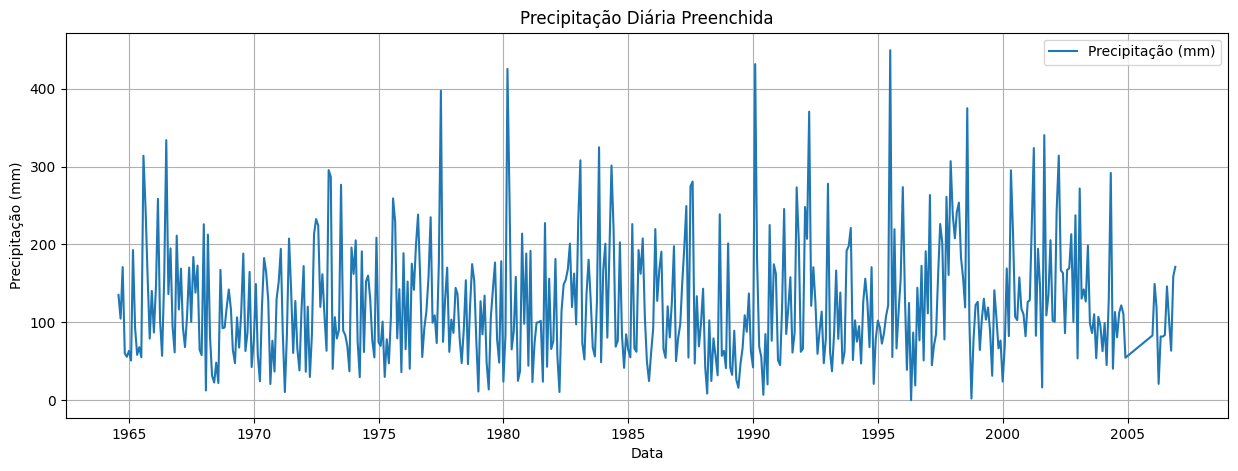

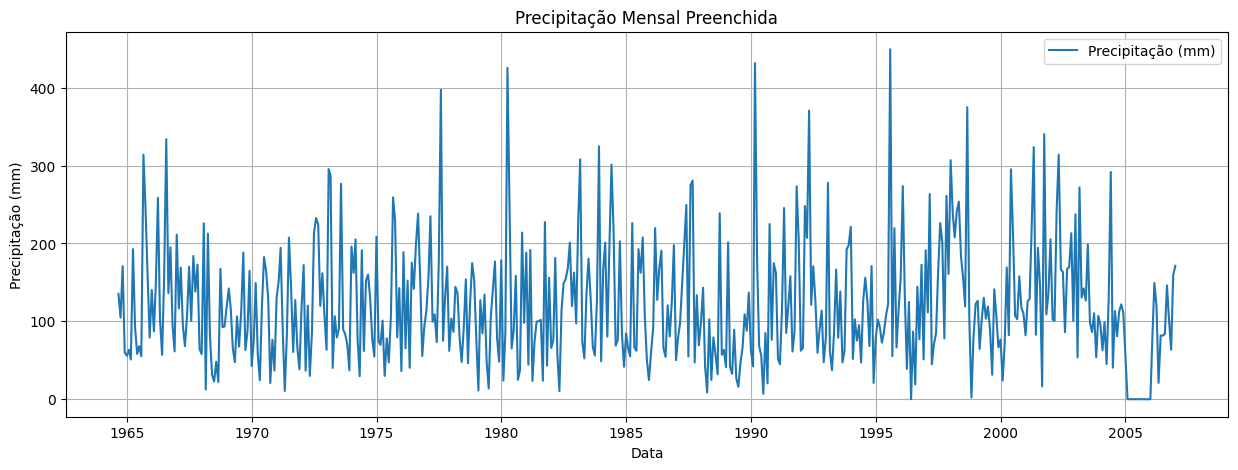

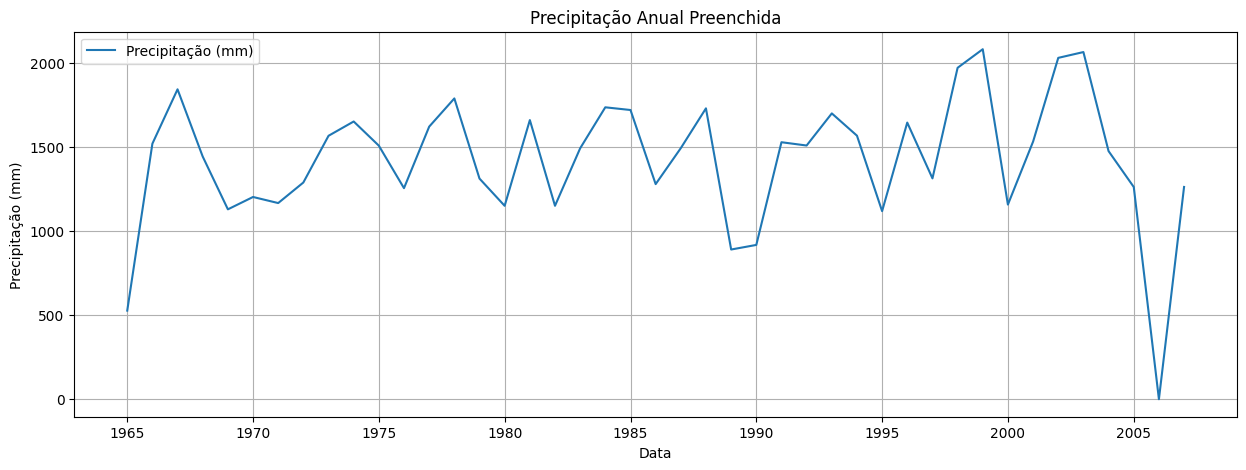

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Suponha que df_ponte e df_cascata já estejam carregados e com coluna 'Data' como datetime
# E coluna 'Total' com precipitação diária
# Filtramos nível consistência 2
df_ponte = df_ponte[df_ponte['NivelConsistencia'] == 2].copy()
df_cascata = df_cascata[df_cascata['NivelConsistencia'] == 2].copy()

df_ponte['Data'] = pd.to_datetime(df_ponte['Data'], dayfirst=True)
df_cascata['Data'] = pd.to_datetime(df_cascata['Data'], dayfirst=True)

# Criar séries temporais diárias, indexadas em Data
serie_diaria_ponte = df_ponte.set_index('Data')['Total'].sort_index()
serie_diaria_cascata = df_cascata.set_index('Data')['Total'].sort_index()

# Reamostrar para mensal e anual
serie_mensal_ponte = serie_diaria_ponte.resample('ME').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('ME').sum()
serie_anual_ponte = serie_diaria_ponte.resample('YE').sum()
serie_anual_cascata = serie_diaria_cascata.resample('YE').sum()

def preencher_regressao(serie_ponte, serie_vizinha):
    # Mesclar índices para garantir alinhamento
    df_merge = pd.DataFrame({'ponte': serie_ponte, 'vizinha': serie_vizinha})

    # Dados para treino: ambos não nulos
    mask_treino = df_merge['ponte'].notna() & df_merge['vizinha'].notna()

    if mask_treino.sum() < 2:
        print("⚠️ Dados insuficientes para regressão linear. Tentando média aritmética...")
        # Tentar preencher com média aritmética: se vizinha disponível, usar valor dela
        preenchido = serie_ponte.copy()
        mask_falta = preenchido.isna() & serie_vizinha.notna()
        preenchido.loc[mask_falta] = serie_vizinha.loc[mask_falta]
        return preenchido, None

    # Treina modelo de regressão linear
    X_treino = df_merge.loc[mask_treino, 'vizinha'].values.reshape(-1,1)
    y_treino = df_merge.loc[mask_treino, 'ponte'].values
    modelo = LinearRegression().fit(X_treino, y_treino)

    # Preenche valores faltantes usando modelo
    preenchido = serie_ponte.copy()
    mask_falta = preenchido.isna() & serie_vizinha.notna()
    if mask_falta.sum() > 0:
        X_pred = serie_vizinha.loc[mask_falta].values.reshape(-1,1)
        preenchido.loc[mask_falta] = modelo.predict(X_pred)
    return preenchido, modelo

# Preencher para diário, mensal e anual
serie_diaria_preench, modelo_diario = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_preench, modelo_mensal = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_preench, modelo_anual = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

# Detectar falhas (valores NaN) antes do preenchimento
falhas_diarias = serie_diaria_ponte.isna()
falhas_mensais = serie_mensal_ponte.isna()
falhas_anuais = serie_anual_ponte.isna()

print(f"⚠️ Falhas diárias: {falhas_diarias.sum()}")
print(f"⚠️ Falhas mensais: {falhas_mensais.sum()}")
print(f"⚠️ Falhas anuais: {falhas_anuais.sum()}")

# --- Gráfico PNG com matplotlib ---

def plotar_com_falhas(serie, falhas, titulo, filename):
    plt.figure(figsize=(15,5))
    plt.plot(serie.index, serie, label='Precipitação (mm)')
    for dt in serie.index[falhas]:
        plt.axvline(dt, color='red', alpha=0.2)
    plt.title(titulo)
    plt.ylabel('Precipitação (mm)')
    plt.xlabel('Data')
    plt.legend()
    plt.grid(True)
    plt.savefig(filename, dpi=300)
    plt.show()

plotar_com_falhas(serie_diaria_preench, falhas_diarias, 'Precipitação Diária Preenchida', 'precipitacao_diaria_preenchida.png')
plotar_com_falhas(serie_mensal_preench, falhas_mensais, 'Precipitação Mensal Preenchida', 'precipitacao_mensal_preenchida.png')
plotar_com_falhas(serie_anual_preench, falhas_anuais, 'Precipitação Anual Preenchida', 'precipitacao_anual_preenchida.png')

# --- Gráfico interativo Plotly para Colab ---

def plotly_com_falhas(serie, falhas, titulo):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=serie.index, y=serie.values, mode='lines+markers', name='Precipitação'))
    # Barras verticais transparentes para falhas
    for dt in serie.index[falhas]:
        fig.add_vrect(
            x0=dt, x1=dt + pd.Timedelta(days=1),
            fillcolor="red", opacity=0.2, line_width=0)
    fig.update_layout(title=titulo, xaxis_title='Data', yaxis_title='Precipitação (mm)')
    fig.show()

plotly_com_falhas(serie_diaria_preench, falhas_diarias, 'Precipitação Diária Preenchida (Interativo)')
plotly_com_falhas(serie_mensal_preench, falhas_mensais, 'Precipitação Mensal Preenchida (Interativo)')
plotly_com_falhas(serie_anual_preench, falhas_anuais, 'Precipitação Anual Preenchida (Interativo)')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Caminhos dos arquivos CSV
ponte_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'
cascata_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'

# Função para ler CSV e processar datas e filtro consistência
def ler_dados(caminho_csv):
    # Detectar linha do header (procura "EstacaoCodigo")
    with open(caminho_csv, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = next(i for i, linha in enumerate(linhas) if "EstacaoCodigo" in linha)

    # Ler CSV a partir do header detectado
    df = pd.read_csv(
        caminho_csv,
        sep=';',
        decimal=',',
        encoding='latin1',
        skiprows=header_line,
        dayfirst=True
    )

    # Converter coluna 'Data' para datetime, forçando erros a NaT
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')

    # Filtrar consistência 2 e eliminar datas inválidas
    df = df[(df['NivelConsistencia'] == 2) & (df['Data'].notna())]

    # Manter só colunas relevantes
    df = df[['Data', 'Total']].copy()
    df = df.sort_values('Data').reset_index(drop=True)

    return df

# Ler dados
df_ponte = ler_dados(ponte_path)
df_cascata = ler_dados(cascata_path)

# Função para criar série diária com índice contínuo, preenchendo datas faltantes com NaN
def criar_serie_diaria(df):
    if df.empty:
        raise ValueError("DataFrame está vazio")
    start = df['Data'].min()
    end = df['Data'].max()
    idx_completo = pd.date_range(start=start, end=end, freq='D')
    serie = df.set_index('Data')['Total'].reindex(idx_completo)
    serie.index.name = 'Data'
    return serie

serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)

# Função para detectar falhas (datas com NaN)
def detectar_falhas(serie):
    return serie[serie.isna()]

falhas_diarias = detectar_falhas(serie_diaria_ponte)
print(f"⚠️ Número de dias faltando na Ponte Cordeiro: {len(falhas_diarias)}")

# --- Agregar mensal e anual, mantendo índice contínuo (para detectar falhas também) ---

serie_mensal_ponte = serie_diaria_ponte.resample('M').sum(min_count=1)  # min_count=1 para soma com NaN = NaN
serie_mensal_cascata = serie_diaria_cascata.resample('M').sum(min_count=1)

serie_anual_ponte = serie_diaria_ponte.resample('Y').sum(min_count=1)
serie_anual_cascata = serie_diaria_cascata.resample('Y').sum(min_count=1)

falhas_mensais = serie_mensal_ponte[serie_mensal_ponte.isna()]
falhas_anuais = serie_anual_ponte[serie_anual_ponte.isna()]

print(f"⚠️ Número de meses faltando na Ponte Cordeiro: {len(falhas_mensais)}")
print(f"⚠️ Número de anos faltando na Ponte Cordeiro: {len(falhas_anuais)}")

# --- Preenchimento com média aritmética simples ---
def preencher_media(serie_alvo, series_vizinhas):
    # Calcula média das estações vizinhas nos períodos onde o alvo está faltando
    serie_preenchida = serie_alvo.copy()
    falhas = serie_alvo[serie_alvo.isna()].index
    media_vizinhas = pd.concat([s.loc[falhas] for s in series_vizinhas], axis=1).mean(axis=1)
    serie_preenchida.loc[falhas] = media_vizinhas
    return serie_preenchida

# --- Preenchimento por regressão linear simples ---
def preencher_regressao(serie_alvo, serie_vizinha):
    # Apenas nos pontos onde o alvo tem dados e a vizinha tem dados, treinamos
    mask = serie_alvo.notna() & serie_vizinha.notna()
    X = serie_vizinha[mask].values.reshape(-1,1)
    y = serie_alvo[mask].values

    modelo = LinearRegression().fit(X,y)

    serie_preenchida = serie_alvo.copy()
    # Preencher os valores faltantes da estação alvo com predição do modelo
    faltantes = serie_alvo[serie_alvo.isna()].index
    X_pred = serie_vizinha.loc[faltantes].values.reshape(-1,1)
    serie_preenchida.loc[faltantes] = modelo.predict(X_pred)

    return serie_preenchida, modelo

# --- Implementação da ponderação regional simples (vetor de pesos inversos da distância) ---
# Para exemplo simples, consideramos só 2 estações, então peso 0.5 e 0.5 para média

def preencher_ponderacao_regional(serie_alvo, series_vizinhas):
    # Pesos iguais para estações vizinhas (exemplo)
    serie_preenchida = serie_alvo.copy()
    falhas = serie_alvo[serie_alvo.isna()].index
    # Média simples das vizinhas
    media_vizinhas = pd.concat([s.loc[falhas] for s in series_vizinhas], axis=1).mean(axis=1)
    serie_preenchida.loc[falhas] = media_vizinhas
    return serie_preenchida

# --- Preenchimento por regressão ponderada (regressão + ponderação) ---
def preencher_regressao_ponderada(serie_alvo, series_vizinhas):
    # Exemplo: media ponderada das regressões de cada vizinha
    series_preenchidas = []
    pesos = []
    for s in series_vizinhas:
        s_preenchida, modelo = preencher_regressao(serie_alvo, s)
        series_preenchidas.append(s_preenchida)
        # Como peso, use R2 do modelo
        mask = serie_alvo.notna() & s.notna()
        X = s[mask].values.reshape(-1,1)
        y = serie_alvo[mask].values
        r2 = modelo.score(X,y)
        pesos.append(r2 if r2 > 0 else 0)  # peso só se r2 positivo

    pesos = np.array(pesos)
    if pesos.sum() == 0:
        pesos = np.ones_like(pesos)
    pesos = pesos / pesos.sum()

    serie_preenchida = serie_alvo.copy()
    falhas = serie_alvo[serie_alvo.isna()].index
    # Média ponderada das predições
    preds = np.zeros(len(falhas))
    for peso, s_preenchida in zip(pesos, series_preenchidas):
        preds += peso * s_preenchida.loc[falhas].values

    serie_preenchida.loc[falhas] = preds

    return serie_preenchida

# --- Executar preenchimentos para série anual (exemplo) ---

series_vizinhas_anuais = [serie_anual_cascata]

print("Falhas anuais (Ponte Cordeiro):", falhas_anuais.index.strftime('%Y').tolist())

if len(falhas_anuais) > 0:
    # Média
    preenchida_media = preencher_media(serie_anual_ponte, series_vizinhas_anuais)

    # Regressão Linear
    preenchida_regressao, modelo_reg = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

    # Ponderação Regional (média simples aqui)
    preenchida_ponderada = preencher_ponderacao_regional(serie_anual_ponte, series_vizinhas_anuais)

    # Regressão Ponderada
    preenchida_reg_ponderada = preencher_regressao_ponderada(serie_anual_ponte, series_vizinhas_anuais)
else:
    print("⚠️ Não há falhas anuais para preencher.")

# --- Visualização das séries originais e preenchidas ---

import os
os.makedirs('/content/drive/MyDrive/hidrologia/resultados', exist_ok=True)

def plotar_série(serie_original, serie_preenchida, falhas, titulo, arquivo_png):
    plt.figure(figsize=(14,5))
    plt.plot(serie_original.index, serie_original, label='Original', marker='o')
    plt.plot(serie_preenchida.index, serie_preenchida, label='Preenchida', marker='x')
    for falha in falhas.index:
        plt.axvline(falha, color='red', alpha=0.3, linewidth=3)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.savefig(arquivo_png)
    plt.show()
    print(f"Gráfico salvo em {arquivo_png}")

# Exemplo com preenchimento por regressão linear anual
if len(falhas_anuais) > 0:
    plotar_série(
        serie_anual_ponte,
        preenchida_regressao,
        falhas_anuais,
        "Precipitação Anual - Ponte Cordeiro (Original x Preenchida - Regressão Linear)",
        '/content/drive/MyDrive/hidrologia/resultados/precipitacao_anual_preenchida_regressao.png'
    )
else:
    print("Nenhuma falha anual detectada para plotar.")

# --- Plot interativo (Plotly) para zoom dinâmico ---

def plot_interativo(serie_original, serie_preenchida, falhas, titulo):
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Scatter(x=serie_original.index, y=serie_original, mode='lines+markers', name='Original'))
    fig.add_trace(go.Scatter(x=serie_preenchida.index, y=serie_preenchida, mode='lines+markers', name='Preenchida'))
    for falha in falhas.index:
        fig.add_vrect(x0=falha, x1=falha, fillcolor="red", opacity=0.2, layer="below", line_width=0)
    fig.update_layout(title=titulo, xaxis_title="Ano", yaxis_title="Precipitação (mm)")
    fig.show()

if len(falhas_anuais) > 0:
    plot_interativo(
        serie_anual_ponte,
        preenchida_regressao,
        falhas_anuais,
        "Precipitação Anual - Ponte Cordeiro (Original x Preenchida - Regressão Linear)"
    )
else:
    print("Nenhuma falha anual detectada para plot interativo.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: DataFrame está vazio

In [ ]:
cascata_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'

# Abrir arquivo e detectar linha de header
with open(cascata_path, 'r', encoding='latin1') as f:
    linhas = f.readlines()

header_line = None
for i, linha in enumerate(linhas):
    if "EstacaoCodigo" in linha:
        header_line = i
        break

print(f"Linha do cabeçalho no arquivo Cascata: {header_line}")

import pandas as pd

df_cascata = pd.read_csv(
    cascata_path,
    sep=';',
    decimal=',',
    encoding='latin1',
    skiprows=header_line
)

print("Colunas do CSV Cascata:", df_cascata.columns.tolist())
print("Quantidade total de linhas no CSV:", len(df_cascata))
print("Níveis de consistência disponíveis no CSV:", df_cascata['NivelConsistencia'].unique())
print("Quantidade de linhas com NivelConsistencia == 2:", len(df_cascata[df_cascata['NivelConsistencia']==2]))

# Converter a coluna Data para datetime e ver se tem NaT
df_cascata['Data'] = pd.to_datetime(df_cascata['Data'], format='%d/%m/%Y', errors='coerce')
print("Datas inválidas na coluna Data:", df_cascata['Data'].isna().sum())


Linha do cabeçalho no arquivo Cascata: 14
Colunas do CSV Cascata: ['EstacaoCodigo', 'NivelConsistencia', 'Data', 'TipoMedicaoChuvas', 'Maxima', 'Total', 'DiaMaxima', 'NumDiasDeChuva', 'MaximaStatus', 'TotalStatus', 'NumDiasDeChuvaStatus', 'TotalAnual', 'TotalAnualStatus', 'Chuva01', 'Chuva02', 'Chuva03', 'Chuva04', 'Chuva05', 'Chuva06', 'Chuva07', 'Chuva08', 'Chuva09', 'Chuva10', 'Chuva11', 'Chuva12', 'Chuva13', 'Chuva14', 'Chuva15', 'Chuva16', 'Chuva17', 'Chuva18', 'Chuva19', 'Chuva20', 'Chuva21', 'Chuva22', 'Chuva23', 'Chuva24', 'Chuva25', 'Chuva26', 'Chuva27', 'Chuva28', 'Chuva29', 'Chuva30', 'Chuva31', 'Chuva01Status', 'Chuva02Status', 'Chuva03Status', 'Chuva04Status', 'Chuva05Status', 'Chuva06Status', 'Chuva07Status', 'Chuva08Status', 'Chuva09Status', 'Chuva10Status', 'Chuva11Status', 'Chuva12Status', 'Chuva13Status', 'Chuva14Status', 'Chuva15Status', 'Chuva16Status', 'Chuva17Status', 'Chuva18Status', 'Chuva19Status', 'Chuva20Status', 'Chuva21Status', 'Chuva22Status', 'Chuva23Stat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Função para ler dados com flexibilidade de nível de consistência
def ler_dados(caminho_csv, nivel_consistencia=2, nivel_alternativo=None):
    with open(caminho_csv, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = next(i for i, linha in enumerate(linhas) if "EstacaoCodigo" in linha)

    df = pd.read_csv(
        caminho_csv,
        sep=';',
        decimal=',',
        encoding='latin1',
        skiprows=header_line,
        dayfirst=True
    )

    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')

    if 'NivelConsistencia' in df.columns:
        if nivel_consistencia in df['NivelConsistencia'].unique():
            df = df[df['NivelConsistencia'] == nivel_consistencia]
        elif nivel_alternativo and nivel_alternativo in df['NivelConsistencia'].unique():
            print(f"⚠️ Nível {nivel_consistencia} não disponível. Usando nível alternativo {nivel_alternativo}.")
            df = df[df['NivelConsistencia'] == nivel_alternativo]
        else:
            print(f"⚠️ Níveis {nivel_consistencia} e {nivel_alternativo} não disponíveis. Usando todos os dados.")
    else:
        print("⚠️ Coluna 'NivelConsistencia' não encontrada. Usando todos os dados.")

    df = df[df['Data'].notna()]
    df = df[['Data', 'Total']].sort_values('Data').reset_index(drop=True)
    return df

# Função para criar série diária completa (com datas faltantes como NaN)
def criar_serie_diaria(df):
    if df.empty:
        raise ValueError("DataFrame está vazio")
    start = df['Data'].min()
    end = df['Data'].max()
    idx = pd.date_range(start=start, end=end, freq='D')
    serie = df.set_index('Data')['Total'].reindex(idx)
    serie.index.name = 'Data'
    return serie

# Detectar falhas (datas faltantes na série)
def detectar_falhas(serie):
    return serie[serie.isna()]

# Método 1: preencher com média simples da estação vizinha
def preencher_media(serie_alvo, serie_vizinha):
    serie_preenchida = serie_alvo.copy()
    faltantes = serie_preenchida[serie_preenchida.isna()].index
    serie_preenchida.loc[faltantes] = serie_vizinha.loc[faltantes].values
    return serie_preenchida

# Método 2: preencher usando regressão linear
def preencher_regressao(serie_alvo, serie_vizinha):
    # Somente pontos válidos para treino
    mask = (~serie_alvo.isna()) & (~serie_vizinha.isna())
    X_train = serie_vizinha[mask].values.reshape(-1,1)
    y_train = serie_alvo[mask].values
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    serie_preenchida = serie_alvo.copy()
    faltantes = serie_preenchida[serie_preenchida.isna()].index
    X_pred = serie_vizinha.loc[faltantes].values.reshape(-1,1)
    preds = modelo.predict(X_pred)
    serie_preenchida.loc[faltantes] = preds
    return serie_preenchida, modelo

# Função para agregar mensal e anual com reamostragem completa (mantém datas para detectar faltas)
def agregar_series(serie_diaria):
    serie_mensal = serie_diaria.resample('MS').sum(min_count=1)  # MS = primeiro dia do mês
    serie_anual = serie_diaria.resample('AS').sum(min_count=1)   # AS = primeiro dia do ano
    return serie_mensal, serie_anual

# Plot estático (matplotlib) com falhas indicadas
def plotar_estatico(serie, serie_preenchida=None, titulo='', caminho_png=None):
    plt.figure(figsize=(15,5))
    plt.plot(serie.index, serie, label='Original')
    if serie_preenchida is not None:
        plt.plot(serie_preenchida.index, serie_preenchida, label='Preenchida', linestyle='--')
    falhas = detectar_falhas(serie)
    for falha in falhas.index:
        plt.axvline(falha, color='red', alpha=0.2)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    if caminho_png:
        plt.savefig(caminho_png, dpi=300)
        print(f"✅ Gráfico salvo em: {caminho_png}")
    plt.show()

# Plot interativo (plotly) com falhas indicadas
def plotar_interativo(serie, serie_preenchida=None, titulo=''):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=serie.index, y=serie, mode='lines+markers', name='Original'))
    if serie_preenchida is not None:
        fig.add_trace(go.Scatter(x=serie_preenchida.index, y=serie_preenchida,
                                 mode='lines+markers', name='Preenchida', line=dict(dash='dash')))
    falhas = detectar_falhas(serie)
    for falha in falhas.index:
        fig.add_vrect(x0=falha, x1=falha + pd.Timedelta(days=1),
                      fillcolor="red", opacity=0.15, line_width=0)
    fig.update_layout(title=titulo, xaxis_title='Data', yaxis_title='Precipitação (mm)')
    fig.show()

# --------- INÍCIO DO SCRIPT PRINCIPAL ----------

# Caminhos (ajuste conforme seu Drive)
ponte_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'
cascata_path = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'

# Ler dados
df_ponte = ler_dados(ponte_path, nivel_consistencia=2)
df_cascata = ler_dados(cascata_path, nivel_consistencia=2, nivel_alternativo=1)

# Criar séries diárias completas
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)

# Detectar falhas
falhas_dias = detectar_falhas(serie_diaria_ponte)
print(f"⚠️ Falhas - Dias: {len(falhas_dias)}")

# Agregar mensal e anual
serie_mensal_ponte, serie_anual_ponte = agregar_series(serie_diaria_ponte)
serie_mensal_cascata, serie_anual_cascata = agregar_series(serie_diaria_cascata)

# Detectar falhas mensal e anual
falhas_meses = detectar_falhas(serie_mensal_ponte)
falhas_anos = detectar_falhas(serie_anual_ponte)
print(f"⚠️ Falhas - Meses: {len(falhas_meses)}")
print(f"⚠️ Falhas - Anos: {len(falhas_anos)}")

# Preencher falhas usando média simples da estação vizinha (exemplo para diária)
serie_diaria_media = preencher_media(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_media = preencher_media(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_media = preencher_media(serie_anual_ponte, serie_anual_cascata)

# Preencher falhas usando regressão linear
serie_diaria_reg, modelo_dia = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_reg, modelo_mes = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_reg, modelo_ano = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

print("\nModelos de regressão linear (coeficientes):")
print(f"Diária: coef {modelo_dia.coef_[0]:.3f}, intercept {modelo_dia.intercept_:.3f}")
print(f"Mensal: coef {modelo_mes.coef_[0]:.3f}, intercept {modelo_mes.intercept_:.3f}")
print(f"Anual: coef {modelo_ano.coef_[0]:.3f}, intercept {modelo_ano.intercept_:.3f}")

# Plotar séries diárias (interativo e estático)
plotar_estatico(serie_diaria_ponte, serie_diaria_reg, 'Precipitação diária - Ponte Cordeiro\n(Original e preenchida por Regressão)',
                caminho_png='/content/drive/MyDrive/hidrologia/precipitacao/chuva_diaria_regressao.png')

plotar_interativo(serie_diaria_ponte, serie_diaria_reg, 'Precipitação diária - Ponte Cordeiro (Original e preenchida por Regressão)')

# Plotar séries mensais
plotar_estatico(serie_mensal_ponte, serie_mensal_reg, 'Precipitação mensal - Ponte Cordeiro\n(Original e preenchida por Regressão)',
                caminho_png='/content/drive/MyDrive/hidrologia/precipitacao/chuva_mensal_regressao.png')

plotar_interativo(serie_mensal_ponte, serie_mensal_reg, 'Precipitação mensal - Ponte Cordeiro (Original e preenchida por Regressão)')

# Plotar séries anuais
plotar_estatico(serie_anual_ponte, serie_anual_reg, 'Precipitação anual - Ponte Cordeiro\n(Original e preenchida por Regressão)',
                caminho_png='/content/drive/MyDrive/hidrologia/precipitacao/chuva_anual_regressao.png')

plotar_interativo(serie_anual_ponte, serie_anual_reg, 'Precipitação anual - Ponte Cordeiro (Original e preenchida por Regressão)')


⚠️ Nível 2 não disponível. Usando nível alternativo 1.
⚠️ Falhas - Dias: 14966
⚠️ Falhas - Meses: 12
⚠️ Falhas - Anos: 1


/tmp/ipython-input-1548788514.py:81: FutureWarning:

'AS' is deprecated and will be removed in a future version, please use 'YS' instead.



KeyError: "[Timestamp('1964-08-02 00:00:00'), Timestamp('1964-08-03 00:00:00'), Timestamp('1964-08-04 00:00:00'), Timestamp('1964-08-05 00:00:00'), Timestamp('1964-08-06 00:00:00'), Timestamp('1964-08-07 00:00:00'), Timestamp('1964-08-08 00:00:00'), Timestamp('1964-08-09 00:00:00'), Timestamp('1964-08-10 00:00:00'), Timestamp('1964-08-11 00:00:00'), Timestamp('1964-08-12 00:00:00'), Timestamp('1964-08-13 00:00:00'), Timestamp('1964-08-14 00:00:00'), Timestamp('1964-08-15 00:00:00'), Timestamp('1964-08-16 00:00:00'), Timestamp('1964-08-17 00:00:00'), Timestamp('1964-08-18 00:00:00'), Timestamp('1964-08-19 00:00:00'), Timestamp('1964-08-20 00:00:00'), Timestamp('1964-08-21 00:00:00'), Timestamp('1964-08-22 00:00:00'), Timestamp('1964-08-23 00:00:00'), Timestamp('1964-08-24 00:00:00'), Timestamp('1964-08-25 00:00:00'), Timestamp('1964-08-26 00:00:00'), Timestamp('1964-08-27 00:00:00'), Timestamp('1964-08-28 00:00:00'), Timestamp('1964-08-29 00:00:00'), Timestamp('1964-08-30 00:00:00'), Timestamp('1964-08-31 00:00:00'), Timestamp('1964-09-02 00:00:00'), Timestamp('1964-09-03 00:00:00'), Timestamp('1964-09-04 00:00:00'), Timestamp('1964-09-05 00:00:00'), Timestamp('1964-09-06 00:00:00'), Timestamp('1964-09-07 00:00:00'), Timestamp('1964-09-08 00:00:00'), Timestamp('1964-09-09 00:00:00'), Timestamp('1964-09-10 00:00:00'), Timestamp('1964-09-11 00:00:00'), Timestamp('1964-09-12 00:00:00'), Timestamp('1964-09-13 00:00:00'), Timestamp('1964-09-14 00:00:00'), Timestamp('1964-09-15 00:00:00'), Timestamp('1964-09-16 00:00:00'), Timestamp('1964-09-17 00:00:00'), Timestamp('1964-09-18 00:00:00'), Timestamp('1964-09-19 00:00:00'), Timestamp('1964-09-20 00:00:00'), Timestamp('1964-09-21 00:00:00'), Timestamp('1964-09-22 00:00:00'), Timestamp('1964-09-23 00:00:00'), Timestamp('1964-09-24 00:00:00'), Timestamp('1964-09-25 00:00:00'), Timestamp('1964-09-26 00:00:00'), Timestamp('1964-09-27 00:00:00'), Timestamp('1964-09-28 00:00:00'), Timestamp('1964-09-29 00:00:00'), Timestamp('1964-09-30 00:00:00'), Timestamp('1964-10-02 00:00:00'), Timestamp('1964-10-03 00:00:00'), Timestamp('1964-10-04 00:00:00'), Timestamp('1964-10-05 00:00:00'), Timestamp('1964-10-06 00:00:00'), Timestamp('1964-10-07 00:00:00'), Timestamp('1964-10-08 00:00:00'), Timestamp('1964-10-09 00:00:00'), Timestamp('1964-10-10 00:00:00'), Timestamp('1964-10-11 00:00:00'), Timestamp('1964-10-12 00:00:00'), Timestamp('1964-10-13 00:00:00'), Timestamp('1964-10-14 00:00:00'), Timestamp('1964-10-15 00:00:00'), Timestamp('1964-10-16 00:00:00'), Timestamp('1964-10-17 00:00:00'), Timestamp('1964-10-18 00:00:00'), Timestamp('1964-10-19 00:00:00'), Timestamp('1964-10-20 00:00:00'), Timestamp('1964-10-21 00:00:00'), Timestamp('1964-10-22 00:00:00'), Timestamp('1964-10-23 00:00:00'), Timestamp('1964-10-24 00:00:00'), Timestamp('1964-10-25 00:00:00'), Timestamp('1964-10-26 00:00:00'), Timestamp('1964-10-27 00:00:00'), Timestamp('1964-10-28 00:00:00'), Timestamp('1964-10-29 00:00:00'), Timestamp('1964-10-30 00:00:00'), Timestamp('1964-10-31 00:00:00'), Timestamp('1964-11-02 00:00:00'), Timestamp('1964-11-03 00:00:00'), Timestamp('1964-11-04 00:00:00'), Timestamp('1964-11-05 00:00:00'), Timestamp('1964-11-06 00:00:00'), Timestamp('1964-11-07 00:00:00'), Timestamp('1964-11-08 00:00:00'), Timestamp('1964-11-09 00:00:00'), Timestamp('1964-11-10 00:00:00'), Timestamp('1964-11-11 00:00:00'), Timestamp('1964-11-12 00:00:00'), Timestamp('1964-11-13 00:00:00'), Timestamp('1964-11-14 00:00:00'), Timestamp('1964-11-15 00:00:00'), Timestamp('1964-11-16 00:00:00'), Timestamp('1964-11-17 00:00:00'), Timestamp('1964-11-18 00:00:00'), Timestamp('1964-11-19 00:00:00'), Timestamp('1964-11-20 00:00:00'), Timestamp('1964-11-21 00:00:00'), Timestamp('1964-11-22 00:00:00'), Timestamp('1964-11-23 00:00:00'), Timestamp('1964-11-24 00:00:00'), Timestamp('1964-11-25 00:00:00'), Timestamp('1964-11-26 00:00:00'), Timestamp('1964-11-27 00:00:00'), Timestamp('1964-11-28 00:00:00'), Timestamp('1964-11-29 00:00:00'), Timestamp('1964-11-30 00:00:00'), Timestamp('1964-12-02 00:00:00'), Timestamp('1964-12-03 00:00:00'), Timestamp('1964-12-04 00:00:00'), Timestamp('1964-12-05 00:00:00'), Timestamp('1964-12-06 00:00:00'), Timestamp('1964-12-07 00:00:00'), Timestamp('1964-12-08 00:00:00'), Timestamp('1964-12-09 00:00:00'), Timestamp('1964-12-10 00:00:00'), Timestamp('1964-12-11 00:00:00'), Timestamp('1964-12-12 00:00:00'), Timestamp('1964-12-13 00:00:00'), Timestamp('1964-12-14 00:00:00'), Timestamp('1964-12-15 00:00:00'), Timestamp('1964-12-16 00:00:00'), Timestamp('1964-12-17 00:00:00'), Timestamp('1964-12-18 00:00:00'), Timestamp('1964-12-19 00:00:00'), Timestamp('1964-12-20 00:00:00'), Timestamp('1964-12-21 00:00:00'), Timestamp('1964-12-22 00:00:00'), Timestamp('1964-12-23 00:00:00'), Timestamp('1964-12-24 00:00:00'), Timestamp('1964-12-25 00:00:00'), Timestamp('1964-12-26 00:00:00'), Timestamp('1964-12-27 00:00:00'), Timestamp('1964-12-28 00:00:00'), Timestamp('1964-12-29 00:00:00'), Timestamp('1964-12-30 00:00:00'), Timestamp('1964-12-31 00:00:00'), Timestamp('1965-01-02 00:00:00'), Timestamp('1965-01-03 00:00:00'), Timestamp('1965-01-04 00:00:00'), Timestamp('1965-01-05 00:00:00'), Timestamp('1965-01-06 00:00:00'), Timestamp('1965-01-07 00:00:00'), Timestamp('1965-01-08 00:00:00'), Timestamp('1965-01-09 00:00:00'), Timestamp('1965-01-10 00:00:00'), Timestamp('1965-01-11 00:00:00'), Timestamp('1965-01-12 00:00:00'), Timestamp('1965-01-13 00:00:00'), Timestamp('1965-01-14 00:00:00'), Timestamp('1965-01-15 00:00:00'), Timestamp('1965-01-16 00:00:00'), Timestamp('1965-01-17 00:00:00'), Timestamp('1965-01-18 00:00:00'), Timestamp('1965-01-19 00:00:00'), Timestamp('1965-01-20 00:00:00'), Timestamp('1965-01-21 00:00:00'), Timestamp('1965-01-22 00:00:00'), Timestamp('1965-01-23 00:00:00'), Timestamp('1965-01-24 00:00:00'), Timestamp('1965-01-25 00:00:00'), Timestamp('1965-01-26 00:00:00'), Timestamp('1965-01-27 00:00:00'), Timestamp('1965-01-28 00:00:00'), Timestamp('1965-01-29 00:00:00'), Timestamp('1965-01-30 00:00:00'), Timestamp('1965-01-31 00:00:00'), Timestamp('1965-02-02 00:00:00'), Timestamp('1965-02-03 00:00:00'), Timestamp('1965-02-04 00:00:00'), Timestamp('1965-02-05 00:00:00'), Timestamp('1965-02-06 00:00:00'), Timestamp('1965-02-07 00:00:00'), Timestamp('1965-02-08 00:00:00'), Timestamp('1965-02-09 00:00:00'), Timestamp('1965-02-10 00:00:00'), Timestamp('1965-02-11 00:00:00'), Timestamp('1965-02-12 00:00:00'), Timestamp('1965-02-13 00:00:00'), Timestamp('1965-02-14 00:00:00'), Timestamp('1965-02-15 00:00:00'), Timestamp('1965-02-16 00:00:00'), Timestamp('1965-02-17 00:00:00'), Timestamp('1965-02-18 00:00:00'), Timestamp('1965-02-19 00:00:00'), Timestamp('1965-02-20 00:00:00'), Timestamp('1965-02-21 00:00:00'), Timestamp('1965-02-22 00:00:00'), Timestamp('1965-02-23 00:00:00'), Timestamp('1965-02-24 00:00:00'), Timestamp('1965-02-25 00:00:00'), Timestamp('1965-02-26 00:00:00'), Timestamp('1965-02-27 00:00:00'), Timestamp('1965-02-28 00:00:00'), Timestamp('1965-03-02 00:00:00'), Timestamp('1965-03-03 00:00:00'), Timestamp('1965-03-04 00:00:00'), Timestamp('1965-03-05 00:00:00'), Timestamp('1965-03-06 00:00:00'), Timestamp('1965-03-07 00:00:00'), Timestamp('1965-03-08 00:00:00'), Timestamp('1965-03-09 00:00:00'), Timestamp('1965-03-10 00:00:00'), Timestamp('1965-03-11 00:00:00'), Timestamp('1965-03-12 00:00:00'), Timestamp('1965-03-13 00:00:00'), Timestamp('1965-03-14 00:00:00'), Timestamp('1965-03-15 00:00:00'), Timestamp('1965-03-16 00:00:00'), Timestamp('1965-03-17 00:00:00'), Timestamp('1965-03-18 00:00:00'), Timestamp('1965-03-19 00:00:00'), Timestamp('1965-03-20 00:00:00'), Timestamp('1965-03-21 00:00:00'), Timestamp('1965-03-22 00:00:00'), Timestamp('1965-03-23 00:00:00'), Timestamp('1965-03-24 00:00:00'), Timestamp('1965-03-25 00:00:00'), Timestamp('1965-03-26 00:00:00'), Timestamp('1965-03-27 00:00:00'), Timestamp('1965-03-28 00:00:00'), Timestamp('1965-03-29 00:00:00'), Timestamp('1965-03-30 00:00:00'), Timestamp('1965-03-31 00:00:00'), Timestamp('1965-04-02 00:00:00'), Timestamp('1965-04-03 00:00:00'), Timestamp('1965-04-04 00:00:00'), Timestamp('1965-04-05 00:00:00'), Timestamp('1965-04-06 00:00:00'), Timestamp('1965-04-07 00:00:00'), Timestamp('1965-04-08 00:00:00'), Timestamp('1965-04-09 00:00:00'), Timestamp('1965-04-10 00:00:00'), Timestamp('1965-04-11 00:00:00'), Timestamp('1965-04-12 00:00:00'), Timestamp('1965-04-13 00:00:00'), Timestamp('1965-04-14 00:00:00'), Timestamp('1965-04-15 00:00:00'), Timestamp('1965-04-16 00:00:00'), Timestamp('1965-04-17 00:00:00'), Timestamp('1965-04-18 00:00:00'), Timestamp('1965-04-19 00:00:00'), Timestamp('1965-04-20 00:00:00'), Timestamp('1965-04-21 00:00:00'), Timestamp('1965-04-22 00:00:00'), Timestamp('1965-04-23 00:00:00'), Timestamp('1965-04-24 00:00:00'), Timestamp('1965-04-25 00:00:00'), Timestamp('1965-04-26 00:00:00'), Timestamp('1965-04-27 00:00:00'), Timestamp('1965-04-28 00:00:00'), Timestamp('1965-04-29 00:00:00'), Timestamp('1965-04-30 00:00:00'), Timestamp('1965-05-02 00:00:00'), Timestamp('1965-05-03 00:00:00'), Timestamp('1965-05-04 00:00:00'), Timestamp('1965-05-05 00:00:00'), Timestamp('1965-05-06 00:00:00'), Timestamp('1965-05-07 00:00:00'), Timestamp('1965-05-08 00:00:00'), Timestamp('1965-05-09 00:00:00'), Timestamp('1965-05-10 00:00:00'), Timestamp('1965-05-11 00:00:00'), Timestamp('1965-05-12 00:00:00'), Timestamp('1965-05-13 00:00:00'), Timestamp('1965-05-14 00:00:00'), Timestamp('1965-05-15 00:00:00'), Timestamp('1965-05-16 00:00:00'), Timestamp('1965-05-17 00:00:00'), Timestamp('1965-05-18 00:00:00'), Timestamp('1965-05-19 00:00:00'), Timestamp('1965-05-20 00:00:00'), Timestamp('1965-05-21 00:00:00'), Timestamp('1965-05-22 00:00:00'), Timestamp('1965-05-23 00:00:00'), Timestamp('1965-05-24 00:00:00'), Timestamp('1965-05-25 00:00:00'), Timestamp('1965-05-26 00:00:00'), Timestamp('1965-05-27 00:00:00'), Timestamp('1965-05-28 00:00:00'), Timestamp('1965-05-29 00:00:00'), Timestamp('1965-05-30 00:00:00'), Timestamp('1965-05-31 00:00:00'), Timestamp('1965-06-02 00:00:00'), Timestamp('1965-06-03 00:00:00'), Timestamp('1965-06-04 00:00:00'), Timestamp('1965-06-05 00:00:00'), Timestamp('1965-06-06 00:00:00'), Timestamp('1965-06-07 00:00:00'), Timestamp('1965-06-08 00:00:00'), Timestamp('1965-06-09 00:00:00'), Timestamp('1965-06-10 00:00:00'), Timestamp('1965-06-11 00:00:00'), Timestamp('1965-06-12 00:00:00'), Timestamp('1965-06-13 00:00:00'), Timestamp('1965-06-14 00:00:00'), Timestamp('1965-06-15 00:00:00'), Timestamp('1965-06-16 00:00:00'), Timestamp('1965-06-17 00:00:00'), Timestamp('1965-06-18 00:00:00'), Timestamp('1965-06-19 00:00:00'), Timestamp('1965-06-20 00:00:00'), Timestamp('1965-06-21 00:00:00'), Timestamp('1965-06-22 00:00:00'), Timestamp('1965-06-23 00:00:00'), Timestamp('1965-06-24 00:00:00'), Timestamp('1965-06-25 00:00:00'), Timestamp('1965-06-26 00:00:00'), Timestamp('1965-06-27 00:00:00'), Timestamp('1965-06-28 00:00:00'), Timestamp('1965-06-29 00:00:00'), Timestamp('1965-06-30 00:00:00'), Timestamp('1965-07-02 00:00:00'), Timestamp('1965-07-03 00:00:00'), Timestamp('1965-07-04 00:00:00'), Timestamp('1965-07-05 00:00:00'), Timestamp('1965-07-06 00:00:00'), Timestamp('1965-07-07 00:00:00'), Timestamp('1965-07-08 00:00:00'), Timestamp('1965-07-09 00:00:00'), Timestamp('1965-07-10 00:00:00'), Timestamp('1965-07-11 00:00:00'), Timestamp('1965-07-12 00:00:00'), Timestamp('1965-07-13 00:00:00'), Timestamp('1965-07-14 00:00:00'), Timestamp('1965-07-15 00:00:00'), Timestamp('1965-07-16 00:00:00'), Timestamp('1965-07-17 00:00:00'), Timestamp('1965-07-18 00:00:00'), Timestamp('1965-07-19 00:00:00'), Timestamp('1965-07-20 00:00:00'), Timestamp('1965-07-21 00:00:00'), Timestamp('1965-07-22 00:00:00'), Timestamp('1965-07-23 00:00:00'), Timestamp('1965-07-24 00:00:00'), Timestamp('1965-07-25 00:00:00'), Timestamp('1965-07-26 00:00:00'), Timestamp('1965-07-27 00:00:00'), Timestamp('1965-07-28 00:00:00'), Timestamp('1965-07-29 00:00:00'), Timestamp('1965-07-30 00:00:00'), Timestamp('1965-07-31 00:00:00'), Timestamp('1965-08-02 00:00:00'), Timestamp('1965-08-03 00:00:00'), Timestamp('1965-08-04 00:00:00'), Timestamp('1965-08-05 00:00:00'), Timestamp('1965-08-06 00:00:00'), Timestamp('1965-08-07 00:00:00'), Timestamp('1965-08-08 00:00:00'), Timestamp('1965-08-09 00:00:00'), Timestamp('1965-08-10 00:00:00'), Timestamp('1965-08-11 00:00:00'), Timestamp('1965-08-12 00:00:00'), Timestamp('1965-08-13 00:00:00'), Timestamp('1965-08-14 00:00:00'), Timestamp('1965-08-15 00:00:00'), Timestamp('1965-08-16 00:00:00'), Timestamp('1965-08-17 00:00:00'), Timestamp('1965-08-18 00:00:00'), Timestamp('1965-08-19 00:00:00'), Timestamp('1965-08-20 00:00:00'), Timestamp('1965-08-21 00:00:00'), Timestamp('1965-08-22 00:00:00'), Timestamp('1965-08-23 00:00:00'), Timestamp('1965-08-24 00:00:00'), Timestamp('1965-08-25 00:00:00'), Timestamp('1965-08-26 00:00:00'), Timestamp('1965-08-27 00:00:00'), Timestamp('1965-08-28 00:00:00'), Timestamp('1965-08-29 00:00:00'), Timestamp('1965-08-30 00:00:00'), Timestamp('1965-08-31 00:00:00'), Timestamp('1965-09-02 00:00:00'), Timestamp('1965-09-03 00:00:00'), Timestamp('1965-09-04 00:00:00'), Timestamp('1965-09-05 00:00:00'), Timestamp('1965-09-06 00:00:00'), Timestamp('1965-09-07 00:00:00'), Timestamp('1965-09-08 00:00:00'), Timestamp('1965-09-09 00:00:00'), Timestamp('1965-09-10 00:00:00'), Timestamp('1965-09-11 00:00:00'), Timestamp('1965-09-12 00:00:00'), Timestamp('1965-09-13 00:00:00'), Timestamp('1965-09-14 00:00:00'), Timestamp('1965-09-15 00:00:00'), Timestamp('1965-09-16 00:00:00'), Timestamp('1965-09-17 00:00:00'), Timestamp('1965-09-18 00:00:00'), Timestamp('1965-09-19 00:00:00'), Timestamp('1965-09-20 00:00:00'), Timestamp('1965-09-21 00:00:00'), Timestamp('1965-09-22 00:00:00'), Timestamp('1965-09-23 00:00:00'), Timestamp('1965-09-24 00:00:00'), Timestamp('1965-09-25 00:00:00'), Timestamp('1965-09-26 00:00:00'), Timestamp('1965-09-27 00:00:00'), Timestamp('1965-09-28 00:00:00'), Timestamp('1965-09-29 00:00:00'), Timestamp('1965-09-30 00:00:00'), Timestamp('1965-10-02 00:00:00'), Timestamp('1965-10-03 00:00:00'), Timestamp('1965-10-04 00:00:00'), Timestamp('1965-10-05 00:00:00'), Timestamp('1965-10-06 00:00:00'), Timestamp('1965-10-07 00:00:00'), Timestamp('1965-10-08 00:00:00'), Timestamp('1965-10-09 00:00:00'), Timestamp('1965-10-10 00:00:00'), Timestamp('1965-10-11 00:00:00'), Timestamp('1965-10-12 00:00:00'), Timestamp('1965-10-13 00:00:00'), Timestamp('1965-10-14 00:00:00'), Timestamp('1965-10-15 00:00:00'), Timestamp('1965-10-16 00:00:00'), Timestamp('1965-10-17 00:00:00'), Timestamp('1965-10-18 00:00:00'), Timestamp('1965-10-19 00:00:00'), Timestamp('1965-10-20 00:00:00'), Timestamp('1965-10-21 00:00:00'), Timestamp('1965-10-22 00:00:00'), Timestamp('1965-10-23 00:00:00'), Timestamp('1965-10-24 00:00:00'), Timestamp('1965-10-25 00:00:00'), Timestamp('1965-10-26 00:00:00'), Timestamp('1965-10-27 00:00:00'), Timestamp('1965-10-28 00:00:00'), Timestamp('1965-10-29 00:00:00'), Timestamp('1965-10-30 00:00:00'), Timestamp('1965-10-31 00:00:00'), Timestamp('1965-11-02 00:00:00'), Timestamp('1965-11-03 00:00:00'), Timestamp('1965-11-04 00:00:00'), Timestamp('1965-11-05 00:00:00'), Timestamp('1965-11-06 00:00:00'), Timestamp('1965-11-07 00:00:00'), Timestamp('1965-11-08 00:00:00'), Timestamp('1965-11-09 00:00:00'), Timestamp('1965-11-10 00:00:00'), Timestamp('1965-11-11 00:00:00'), Timestamp('1965-11-12 00:00:00'), Timestamp('1965-11-13 00:00:00'), Timestamp('1965-11-14 00:00:00'), Timestamp('1965-11-15 00:00:00'), Timestamp('1965-11-16 00:00:00'), Timestamp('1965-11-17 00:00:00'), Timestamp('1965-11-18 00:00:00'), Timestamp('1965-11-19 00:00:00'), Timestamp('1965-11-20 00:00:00'), Timestamp('1965-11-21 00:00:00'), Timestamp('1965-11-22 00:00:00'), Timestamp('1965-11-23 00:00:00'), Timestamp('1965-11-24 00:00:00'), Timestamp('1965-11-25 00:00:00'), Timestamp('1965-11-26 00:00:00'), Timestamp('1965-11-27 00:00:00'), Timestamp('1965-11-28 00:00:00'), Timestamp('1965-11-29 00:00:00'), Timestamp('1965-11-30 00:00:00'), Timestamp('1965-12-02 00:00:00'), Timestamp('1965-12-03 00:00:00'), Timestamp('1965-12-04 00:00:00'), Timestamp('1965-12-05 00:00:00'), Timestamp('1965-12-06 00:00:00'), Timestamp('1965-12-07 00:00:00'), Timestamp('1965-12-08 00:00:00'), Timestamp('1965-12-09 00:00:00'), Timestamp('1965-12-10 00:00:00'), Timestamp('1965-12-11 00:00:00'), Timestamp('1965-12-12 00:00:00'), Timestamp('1965-12-13 00:00:00'), Timestamp('1965-12-14 00:00:00'), Timestamp('1965-12-15 00:00:00'), Timestamp('1965-12-16 00:00:00'), Timestamp('1965-12-17 00:00:00'), Timestamp('1965-12-18 00:00:00'), Timestamp('1965-12-19 00:00:00'), Timestamp('1965-12-20 00:00:00'), Timestamp('1965-12-21 00:00:00'), Timestamp('1965-12-22 00:00:00'), Timestamp('1965-12-23 00:00:00'), Timestamp('1965-12-24 00:00:00'), Timestamp('1965-12-25 00:00:00'), Timestamp('1965-12-26 00:00:00'), Timestamp('1965-12-27 00:00:00'), Timestamp('1965-12-28 00:00:00'), Timestamp('1965-12-29 00:00:00'), Timestamp('1965-12-30 00:00:00'), Timestamp('1965-12-31 00:00:00'), Timestamp('1966-01-02 00:00:00'), Timestamp('1966-01-03 00:00:00'), Timestamp('1966-01-04 00:00:00'), Timestamp('1966-01-05 00:00:00'), Timestamp('1966-01-06 00:00:00'), Timestamp('1966-01-07 00:00:00'), Timestamp('1966-01-08 00:00:00'), Timestamp('1966-01-09 00:00:00'), Timestamp('1966-01-10 00:00:00'), Timestamp('1966-01-11 00:00:00'), Timestamp('1966-01-12 00:00:00'), Timestamp('1966-01-13 00:00:00'), Timestamp('1966-01-14 00:00:00'), Timestamp('1966-01-15 00:00:00'), Timestamp('1966-01-16 00:00:00'), Timestamp('1966-01-17 00:00:00'), Timestamp('1966-01-18 00:00:00'), Timestamp('1966-01-19 00:00:00'), Timestamp('1966-01-20 00:00:00'), Timestamp('1966-01-21 00:00:00'), Timestamp('1966-01-22 00:00:00'), Timestamp('1966-01-23 00:00:00'), Timestamp('1966-01-24 00:00:00'), Timestamp('1966-01-25 00:00:00'), Timestamp('1966-01-26 00:00:00'), Timestamp('1966-01-27 00:00:00'), Timestamp('1966-01-28 00:00:00'), Timestamp('1966-01-29 00:00:00'), Timestamp('1966-01-30 00:00:00'), Timestamp('1966-01-31 00:00:00'), Timestamp('1966-02-02 00:00:00'), Timestamp('1966-02-03 00:00:00'), Timestamp('1966-02-04 00:00:00'), Timestamp('1966-02-05 00:00:00'), Timestamp('1966-02-06 00:00:00'), Timestamp('1966-02-07 00:00:00'), Timestamp('1966-02-08 00:00:00'), Timestamp('1966-02-09 00:00:00'), Timestamp('1966-02-10 00:00:00'), Timestamp('1966-02-11 00:00:00'), Timestamp('1966-02-12 00:00:00'), Timestamp('1966-02-13 00:00:00'), Timestamp('1966-02-14 00:00:00'), Timestamp('1966-02-15 00:00:00'), Timestamp('1966-02-16 00:00:00'), Timestamp('1966-02-17 00:00:00'), Timestamp('1966-02-18 00:00:00'), Timestamp('1966-02-19 00:00:00'), Timestamp('1966-02-20 00:00:00'), Timestamp('1966-02-21 00:00:00'), Timestamp('1966-02-22 00:00:00'), Timestamp('1966-02-23 00:00:00'), Timestamp('1966-02-24 00:00:00'), Timestamp('1966-02-25 00:00:00'), Timestamp('1966-02-26 00:00:00'), Timestamp('1966-02-27 00:00:00'), Timestamp('1966-02-28 00:00:00'), Timestamp('1966-03-02 00:00:00'), Timestamp('1966-03-03 00:00:00'), Timestamp('1966-03-04 00:00:00'), Timestamp('1966-03-05 00:00:00'), Timestamp('1966-03-06 00:00:00'), Timestamp('1966-03-07 00:00:00'), Timestamp('1966-03-08 00:00:00'), Timestamp('1966-03-09 00:00:00'), Timestamp('1966-03-10 00:00:00'), Timestamp('1966-03-11 00:00:00'), Timestamp('1966-03-12 00:00:00'), Timestamp('1966-03-13 00:00:00'), Timestamp('1966-03-14 00:00:00'), Timestamp('1966-03-15 00:00:00'), Timestamp('1966-03-16 00:00:00'), Timestamp('1966-03-17 00:00:00'), Timestamp('1966-03-18 00:00:00'), Timestamp('1966-03-19 00:00:00'), Timestamp('1966-03-20 00:00:00'), Timestamp('1966-03-21 00:00:00'), Timestamp('1966-03-22 00:00:00'), Timestamp('1966-03-23 00:00:00'), Timestamp('1966-03-24 00:00:00'), Timestamp('1966-03-25 00:00:00'), Timestamp('1966-03-26 00:00:00'), Timestamp('1966-03-27 00:00:00'), Timestamp('1966-03-28 00:00:00'), Timestamp('1966-03-29 00:00:00'), Timestamp('1966-03-30 00:00:00'), Timestamp('1966-03-31 00:00:00'), Timestamp('1966-04-02 00:00:00'), Timestamp('1966-04-03 00:00:00'), Timestamp('1966-04-04 00:00:00'), Timestamp('1966-04-05 00:00:00'), Timestamp('1966-04-06 00:00:00'), Timestamp('1966-04-07 00:00:00'), Timestamp('1966-04-08 00:00:00'), Timestamp('1966-04-09 00:00:00'), Timestamp('1966-04-10 00:00:00'), Timestamp('1966-04-11 00:00:00'), Timestamp('1966-04-12 00:00:00'), Timestamp('1966-04-13 00:00:00'), Timestamp('1966-04-14 00:00:00'), Timestamp('1966-04-15 00:00:00'), Timestamp('1966-04-16 00:00:00'), Timestamp('1966-04-17 00:00:00'), Timestamp('1966-04-18 00:00:00'), Timestamp('1966-04-19 00:00:00'), Timestamp('1966-04-20 00:00:00'), Timestamp('1966-04-21 00:00:00'), Timestamp('1966-04-22 00:00:00'), Timestamp('1966-04-23 00:00:00'), Timestamp('1966-04-24 00:00:00'), Timestamp('1966-04-25 00:00:00'), Timestamp('1966-04-26 00:00:00'), Timestamp('1966-04-27 00:00:00'), Timestamp('1966-04-28 00:00:00'), Timestamp('1966-04-29 00:00:00'), Timestamp('1966-04-30 00:00:00'), Timestamp('1966-05-02 00:00:00'), Timestamp('1966-05-03 00:00:00'), Timestamp('1966-05-04 00:00:00'), Timestamp('1966-05-05 00:00:00'), Timestamp('1966-05-06 00:00:00'), Timestamp('1966-05-07 00:00:00'), Timestamp('1966-05-08 00:00:00'), Timestamp('1966-05-09 00:00:00'), Timestamp('1966-05-10 00:00:00'), Timestamp('1966-05-11 00:00:00'), Timestamp('1966-05-12 00:00:00'), Timestamp('1966-05-13 00:00:00'), Timestamp('1966-05-14 00:00:00'), Timestamp('1966-05-15 00:00:00'), Timestamp('1966-05-16 00:00:00'), Timestamp('1966-05-17 00:00:00'), Timestamp('1966-05-18 00:00:00'), Timestamp('1966-05-19 00:00:00'), Timestamp('1966-05-20 00:00:00'), Timestamp('1966-05-21 00:00:00'), Timestamp('1966-05-22 00:00:00'), Timestamp('1966-05-23 00:00:00'), Timestamp('1966-05-24 00:00:00'), Timestamp('1966-05-25 00:00:00'), Timestamp('1966-05-26 00:00:00'), Timestamp('1966-05-27 00:00:00'), Timestamp('1966-05-28 00:00:00'), Timestamp('1966-05-29 00:00:00'), Timestamp('1966-05-30 00:00:00'), Timestamp('1966-05-31 00:00:00'), Timestamp('1966-06-02 00:00:00'), Timestamp('1966-06-03 00:00:00'), Timestamp('1966-06-04 00:00:00'), Timestamp('1966-06-05 00:00:00'), Timestamp('1966-06-06 00:00:00'), Timestamp('1966-06-07 00:00:00'), Timestamp('1966-06-08 00:00:00'), Timestamp('1966-06-09 00:00:00'), Timestamp('1966-06-10 00:00:00'), Timestamp('1966-06-11 00:00:00'), Timestamp('1966-06-12 00:00:00'), Timestamp('1966-06-13 00:00:00'), Timestamp('1966-06-14 00:00:00'), Timestamp('1966-06-15 00:00:00'), Timestamp('1966-06-16 00:00:00'), Timestamp('1966-06-17 00:00:00'), Timestamp('1966-06-18 00:00:00'), Timestamp('1966-06-19 00:00:00'), Timestamp('1966-06-20 00:00:00'), Timestamp('1966-06-21 00:00:00'), Timestamp('1966-06-22 00:00:00'), Timestamp('1966-06-23 00:00:00'), Timestamp('1966-06-24 00:00:00'), Timestamp('1966-06-25 00:00:00'), Timestamp('1966-06-26 00:00:00'), Timestamp('1966-06-27 00:00:00'), Timestamp('1966-06-28 00:00:00'), Timestamp('1966-06-29 00:00:00'), Timestamp('1966-06-30 00:00:00'), Timestamp('1966-07-02 00:00:00'), Timestamp('1966-07-03 00:00:00'), Timestamp('1966-07-04 00:00:00'), Timestamp('1966-07-05 00:00:00'), Timestamp('1966-07-06 00:00:00'), Timestamp('1966-07-07 00:00:00'), Timestamp('1966-07-08 00:00:00'), Timestamp('1966-07-09 00:00:00'), Timestamp('1966-07-10 00:00:00'), Timestamp('1966-07-11 00:00:00'), Timestamp('1966-07-12 00:00:00'), Timestamp('1966-07-13 00:00:00'), Timestamp('1966-07-14 00:00:00'), Timestamp('1966-07-15 00:00:00'), Timestamp('1966-07-16 00:00:00'), Timestamp('1966-07-17 00:00:00'), Timestamp('1966-07-18 00:00:00'), Timestamp('1966-07-19 00:00:00'), Timestamp('1966-07-20 00:00:00'), Timestamp('1966-07-21 00:00:00'), Timestamp('1966-07-22 00:00:00'), Timestamp('1966-07-23 00:00:00'), Timestamp('1966-07-24 00:00:00'), Timestamp('1966-07-25 00:00:00'), Timestamp('1966-07-26 00:00:00'), Timestamp('1966-07-27 00:00:00'), Timestamp('1966-07-28 00:00:00'), Timestamp('1966-07-29 00:00:00'), Timestamp('1966-07-30 00:00:00'), Timestamp('1966-07-31 00:00:00'), Timestamp('1966-08-02 00:00:00'), Timestamp('1966-08-03 00:00:00'), Timestamp('1966-08-04 00:00:00'), Timestamp('1966-08-05 00:00:00'), Timestamp('1966-08-06 00:00:00'), Timestamp('1966-08-07 00:00:00'), Timestamp('1966-08-08 00:00:00'), Timestamp('1966-08-09 00:00:00'), Timestamp('1966-08-10 00:00:00'), Timestamp('1966-08-11 00:00:00'), Timestamp('1966-08-12 00:00:00'), Timestamp('1966-08-13 00:00:00'), Timestamp('1966-08-14 00:00:00'), Timestamp('1966-08-15 00:00:00'), Timestamp('1966-08-16 00:00:00'), Timestamp('1966-08-17 00:00:00'), Timestamp('1966-08-18 00:00:00'), Timestamp('1966-08-19 00:00:00'), Timestamp('1966-08-20 00:00:00'), Timestamp('1966-08-21 00:00:00'), Timestamp('1966-08-22 00:00:00'), Timestamp('1966-08-23 00:00:00'), Timestamp('1966-08-24 00:00:00'), Timestamp('1966-08-25 00:00:00'), Timestamp('1966-08-26 00:00:00'), Timestamp('1966-08-27 00:00:00'), Timestamp('1966-08-28 00:00:00'), Timestamp('1966-08-29 00:00:00'), Timestamp('1966-08-30 00:00:00'), Timestamp('1966-08-31 00:00:00'), Timestamp('1966-09-02 00:00:00'), Timestamp('1966-09-03 00:00:00'), Timestamp('1966-09-04 00:00:00'), Timestamp('1966-09-05 00:00:00'), Timestamp('1966-09-06 00:00:00'), Timestamp('1966-09-07 00:00:00'), Timestamp('1966-09-08 00:00:00'), Timestamp('1966-09-09 00:00:00'), Timestamp('1966-09-10 00:00:00'), Timestamp('1966-09-11 00:00:00'), Timestamp('1966-09-12 00:00:00'), Timestamp('1966-09-13 00:00:00'), Timestamp('1966-09-14 00:00:00'), Timestamp('1966-09-15 00:00:00'), Timestamp('1966-09-16 00:00:00'), Timestamp('1966-09-17 00:00:00'), Timestamp('1966-09-18 00:00:00'), Timestamp('1966-09-19 00:00:00'), Timestamp('1966-09-20 00:00:00'), Timestamp('1966-09-21 00:00:00'), Timestamp('1966-09-22 00:00:00'), Timestamp('1966-09-23 00:00:00'), Timestamp('1966-09-24 00:00:00'), Timestamp('1966-09-25 00:00:00'), Timestamp('1966-09-26 00:00:00'), Timestamp('1966-09-27 00:00:00'), Timestamp('1966-09-28 00:00:00'), Timestamp('1966-09-29 00:00:00'), Timestamp('1966-09-30 00:00:00'), Timestamp('1966-10-02 00:00:00'), Timestamp('1966-10-03 00:00:00'), Timestamp('1966-10-04 00:00:00'), Timestamp('1966-10-05 00:00:00'), Timestamp('1966-10-06 00:00:00'), Timestamp('1966-10-07 00:00:00'), Timestamp('1966-10-08 00:00:00'), Timestamp('1966-10-09 00:00:00'), Timestamp('1966-10-10 00:00:00'), Timestamp('1966-10-11 00:00:00'), Timestamp('1966-10-12 00:00:00'), Timestamp('1966-10-13 00:00:00'), Timestamp('1966-10-14 00:00:00'), Timestamp('1966-10-15 00:00:00'), Timestamp('1966-10-16 00:00:00'), Timestamp('1966-10-17 00:00:00'), Timestamp('1966-10-18 00:00:00'), Timestamp('1966-10-19 00:00:00'), Timestamp('1966-10-20 00:00:00'), Timestamp('1966-10-21 00:00:00'), Timestamp('1966-10-22 00:00:00'), Timestamp('1966-10-23 00:00:00'), Timestamp('1966-10-24 00:00:00'), Timestamp('1966-10-25 00:00:00'), Timestamp('1966-10-26 00:00:00'), Timestamp('1966-10-27 00:00:00'), Timestamp('1966-10-28 00:00:00'), Timestamp('1966-10-29 00:00:00'), Timestamp('1966-10-30 00:00:00'), Timestamp('1966-10-31 00:00:00'), Timestamp('1966-11-02 00:00:00'), Timestamp('1966-11-03 00:00:00'), Timestamp('1966-11-04 00:00:00'), Timestamp('1966-11-05 00:00:00'), Timestamp('1966-11-06 00:00:00'), Timestamp('1966-11-07 00:00:00'), Timestamp('1966-11-08 00:00:00'), Timestamp('1966-11-09 00:00:00'), Timestamp('1966-11-10 00:00:00'), Timestamp('1966-11-11 00:00:00'), Timestamp('1966-11-12 00:00:00'), Timestamp('1966-11-13 00:00:00'), Timestamp('1966-11-14 00:00:00'), Timestamp('1966-11-15 00:00:00'), Timestamp('1966-11-16 00:00:00'), Timestamp('1966-11-17 00:00:00'), Timestamp('1966-11-18 00:00:00'), Timestamp('1966-11-19 00:00:00'), Timestamp('1966-11-20 00:00:00'), Timestamp('1966-11-21 00:00:00'), Timestamp('1966-11-22 00:00:00'), Timestamp('1966-11-23 00:00:00'), Timestamp('1966-11-24 00:00:00'), Timestamp('1966-11-25 00:00:00'), Timestamp('1966-11-26 00:00:00'), Timestamp('1966-11-27 00:00:00'), Timestamp('1966-11-28 00:00:00'), Timestamp('1966-11-29 00:00:00'), Timestamp('1966-11-30 00:00:00'), Timestamp('1966-12-02 00:00:00'), Timestamp('1966-12-03 00:00:00'), Timestamp('1966-12-04 00:00:00'), Timestamp('1966-12-05 00:00:00'), Timestamp('1966-12-06 00:00:00'), Timestamp('1966-12-07 00:00:00'), Timestamp('1966-12-08 00:00:00'), Timestamp('1966-12-09 00:00:00'), Timestamp('1966-12-10 00:00:00'), Timestamp('1966-12-11 00:00:00'), Timestamp('1966-12-12 00:00:00'), Timestamp('1966-12-13 00:00:00'), Timestamp('1966-12-14 00:00:00'), Timestamp('1966-12-15 00:00:00'), Timestamp('1966-12-16 00:00:00'), Timestamp('1966-12-17 00:00:00'), Timestamp('1966-12-18 00:00:00'), Timestamp('1966-12-19 00:00:00'), Timestamp('1966-12-20 00:00:00'), Timestamp('1966-12-21 00:00:00'), Timestamp('1966-12-22 00:00:00'), Timestamp('1966-12-23 00:00:00'), Timestamp('1966-12-24 00:00:00'), Timestamp('1966-12-25 00:00:00'), Timestamp('1966-12-26 00:00:00'), Timestamp('1966-12-27 00:00:00'), Timestamp('1966-12-28 00:00:00'), Timestamp('1966-12-29 00:00:00'), Timestamp('1966-12-30 00:00:00'), Timestamp('1966-12-31 00:00:00'), Timestamp('1981-04-02 00:00:00'), Timestamp('1981-04-03 00:00:00'), Timestamp('1981-04-04 00:00:00'), Timestamp('1981-04-05 00:00:00'), Timestamp('1981-04-06 00:00:00'), Timestamp('1981-04-07 00:00:00'), Timestamp('1981-04-08 00:00:00'), Timestamp('1981-04-09 00:00:00'), Timestamp('1981-04-10 00:00:00'), Timestamp('1981-04-11 00:00:00'), Timestamp('1981-04-12 00:00:00'), Timestamp('1981-04-13 00:00:00'), Timestamp('1981-04-14 00:00:00'), Timestamp('1981-04-15 00:00:00'), Timestamp('1981-04-16 00:00:00'), Timestamp('1981-04-17 00:00:00'), Timestamp('1981-04-18 00:00:00'), Timestamp('1981-04-19 00:00:00'), Timestamp('1981-04-20 00:00:00'), Timestamp('1981-04-21 00:00:00'), Timestamp('1981-04-22 00:00:00'), Timestamp('1981-04-23 00:00:00'), Timestamp('1981-04-24 00:00:00'), Timestamp('1981-04-25 00:00:00'), Timestamp('1981-04-26 00:00:00'), Timestamp('1981-04-27 00:00:00'), Timestamp('1981-04-28 00:00:00'), Timestamp('1981-04-29 00:00:00'), Timestamp('1981-04-30 00:00:00'), Timestamp('1981-05-02 00:00:00'), Timestamp('1981-05-03 00:00:00'), Timestamp('1981-05-04 00:00:00'), Timestamp('1981-05-05 00:00:00'), Timestamp('1981-05-06 00:00:00'), Timestamp('1981-05-07 00:00:00'), Timestamp('1981-05-08 00:00:00'), Timestamp('1981-05-09 00:00:00'), Timestamp('1981-05-10 00:00:00'), Timestamp('1981-05-11 00:00:00'), Timestamp('1981-05-12 00:00:00'), Timestamp('1981-05-13 00:00:00'), Timestamp('1981-05-14 00:00:00'), Timestamp('1981-05-15 00:00:00'), Timestamp('1981-05-16 00:00:00'), Timestamp('1981-05-17 00:00:00'), Timestamp('1981-05-18 00:00:00'), Timestamp('1981-05-19 00:00:00'), Timestamp('1981-05-20 00:00:00'), Timestamp('1981-05-21 00:00:00'), Timestamp('1981-05-22 00:00:00'), Timestamp('1981-05-23 00:00:00'), Timestamp('1981-05-24 00:00:00'), Timestamp('1981-05-25 00:00:00'), Timestamp('1981-05-26 00:00:00'), Timestamp('1981-05-27 00:00:00'), Timestamp('1981-05-28 00:00:00'), Timestamp('1981-05-29 00:00:00'), Timestamp('1981-05-30 00:00:00'), Timestamp('1981-05-31 00:00:00'), Timestamp('1981-06-02 00:00:00'), Timestamp('1981-06-03 00:00:00'), Timestamp('1981-06-04 00:00:00'), Timestamp('1981-06-05 00:00:00'), Timestamp('1981-06-06 00:00:00'), Timestamp('1981-06-07 00:00:00'), Timestamp('1981-06-08 00:00:00'), Timestamp('1981-06-09 00:00:00'), Timestamp('1981-06-10 00:00:00'), Timestamp('1981-06-11 00:00:00'), Timestamp('1981-06-12 00:00:00'), Timestamp('1981-06-13 00:00:00'), Timestamp('1981-06-14 00:00:00'), Timestamp('1981-06-15 00:00:00'), Timestamp('1981-06-16 00:00:00'), Timestamp('1981-06-17 00:00:00'), Timestamp('1981-06-18 00:00:00'), Timestamp('1981-06-19 00:00:00'), Timestamp('1981-06-20 00:00:00'), Timestamp('1981-06-21 00:00:00'), Timestamp('1981-06-22 00:00:00'), Timestamp('1981-06-23 00:00:00'), Timestamp('1981-06-24 00:00:00'), Timestamp('1981-06-25 00:00:00'), Timestamp('1981-06-26 00:00:00'), Timestamp('1981-06-27 00:00:00'), Timestamp('1981-06-28 00:00:00'), Timestamp('1981-06-29 00:00:00'), Timestamp('1981-06-30 00:00:00'), Timestamp('1981-07-02 00:00:00'), Timestamp('1981-07-03 00:00:00'), Timestamp('1981-07-04 00:00:00'), Timestamp('1981-07-05 00:00:00'), Timestamp('1981-07-06 00:00:00'), Timestamp('1981-07-07 00:00:00'), Timestamp('1981-07-08 00:00:00'), Timestamp('1981-07-09 00:00:00'), Timestamp('1981-07-10 00:00:00'), Timestamp('1981-07-11 00:00:00'), Timestamp('1981-07-12 00:00:00'), Timestamp('1981-07-13 00:00:00'), Timestamp('1981-07-14 00:00:00'), Timestamp('1981-07-15 00:00:00'), Timestamp('1981-07-16 00:00:00'), Timestamp('1981-07-17 00:00:00'), Timestamp('1981-07-18 00:00:00'), Timestamp('1981-07-19 00:00:00'), Timestamp('1981-07-20 00:00:00'), Timestamp('1981-07-21 00:00:00'), Timestamp('1981-07-22 00:00:00'), Timestamp('1981-07-23 00:00:00'), Timestamp('1981-07-24 00:00:00'), Timestamp('1981-07-25 00:00:00'), Timestamp('1981-07-26 00:00:00'), Timestamp('1981-07-27 00:00:00'), Timestamp('1981-07-28 00:00:00'), Timestamp('1981-07-29 00:00:00'), Timestamp('1981-07-30 00:00:00'), Timestamp('1981-07-31 00:00:00'), Timestamp('1981-08-02 00:00:00'), Timestamp('1981-08-03 00:00:00'), Timestamp('1981-08-04 00:00:00'), Timestamp('1981-08-05 00:00:00'), Timestamp('1981-08-06 00:00:00'), Timestamp('1981-08-07 00:00:00'), Timestamp('1981-08-08 00:00:00'), Timestamp('1981-08-09 00:00:00'), Timestamp('1981-08-10 00:00:00'), Timestamp('1981-08-11 00:00:00'), Timestamp('1981-08-12 00:00:00'), Timestamp('1981-08-13 00:00:00'), Timestamp('1981-08-14 00:00:00'), Timestamp('1981-08-15 00:00:00'), Timestamp('1981-08-16 00:00:00'), Timestamp('1981-08-17 00:00:00'), Timestamp('1981-08-18 00:00:00'), Timestamp('1981-08-19 00:00:00'), Timestamp('1981-08-20 00:00:00'), Timestamp('1981-08-21 00:00:00'), Timestamp('1981-08-22 00:00:00'), Timestamp('1981-08-23 00:00:00'), Timestamp('1981-08-24 00:00:00'), Timestamp('1981-08-25 00:00:00'), Timestamp('1981-08-26 00:00:00'), Timestamp('1981-08-27 00:00:00'), Timestamp('1981-08-28 00:00:00'), Timestamp('1981-08-29 00:00:00'), Timestamp('1981-08-30 00:00:00'), Timestamp('1981-08-31 00:00:00'), Timestamp('1981-09-02 00:00:00'), Timestamp('1981-09-03 00:00:00'), Timestamp('1981-09-04 00:00:00'), Timestamp('1981-09-05 00:00:00'), Timestamp('1981-09-06 00:00:00'), Timestamp('1981-09-07 00:00:00'), Timestamp('1981-09-08 00:00:00'), Timestamp('1981-09-09 00:00:00'), Timestamp('1981-09-10 00:00:00'), Timestamp('1981-09-11 00:00:00'), Timestamp('1981-09-12 00:00:00'), Timestamp('1981-09-13 00:00:00'), Timestamp('1981-09-14 00:00:00'), Timestamp('1981-09-15 00:00:00'), Timestamp('1981-09-16 00:00:00'), Timestamp('1981-09-17 00:00:00'), Timestamp('1981-09-18 00:00:00'), Timestamp('1981-09-19 00:00:00'), Timestamp('1981-09-20 00:00:00'), Timestamp('1981-09-21 00:00:00'), Timestamp('1981-09-22 00:00:00'), Timestamp('1981-09-23 00:00:00'), Timestamp('1981-09-24 00:00:00'), Timestamp('1981-09-25 00:00:00'), Timestamp('1981-09-26 00:00:00'), Timestamp('1981-09-27 00:00:00'), Timestamp('1981-09-28 00:00:00'), Timestamp('1981-09-29 00:00:00'), Timestamp('1981-09-30 00:00:00'), Timestamp('1981-10-02 00:00:00'), Timestamp('1981-10-03 00:00:00'), Timestamp('1981-10-04 00:00:00'), Timestamp('1981-10-05 00:00:00'), Timestamp('1981-10-06 00:00:00'), Timestamp('1981-10-07 00:00:00'), Timestamp('1981-10-08 00:00:00'), Timestamp('1981-10-09 00:00:00'), Timestamp('1981-10-10 00:00:00'), Timestamp('1981-10-11 00:00:00'), Timestamp('1981-10-12 00:00:00'), Timestamp('1981-10-13 00:00:00'), Timestamp('1981-10-14 00:00:00'), Timestamp('1981-10-15 00:00:00'), Timestamp('1981-10-16 00:00:00'), Timestamp('1981-10-17 00:00:00'), Timestamp('1981-10-18 00:00:00'), Timestamp('1981-10-19 00:00:00'), Timestamp('1981-10-20 00:00:00'), Timestamp('1981-10-21 00:00:00'), Timestamp('1981-10-22 00:00:00'), Timestamp('1981-10-23 00:00:00'), Timestamp('1981-10-24 00:00:00'), Timestamp('1981-10-25 00:00:00'), Timestamp('1981-10-26 00:00:00'), Timestamp('1981-10-27 00:00:00'), Timestamp('1981-10-28 00:00:00'), Timestamp('1981-10-29 00:00:00'), Timestamp('1981-10-30 00:00:00'), Timestamp('1981-10-31 00:00:00'), Timestamp('1981-11-02 00:00:00'), Timestamp('1981-11-03 00:00:00'), Timestamp('1981-11-04 00:00:00'), Timestamp('1981-11-05 00:00:00'), Timestamp('1981-11-06 00:00:00'), Timestamp('1981-11-07 00:00:00'), Timestamp('1981-11-08 00:00:00'), Timestamp('1981-11-09 00:00:00'), Timestamp('1981-11-10 00:00:00'), Timestamp('1981-11-11 00:00:00'), Timestamp('1981-11-12 00:00:00'), Timestamp('1981-11-13 00:00:00'), Timestamp('1981-11-14 00:00:00'), Timestamp('1981-11-15 00:00:00'), Timestamp('1981-11-16 00:00:00'), Timestamp('1981-11-17 00:00:00'), Timestamp('1981-11-18 00:00:00'), Timestamp('1981-11-19 00:00:00'), Timestamp('1981-11-20 00:00:00'), Timestamp('1981-11-21 00:00:00'), Timestamp('1981-11-22 00:00:00'), Timestamp('1981-11-23 00:00:00'), Timestamp('1981-11-24 00:00:00'), Timestamp('1981-11-25 00:00:00'), Timestamp('1981-11-26 00:00:00'), Timestamp('1981-11-27 00:00:00'), Timestamp('1981-11-28 00:00:00'), Timestamp('1981-11-29 00:00:00'), Timestamp('1981-11-30 00:00:00'), Timestamp('1981-12-02 00:00:00'), Timestamp('1981-12-03 00:00:00'), Timestamp('1981-12-04 00:00:00'), Timestamp('1981-12-05 00:00:00'), Timestamp('1981-12-06 00:00:00'), Timestamp('1981-12-07 00:00:00'), Timestamp('1981-12-08 00:00:00'), Timestamp('1981-12-09 00:00:00'), Timestamp('1981-12-10 00:00:00'), Timestamp('1981-12-11 00:00:00'), Timestamp('1981-12-12 00:00:00'), Timestamp('1981-12-13 00:00:00'), Timestamp('1981-12-14 00:00:00'), Timestamp('1981-12-15 00:00:00'), Timestamp('1981-12-16 00:00:00'), Timestamp('1981-12-17 00:00:00'), Timestamp('1981-12-18 00:00:00'), Timestamp('1981-12-19 00:00:00'), Timestamp('1981-12-20 00:00:00'), Timestamp('1981-12-21 00:00:00'), Timestamp('1981-12-22 00:00:00'), Timestamp('1981-12-23 00:00:00'), Timestamp('1981-12-24 00:00:00'), Timestamp('1981-12-25 00:00:00'), Timestamp('1981-12-26 00:00:00'), Timestamp('1981-12-27 00:00:00'), Timestamp('1981-12-28 00:00:00'), Timestamp('1981-12-29 00:00:00'), Timestamp('1981-12-30 00:00:00'), Timestamp('1981-12-31 00:00:00'), Timestamp('1982-01-02 00:00:00'), Timestamp('1982-01-03 00:00:00'), Timestamp('1982-01-04 00:00:00'), Timestamp('1982-01-05 00:00:00'), Timestamp('1982-01-06 00:00:00'), Timestamp('1982-01-07 00:00:00'), Timestamp('1982-01-08 00:00:00'), Timestamp('1982-01-09 00:00:00'), Timestamp('1982-01-10 00:00:00'), Timestamp('1982-01-11 00:00:00'), Timestamp('1982-01-12 00:00:00'), Timestamp('1982-01-13 00:00:00'), Timestamp('1982-01-14 00:00:00'), Timestamp('1982-01-15 00:00:00'), Timestamp('1982-01-16 00:00:00'), Timestamp('1982-01-17 00:00:00'), Timestamp('1982-01-18 00:00:00'), Timestamp('1982-01-19 00:00:00'), Timestamp('1982-01-20 00:00:00'), Timestamp('1982-01-21 00:00:00'), Timestamp('1982-01-22 00:00:00'), Timestamp('1982-01-23 00:00:00'), Timestamp('1982-01-24 00:00:00'), Timestamp('1982-01-25 00:00:00'), Timestamp('1982-01-26 00:00:00'), Timestamp('1982-01-27 00:00:00'), Timestamp('1982-01-28 00:00:00'), Timestamp('1982-01-29 00:00:00'), Timestamp('1982-01-30 00:00:00'), Timestamp('1982-01-31 00:00:00'), Timestamp('1982-02-02 00:00:00'), Timestamp('1982-02-03 00:00:00'), Timestamp('1982-02-04 00:00:00'), Timestamp('1982-02-05 00:00:00'), Timestamp('1982-02-06 00:00:00'), Timestamp('1982-02-07 00:00:00'), Timestamp('1982-02-08 00:00:00'), Timestamp('1982-02-09 00:00:00'), Timestamp('1982-02-10 00:00:00'), Timestamp('1982-02-11 00:00:00'), Timestamp('1982-02-12 00:00:00'), Timestamp('1982-02-13 00:00:00'), Timestamp('1982-02-14 00:00:00'), Timestamp('1982-02-15 00:00:00'), Timestamp('1982-02-16 00:00:00'), Timestamp('1982-02-17 00:00:00'), Timestamp('1982-02-18 00:00:00'), Timestamp('1982-02-19 00:00:00'), Timestamp('1982-02-20 00:00:00'), Timestamp('1982-02-21 00:00:00'), Timestamp('1982-02-22 00:00:00'), Timestamp('1982-02-23 00:00:00'), Timestamp('1982-02-24 00:00:00'), Timestamp('1982-02-25 00:00:00'), Timestamp('1982-02-26 00:00:00'), Timestamp('1982-02-27 00:00:00'), Timestamp('1982-02-28 00:00:00'), Timestamp('1982-03-02 00:00:00'), Timestamp('1982-03-03 00:00:00'), Timestamp('1982-03-04 00:00:00'), Timestamp('1982-03-05 00:00:00'), Timestamp('1982-03-06 00:00:00'), Timestamp('1982-03-07 00:00:00'), Timestamp('1982-03-08 00:00:00'), Timestamp('1982-03-09 00:00:00'), Timestamp('1982-03-10 00:00:00'), Timestamp('1982-03-11 00:00:00'), Timestamp('1982-03-12 00:00:00'), Timestamp('1982-03-13 00:00:00'), Timestamp('1982-03-14 00:00:00'), Timestamp('1982-03-15 00:00:00'), Timestamp('1982-03-16 00:00:00'), Timestamp('1982-03-17 00:00:00'), Timestamp('1982-03-18 00:00:00'), Timestamp('1982-03-19 00:00:00'), Timestamp('1982-03-20 00:00:00'), Timestamp('1982-03-21 00:00:00'), Timestamp('1982-03-22 00:00:00'), Timestamp('1982-03-23 00:00:00'), Timestamp('1982-03-24 00:00:00'), Timestamp('1982-03-25 00:00:00'), Timestamp('1982-03-26 00:00:00'), Timestamp('1982-03-27 00:00:00'), Timestamp('1982-03-28 00:00:00'), Timestamp('1982-03-29 00:00:00'), Timestamp('1982-03-30 00:00:00'), Timestamp('1982-03-31 00:00:00'), Timestamp('1982-04-02 00:00:00'), Timestamp('1982-04-03 00:00:00'), Timestamp('1982-04-04 00:00:00'), Timestamp('1982-04-05 00:00:00'), Timestamp('1982-04-06 00:00:00'), Timestamp('1982-04-07 00:00:00'), Timestamp('1982-04-08 00:00:00'), Timestamp('1982-04-09 00:00:00'), Timestamp('1982-04-10 00:00:00'), Timestamp('1982-04-11 00:00:00'), Timestamp('1982-04-12 00:00:00'), Timestamp('1982-04-13 00:00:00'), Timestamp('1982-04-14 00:00:00'), Timestamp('1982-04-15 00:00:00'), Timestamp('1982-04-16 00:00:00'), Timestamp('1982-04-17 00:00:00'), Timestamp('1982-04-18 00:00:00'), Timestamp('1982-04-19 00:00:00'), Timestamp('1982-04-20 00:00:00'), Timestamp('1982-04-21 00:00:00'), Timestamp('1982-04-22 00:00:00'), Timestamp('1982-04-23 00:00:00'), Timestamp('1982-04-24 00:00:00'), Timestamp('1982-04-25 00:00:00'), Timestamp('1982-04-26 00:00:00'), Timestamp('1982-04-27 00:00:00'), Timestamp('1982-04-28 00:00:00'), Timestamp('1982-04-29 00:00:00'), Timestamp('1982-04-30 00:00:00'), Timestamp('1982-05-02 00:00:00'), Timestamp('1982-05-03 00:00:00'), Timestamp('1982-05-04 00:00:00'), Timestamp('1982-05-05 00:00:00'), Timestamp('1982-05-06 00:00:00'), Timestamp('1982-05-07 00:00:00'), Timestamp('1982-05-08 00:00:00'), Timestamp('1982-05-09 00:00:00'), Timestamp('1982-05-10 00:00:00'), Timestamp('1982-05-11 00:00:00'), Timestamp('1982-05-12 00:00:00'), Timestamp('1982-05-13 00:00:00'), Timestamp('1982-05-14 00:00:00'), Timestamp('1982-05-15 00:00:00'), Timestamp('1982-05-16 00:00:00'), Timestamp('1982-05-17 00:00:00'), Timestamp('1982-05-18 00:00:00'), Timestamp('1982-05-19 00:00:00'), Timestamp('1982-05-20 00:00:00'), Timestamp('1982-05-21 00:00:00'), Timestamp('1982-05-22 00:00:00'), Timestamp('1982-05-23 00:00:00'), Timestamp('1982-05-24 00:00:00'), Timestamp('1982-05-25 00:00:00'), Timestamp('1982-05-26 00:00:00'), Timestamp('1982-05-27 00:00:00'), Timestamp('1982-05-28 00:00:00'), Timestamp('1982-05-29 00:00:00'), Timestamp('1982-05-30 00:00:00'), Timestamp('1982-05-31 00:00:00'), Timestamp('1982-06-02 00:00:00'), Timestamp('1982-06-03 00:00:00'), Timestamp('1982-06-04 00:00:00'), Timestamp('1982-06-05 00:00:00'), Timestamp('1982-06-06 00:00:00'), Timestamp('1982-06-07 00:00:00'), Timestamp('1982-06-08 00:00:00'), Timestamp('1982-06-09 00:00:00'), Timestamp('1982-06-10 00:00:00'), Timestamp('1982-06-11 00:00:00'), Timestamp('1982-06-12 00:00:00'), Timestamp('1982-06-13 00:00:00'), Timestamp('1982-06-14 00:00:00'), Timestamp('1982-06-15 00:00:00'), Timestamp('1982-06-16 00:00:00'), Timestamp('1982-06-17 00:00:00'), Timestamp('1982-06-18 00:00:00'), Timestamp('1982-06-19 00:00:00'), Timestamp('1982-06-20 00:00:00'), Timestamp('1982-06-21 00:00:00'), Timestamp('1982-06-22 00:00:00'), Timestamp('1982-06-23 00:00:00'), Timestamp('1982-06-24 00:00:00'), Timestamp('1982-06-25 00:00:00'), Timestamp('1982-06-26 00:00:00'), Timestamp('1982-06-27 00:00:00'), Timestamp('1982-06-28 00:00:00'), Timestamp('1982-06-29 00:00:00'), Timestamp('1982-06-30 00:00:00'), Timestamp('1982-07-02 00:00:00'), Timestamp('1982-07-03 00:00:00'), Timestamp('1982-07-04 00:00:00'), Timestamp('1982-07-05 00:00:00'), Timestamp('1982-07-06 00:00:00'), Timestamp('1982-07-07 00:00:00'), Timestamp('1982-07-08 00:00:00'), Timestamp('1982-07-09 00:00:00'), Timestamp('1982-07-10 00:00:00'), Timestamp('1982-07-11 00:00:00'), Timestamp('1982-07-12 00:00:00'), Timestamp('1982-07-13 00:00:00'), Timestamp('1982-07-14 00:00:00'), Timestamp('1982-07-15 00:00:00'), Timestamp('1982-07-16 00:00:00'), Timestamp('1982-07-17 00:00:00'), Timestamp('1982-07-18 00:00:00'), Timestamp('1982-07-19 00:00:00'), Timestamp('1982-07-20 00:00:00'), Timestamp('1982-07-21 00:00:00'), Timestamp('1982-07-22 00:00:00'), Timestamp('1982-07-23 00:00:00'), Timestamp('1982-07-24 00:00:00'), Timestamp('1982-07-25 00:00:00'), Timestamp('1982-07-26 00:00:00'), Timestamp('1982-07-27 00:00:00'), Timestamp('1982-07-28 00:00:00'), Timestamp('1982-07-29 00:00:00'), Timestamp('1982-07-30 00:00:00'), Timestamp('1982-07-31 00:00:00'), Timestamp('1982-08-02 00:00:00'), Timestamp('1982-08-03 00:00:00'), Timestamp('1982-08-04 00:00:00'), Timestamp('1982-08-05 00:00:00'), Timestamp('1982-08-06 00:00:00'), Timestamp('1982-08-07 00:00:00'), Timestamp('1982-08-08 00:00:00'), Timestamp('1982-08-09 00:00:00'), Timestamp('1982-08-10 00:00:00'), Timestamp('1982-08-11 00:00:00'), Timestamp('1982-08-12 00:00:00'), Timestamp('1982-08-13 00:00:00'), Timestamp('1982-08-14 00:00:00'), Timestamp('1982-08-15 00:00:00'), Timestamp('1982-08-16 00:00:00'), Timestamp('1982-08-17 00:00:00'), Timestamp('1982-08-18 00:00:00'), Timestamp('1982-08-19 00:00:00'), Timestamp('1982-08-20 00:00:00'), Timestamp('1982-08-21 00:00:00'), Timestamp('1982-08-22 00:00:00'), Timestamp('1982-08-23 00:00:00'), Timestamp('1982-08-24 00:00:00'), Timestamp('1982-08-25 00:00:00'), Timestamp('1982-08-26 00:00:00'), Timestamp('1982-08-27 00:00:00'), Timestamp('1982-08-28 00:00:00'), Timestamp('1982-08-29 00:00:00'), Timestamp('1982-08-30 00:00:00'), Timestamp('1982-08-31 00:00:00'), Timestamp('1982-09-02 00:00:00'), Timestamp('1982-09-03 00:00:00'), Timestamp('1982-09-04 00:00:00'), Timestamp('1982-09-05 00:00:00'), Timestamp('1982-09-06 00:00:00'), Timestamp('1982-09-07 00:00:00'), Timestamp('1982-09-08 00:00:00'), Timestamp('1982-09-09 00:00:00'), Timestamp('1982-09-10 00:00:00'), Timestamp('1982-09-11 00:00:00'), Timestamp('1982-09-12 00:00:00'), Timestamp('1982-09-13 00:00:00'), Timestamp('1982-09-14 00:00:00'), Timestamp('1982-09-15 00:00:00'), Timestamp('1982-09-16 00:00:00'), Timestamp('1982-09-17 00:00:00'), Timestamp('1982-09-18 00:00:00'), Timestamp('1982-09-19 00:00:00'), Timestamp('1982-09-20 00:00:00'), Timestamp('1982-09-21 00:00:00'), Timestamp('1982-09-22 00:00:00'), Timestamp('1982-09-23 00:00:00'), Timestamp('1982-09-24 00:00:00'), Timestamp('1982-09-25 00:00:00'), Timestamp('1982-09-26 00:00:00'), Timestamp('1982-09-27 00:00:00'), Timestamp('1982-09-28 00:00:00'), Timestamp('1982-09-29 00:00:00'), Timestamp('1982-09-30 00:00:00'), Timestamp('1982-10-02 00:00:00'), Timestamp('1982-10-03 00:00:00'), Timestamp('1982-10-04 00:00:00'), Timestamp('1982-10-05 00:00:00'), Timestamp('1982-10-06 00:00:00'), Timestamp('1982-10-07 00:00:00'), Timestamp('1982-10-08 00:00:00'), Timestamp('1982-10-09 00:00:00'), Timestamp('1982-10-10 00:00:00'), Timestamp('1982-10-11 00:00:00'), Timestamp('1982-10-12 00:00:00'), Timestamp('1982-10-13 00:00:00'), Timestamp('1982-10-14 00:00:00'), Timestamp('1982-10-15 00:00:00'), Timestamp('1982-10-16 00:00:00'), Timestamp('1982-10-17 00:00:00'), Timestamp('1982-10-18 00:00:00'), Timestamp('1982-10-19 00:00:00'), Timestamp('1982-10-20 00:00:00'), Timestamp('1982-10-21 00:00:00'), Timestamp('1982-10-22 00:00:00'), Timestamp('1982-10-23 00:00:00'), Timestamp('1982-10-24 00:00:00'), Timestamp('1982-10-25 00:00:00'), Timestamp('1982-10-26 00:00:00'), Timestamp('1982-10-27 00:00:00'), Timestamp('1982-10-28 00:00:00'), Timestamp('1982-10-29 00:00:00'), Timestamp('1982-10-30 00:00:00'), Timestamp('1982-10-31 00:00:00'), Timestamp('1982-11-02 00:00:00'), Timestamp('1982-11-03 00:00:00'), Timestamp('1982-11-04 00:00:00'), Timestamp('1982-11-05 00:00:00'), Timestamp('1982-11-06 00:00:00'), Timestamp('1982-11-07 00:00:00'), Timestamp('1982-11-08 00:00:00'), Timestamp('1982-11-09 00:00:00'), Timestamp('1982-11-10 00:00:00'), Timestamp('1982-11-11 00:00:00'), Timestamp('1982-11-12 00:00:00'), Timestamp('1982-11-13 00:00:00'), Timestamp('1982-11-14 00:00:00'), Timestamp('1982-11-15 00:00:00'), Timestamp('1982-11-16 00:00:00'), Timestamp('1982-11-17 00:00:00'), Timestamp('1982-11-18 00:00:00'), Timestamp('1982-11-19 00:00:00'), Timestamp('1982-11-20 00:00:00'), Timestamp('1982-11-21 00:00:00'), Timestamp('1982-11-22 00:00:00'), Timestamp('1982-11-23 00:00:00'), Timestamp('1982-11-24 00:00:00'), Timestamp('1982-11-25 00:00:00'), Timestamp('1982-11-26 00:00:00'), Timestamp('1982-11-27 00:00:00'), Timestamp('1982-11-28 00:00:00'), Timestamp('1982-11-29 00:00:00'), Timestamp('1982-11-30 00:00:00'), Timestamp('1982-12-02 00:00:00'), Timestamp('1982-12-03 00:00:00'), Timestamp('1982-12-04 00:00:00'), Timestamp('1982-12-05 00:00:00'), Timestamp('1982-12-06 00:00:00'), Timestamp('1982-12-07 00:00:00'), Timestamp('1982-12-08 00:00:00'), Timestamp('1982-12-09 00:00:00'), Timestamp('1982-12-10 00:00:00'), Timestamp('1982-12-11 00:00:00'), Timestamp('1982-12-12 00:00:00'), Timestamp('1982-12-13 00:00:00'), Timestamp('1982-12-14 00:00:00'), Timestamp('1982-12-15 00:00:00'), Timestamp('1982-12-16 00:00:00'), Timestamp('1982-12-17 00:00:00'), Timestamp('1982-12-18 00:00:00'), Timestamp('1982-12-19 00:00:00'), Timestamp('1982-12-20 00:00:00'), Timestamp('1982-12-21 00:00:00'), Timestamp('1982-12-22 00:00:00'), Timestamp('1982-12-23 00:00:00'), Timestamp('1982-12-24 00:00:00'), Timestamp('1982-12-25 00:00:00'), Timestamp('1982-12-26 00:00:00'), Timestamp('1982-12-27 00:00:00'), Timestamp('1982-12-28 00:00:00'), Timestamp('1982-12-29 00:00:00'), Timestamp('1982-12-30 00:00:00'), Timestamp('1982-12-31 00:00:00'), Timestamp('1983-01-02 00:00:00'), Timestamp('1983-01-03 00:00:00'), Timestamp('1983-01-04 00:00:00'), Timestamp('1983-01-05 00:00:00'), Timestamp('1983-01-06 00:00:00'), Timestamp('1983-01-07 00:00:00'), Timestamp('1983-01-08 00:00:00'), Timestamp('1983-01-09 00:00:00'), Timestamp('1983-01-10 00:00:00'), Timestamp('1983-01-11 00:00:00'), Timestamp('1983-01-12 00:00:00'), Timestamp('1983-01-13 00:00:00'), Timestamp('1983-01-14 00:00:00'), Timestamp('1983-01-15 00:00:00'), Timestamp('1983-01-16 00:00:00'), Timestamp('1983-01-17 00:00:00'), Timestamp('1983-01-18 00:00:00'), Timestamp('1983-01-19 00:00:00'), Timestamp('1983-01-20 00:00:00'), Timestamp('1983-01-21 00:00:00'), Timestamp('1983-01-22 00:00:00'), Timestamp('1983-01-23 00:00:00'), Timestamp('1983-01-24 00:00:00'), Timestamp('1983-01-25 00:00:00'), Timestamp('1983-01-26 00:00:00'), Timestamp('1983-01-27 00:00:00'), Timestamp('1983-01-28 00:00:00'), Timestamp('1983-01-29 00:00:00'), Timestamp('1983-01-30 00:00:00'), Timestamp('1983-01-31 00:00:00'), Timestamp('1983-02-02 00:00:00'), Timestamp('1983-02-03 00:00:00'), Timestamp('1983-02-04 00:00:00'), Timestamp('1983-02-05 00:00:00'), Timestamp('1983-02-06 00:00:00'), Timestamp('1983-02-07 00:00:00'), Timestamp('1983-02-08 00:00:00'), Timestamp('1983-02-09 00:00:00'), Timestamp('1983-02-10 00:00:00'), Timestamp('1983-02-11 00:00:00'), Timestamp('1983-02-12 00:00:00'), Timestamp('1983-02-13 00:00:00'), Timestamp('1983-02-14 00:00:00'), Timestamp('1983-02-15 00:00:00'), Timestamp('1983-02-16 00:00:00'), Timestamp('1983-02-17 00:00:00'), Timestamp('1983-02-18 00:00:00'), Timestamp('1983-02-19 00:00:00'), Timestamp('1983-02-20 00:00:00'), Timestamp('1983-02-21 00:00:00'), Timestamp('1983-02-22 00:00:00'), Timestamp('1983-02-23 00:00:00'), Timestamp('1983-02-24 00:00:00'), Timestamp('1983-02-25 00:00:00'), Timestamp('1983-02-26 00:00:00'), Timestamp('1983-02-27 00:00:00'), Timestamp('1983-02-28 00:00:00'), Timestamp('1983-03-02 00:00:00'), Timestamp('1983-03-03 00:00:00'), Timestamp('1983-03-04 00:00:00'), Timestamp('1983-03-05 00:00:00'), Timestamp('1983-03-06 00:00:00'), Timestamp('1983-03-07 00:00:00'), Timestamp('1983-03-08 00:00:00'), Timestamp('1983-03-09 00:00:00'), Timestamp('1983-03-10 00:00:00'), Timestamp('1983-03-11 00:00:00'), Timestamp('1983-03-12 00:00:00'), Timestamp('1983-03-13 00:00:00'), Timestamp('1983-03-14 00:00:00'), Timestamp('1983-03-15 00:00:00'), Timestamp('1983-03-16 00:00:00'), Timestamp('1983-03-17 00:00:00'), Timestamp('1983-03-18 00:00:00'), Timestamp('1983-03-19 00:00:00'), Timestamp('1983-03-20 00:00:00'), Timestamp('1983-03-21 00:00:00'), Timestamp('1983-03-22 00:00:00'), Timestamp('1983-03-23 00:00:00'), Timestamp('1983-03-24 00:00:00'), Timestamp('1983-03-25 00:00:00'), Timestamp('1983-03-26 00:00:00'), Timestamp('1983-03-27 00:00:00'), Timestamp('1983-03-28 00:00:00'), Timestamp('1983-03-29 00:00:00'), Timestamp('1983-03-30 00:00:00'), Timestamp('1983-03-31 00:00:00'), Timestamp('1983-04-02 00:00:00'), Timestamp('1983-04-03 00:00:00'), Timestamp('1983-04-04 00:00:00'), Timestamp('1983-04-05 00:00:00'), Timestamp('1983-04-06 00:00:00'), Timestamp('1983-04-07 00:00:00'), Timestamp('1983-04-08 00:00:00'), Timestamp('1983-04-09 00:00:00'), Timestamp('1983-04-10 00:00:00'), Timestamp('1983-04-11 00:00:00'), Timestamp('1983-04-12 00:00:00'), Timestamp('1983-04-13 00:00:00'), Timestamp('1983-04-14 00:00:00'), Timestamp('1983-04-15 00:00:00'), Timestamp('1983-04-16 00:00:00'), Timestamp('1983-04-17 00:00:00'), Timestamp('1983-04-18 00:00:00'), Timestamp('1983-04-19 00:00:00'), Timestamp('1983-04-20 00:00:00'), Timestamp('1983-04-21 00:00:00'), Timestamp('1983-04-22 00:00:00'), Timestamp('1983-04-23 00:00:00'), Timestamp('1983-04-24 00:00:00'), Timestamp('1983-04-25 00:00:00'), Timestamp('1983-04-26 00:00:00'), Timestamp('1983-04-27 00:00:00'), Timestamp('1983-04-28 00:00:00'), Timestamp('1983-04-29 00:00:00'), Timestamp('1983-04-30 00:00:00'), Timestamp('1983-05-02 00:00:00'), Timestamp('1983-05-03 00:00:00'), Timestamp('1983-05-04 00:00:00'), Timestamp('1983-05-05 00:00:00'), Timestamp('1983-05-06 00:00:00'), Timestamp('1983-05-07 00:00:00'), Timestamp('1983-05-08 00:00:00'), Timestamp('1983-05-09 00:00:00'), Timestamp('1983-05-10 00:00:00'), Timestamp('1983-05-11 00:00:00'), Timestamp('1983-05-12 00:00:00'), Timestamp('1983-05-13 00:00:00'), Timestamp('1983-05-14 00:00:00'), Timestamp('1983-05-15 00:00:00'), Timestamp('1983-05-16 00:00:00'), Timestamp('1983-05-17 00:00:00'), Timestamp('1983-05-18 00:00:00'), Timestamp('1983-05-19 00:00:00'), Timestamp('1983-05-20 00:00:00'), Timestamp('1983-05-21 00:00:00'), Timestamp('1983-05-22 00:00:00'), Timestamp('1983-05-23 00:00:00'), Timestamp('1983-05-24 00:00:00'), Timestamp('1983-05-25 00:00:00'), Timestamp('1983-05-26 00:00:00'), Timestamp('1983-05-27 00:00:00'), Timestamp('1983-05-28 00:00:00'), Timestamp('1983-05-29 00:00:00'), Timestamp('1983-05-30 00:00:00'), Timestamp('1983-05-31 00:00:00'), Timestamp('1983-06-02 00:00:00'), Timestamp('1983-06-03 00:00:00'), Timestamp('1983-06-04 00:00:00'), Timestamp('1983-06-05 00:00:00'), Timestamp('1983-06-06 00:00:00'), Timestamp('1983-06-07 00:00:00'), Timestamp('1983-06-08 00:00:00'), Timestamp('1983-06-09 00:00:00'), Timestamp('1983-06-10 00:00:00'), Timestamp('1983-06-11 00:00:00'), Timestamp('1983-06-12 00:00:00'), Timestamp('1983-06-13 00:00:00'), Timestamp('1983-06-14 00:00:00'), Timestamp('1983-06-15 00:00:00'), Timestamp('1983-06-16 00:00:00'), Timestamp('1983-06-17 00:00:00'), Timestamp('1983-06-18 00:00:00'), Timestamp('1983-06-19 00:00:00'), Timestamp('1983-06-20 00:00:00'), Timestamp('1983-06-21 00:00:00'), Timestamp('1983-06-22 00:00:00'), Timestamp('1983-06-23 00:00:00'), Timestamp('1983-06-24 00:00:00'), Timestamp('1983-06-25 00:00:00'), Timestamp('1983-06-26 00:00:00'), Timestamp('1983-06-27 00:00:00'), Timestamp('1983-06-28 00:00:00'), Timestamp('1983-06-29 00:00:00'), Timestamp('1983-06-30 00:00:00'), Timestamp('1983-07-02 00:00:00'), Timestamp('1983-07-03 00:00:00'), Timestamp('1983-07-04 00:00:00'), Timestamp('1983-07-05 00:00:00'), Timestamp('1983-07-06 00:00:00'), Timestamp('1983-07-07 00:00:00'), Timestamp('1983-07-08 00:00:00'), Timestamp('1983-07-09 00:00:00'), Timestamp('1983-07-10 00:00:00'), Timestamp('1983-07-11 00:00:00'), Timestamp('1983-07-12 00:00:00'), Timestamp('1983-07-13 00:00:00'), Timestamp('1983-07-14 00:00:00'), Timestamp('1983-07-15 00:00:00'), Timestamp('1983-07-16 00:00:00'), Timestamp('1983-07-17 00:00:00'), Timestamp('1983-07-18 00:00:00'), Timestamp('1983-07-19 00:00:00'), Timestamp('1983-07-20 00:00:00'), Timestamp('1983-07-21 00:00:00'), Timestamp('1983-07-22 00:00:00'), Timestamp('1983-07-23 00:00:00'), Timestamp('1983-07-24 00:00:00'), Timestamp('1983-07-25 00:00:00'), Timestamp('1983-07-26 00:00:00'), Timestamp('1983-07-27 00:00:00'), Timestamp('1983-07-28 00:00:00'), Timestamp('1983-07-29 00:00:00'), Timestamp('1983-07-30 00:00:00'), Timestamp('1983-07-31 00:00:00'), Timestamp('1983-08-02 00:00:00'), Timestamp('1983-08-03 00:00:00'), Timestamp('1983-08-04 00:00:00'), Timestamp('1983-08-05 00:00:00'), Timestamp('1983-08-06 00:00:00'), Timestamp('1983-08-07 00:00:00'), Timestamp('1983-08-08 00:00:00'), Timestamp('1983-08-09 00:00:00'), Timestamp('1983-08-10 00:00:00'), Timestamp('1983-08-11 00:00:00'), Timestamp('1983-08-12 00:00:00'), Timestamp('1983-08-13 00:00:00'), Timestamp('1983-08-14 00:00:00'), Timestamp('1983-08-15 00:00:00'), Timestamp('1983-08-16 00:00:00'), Timestamp('1983-08-17 00:00:00'), Timestamp('1983-08-18 00:00:00'), Timestamp('1983-08-19 00:00:00'), Timestamp('1983-08-20 00:00:00'), Timestamp('1983-08-21 00:00:00'), Timestamp('1983-08-22 00:00:00'), Timestamp('1983-08-23 00:00:00'), Timestamp('1983-08-24 00:00:00'), Timestamp('1983-08-25 00:00:00'), Timestamp('1983-08-26 00:00:00'), Timestamp('1983-08-27 00:00:00'), Timestamp('1983-08-28 00:00:00'), Timestamp('1983-08-29 00:00:00'), Timestamp('1983-08-30 00:00:00'), Timestamp('1983-08-31 00:00:00'), Timestamp('1983-09-02 00:00:00'), Timestamp('1983-09-03 00:00:00'), Timestamp('1983-09-04 00:00:00'), Timestamp('1983-09-05 00:00:00'), Timestamp('1983-09-06 00:00:00'), Timestamp('1983-09-07 00:00:00'), Timestamp('1983-09-08 00:00:00'), Timestamp('1983-09-09 00:00:00'), Timestamp('1983-09-10 00:00:00'), Timestamp('1983-09-11 00:00:00'), Timestamp('1983-09-12 00:00:00'), Timestamp('1983-09-13 00:00:00'), Timestamp('1983-09-14 00:00:00'), Timestamp('1983-09-15 00:00:00'), Timestamp('1983-09-16 00:00:00'), Timestamp('1983-09-17 00:00:00'), Timestamp('1983-09-18 00:00:00'), Timestamp('1983-09-19 00:00:00'), Timestamp('1983-09-20 00:00:00'), Timestamp('1983-09-21 00:00:00'), Timestamp('1983-09-22 00:00:00'), Timestamp('1983-09-23 00:00:00'), Timestamp('1983-09-24 00:00:00'), Timestamp('1983-09-25 00:00:00'), Timestamp('1983-09-26 00:00:00'), Timestamp('1983-09-27 00:00:00'), Timestamp('1983-09-28 00:00:00'), Timestamp('1983-09-29 00:00:00'), Timestamp('1983-09-30 00:00:00'), Timestamp('1983-10-02 00:00:00'), Timestamp('1983-10-03 00:00:00'), Timestamp('1983-10-04 00:00:00'), Timestamp('1983-10-05 00:00:00'), Timestamp('1983-10-06 00:00:00'), Timestamp('1983-10-07 00:00:00'), Timestamp('1983-10-08 00:00:00'), Timestamp('1983-10-09 00:00:00'), Timestamp('1983-10-10 00:00:00'), Timestamp('1983-10-11 00:00:00'), Timestamp('1983-10-12 00:00:00'), Timestamp('1983-10-13 00:00:00'), Timestamp('1983-10-14 00:00:00'), Timestamp('1983-10-15 00:00:00'), Timestamp('1983-10-16 00:00:00'), Timestamp('1983-10-17 00:00:00'), Timestamp('1983-10-18 00:00:00'), Timestamp('1983-10-19 00:00:00'), Timestamp('1983-10-20 00:00:00'), Timestamp('1983-10-21 00:00:00'), Timestamp('1983-10-22 00:00:00'), Timestamp('1983-10-23 00:00:00'), Timestamp('1983-10-24 00:00:00'), Timestamp('1983-10-25 00:00:00'), Timestamp('1983-10-26 00:00:00'), Timestamp('1983-10-27 00:00:00'), Timestamp('1983-10-28 00:00:00'), Timestamp('1983-10-29 00:00:00'), Timestamp('1983-10-30 00:00:00'), Timestamp('1983-10-31 00:00:00'), Timestamp('1983-11-02 00:00:00'), Timestamp('1983-11-03 00:00:00'), Timestamp('1983-11-04 00:00:00'), Timestamp('1983-11-05 00:00:00'), Timestamp('1983-11-06 00:00:00'), Timestamp('1983-11-07 00:00:00'), Timestamp('1983-11-08 00:00:00'), Timestamp('1983-11-09 00:00:00'), Timestamp('1983-11-10 00:00:00'), Timestamp('1983-11-11 00:00:00'), Timestamp('1983-11-12 00:00:00'), Timestamp('1983-11-13 00:00:00'), Timestamp('1983-11-14 00:00:00'), Timestamp('1983-11-15 00:00:00'), Timestamp('1983-11-16 00:00:00'), Timestamp('1983-11-17 00:00:00'), Timestamp('1983-11-18 00:00:00'), Timestamp('1983-11-19 00:00:00'), Timestamp('1983-11-20 00:00:00'), Timestamp('1983-11-21 00:00:00'), Timestamp('1983-11-22 00:00:00'), Timestamp('1983-11-23 00:00:00'), Timestamp('1983-11-24 00:00:00'), Timestamp('1983-11-25 00:00:00'), Timestamp('1983-11-26 00:00:00'), Timestamp('1983-11-27 00:00:00'), Timestamp('1983-11-28 00:00:00'), Timestamp('1983-11-29 00:00:00'), Timestamp('1983-11-30 00:00:00'), Timestamp('1983-12-02 00:00:00'), Timestamp('1983-12-03 00:00:00'), Timestamp('1983-12-04 00:00:00'), Timestamp('1983-12-05 00:00:00'), Timestamp('1983-12-06 00:00:00'), Timestamp('1983-12-07 00:00:00'), Timestamp('1983-12-08 00:00:00'), Timestamp('1983-12-09 00:00:00'), Timestamp('1983-12-10 00:00:00'), Timestamp('1983-12-11 00:00:00'), Timestamp('1983-12-12 00:00:00'), Timestamp('1983-12-13 00:00:00'), Timestamp('1983-12-14 00:00:00'), Timestamp('1983-12-15 00:00:00'), Timestamp('1983-12-16 00:00:00'), Timestamp('1983-12-17 00:00:00'), Timestamp('1983-12-18 00:00:00'), Timestamp('1983-12-19 00:00:00'), Timestamp('1983-12-20 00:00:00'), Timestamp('1983-12-21 00:00:00'), Timestamp('1983-12-22 00:00:00'), Timestamp('1983-12-23 00:00:00'), Timestamp('1983-12-24 00:00:00'), Timestamp('1983-12-25 00:00:00'), Timestamp('1983-12-26 00:00:00'), Timestamp('1983-12-27 00:00:00'), Timestamp('1983-12-28 00:00:00'), Timestamp('1983-12-29 00:00:00'), Timestamp('1983-12-30 00:00:00'), Timestamp('1983-12-31 00:00:00'), Timestamp('1984-01-02 00:00:00'), Timestamp('1984-01-03 00:00:00'), Timestamp('1984-01-04 00:00:00'), Timestamp('1984-01-05 00:00:00'), Timestamp('1984-01-06 00:00:00'), Timestamp('1984-01-07 00:00:00'), Timestamp('1984-01-08 00:00:00'), Timestamp('1984-01-09 00:00:00'), Timestamp('1984-01-10 00:00:00'), Timestamp('1984-01-11 00:00:00'), Timestamp('1984-01-12 00:00:00'), Timestamp('1984-01-13 00:00:00'), Timestamp('1984-01-14 00:00:00'), Timestamp('1984-01-15 00:00:00'), Timestamp('1984-01-16 00:00:00'), Timestamp('1984-01-17 00:00:00'), Timestamp('1984-01-18 00:00:00'), Timestamp('1984-01-19 00:00:00'), Timestamp('1984-01-20 00:00:00'), Timestamp('1984-01-21 00:00:00'), Timestamp('1984-01-22 00:00:00'), Timestamp('1984-01-23 00:00:00'), Timestamp('1984-01-24 00:00:00'), Timestamp('1984-01-25 00:00:00'), Timestamp('1984-01-26 00:00:00'), Timestamp('1984-01-27 00:00:00'), Timestamp('1984-01-28 00:00:00'), Timestamp('1984-01-29 00:00:00'), Timestamp('1984-01-30 00:00:00'), Timestamp('1984-01-31 00:00:00'), Timestamp('1984-02-02 00:00:00'), Timestamp('1984-02-03 00:00:00'), Timestamp('1984-02-04 00:00:00'), Timestamp('1984-02-05 00:00:00'), Timestamp('1984-02-06 00:00:00'), Timestamp('1984-02-07 00:00:00'), Timestamp('1984-02-08 00:00:00'), Timestamp('1984-02-09 00:00:00'), Timestamp('1984-02-10 00:00:00'), Timestamp('1984-02-11 00:00:00'), Timestamp('1984-02-12 00:00:00'), Timestamp('1984-02-13 00:00:00'), Timestamp('1984-02-14 00:00:00'), Timestamp('1984-02-15 00:00:00'), Timestamp('1984-02-16 00:00:00'), Timestamp('1984-02-17 00:00:00'), Timestamp('1984-02-18 00:00:00'), Timestamp('1984-02-19 00:00:00'), Timestamp('1984-02-20 00:00:00'), Timestamp('1984-02-21 00:00:00'), Timestamp('1984-02-22 00:00:00'), Timestamp('1984-02-23 00:00:00'), Timestamp('1984-02-24 00:00:00'), Timestamp('1984-02-25 00:00:00'), Timestamp('1984-02-26 00:00:00'), Timestamp('1984-02-27 00:00:00'), Timestamp('1984-02-28 00:00:00'), Timestamp('1984-02-29 00:00:00'), Timestamp('1984-03-02 00:00:00'), Timestamp('1984-03-03 00:00:00'), Timestamp('1984-03-04 00:00:00'), Timestamp('1984-03-05 00:00:00'), Timestamp('1984-03-06 00:00:00'), Timestamp('1984-03-07 00:00:00'), Timestamp('1984-03-08 00:00:00'), Timestamp('1984-03-09 00:00:00'), Timestamp('1984-03-10 00:00:00'), Timestamp('1984-03-11 00:00:00'), Timestamp('1984-03-12 00:00:00'), Timestamp('1984-03-13 00:00:00'), Timestamp('1984-03-14 00:00:00'), Timestamp('1984-03-15 00:00:00'), Timestamp('1984-03-16 00:00:00'), Timestamp('1984-03-17 00:00:00'), Timestamp('1984-03-18 00:00:00'), Timestamp('1984-03-19 00:00:00'), Timestamp('1984-03-20 00:00:00'), Timestamp('1984-03-21 00:00:00'), Timestamp('1984-03-22 00:00:00'), Timestamp('1984-03-23 00:00:00'), Timestamp('1984-03-24 00:00:00'), Timestamp('1984-03-25 00:00:00'), Timestamp('1984-03-26 00:00:00'), Timestamp('1984-03-27 00:00:00'), Timestamp('1984-03-28 00:00:00'), Timestamp('1984-03-29 00:00:00'), Timestamp('1984-03-30 00:00:00'), Timestamp('1984-03-31 00:00:00'), Timestamp('1984-04-02 00:00:00'), Timestamp('1984-04-03 00:00:00'), Timestamp('1984-04-04 00:00:00'), Timestamp('1984-04-05 00:00:00'), Timestamp('1984-04-06 00:00:00'), Timestamp('1984-04-07 00:00:00'), Timestamp('1984-04-08 00:00:00'), Timestamp('1984-04-09 00:00:00'), Timestamp('1984-04-10 00:00:00'), Timestamp('1984-04-11 00:00:00'), Timestamp('1984-04-12 00:00:00'), Timestamp('1984-04-13 00:00:00'), Timestamp('1984-04-14 00:00:00'), Timestamp('1984-04-15 00:00:00'), Timestamp('1984-04-16 00:00:00'), Timestamp('1984-04-17 00:00:00'), Timestamp('1984-04-18 00:00:00'), Timestamp('1984-04-19 00:00:00'), Timestamp('1984-04-20 00:00:00'), Timestamp('1984-04-21 00:00:00'), Timestamp('1984-04-22 00:00:00'), Timestamp('1984-04-23 00:00:00'), Timestamp('1984-04-24 00:00:00'), Timestamp('1984-04-25 00:00:00'), Timestamp('1984-04-26 00:00:00'), Timestamp('1984-04-27 00:00:00'), Timestamp('1984-04-28 00:00:00'), Timestamp('1984-04-29 00:00:00'), Timestamp('1984-04-30 00:00:00'), Timestamp('1984-05-02 00:00:00'), Timestamp('1984-05-03 00:00:00'), Timestamp('1984-05-04 00:00:00'), Timestamp('1984-05-05 00:00:00'), Timestamp('1984-05-06 00:00:00'), Timestamp('1984-05-07 00:00:00'), Timestamp('1984-05-08 00:00:00'), Timestamp('1984-05-09 00:00:00'), Timestamp('1984-05-10 00:00:00'), Timestamp('1984-05-11 00:00:00'), Timestamp('1984-05-12 00:00:00'), Timestamp('1984-05-13 00:00:00'), Timestamp('1984-05-14 00:00:00'), Timestamp('1984-05-15 00:00:00'), Timestamp('1984-05-16 00:00:00'), Timestamp('1984-05-17 00:00:00'), Timestamp('1984-05-18 00:00:00'), Timestamp('1984-05-19 00:00:00'), Timestamp('1984-05-20 00:00:00'), Timestamp('1984-05-21 00:00:00'), Timestamp('1984-05-22 00:00:00'), Timestamp('1984-05-23 00:00:00'), Timestamp('1984-05-24 00:00:00'), Timestamp('1984-05-25 00:00:00'), Timestamp('1984-05-26 00:00:00'), Timestamp('1984-05-27 00:00:00'), Timestamp('1984-05-28 00:00:00'), Timestamp('1984-05-29 00:00:00'), Timestamp('1984-05-30 00:00:00'), Timestamp('1984-05-31 00:00:00'), Timestamp('1984-06-02 00:00:00'), Timestamp('1984-06-03 00:00:00'), Timestamp('1984-06-04 00:00:00'), Timestamp('1984-06-05 00:00:00'), Timestamp('1984-06-06 00:00:00'), Timestamp('1984-06-07 00:00:00'), Timestamp('1984-06-08 00:00:00'), Timestamp('1984-06-09 00:00:00'), Timestamp('1984-06-10 00:00:00'), Timestamp('1984-06-11 00:00:00'), Timestamp('1984-06-12 00:00:00'), Timestamp('1984-06-13 00:00:00'), Timestamp('1984-06-14 00:00:00'), Timestamp('1984-06-15 00:00:00'), Timestamp('1984-06-16 00:00:00'), Timestamp('1984-06-17 00:00:00'), Timestamp('1984-06-18 00:00:00'), Timestamp('1984-06-19 00:00:00'), Timestamp('1984-06-20 00:00:00'), Timestamp('1984-06-21 00:00:00'), Timestamp('1984-06-22 00:00:00'), Timestamp('1984-06-23 00:00:00'), Timestamp('1984-06-24 00:00:00'), Timestamp('1984-06-25 00:00:00'), Timestamp('1984-06-26 00:00:00'), Timestamp('1984-06-27 00:00:00'), Timestamp('1984-06-28 00:00:00'), Timestamp('1984-06-29 00:00:00'), Timestamp('1984-06-30 00:00:00'), Timestamp('1984-07-02 00:00:00'), Timestamp('1984-07-03 00:00:00'), Timestamp('1984-07-04 00:00:00'), Timestamp('1984-07-05 00:00:00'), Timestamp('1984-07-06 00:00:00'), Timestamp('1984-07-07 00:00:00'), Timestamp('1984-07-08 00:00:00'), Timestamp('1984-07-09 00:00:00'), Timestamp('1984-07-10 00:00:00'), Timestamp('1984-07-11 00:00:00'), Timestamp('1984-07-12 00:00:00'), Timestamp('1984-07-13 00:00:00'), Timestamp('1984-07-14 00:00:00'), Timestamp('1984-07-15 00:00:00'), Timestamp('1984-07-16 00:00:00'), Timestamp('1984-07-17 00:00:00'), Timestamp('1984-07-18 00:00:00'), Timestamp('1984-07-19 00:00:00'), Timestamp('1984-07-20 00:00:00'), Timestamp('1984-07-21 00:00:00'), Timestamp('1984-07-22 00:00:00'), Timestamp('1984-07-23 00:00:00'), Timestamp('1984-07-24 00:00:00'), Timestamp('1984-07-25 00:00:00'), Timestamp('1984-07-26 00:00:00'), Timestamp('1984-07-27 00:00:00'), Timestamp('1984-07-28 00:00:00'), Timestamp('1984-07-29 00:00:00'), Timestamp('1984-07-30 00:00:00'), Timestamp('1984-07-31 00:00:00'), Timestamp('1984-08-02 00:00:00'), Timestamp('1984-08-03 00:00:00'), Timestamp('1984-08-04 00:00:00'), Timestamp('1984-08-05 00:00:00'), Timestamp('1984-08-06 00:00:00'), Timestamp('1984-08-07 00:00:00'), Timestamp('1984-08-08 00:00:00'), Timestamp('1984-08-09 00:00:00'), Timestamp('1984-08-10 00:00:00'), Timestamp('1984-08-11 00:00:00'), Timestamp('1984-08-12 00:00:00'), Timestamp('1984-08-13 00:00:00'), Timestamp('1984-08-14 00:00:00'), Timestamp('1984-08-15 00:00:00'), Timestamp('1984-08-16 00:00:00'), Timestamp('1984-08-17 00:00:00'), Timestamp('1984-08-18 00:00:00'), Timestamp('1984-08-19 00:00:00'), Timestamp('1984-08-20 00:00:00'), Timestamp('1984-08-21 00:00:00'), Timestamp('1984-08-22 00:00:00'), Timestamp('1984-08-23 00:00:00'), Timestamp('1984-08-24 00:00:00'), Timestamp('1984-08-25 00:00:00'), Timestamp('1984-08-26 00:00:00'), Timestamp('1984-08-27 00:00:00'), Timestamp('1984-08-28 00:00:00'), Timestamp('1984-08-29 00:00:00'), Timestamp('1984-08-30 00:00:00'), Timestamp('1984-08-31 00:00:00'), Timestamp('1984-09-02 00:00:00'), Timestamp('1984-09-03 00:00:00'), Timestamp('1984-09-04 00:00:00'), Timestamp('1984-09-05 00:00:00'), Timestamp('1984-09-06 00:00:00'), Timestamp('1984-09-07 00:00:00'), Timestamp('1984-09-08 00:00:00'), Timestamp('1984-09-09 00:00:00'), Timestamp('1984-09-10 00:00:00'), Timestamp('1984-09-11 00:00:00'), Timestamp('1984-09-12 00:00:00'), Timestamp('1984-09-13 00:00:00'), Timestamp('1984-09-14 00:00:00'), Timestamp('1984-09-15 00:00:00'), Timestamp('1984-09-16 00:00:00'), Timestamp('1984-09-17 00:00:00'), Timestamp('1984-09-18 00:00:00'), Timestamp('1984-09-19 00:00:00'), Timestamp('1984-09-20 00:00:00'), Timestamp('1984-09-21 00:00:00'), Timestamp('1984-09-22 00:00:00'), Timestamp('1984-09-23 00:00:00'), Timestamp('1984-09-24 00:00:00'), Timestamp('1984-09-25 00:00:00'), Timestamp('1984-09-26 00:00:00'), Timestamp('1984-09-27 00:00:00'), Timestamp('1984-09-28 00:00:00'), Timestamp('1984-09-29 00:00:00'), Timestamp('1984-09-30 00:00:00'), Timestamp('1984-10-02 00:00:00'), Timestamp('1984-10-03 00:00:00'), Timestamp('1984-10-04 00:00:00'), Timestamp('1984-10-05 00:00:00'), Timestamp('1984-10-06 00:00:00'), Timestamp('1984-10-07 00:00:00'), Timestamp('1984-10-08 00:00:00'), Timestamp('1984-10-09 00:00:00'), Timestamp('1984-10-10 00:00:00'), Timestamp('1984-10-11 00:00:00'), Timestamp('1984-10-12 00:00:00'), Timestamp('1984-10-13 00:00:00'), Timestamp('1984-10-14 00:00:00'), Timestamp('1984-10-15 00:00:00'), Timestamp('1984-10-16 00:00:00'), Timestamp('1984-10-17 00:00:00'), Timestamp('1984-10-18 00:00:00'), Timestamp('1984-10-19 00:00:00'), Timestamp('1984-10-20 00:00:00'), Timestamp('1984-10-21 00:00:00'), Timestamp('1984-10-22 00:00:00'), Timestamp('1984-10-23 00:00:00'), Timestamp('1984-10-24 00:00:00'), Timestamp('1984-10-25 00:00:00'), Timestamp('1984-10-26 00:00:00'), Timestamp('1984-10-27 00:00:00'), Timestamp('1984-10-28 00:00:00'), Timestamp('1984-10-29 00:00:00'), Timestamp('1984-10-30 00:00:00'), Timestamp('1984-10-31 00:00:00'), Timestamp('1984-11-02 00:00:00'), Timestamp('1984-11-03 00:00:00'), Timestamp('1984-11-04 00:00:00'), Timestamp('1984-11-05 00:00:00'), Timestamp('1984-11-06 00:00:00'), Timestamp('1984-11-07 00:00:00'), Timestamp('1984-11-08 00:00:00'), Timestamp('1984-11-09 00:00:00'), Timestamp('1984-11-10 00:00:00'), Timestamp('1984-11-11 00:00:00'), Timestamp('1984-11-12 00:00:00'), Timestamp('1984-11-13 00:00:00'), Timestamp('1984-11-14 00:00:00'), Timestamp('1984-11-15 00:00:00'), Timestamp('1984-11-16 00:00:00'), Timestamp('1984-11-17 00:00:00'), Timestamp('1984-11-18 00:00:00'), Timestamp('1984-11-19 00:00:00'), Timestamp('1984-11-20 00:00:00'), Timestamp('1984-11-21 00:00:00'), Timestamp('1984-11-22 00:00:00'), Timestamp('1984-11-23 00:00:00'), Timestamp('1984-11-24 00:00:00'), Timestamp('1984-11-25 00:00:00'), Timestamp('1984-11-26 00:00:00'), Timestamp('1984-11-27 00:00:00'), Timestamp('1984-11-28 00:00:00'), Timestamp('1984-11-29 00:00:00'), Timestamp('1984-11-30 00:00:00'), Timestamp('1984-12-02 00:00:00'), Timestamp('1984-12-03 00:00:00'), Timestamp('1984-12-04 00:00:00'), Timestamp('1984-12-05 00:00:00'), Timestamp('1984-12-06 00:00:00'), Timestamp('1984-12-07 00:00:00'), Timestamp('1984-12-08 00:00:00'), Timestamp('1984-12-09 00:00:00'), Timestamp('1984-12-10 00:00:00'), Timestamp('1984-12-11 00:00:00'), Timestamp('1984-12-12 00:00:00'), Timestamp('1984-12-13 00:00:00'), Timestamp('1984-12-14 00:00:00'), Timestamp('1984-12-15 00:00:00'), Timestamp('1984-12-16 00:00:00'), Timestamp('1984-12-17 00:00:00'), Timestamp('1984-12-18 00:00:00'), Timestamp('1984-12-19 00:00:00'), Timestamp('1984-12-20 00:00:00'), Timestamp('1984-12-21 00:00:00'), Timestamp('1984-12-22 00:00:00'), Timestamp('1984-12-23 00:00:00'), Timestamp('1984-12-24 00:00:00'), Timestamp('1984-12-25 00:00:00'), Timestamp('1984-12-26 00:00:00'), Timestamp('1984-12-27 00:00:00'), Timestamp('1984-12-28 00:00:00'), Timestamp('1984-12-29 00:00:00'), Timestamp('1984-12-30 00:00:00'), Timestamp('1984-12-31 00:00:00'), Timestamp('1985-01-02 00:00:00'), Timestamp('1985-01-03 00:00:00'), Timestamp('1985-01-04 00:00:00'), Timestamp('1985-01-05 00:00:00'), Timestamp('1985-01-06 00:00:00'), Timestamp('1985-01-07 00:00:00'), Timestamp('1985-01-08 00:00:00'), Timestamp('1985-01-09 00:00:00'), Timestamp('1985-01-10 00:00:00'), Timestamp('1985-01-11 00:00:00'), Timestamp('1985-01-12 00:00:00'), Timestamp('1985-01-13 00:00:00'), Timestamp('1985-01-14 00:00:00'), Timestamp('1985-01-15 00:00:00'), Timestamp('1985-01-16 00:00:00'), Timestamp('1985-01-17 00:00:00'), Timestamp('1985-01-18 00:00:00'), Timestamp('1985-01-19 00:00:00'), Timestamp('1985-01-20 00:00:00'), Timestamp('1985-01-21 00:00:00'), Timestamp('1985-01-22 00:00:00'), Timestamp('1985-01-23 00:00:00'), Timestamp('1985-01-24 00:00:00'), Timestamp('1985-01-25 00:00:00'), Timestamp('1985-01-26 00:00:00'), Timestamp('1985-01-27 00:00:00'), Timestamp('1985-01-28 00:00:00'), Timestamp('1985-01-29 00:00:00'), Timestamp('1985-01-30 00:00:00'), Timestamp('1985-01-31 00:00:00'), Timestamp('1985-02-02 00:00:00'), Timestamp('1985-02-03 00:00:00'), Timestamp('1985-02-04 00:00:00'), Timestamp('1985-02-05 00:00:00'), Timestamp('1985-02-06 00:00:00'), Timestamp('1985-02-07 00:00:00'), Timestamp('1985-02-08 00:00:00'), Timestamp('1985-02-09 00:00:00'), Timestamp('1985-02-10 00:00:00'), Timestamp('1985-02-11 00:00:00'), Timestamp('1985-02-12 00:00:00'), Timestamp('1985-02-13 00:00:00'), Timestamp('1985-02-14 00:00:00'), Timestamp('1985-02-15 00:00:00'), Timestamp('1985-02-16 00:00:00'), Timestamp('1985-02-17 00:00:00'), Timestamp('1985-02-18 00:00:00'), Timestamp('1985-02-19 00:00:00'), Timestamp('1985-02-20 00:00:00'), Timestamp('1985-02-21 00:00:00'), Timestamp('1985-02-22 00:00:00'), Timestamp('1985-02-23 00:00:00'), Timestamp('1985-02-24 00:00:00'), Timestamp('1985-02-25 00:00:00'), Timestamp('1985-02-26 00:00:00'), Timestamp('1985-02-27 00:00:00'), Timestamp('1985-02-28 00:00:00'), Timestamp('1985-03-02 00:00:00'), Timestamp('1985-03-03 00:00:00'), Timestamp('1985-03-04 00:00:00'), Timestamp('1985-03-05 00:00:00'), Timestamp('1985-03-06 00:00:00'), Timestamp('1985-03-07 00:00:00'), Timestamp('1985-03-08 00:00:00'), Timestamp('1985-03-09 00:00:00'), Timestamp('1985-03-10 00:00:00'), Timestamp('1985-03-11 00:00:00'), Timestamp('1985-03-12 00:00:00'), Timestamp('1985-03-13 00:00:00'), Timestamp('1985-03-14 00:00:00'), Timestamp('1985-03-15 00:00:00'), Timestamp('1985-03-16 00:00:00'), Timestamp('1985-03-17 00:00:00'), Timestamp('1985-03-18 00:00:00'), Timestamp('1985-03-19 00:00:00'), Timestamp('1985-03-20 00:00:00'), Timestamp('1985-03-21 00:00:00'), Timestamp('1985-03-22 00:00:00'), Timestamp('1985-03-23 00:00:00'), Timestamp('1985-03-24 00:00:00'), Timestamp('1985-03-25 00:00:00'), Timestamp('1985-03-26 00:00:00'), Timestamp('1985-03-27 00:00:00'), Timestamp('1985-03-28 00:00:00'), Timestamp('1985-03-29 00:00:00'), Timestamp('1985-03-30 00:00:00'), Timestamp('1985-03-31 00:00:00'), Timestamp('1985-04-02 00:00:00'), Timestamp('1985-04-03 00:00:00'), Timestamp('1985-04-04 00:00:00'), Timestamp('1985-04-05 00:00:00'), Timestamp('1985-04-06 00:00:00'), Timestamp('1985-04-07 00:00:00'), Timestamp('1985-04-08 00:00:00'), Timestamp('1985-04-09 00:00:00'), Timestamp('1985-04-10 00:00:00'), Timestamp('1985-04-11 00:00:00'), Timestamp('1985-04-12 00:00:00'), Timestamp('1985-04-13 00:00:00'), Timestamp('1985-04-14 00:00:00'), Timestamp('1985-04-15 00:00:00'), Timestamp('1985-04-16 00:00:00'), Timestamp('1985-04-17 00:00:00'), Timestamp('1985-04-18 00:00:00'), Timestamp('1985-04-19 00:00:00'), Timestamp('1985-04-20 00:00:00'), Timestamp('1985-04-21 00:00:00'), Timestamp('1985-04-22 00:00:00'), Timestamp('1985-04-23 00:00:00'), Timestamp('1985-04-24 00:00:00'), Timestamp('1985-04-25 00:00:00'), Timestamp('1985-04-26 00:00:00'), Timestamp('1985-04-27 00:00:00'), Timestamp('1985-04-28 00:00:00'), Timestamp('1985-04-29 00:00:00'), Timestamp('1985-04-30 00:00:00'), Timestamp('1985-05-02 00:00:00'), Timestamp('1985-05-03 00:00:00'), Timestamp('1985-05-04 00:00:00'), Timestamp('1985-05-05 00:00:00'), Timestamp('1985-05-06 00:00:00'), Timestamp('1985-05-07 00:00:00'), Timestamp('1985-05-08 00:00:00'), Timestamp('1985-05-09 00:00:00'), Timestamp('1985-05-10 00:00:00'), Timestamp('1985-05-11 00:00:00'), Timestamp('1985-05-12 00:00:00'), Timestamp('1985-05-13 00:00:00'), Timestamp('1985-05-14 00:00:00'), Timestamp('1985-05-15 00:00:00'), Timestamp('1985-05-16 00:00:00'), Timestamp('1985-05-17 00:00:00'), Timestamp('1985-05-18 00:00:00'), Timestamp('1985-05-19 00:00:00'), Timestamp('1985-05-20 00:00:00'), Timestamp('1985-05-21 00:00:00'), Timestamp('1985-05-22 00:00:00'), Timestamp('1985-05-23 00:00:00'), Timestamp('1985-05-24 00:00:00'), Timestamp('1985-05-25 00:00:00'), Timestamp('1985-05-26 00:00:00'), Timestamp('1985-05-27 00:00:00'), Timestamp('1985-05-28 00:00:00'), Timestamp('1985-05-29 00:00:00'), Timestamp('1985-05-30 00:00:00'), Timestamp('1985-05-31 00:00:00'), Timestamp('1985-06-02 00:00:00'), Timestamp('1985-06-03 00:00:00'), Timestamp('1985-06-04 00:00:00'), Timestamp('1985-06-05 00:00:00'), Timestamp('1985-06-06 00:00:00'), Timestamp('1985-06-07 00:00:00'), Timestamp('1985-06-08 00:00:00'), Timestamp('1985-06-09 00:00:00'), Timestamp('1985-06-10 00:00:00'), Timestamp('1985-06-11 00:00:00'), Timestamp('1985-06-12 00:00:00'), Timestamp('1985-06-13 00:00:00'), Timestamp('1985-06-14 00:00:00'), Timestamp('1985-06-15 00:00:00'), Timestamp('1985-06-16 00:00:00'), Timestamp('1985-06-17 00:00:00'), Timestamp('1985-06-18 00:00:00'), Timestamp('1985-06-19 00:00:00'), Timestamp('1985-06-20 00:00:00'), Timestamp('1985-06-21 00:00:00'), Timestamp('1985-06-22 00:00:00'), Timestamp('1985-06-23 00:00:00'), Timestamp('1985-06-24 00:00:00'), Timestamp('1985-06-25 00:00:00'), Timestamp('1985-06-26 00:00:00'), Timestamp('1985-06-27 00:00:00'), Timestamp('1985-06-28 00:00:00'), Timestamp('1985-06-29 00:00:00'), Timestamp('1985-06-30 00:00:00'), Timestamp('1985-07-02 00:00:00'), Timestamp('1985-07-03 00:00:00'), Timestamp('1985-07-04 00:00:00'), Timestamp('1985-07-05 00:00:00'), Timestamp('1985-07-06 00:00:00'), Timestamp('1985-07-07 00:00:00'), Timestamp('1985-07-08 00:00:00'), Timestamp('1985-07-09 00:00:00'), Timestamp('1985-07-10 00:00:00'), Timestamp('1985-07-11 00:00:00'), Timestamp('1985-07-12 00:00:00'), Timestamp('1985-07-13 00:00:00'), Timestamp('1985-07-14 00:00:00'), Timestamp('1985-07-15 00:00:00'), Timestamp('1985-07-16 00:00:00'), Timestamp('1985-07-17 00:00:00'), Timestamp('1985-07-18 00:00:00'), Timestamp('1985-07-19 00:00:00'), Timestamp('1985-07-20 00:00:00'), Timestamp('1985-07-21 00:00:00'), Timestamp('1985-07-22 00:00:00'), Timestamp('1985-07-23 00:00:00'), Timestamp('1985-07-24 00:00:00'), Timestamp('1985-07-25 00:00:00'), Timestamp('1985-07-26 00:00:00'), Timestamp('1985-07-27 00:00:00'), Timestamp('1985-07-28 00:00:00'), Timestamp('1985-07-29 00:00:00'), Timestamp('1985-07-30 00:00:00'), Timestamp('1985-07-31 00:00:00'), Timestamp('1985-08-02 00:00:00'), Timestamp('1985-08-03 00:00:00'), Timestamp('1985-08-04 00:00:00'), Timestamp('1985-08-05 00:00:00'), Timestamp('1985-08-06 00:00:00'), Timestamp('1985-08-07 00:00:00'), Timestamp('1985-08-08 00:00:00'), Timestamp('1985-08-09 00:00:00'), Timestamp('1985-08-10 00:00:00'), Timestamp('1985-08-11 00:00:00'), Timestamp('1985-08-12 00:00:00'), Timestamp('1985-08-13 00:00:00'), Timestamp('1985-08-14 00:00:00'), Timestamp('1985-08-15 00:00:00'), Timestamp('1985-08-16 00:00:00'), Timestamp('1985-08-17 00:00:00'), Timestamp('1985-08-18 00:00:00'), Timestamp('1985-08-19 00:00:00'), Timestamp('1985-08-20 00:00:00'), Timestamp('1985-08-21 00:00:00'), Timestamp('1985-08-22 00:00:00'), Timestamp('1985-08-23 00:00:00'), Timestamp('1985-08-24 00:00:00'), Timestamp('1985-08-25 00:00:00'), Timestamp('1985-08-26 00:00:00'), Timestamp('1985-08-27 00:00:00'), Timestamp('1985-08-28 00:00:00'), Timestamp('1985-08-29 00:00:00'), Timestamp('1985-08-30 00:00:00'), Timestamp('1985-08-31 00:00:00'), Timestamp('1985-09-02 00:00:00'), Timestamp('1985-09-03 00:00:00'), Timestamp('1985-09-04 00:00:00'), Timestamp('1985-09-05 00:00:00'), Timestamp('1985-09-06 00:00:00'), Timestamp('1985-09-07 00:00:00'), Timestamp('1985-09-08 00:00:00'), Timestamp('1985-09-09 00:00:00'), Timestamp('1985-09-10 00:00:00'), Timestamp('1985-09-11 00:00:00'), Timestamp('1985-09-12 00:00:00'), Timestamp('1985-09-13 00:00:00'), Timestamp('1985-09-14 00:00:00'), Timestamp('1985-09-15 00:00:00'), Timestamp('1985-09-16 00:00:00'), Timestamp('1985-09-17 00:00:00'), Timestamp('1985-09-18 00:00:00'), Timestamp('1985-09-19 00:00:00'), Timestamp('1985-09-20 00:00:00'), Timestamp('1985-09-21 00:00:00'), Timestamp('1985-09-22 00:00:00'), Timestamp('1985-09-23 00:00:00'), Timestamp('1985-09-24 00:00:00'), Timestamp('1985-09-25 00:00:00'), Timestamp('1985-09-26 00:00:00'), Timestamp('1985-09-27 00:00:00'), Timestamp('1985-09-28 00:00:00'), Timestamp('1985-09-29 00:00:00'), Timestamp('1985-09-30 00:00:00'), Timestamp('1985-10-02 00:00:00'), Timestamp('1985-10-03 00:00:00'), Timestamp('1985-10-04 00:00:00'), Timestamp('1985-10-05 00:00:00'), Timestamp('1985-10-06 00:00:00'), Timestamp('1985-10-07 00:00:00'), Timestamp('1985-10-08 00:00:00'), Timestamp('1985-10-09 00:00:00'), Timestamp('1985-10-10 00:00:00'), Timestamp('1985-10-11 00:00:00'), Timestamp('1985-10-12 00:00:00'), Timestamp('1985-10-13 00:00:00'), Timestamp('1985-10-14 00:00:00'), Timestamp('1985-10-15 00:00:00'), Timestamp('1985-10-16 00:00:00'), Timestamp('1985-10-17 00:00:00'), Timestamp('1985-10-18 00:00:00'), Timestamp('1985-10-19 00:00:00'), Timestamp('1985-10-20 00:00:00'), Timestamp('1985-10-21 00:00:00'), Timestamp('1985-10-22 00:00:00'), Timestamp('1985-10-23 00:00:00'), Timestamp('1985-10-24 00:00:00'), Timestamp('1985-10-25 00:00:00'), Timestamp('1985-10-26 00:00:00'), Timestamp('1985-10-27 00:00:00'), Timestamp('1985-10-28 00:00:00'), Timestamp('1985-10-29 00:00:00'), Timestamp('1985-10-30 00:00:00'), Timestamp('1985-10-31 00:00:00'), Timestamp('1985-11-02 00:00:00'), Timestamp('1985-11-03 00:00:00'), Timestamp('1985-11-04 00:00:00'), Timestamp('1985-11-05 00:00:00'), Timestamp('1985-11-06 00:00:00'), Timestamp('1985-11-07 00:00:00'), Timestamp('1985-11-08 00:00:00'), Timestamp('1985-11-09 00:00:00'), Timestamp('1985-11-10 00:00:00'), Timestamp('1985-11-11 00:00:00'), Timestamp('1985-11-12 00:00:00'), Timestamp('1985-11-13 00:00:00'), Timestamp('1985-11-14 00:00:00'), Timestamp('1985-11-15 00:00:00'), Timestamp('1985-11-16 00:00:00'), Timestamp('1985-11-17 00:00:00'), Timestamp('1985-11-18 00:00:00'), Timestamp('1985-11-19 00:00:00'), Timestamp('1985-11-20 00:00:00'), Timestamp('1985-11-21 00:00:00'), Timestamp('1985-11-22 00:00:00'), Timestamp('1985-11-23 00:00:00'), Timestamp('1985-11-24 00:00:00'), Timestamp('1985-11-25 00:00:00'), Timestamp('1985-11-26 00:00:00'), Timestamp('1985-11-27 00:00:00'), Timestamp('1985-11-28 00:00:00'), Timestamp('1985-11-29 00:00:00'), Timestamp('1985-11-30 00:00:00'), Timestamp('1985-12-02 00:00:00'), Timestamp('1985-12-03 00:00:00'), Timestamp('1985-12-04 00:00:00'), Timestamp('1985-12-05 00:00:00'), Timestamp('1985-12-06 00:00:00'), Timestamp('1985-12-07 00:00:00'), Timestamp('1985-12-08 00:00:00'), Timestamp('1985-12-09 00:00:00'), Timestamp('1985-12-10 00:00:00'), Timestamp('1985-12-11 00:00:00'), Timestamp('1985-12-12 00:00:00'), Timestamp('1985-12-13 00:00:00'), Timestamp('1985-12-14 00:00:00'), Timestamp('1985-12-15 00:00:00'), Timestamp('1985-12-16 00:00:00'), Timestamp('1985-12-17 00:00:00'), Timestamp('1985-12-18 00:00:00'), Timestamp('1985-12-19 00:00:00'), Timestamp('1985-12-20 00:00:00'), Timestamp('1985-12-21 00:00:00'), Timestamp('1985-12-22 00:00:00'), Timestamp('1985-12-23 00:00:00'), Timestamp('1985-12-24 00:00:00'), Timestamp('1985-12-25 00:00:00'), Timestamp('1985-12-26 00:00:00'), Timestamp('1985-12-27 00:00:00'), Timestamp('1985-12-28 00:00:00'), Timestamp('1985-12-29 00:00:00'), Timestamp('1985-12-30 00:00:00'), Timestamp('1985-12-31 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1986-01-03 00:00:00'), Timestamp('1986-01-04 00:00:00'), Timestamp('1986-01-05 00:00:00'), Timestamp('1986-01-06 00:00:00'), Timestamp('1986-01-07 00:00:00'), Timestamp('1986-01-08 00:00:00'), Timestamp('1986-01-09 00:00:00'), Timestamp('1986-01-10 00:00:00'), Timestamp('1986-01-11 00:00:00'), Timestamp('1986-01-12 00:00:00'), Timestamp('1986-01-13 00:00:00'), Timestamp('1986-01-14 00:00:00'), Timestamp('1986-01-15 00:00:00'), Timestamp('1986-01-16 00:00:00'), Timestamp('1986-01-17 00:00:00'), Timestamp('1986-01-18 00:00:00'), Timestamp('1986-01-19 00:00:00'), Timestamp('1986-01-20 00:00:00'), Timestamp('1986-01-21 00:00:00'), Timestamp('1986-01-22 00:00:00'), Timestamp('1986-01-23 00:00:00'), Timestamp('1986-01-24 00:00:00'), Timestamp('1986-01-25 00:00:00'), Timestamp('1986-01-26 00:00:00'), Timestamp('1986-01-27 00:00:00'), Timestamp('1986-01-28 00:00:00'), Timestamp('1986-01-29 00:00:00'), Timestamp('1986-01-30 00:00:00'), Timestamp('1986-01-31 00:00:00'), Timestamp('1986-02-02 00:00:00'), Timestamp('1986-02-03 00:00:00'), Timestamp('1986-02-04 00:00:00'), Timestamp('1986-02-05 00:00:00'), Timestamp('1986-02-06 00:00:00'), Timestamp('1986-02-07 00:00:00'), Timestamp('1986-02-08 00:00:00'), Timestamp('1986-02-09 00:00:00'), Timestamp('1986-02-10 00:00:00'), Timestamp('1986-02-11 00:00:00'), Timestamp('1986-02-12 00:00:00'), Timestamp('1986-02-13 00:00:00'), Timestamp('1986-02-14 00:00:00'), Timestamp('1986-02-15 00:00:00'), Timestamp('1986-02-16 00:00:00'), Timestamp('1986-02-17 00:00:00'), Timestamp('1986-02-18 00:00:00'), Timestamp('1986-02-19 00:00:00'), Timestamp('1986-02-20 00:00:00'), Timestamp('1986-02-21 00:00:00'), Timestamp('1986-02-22 00:00:00'), Timestamp('1986-02-23 00:00:00'), Timestamp('1986-02-24 00:00:00'), Timestamp('1986-02-25 00:00:00'), Timestamp('1986-02-26 00:00:00'), Timestamp('1986-02-27 00:00:00'), Timestamp('1986-02-28 00:00:00'), Timestamp('1986-03-02 00:00:00'), Timestamp('1986-03-03 00:00:00'), Timestamp('1986-03-04 00:00:00'), Timestamp('1986-03-05 00:00:00'), Timestamp('1986-03-06 00:00:00'), Timestamp('1986-03-07 00:00:00'), Timestamp('1986-03-08 00:00:00'), Timestamp('1986-03-09 00:00:00'), Timestamp('1986-03-10 00:00:00'), Timestamp('1986-03-11 00:00:00'), Timestamp('1986-03-12 00:00:00'), Timestamp('1986-03-13 00:00:00'), Timestamp('1986-03-14 00:00:00'), Timestamp('1986-03-15 00:00:00'), Timestamp('1986-03-16 00:00:00'), Timestamp('1986-03-17 00:00:00'), Timestamp('1986-03-18 00:00:00'), Timestamp('1986-03-19 00:00:00'), Timestamp('1986-03-20 00:00:00'), Timestamp('1986-03-21 00:00:00'), Timestamp('1986-03-22 00:00:00'), Timestamp('1986-03-23 00:00:00'), Timestamp('1986-03-24 00:00:00'), Timestamp('1986-03-25 00:00:00'), Timestamp('1986-03-26 00:00:00'), Timestamp('1986-03-27 00:00:00'), Timestamp('1986-03-28 00:00:00'), Timestamp('1986-03-29 00:00:00'), Timestamp('1986-03-30 00:00:00'), Timestamp('1986-03-31 00:00:00'), Timestamp('1986-04-02 00:00:00'), Timestamp('1986-04-03 00:00:00'), Timestamp('1986-04-04 00:00:00'), Timestamp('1986-04-05 00:00:00'), Timestamp('1986-04-06 00:00:00'), Timestamp('1986-04-07 00:00:00'), Timestamp('1986-04-08 00:00:00'), Timestamp('1986-04-09 00:00:00'), Timestamp('1986-04-10 00:00:00'), Timestamp('1986-04-11 00:00:00'), Timestamp('1986-04-12 00:00:00'), Timestamp('1986-04-13 00:00:00'), Timestamp('1986-04-14 00:00:00'), Timestamp('1986-04-15 00:00:00'), Timestamp('1986-04-16 00:00:00'), Timestamp('1986-04-17 00:00:00'), Timestamp('1986-04-18 00:00:00'), Timestamp('1986-04-19 00:00:00'), Timestamp('1986-04-20 00:00:00'), Timestamp('1986-04-21 00:00:00'), Timestamp('1986-04-22 00:00:00'), Timestamp('1986-04-23 00:00:00'), Timestamp('1986-04-24 00:00:00'), Timestamp('1986-04-25 00:00:00'), Timestamp('1986-04-26 00:00:00'), Timestamp('1986-04-27 00:00:00'), Timestamp('1986-04-28 00:00:00'), Timestamp('1986-04-29 00:00:00'), Timestamp('1986-04-30 00:00:00'), Timestamp('1986-05-02 00:00:00'), Timestamp('1986-05-03 00:00:00'), Timestamp('1986-05-04 00:00:00'), Timestamp('1986-05-05 00:00:00'), Timestamp('1986-05-06 00:00:00'), Timestamp('1986-05-07 00:00:00'), Timestamp('1986-05-08 00:00:00'), Timestamp('1986-05-09 00:00:00'), Timestamp('1986-05-10 00:00:00'), Timestamp('1986-05-11 00:00:00'), Timestamp('1986-05-12 00:00:00'), Timestamp('1986-05-13 00:00:00'), Timestamp('1986-05-14 00:00:00'), Timestamp('1986-05-15 00:00:00'), Timestamp('1986-05-16 00:00:00'), Timestamp('1986-05-17 00:00:00'), Timestamp('1986-05-18 00:00:00'), Timestamp('1986-05-19 00:00:00'), Timestamp('1986-05-20 00:00:00'), Timestamp('1986-05-21 00:00:00'), Timestamp('1986-05-22 00:00:00'), Timestamp('1986-05-23 00:00:00'), Timestamp('1986-05-24 00:00:00'), Timestamp('1986-05-25 00:00:00'), Timestamp('1986-05-26 00:00:00'), Timestamp('1986-05-27 00:00:00'), Timestamp('1986-05-28 00:00:00'), Timestamp('1986-05-29 00:00:00'), Timestamp('1986-05-30 00:00:00'), Timestamp('1986-05-31 00:00:00'), Timestamp('1986-06-02 00:00:00'), Timestamp('1986-06-03 00:00:00'), Timestamp('1986-06-04 00:00:00'), Timestamp('1986-06-05 00:00:00'), Timestamp('1986-06-06 00:00:00'), Timestamp('1986-06-07 00:00:00'), Timestamp('1986-06-08 00:00:00'), Timestamp('1986-06-09 00:00:00'), Timestamp('1986-06-10 00:00:00'), Timestamp('1986-06-11 00:00:00'), Timestamp('1986-06-12 00:00:00'), Timestamp('1986-06-13 00:00:00'), Timestamp('1986-06-14 00:00:00'), Timestamp('1986-06-15 00:00:00'), Timestamp('1986-06-16 00:00:00'), Timestamp('1986-06-17 00:00:00'), Timestamp('1986-06-18 00:00:00'), Timestamp('1986-06-19 00:00:00'), Timestamp('1986-06-20 00:00:00'), Timestamp('1986-06-21 00:00:00'), Timestamp('1986-06-22 00:00:00'), Timestamp('1986-06-23 00:00:00'), Timestamp('1986-06-24 00:00:00'), Timestamp('1986-06-25 00:00:00'), Timestamp('1986-06-26 00:00:00'), Timestamp('1986-06-27 00:00:00'), Timestamp('1986-06-28 00:00:00'), Timestamp('1986-06-29 00:00:00'), Timestamp('1986-06-30 00:00:00'), Timestamp('1986-07-02 00:00:00'), Timestamp('1986-07-03 00:00:00'), Timestamp('1986-07-04 00:00:00'), Timestamp('1986-07-05 00:00:00'), Timestamp('1986-07-06 00:00:00'), Timestamp('1986-07-07 00:00:00'), Timestamp('1986-07-08 00:00:00'), Timestamp('1986-07-09 00:00:00'), Timestamp('1986-07-10 00:00:00'), Timestamp('1986-07-11 00:00:00'), Timestamp('1986-07-12 00:00:00'), Timestamp('1986-07-13 00:00:00'), Timestamp('1986-07-14 00:00:00'), Timestamp('1986-07-15 00:00:00'), Timestamp('1986-07-16 00:00:00'), Timestamp('1986-07-17 00:00:00'), Timestamp('1986-07-18 00:00:00'), Timestamp('1986-07-19 00:00:00'), Timestamp('1986-07-20 00:00:00'), Timestamp('1986-07-21 00:00:00'), Timestamp('1986-07-22 00:00:00'), Timestamp('1986-07-23 00:00:00'), Timestamp('1986-07-24 00:00:00'), Timestamp('1986-07-25 00:00:00'), Timestamp('1986-07-26 00:00:00'), Timestamp('1986-07-27 00:00:00'), Timestamp('1986-07-28 00:00:00'), Timestamp('1986-07-29 00:00:00'), Timestamp('1986-07-30 00:00:00'), Timestamp('1986-07-31 00:00:00'), Timestamp('1986-08-02 00:00:00'), Timestamp('1986-08-03 00:00:00'), Timestamp('1986-08-04 00:00:00'), Timestamp('1986-08-05 00:00:00'), Timestamp('1986-08-06 00:00:00'), Timestamp('1986-08-07 00:00:00'), Timestamp('1986-08-08 00:00:00'), Timestamp('1986-08-09 00:00:00'), Timestamp('1986-08-10 00:00:00'), Timestamp('1986-08-11 00:00:00'), Timestamp('1986-08-12 00:00:00'), Timestamp('1986-08-13 00:00:00'), Timestamp('1986-08-14 00:00:00'), Timestamp('1986-08-15 00:00:00'), Timestamp('1986-08-16 00:00:00'), Timestamp('1986-08-17 00:00:00'), Timestamp('1986-08-18 00:00:00'), Timestamp('1986-08-19 00:00:00'), Timestamp('1986-08-20 00:00:00'), Timestamp('1986-08-21 00:00:00'), Timestamp('1986-08-22 00:00:00'), Timestamp('1986-08-23 00:00:00'), Timestamp('1986-08-24 00:00:00'), Timestamp('1986-08-25 00:00:00'), Timestamp('1986-08-26 00:00:00'), Timestamp('1986-08-27 00:00:00'), Timestamp('1986-08-28 00:00:00'), Timestamp('1986-08-29 00:00:00'), Timestamp('1986-08-30 00:00:00'), Timestamp('1986-08-31 00:00:00'), Timestamp('1986-09-02 00:00:00'), Timestamp('1986-09-03 00:00:00'), Timestamp('1986-09-04 00:00:00'), Timestamp('1986-09-05 00:00:00'), Timestamp('1986-09-06 00:00:00'), Timestamp('1986-09-07 00:00:00'), Timestamp('1986-09-08 00:00:00'), Timestamp('1986-09-09 00:00:00'), Timestamp('1986-09-10 00:00:00'), Timestamp('1986-09-11 00:00:00'), Timestamp('1986-09-12 00:00:00'), Timestamp('1986-09-13 00:00:00'), Timestamp('1986-09-14 00:00:00'), Timestamp('1986-09-15 00:00:00'), Timestamp('1986-09-16 00:00:00'), Timestamp('1986-09-17 00:00:00'), Timestamp('1986-09-18 00:00:00'), Timestamp('1986-09-19 00:00:00'), Timestamp('1986-09-20 00:00:00'), Timestamp('1986-09-21 00:00:00'), Timestamp('1986-09-22 00:00:00'), Timestamp('1986-09-23 00:00:00'), Timestamp('1986-09-24 00:00:00'), Timestamp('1986-09-25 00:00:00'), Timestamp('1986-09-26 00:00:00'), Timestamp('1986-09-27 00:00:00'), Timestamp('1986-09-28 00:00:00'), Timestamp('1986-09-29 00:00:00'), Timestamp('1986-09-30 00:00:00'), Timestamp('1986-10-02 00:00:00'), Timestamp('1986-10-03 00:00:00'), Timestamp('1986-10-04 00:00:00'), Timestamp('1986-10-05 00:00:00'), Timestamp('1986-10-06 00:00:00'), Timestamp('1986-10-07 00:00:00'), Timestamp('1986-10-08 00:00:00'), Timestamp('1986-10-09 00:00:00'), Timestamp('1986-10-10 00:00:00'), Timestamp('1986-10-11 00:00:00'), Timestamp('1986-10-12 00:00:00'), Timestamp('1986-10-13 00:00:00'), Timestamp('1986-10-14 00:00:00'), Timestamp('1986-10-15 00:00:00'), Timestamp('1986-10-16 00:00:00'), Timestamp('1986-10-17 00:00:00'), Timestamp('1986-10-18 00:00:00'), Timestamp('1986-10-19 00:00:00'), Timestamp('1986-10-20 00:00:00'), Timestamp('1986-10-21 00:00:00'), Timestamp('1986-10-22 00:00:00'), Timestamp('1986-10-23 00:00:00'), Timestamp('1986-10-24 00:00:00'), Timestamp('1986-10-25 00:00:00'), Timestamp('1986-10-26 00:00:00'), Timestamp('1986-10-27 00:00:00'), Timestamp('1986-10-28 00:00:00'), Timestamp('1986-10-29 00:00:00'), Timestamp('1986-10-30 00:00:00'), Timestamp('1986-10-31 00:00:00'), Timestamp('1986-11-02 00:00:00'), Timestamp('1986-11-03 00:00:00'), Timestamp('1986-11-04 00:00:00'), Timestamp('1986-11-05 00:00:00'), Timestamp('1986-11-06 00:00:00'), Timestamp('1986-11-07 00:00:00'), Timestamp('1986-11-08 00:00:00'), Timestamp('1986-11-09 00:00:00'), Timestamp('1986-11-10 00:00:00'), Timestamp('1986-11-11 00:00:00'), Timestamp('1986-11-12 00:00:00'), Timestamp('1986-11-13 00:00:00'), Timestamp('1986-11-14 00:00:00'), Timestamp('1986-11-15 00:00:00'), Timestamp('1986-11-16 00:00:00'), Timestamp('1986-11-17 00:00:00'), Timestamp('1986-11-18 00:00:00'), Timestamp('1986-11-19 00:00:00'), Timestamp('1986-11-20 00:00:00'), Timestamp('1986-11-21 00:00:00'), Timestamp('1986-11-22 00:00:00'), Timestamp('1986-11-23 00:00:00'), Timestamp('1986-11-24 00:00:00'), Timestamp('1986-11-25 00:00:00'), Timestamp('1986-11-26 00:00:00'), Timestamp('1986-11-27 00:00:00'), Timestamp('1986-11-28 00:00:00'), Timestamp('1986-11-29 00:00:00'), Timestamp('1986-11-30 00:00:00'), Timestamp('1986-12-02 00:00:00'), Timestamp('1986-12-03 00:00:00'), Timestamp('1986-12-04 00:00:00'), Timestamp('1986-12-05 00:00:00'), Timestamp('1986-12-06 00:00:00'), Timestamp('1986-12-07 00:00:00'), Timestamp('1986-12-08 00:00:00'), Timestamp('1986-12-09 00:00:00'), Timestamp('1986-12-10 00:00:00'), Timestamp('1986-12-11 00:00:00'), Timestamp('1986-12-12 00:00:00'), Timestamp('1986-12-13 00:00:00'), Timestamp('1986-12-14 00:00:00'), Timestamp('1986-12-15 00:00:00'), Timestamp('1986-12-16 00:00:00'), Timestamp('1986-12-17 00:00:00'), Timestamp('1986-12-18 00:00:00'), Timestamp('1986-12-19 00:00:00'), Timestamp('1986-12-20 00:00:00'), Timestamp('1986-12-21 00:00:00'), Timestamp('1986-12-22 00:00:00'), Timestamp('1986-12-23 00:00:00'), Timestamp('1986-12-24 00:00:00'), Timestamp('1986-12-25 00:00:00'), Timestamp('1986-12-26 00:00:00'), Timestamp('1986-12-27 00:00:00'), Timestamp('1986-12-28 00:00:00'), Timestamp('1986-12-29 00:00:00'), Timestamp('1986-12-30 00:00:00'), Timestamp('1986-12-31 00:00:00'), Timestamp('1987-01-02 00:00:00'), Timestamp('1987-01-03 00:00:00'), Timestamp('1987-01-04 00:00:00'), Timestamp('1987-01-05 00:00:00'), Timestamp('1987-01-06 00:00:00'), Timestamp('1987-01-07 00:00:00'), Timestamp('1987-01-08 00:00:00'), Timestamp('1987-01-09 00:00:00'), Timestamp('1987-01-10 00:00:00'), Timestamp('1987-01-11 00:00:00'), Timestamp('1987-01-12 00:00:00'), Timestamp('1987-01-13 00:00:00'), Timestamp('1987-01-14 00:00:00'), Timestamp('1987-01-15 00:00:00'), Timestamp('1987-01-16 00:00:00'), Timestamp('1987-01-17 00:00:00'), Timestamp('1987-01-18 00:00:00'), Timestamp('1987-01-19 00:00:00'), Timestamp('1987-01-20 00:00:00'), Timestamp('1987-01-21 00:00:00'), Timestamp('1987-01-22 00:00:00'), Timestamp('1987-01-23 00:00:00'), Timestamp('1987-01-24 00:00:00'), Timestamp('1987-01-25 00:00:00'), Timestamp('1987-01-26 00:00:00'), Timestamp('1987-01-27 00:00:00'), Timestamp('1987-01-28 00:00:00'), Timestamp('1987-01-29 00:00:00'), Timestamp('1987-01-30 00:00:00'), Timestamp('1987-01-31 00:00:00'), Timestamp('1987-02-02 00:00:00'), Timestamp('1987-02-03 00:00:00'), Timestamp('1987-02-04 00:00:00'), Timestamp('1987-02-05 00:00:00'), Timestamp('1987-02-06 00:00:00'), Timestamp('1987-02-07 00:00:00'), Timestamp('1987-02-08 00:00:00'), Timestamp('1987-02-09 00:00:00'), Timestamp('1987-02-10 00:00:00'), Timestamp('1987-02-11 00:00:00'), Timestamp('1987-02-12 00:00:00'), Timestamp('1987-02-13 00:00:00'), Timestamp('1987-02-14 00:00:00'), Timestamp('1987-02-15 00:00:00'), Timestamp('1987-02-16 00:00:00'), Timestamp('1987-02-17 00:00:00'), Timestamp('1987-02-18 00:00:00'), Timestamp('1987-02-19 00:00:00'), Timestamp('1987-02-20 00:00:00'), Timestamp('1987-02-21 00:00:00'), Timestamp('1987-02-22 00:00:00'), Timestamp('1987-02-23 00:00:00'), Timestamp('1987-02-24 00:00:00'), Timestamp('1987-02-25 00:00:00'), Timestamp('1987-02-26 00:00:00'), Timestamp('1987-02-27 00:00:00'), Timestamp('1987-02-28 00:00:00'), Timestamp('1987-03-02 00:00:00'), Timestamp('1987-03-03 00:00:00'), Timestamp('1987-03-04 00:00:00'), Timestamp('1987-03-05 00:00:00'), Timestamp('1987-03-06 00:00:00'), Timestamp('1987-03-07 00:00:00'), Timestamp('1987-03-08 00:00:00'), Timestamp('1987-03-09 00:00:00'), Timestamp('1987-03-10 00:00:00'), Timestamp('1987-03-11 00:00:00'), Timestamp('1987-03-12 00:00:00'), Timestamp('1987-03-13 00:00:00'), Timestamp('1987-03-14 00:00:00'), Timestamp('1987-03-15 00:00:00'), Timestamp('1987-03-16 00:00:00'), Timestamp('1987-03-17 00:00:00'), Timestamp('1987-03-18 00:00:00'), Timestamp('1987-03-19 00:00:00'), Timestamp('1987-03-20 00:00:00'), Timestamp('1987-03-21 00:00:00'), Timestamp('1987-03-22 00:00:00'), Timestamp('1987-03-23 00:00:00'), Timestamp('1987-03-24 00:00:00'), Timestamp('1987-03-25 00:00:00'), Timestamp('1987-03-26 00:00:00'), Timestamp('1987-03-27 00:00:00'), Timestamp('1987-03-28 00:00:00'), Timestamp('1987-03-29 00:00:00'), Timestamp('1987-03-30 00:00:00'), Timestamp('1987-03-31 00:00:00'), Timestamp('1987-04-02 00:00:00'), Timestamp('1987-04-03 00:00:00'), Timestamp('1987-04-04 00:00:00'), Timestamp('1987-04-05 00:00:00'), Timestamp('1987-04-06 00:00:00'), Timestamp('1987-04-07 00:00:00'), Timestamp('1987-04-08 00:00:00'), Timestamp('1987-04-09 00:00:00'), Timestamp('1987-04-10 00:00:00'), Timestamp('1987-04-11 00:00:00'), Timestamp('1987-04-12 00:00:00'), Timestamp('1987-04-13 00:00:00'), Timestamp('1987-04-14 00:00:00'), Timestamp('1987-04-15 00:00:00'), Timestamp('1987-04-16 00:00:00'), Timestamp('1987-04-17 00:00:00'), Timestamp('1987-04-18 00:00:00'), Timestamp('1987-04-19 00:00:00'), Timestamp('1987-04-20 00:00:00'), Timestamp('1987-04-21 00:00:00'), Timestamp('1987-04-22 00:00:00'), Timestamp('1987-04-23 00:00:00'), Timestamp('1987-04-24 00:00:00'), Timestamp('1987-04-25 00:00:00'), Timestamp('1987-04-26 00:00:00'), Timestamp('1987-04-27 00:00:00'), Timestamp('1987-04-28 00:00:00'), Timestamp('1987-04-29 00:00:00'), Timestamp('1987-04-30 00:00:00'), Timestamp('1987-05-02 00:00:00'), Timestamp('1987-05-03 00:00:00'), Timestamp('1987-05-04 00:00:00'), Timestamp('1987-05-05 00:00:00'), Timestamp('1987-05-06 00:00:00'), Timestamp('1987-05-07 00:00:00'), Timestamp('1987-05-08 00:00:00'), Timestamp('1987-05-09 00:00:00'), Timestamp('1987-05-10 00:00:00'), Timestamp('1987-05-11 00:00:00'), Timestamp('1987-05-12 00:00:00'), Timestamp('1987-05-13 00:00:00'), Timestamp('1987-05-14 00:00:00'), Timestamp('1987-05-15 00:00:00'), Timestamp('1987-05-16 00:00:00'), Timestamp('1987-05-17 00:00:00'), Timestamp('1987-05-18 00:00:00'), Timestamp('1987-05-19 00:00:00'), Timestamp('1987-05-20 00:00:00'), Timestamp('1987-05-21 00:00:00'), Timestamp('1987-05-22 00:00:00'), Timestamp('1987-05-23 00:00:00'), Timestamp('1987-05-24 00:00:00'), Timestamp('1987-05-25 00:00:00'), Timestamp('1987-05-26 00:00:00'), Timestamp('1987-05-27 00:00:00'), Timestamp('1987-05-28 00:00:00'), Timestamp('1987-05-29 00:00:00'), Timestamp('1987-05-30 00:00:00'), Timestamp('1987-05-31 00:00:00'), Timestamp('1987-06-02 00:00:00'), Timestamp('1987-06-03 00:00:00'), Timestamp('1987-06-04 00:00:00'), Timestamp('1987-06-05 00:00:00'), Timestamp('1987-06-06 00:00:00'), Timestamp('1987-06-07 00:00:00'), Timestamp('1987-06-08 00:00:00'), Timestamp('1987-06-09 00:00:00'), Timestamp('1987-06-10 00:00:00'), Timestamp('1987-06-11 00:00:00'), Timestamp('1987-06-12 00:00:00'), Timestamp('1987-06-13 00:00:00'), Timestamp('1987-06-14 00:00:00'), Timestamp('1987-06-15 00:00:00'), Timestamp('1987-06-16 00:00:00'), Timestamp('1987-06-17 00:00:00'), Timestamp('1987-06-18 00:00:00'), Timestamp('1987-06-19 00:00:00'), Timestamp('1987-06-20 00:00:00'), Timestamp('1987-06-21 00:00:00'), Timestamp('1987-06-22 00:00:00'), Timestamp('1987-06-23 00:00:00'), Timestamp('1987-06-24 00:00:00'), Timestamp('1987-06-25 00:00:00'), Timestamp('1987-06-26 00:00:00'), Timestamp('1987-06-27 00:00:00'), Timestamp('1987-06-28 00:00:00'), Timestamp('1987-06-29 00:00:00'), Timestamp('1987-06-30 00:00:00'), Timestamp('1987-07-02 00:00:00'), Timestamp('1987-07-03 00:00:00'), Timestamp('1987-07-04 00:00:00'), Timestamp('1987-07-05 00:00:00'), Timestamp('1987-07-06 00:00:00'), Timestamp('1987-07-07 00:00:00'), Timestamp('1987-07-08 00:00:00'), Timestamp('1987-07-09 00:00:00'), Timestamp('1987-07-10 00:00:00'), Timestamp('1987-07-11 00:00:00'), Timestamp('1987-07-12 00:00:00'), Timestamp('1987-07-13 00:00:00'), Timestamp('1987-07-14 00:00:00'), Timestamp('1987-07-15 00:00:00'), Timestamp('1987-07-16 00:00:00'), Timestamp('1987-07-17 00:00:00'), Timestamp('1987-07-18 00:00:00'), Timestamp('1987-07-19 00:00:00'), Timestamp('1987-07-20 00:00:00'), Timestamp('1987-07-21 00:00:00'), Timestamp('1987-07-22 00:00:00'), Timestamp('1987-07-23 00:00:00'), Timestamp('1987-07-24 00:00:00'), Timestamp('1987-07-25 00:00:00'), Timestamp('1987-07-26 00:00:00'), Timestamp('1987-07-27 00:00:00'), Timestamp('1987-07-28 00:00:00'), Timestamp('1987-07-29 00:00:00'), Timestamp('1987-07-30 00:00:00'), Timestamp('1987-07-31 00:00:00'), Timestamp('1987-08-02 00:00:00'), Timestamp('1987-08-03 00:00:00'), Timestamp('1987-08-04 00:00:00'), Timestamp('1987-08-05 00:00:00'), Timestamp('1987-08-06 00:00:00'), Timestamp('1987-08-07 00:00:00'), Timestamp('1987-08-08 00:00:00'), Timestamp('1987-08-09 00:00:00'), Timestamp('1987-08-10 00:00:00'), Timestamp('1987-08-11 00:00:00'), Timestamp('1987-08-12 00:00:00'), Timestamp('1987-08-13 00:00:00'), Timestamp('1987-08-14 00:00:00'), Timestamp('1987-08-15 00:00:00'), Timestamp('1987-08-16 00:00:00'), Timestamp('1987-08-17 00:00:00'), Timestamp('1987-08-18 00:00:00'), Timestamp('1987-08-19 00:00:00'), Timestamp('1987-08-20 00:00:00'), Timestamp('1987-08-21 00:00:00'), Timestamp('1987-08-22 00:00:00'), Timestamp('1987-08-23 00:00:00'), Timestamp('1987-08-24 00:00:00'), Timestamp('1987-08-25 00:00:00'), Timestamp('1987-08-26 00:00:00'), Timestamp('1987-08-27 00:00:00'), Timestamp('1987-08-28 00:00:00'), Timestamp('1987-08-29 00:00:00'), Timestamp('1987-08-30 00:00:00'), Timestamp('1987-08-31 00:00:00'), Timestamp('1987-09-02 00:00:00'), Timestamp('1987-09-03 00:00:00'), Timestamp('1987-09-04 00:00:00'), Timestamp('1987-09-05 00:00:00'), Timestamp('1987-09-06 00:00:00'), Timestamp('1987-09-07 00:00:00'), Timestamp('1987-09-08 00:00:00'), Timestamp('1987-09-09 00:00:00'), Timestamp('1987-09-10 00:00:00'), Timestamp('1987-09-11 00:00:00'), Timestamp('1987-09-12 00:00:00'), Timestamp('1987-09-13 00:00:00'), Timestamp('1987-09-14 00:00:00'), Timestamp('1987-09-15 00:00:00'), Timestamp('1987-09-16 00:00:00'), Timestamp('1987-09-17 00:00:00'), Timestamp('1987-09-18 00:00:00'), Timestamp('1987-09-19 00:00:00'), Timestamp('1987-09-20 00:00:00'), Timestamp('1987-09-21 00:00:00'), Timestamp('1987-09-22 00:00:00'), Timestamp('1987-09-23 00:00:00'), Timestamp('1987-09-24 00:00:00'), Timestamp('1987-09-25 00:00:00'), Timestamp('1987-09-26 00:00:00'), Timestamp('1987-09-27 00:00:00'), Timestamp('1987-09-28 00:00:00'), Timestamp('1987-09-29 00:00:00'), Timestamp('1987-09-30 00:00:00'), Timestamp('1987-10-02 00:00:00'), Timestamp('1987-10-03 00:00:00'), Timestamp('1987-10-04 00:00:00'), Timestamp('1987-10-05 00:00:00'), Timestamp('1987-10-06 00:00:00'), Timestamp('1987-10-07 00:00:00'), Timestamp('1987-10-08 00:00:00'), Timestamp('1987-10-09 00:00:00'), Timestamp('1987-10-10 00:00:00'), Timestamp('1987-10-11 00:00:00'), Timestamp('1987-10-12 00:00:00'), Timestamp('1987-10-13 00:00:00'), Timestamp('1987-10-14 00:00:00'), Timestamp('1987-10-15 00:00:00'), Timestamp('1987-10-16 00:00:00'), Timestamp('1987-10-17 00:00:00'), Timestamp('1987-10-18 00:00:00'), Timestamp('1987-10-19 00:00:00'), Timestamp('1987-10-20 00:00:00'), Timestamp('1987-10-21 00:00:00'), Timestamp('1987-10-22 00:00:00'), Timestamp('1987-10-23 00:00:00'), Timestamp('1987-10-24 00:00:00'), Timestamp('1987-10-25 00:00:00'), Timestamp('1987-10-26 00:00:00'), Timestamp('1987-10-27 00:00:00'), Timestamp('1987-10-28 00:00:00'), Timestamp('1987-10-29 00:00:00'), Timestamp('1987-10-30 00:00:00'), Timestamp('1987-10-31 00:00:00'), Timestamp('1987-11-02 00:00:00'), Timestamp('1987-11-03 00:00:00'), Timestamp('1987-11-04 00:00:00'), Timestamp('1987-11-05 00:00:00'), Timestamp('1987-11-06 00:00:00'), Timestamp('1987-11-07 00:00:00'), Timestamp('1987-11-08 00:00:00'), Timestamp('1987-11-09 00:00:00'), Timestamp('1987-11-10 00:00:00'), Timestamp('1987-11-11 00:00:00'), Timestamp('1987-11-12 00:00:00'), Timestamp('1987-11-13 00:00:00'), Timestamp('1987-11-14 00:00:00'), Timestamp('1987-11-15 00:00:00'), Timestamp('1987-11-16 00:00:00'), Timestamp('1987-11-17 00:00:00'), Timestamp('1987-11-18 00:00:00'), Timestamp('1987-11-19 00:00:00'), Timestamp('1987-11-20 00:00:00'), Timestamp('1987-11-21 00:00:00'), Timestamp('1987-11-22 00:00:00'), Timestamp('1987-11-23 00:00:00'), Timestamp('1987-11-24 00:00:00'), Timestamp('1987-11-25 00:00:00'), Timestamp('1987-11-26 00:00:00'), Timestamp('1987-11-27 00:00:00'), Timestamp('1987-11-28 00:00:00'), Timestamp('1987-11-29 00:00:00'), Timestamp('1987-11-30 00:00:00'), Timestamp('1987-12-02 00:00:00'), Timestamp('1987-12-03 00:00:00'), Timestamp('1987-12-04 00:00:00'), Timestamp('1987-12-05 00:00:00'), Timestamp('1987-12-06 00:00:00'), Timestamp('1987-12-07 00:00:00'), Timestamp('1987-12-08 00:00:00'), Timestamp('1987-12-09 00:00:00'), Timestamp('1987-12-10 00:00:00'), Timestamp('1987-12-11 00:00:00'), Timestamp('1987-12-12 00:00:00'), Timestamp('1987-12-13 00:00:00'), Timestamp('1987-12-14 00:00:00'), Timestamp('1987-12-15 00:00:00'), Timestamp('1987-12-16 00:00:00'), Timestamp('1987-12-17 00:00:00'), Timestamp('1987-12-18 00:00:00'), Timestamp('1987-12-19 00:00:00'), Timestamp('1987-12-20 00:00:00'), Timestamp('1987-12-21 00:00:00'), Timestamp('1987-12-22 00:00:00'), Timestamp('1987-12-23 00:00:00'), Timestamp('1987-12-24 00:00:00'), Timestamp('1987-12-25 00:00:00'), Timestamp('1987-12-26 00:00:00'), Timestamp('1987-12-27 00:00:00'), Timestamp('1987-12-28 00:00:00'), Timestamp('1987-12-29 00:00:00'), Timestamp('1987-12-30 00:00:00'), Timestamp('1987-12-31 00:00:00'), Timestamp('1988-01-02 00:00:00'), Timestamp('1988-01-03 00:00:00'), Timestamp('1988-01-04 00:00:00'), Timestamp('1988-01-05 00:00:00'), Timestamp('1988-01-06 00:00:00'), Timestamp('1988-01-07 00:00:00'), Timestamp('1988-01-08 00:00:00'), Timestamp('1988-01-09 00:00:00'), Timestamp('1988-01-10 00:00:00'), Timestamp('1988-01-11 00:00:00'), Timestamp('1988-01-12 00:00:00'), Timestamp('1988-01-13 00:00:00'), Timestamp('1988-01-14 00:00:00'), Timestamp('1988-01-15 00:00:00'), Timestamp('1988-01-16 00:00:00'), Timestamp('1988-01-17 00:00:00'), Timestamp('1988-01-18 00:00:00'), Timestamp('1988-01-19 00:00:00'), Timestamp('1988-01-20 00:00:00'), Timestamp('1988-01-21 00:00:00'), Timestamp('1988-01-22 00:00:00'), Timestamp('1988-01-23 00:00:00'), Timestamp('1988-01-24 00:00:00'), Timestamp('1988-01-25 00:00:00'), Timestamp('1988-01-26 00:00:00'), Timestamp('1988-01-27 00:00:00'), Timestamp('1988-01-28 00:00:00'), Timestamp('1988-01-29 00:00:00'), Timestamp('1988-01-30 00:00:00'), Timestamp('1988-01-31 00:00:00'), Timestamp('1988-02-02 00:00:00'), Timestamp('1988-02-03 00:00:00'), Timestamp('1988-02-04 00:00:00'), Timestamp('1988-02-05 00:00:00'), Timestamp('1988-02-06 00:00:00'), Timestamp('1988-02-07 00:00:00'), Timestamp('1988-02-08 00:00:00'), Timestamp('1988-02-09 00:00:00'), Timestamp('1988-02-10 00:00:00'), Timestamp('1988-02-11 00:00:00'), Timestamp('1988-02-12 00:00:00'), Timestamp('1988-02-13 00:00:00'), Timestamp('1988-02-14 00:00:00'), Timestamp('1988-02-15 00:00:00'), Timestamp('1988-02-16 00:00:00'), Timestamp('1988-02-17 00:00:00'), Timestamp('1988-02-18 00:00:00'), Timestamp('1988-02-19 00:00:00'), Timestamp('1988-02-20 00:00:00'), Timestamp('1988-02-21 00:00:00'), Timestamp('1988-02-22 00:00:00'), Timestamp('1988-02-23 00:00:00'), Timestamp('1988-02-24 00:00:00'), Timestamp('1988-02-25 00:00:00'), Timestamp('1988-02-26 00:00:00'), Timestamp('1988-02-27 00:00:00'), Timestamp('1988-02-28 00:00:00'), Timestamp('1988-02-29 00:00:00'), Timestamp('1988-03-02 00:00:00'), Timestamp('1988-03-03 00:00:00'), Timestamp('1988-03-04 00:00:00'), Timestamp('1988-03-05 00:00:00'), Timestamp('1988-03-06 00:00:00'), Timestamp('1988-03-07 00:00:00'), Timestamp('1988-03-08 00:00:00'), Timestamp('1988-03-09 00:00:00'), Timestamp('1988-03-10 00:00:00'), Timestamp('1988-03-11 00:00:00'), Timestamp('1988-03-12 00:00:00'), Timestamp('1988-03-13 00:00:00'), Timestamp('1988-03-14 00:00:00'), Timestamp('1988-03-15 00:00:00'), Timestamp('1988-03-16 00:00:00'), Timestamp('1988-03-17 00:00:00'), Timestamp('1988-03-18 00:00:00'), Timestamp('1988-03-19 00:00:00'), Timestamp('1988-03-20 00:00:00'), Timestamp('1988-03-21 00:00:00'), Timestamp('1988-03-22 00:00:00'), Timestamp('1988-03-23 00:00:00'), Timestamp('1988-03-24 00:00:00'), Timestamp('1988-03-25 00:00:00'), Timestamp('1988-03-26 00:00:00'), Timestamp('1988-03-27 00:00:00'), Timestamp('1988-03-28 00:00:00'), Timestamp('1988-03-29 00:00:00'), Timestamp('1988-03-30 00:00:00'), Timestamp('1988-03-31 00:00:00'), Timestamp('1988-04-02 00:00:00'), Timestamp('1988-04-03 00:00:00'), Timestamp('1988-04-04 00:00:00'), Timestamp('1988-04-05 00:00:00'), Timestamp('1988-04-06 00:00:00'), Timestamp('1988-04-07 00:00:00'), Timestamp('1988-04-08 00:00:00'), Timestamp('1988-04-09 00:00:00'), Timestamp('1988-04-10 00:00:00'), Timestamp('1988-04-11 00:00:00'), Timestamp('1988-04-12 00:00:00'), Timestamp('1988-04-13 00:00:00'), Timestamp('1988-04-14 00:00:00'), Timestamp('1988-04-15 00:00:00'), Timestamp('1988-04-16 00:00:00'), Timestamp('1988-04-17 00:00:00'), Timestamp('1988-04-18 00:00:00'), Timestamp('1988-04-19 00:00:00'), Timestamp('1988-04-20 00:00:00'), Timestamp('1988-04-21 00:00:00'), Timestamp('1988-04-22 00:00:00'), Timestamp('1988-04-23 00:00:00'), Timestamp('1988-04-24 00:00:00'), Timestamp('1988-04-25 00:00:00'), Timestamp('1988-04-26 00:00:00'), Timestamp('1988-04-27 00:00:00'), Timestamp('1988-04-28 00:00:00'), Timestamp('1988-04-29 00:00:00'), Timestamp('1988-04-30 00:00:00'), Timestamp('1988-05-02 00:00:00'), Timestamp('1988-05-03 00:00:00'), Timestamp('1988-05-04 00:00:00'), Timestamp('1988-05-05 00:00:00'), Timestamp('1988-05-06 00:00:00'), Timestamp('1988-05-07 00:00:00'), Timestamp('1988-05-08 00:00:00'), Timestamp('1988-05-09 00:00:00'), Timestamp('1988-05-10 00:00:00'), Timestamp('1988-05-11 00:00:00'), Timestamp('1988-05-12 00:00:00'), Timestamp('1988-05-13 00:00:00'), Timestamp('1988-05-14 00:00:00'), Timestamp('1988-05-15 00:00:00'), Timestamp('1988-05-16 00:00:00'), Timestamp('1988-05-17 00:00:00'), Timestamp('1988-05-18 00:00:00'), Timestamp('1988-05-19 00:00:00'), Timestamp('1988-05-20 00:00:00'), Timestamp('1988-05-21 00:00:00'), Timestamp('1988-05-22 00:00:00'), Timestamp('1988-05-23 00:00:00'), Timestamp('1988-05-24 00:00:00'), Timestamp('1988-05-25 00:00:00'), Timestamp('1988-05-26 00:00:00'), Timestamp('1988-05-27 00:00:00'), Timestamp('1988-05-28 00:00:00'), Timestamp('1988-05-29 00:00:00'), Timestamp('1988-05-30 00:00:00'), Timestamp('1988-05-31 00:00:00'), Timestamp('1988-06-02 00:00:00'), Timestamp('1988-06-03 00:00:00'), Timestamp('1988-06-04 00:00:00'), Timestamp('1988-06-05 00:00:00'), Timestamp('1988-06-06 00:00:00'), Timestamp('1988-06-07 00:00:00'), Timestamp('1988-06-08 00:00:00'), Timestamp('1988-06-09 00:00:00'), Timestamp('1988-06-10 00:00:00'), Timestamp('1988-06-11 00:00:00'), Timestamp('1988-06-12 00:00:00'), Timestamp('1988-06-13 00:00:00'), Timestamp('1988-06-14 00:00:00'), Timestamp('1988-06-15 00:00:00'), Timestamp('1988-06-16 00:00:00'), Timestamp('1988-06-17 00:00:00'), Timestamp('1988-06-18 00:00:00'), Timestamp('1988-06-19 00:00:00'), Timestamp('1988-06-20 00:00:00'), Timestamp('1988-06-21 00:00:00'), Timestamp('1988-06-22 00:00:00'), Timestamp('1988-06-23 00:00:00'), Timestamp('1988-06-24 00:00:00'), Timestamp('1988-06-25 00:00:00'), Timestamp('1988-06-26 00:00:00'), Timestamp('1988-06-27 00:00:00'), Timestamp('1988-06-28 00:00:00'), Timestamp('1988-06-29 00:00:00'), Timestamp('1988-06-30 00:00:00'), Timestamp('1988-07-02 00:00:00'), Timestamp('1988-07-03 00:00:00'), Timestamp('1988-07-04 00:00:00'), Timestamp('1988-07-05 00:00:00'), Timestamp('1988-07-06 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-08 00:00:00'), Timestamp('1988-07-09 00:00:00'), Timestamp('1988-07-10 00:00:00'), Timestamp('1988-07-11 00:00:00'), Timestamp('1988-07-12 00:00:00'), Timestamp('1988-07-13 00:00:00'), Timestamp('1988-07-14 00:00:00'), Timestamp('1988-07-15 00:00:00'), Timestamp('1988-07-16 00:00:00'), Timestamp('1988-07-17 00:00:00'), Timestamp('1988-07-18 00:00:00'), Timestamp('1988-07-19 00:00:00'), Timestamp('1988-07-20 00:00:00'), Timestamp('1988-07-21 00:00:00'), Timestamp('1988-07-22 00:00:00'), Timestamp('1988-07-23 00:00:00'), Timestamp('1988-07-24 00:00:00'), Timestamp('1988-07-25 00:00:00'), Timestamp('1988-07-26 00:00:00'), Timestamp('1988-07-27 00:00:00'), Timestamp('1988-07-28 00:00:00'), Timestamp('1988-07-29 00:00:00'), Timestamp('1988-07-30 00:00:00'), Timestamp('1988-07-31 00:00:00'), Timestamp('1988-08-02 00:00:00'), Timestamp('1988-08-03 00:00:00'), Timestamp('1988-08-04 00:00:00'), Timestamp('1988-08-05 00:00:00'), Timestamp('1988-08-06 00:00:00'), Timestamp('1988-08-07 00:00:00'), Timestamp('1988-08-08 00:00:00'), Timestamp('1988-08-09 00:00:00'), Timestamp('1988-08-10 00:00:00'), Timestamp('1988-08-11 00:00:00'), Timestamp('1988-08-12 00:00:00'), Timestamp('1988-08-13 00:00:00'), Timestamp('1988-08-14 00:00:00'), Timestamp('1988-08-15 00:00:00'), Timestamp('1988-08-16 00:00:00'), Timestamp('1988-08-17 00:00:00'), Timestamp('1988-08-18 00:00:00'), Timestamp('1988-08-19 00:00:00'), Timestamp('1988-08-20 00:00:00'), Timestamp('1988-08-21 00:00:00'), Timestamp('1988-08-22 00:00:00'), Timestamp('1988-08-23 00:00:00'), Timestamp('1988-08-24 00:00:00'), Timestamp('1988-08-25 00:00:00'), Timestamp('1988-08-26 00:00:00'), Timestamp('1988-08-27 00:00:00'), Timestamp('1988-08-28 00:00:00'), Timestamp('1988-08-29 00:00:00'), Timestamp('1988-08-30 00:00:00'), Timestamp('1988-08-31 00:00:00'), Timestamp('1988-09-02 00:00:00'), Timestamp('1988-09-03 00:00:00'), Timestamp('1988-09-04 00:00:00'), Timestamp('1988-09-05 00:00:00'), Timestamp('1988-09-06 00:00:00'), Timestamp('1988-09-07 00:00:00'), Timestamp('1988-09-08 00:00:00'), Timestamp('1988-09-09 00:00:00'), Timestamp('1988-09-10 00:00:00'), Timestamp('1988-09-11 00:00:00'), Timestamp('1988-09-12 00:00:00'), Timestamp('1988-09-13 00:00:00'), Timestamp('1988-09-14 00:00:00'), Timestamp('1988-09-15 00:00:00'), Timestamp('1988-09-16 00:00:00'), Timestamp('1988-09-17 00:00:00'), Timestamp('1988-09-18 00:00:00'), Timestamp('1988-09-19 00:00:00'), Timestamp('1988-09-20 00:00:00'), Timestamp('1988-09-21 00:00:00'), Timestamp('1988-09-22 00:00:00'), Timestamp('1988-09-23 00:00:00'), Timestamp('1988-09-24 00:00:00'), Timestamp('1988-09-25 00:00:00'), Timestamp('1988-09-26 00:00:00'), Timestamp('1988-09-27 00:00:00'), Timestamp('1988-09-28 00:00:00'), Timestamp('1988-09-29 00:00:00'), Timestamp('1988-09-30 00:00:00'), Timestamp('1988-10-02 00:00:00'), Timestamp('1988-10-03 00:00:00'), Timestamp('1988-10-04 00:00:00'), Timestamp('1988-10-05 00:00:00'), Timestamp('1988-10-06 00:00:00'), Timestamp('1988-10-07 00:00:00'), Timestamp('1988-10-08 00:00:00'), Timestamp('1988-10-09 00:00:00'), Timestamp('1988-10-10 00:00:00'), Timestamp('1988-10-11 00:00:00'), Timestamp('1988-10-12 00:00:00'), Timestamp('1988-10-13 00:00:00'), Timestamp('1988-10-14 00:00:00'), Timestamp('1988-10-15 00:00:00'), Timestamp('1988-10-16 00:00:00'), Timestamp('1988-10-17 00:00:00'), Timestamp('1988-10-18 00:00:00'), Timestamp('1988-10-19 00:00:00'), Timestamp('1988-10-20 00:00:00'), Timestamp('1988-10-21 00:00:00'), Timestamp('1988-10-22 00:00:00'), Timestamp('1988-10-23 00:00:00'), Timestamp('1988-10-24 00:00:00'), Timestamp('1988-10-25 00:00:00'), Timestamp('1988-10-26 00:00:00'), Timestamp('1988-10-27 00:00:00'), Timestamp('1988-10-28 00:00:00'), Timestamp('1988-10-29 00:00:00'), Timestamp('1988-10-30 00:00:00'), Timestamp('1988-10-31 00:00:00'), Timestamp('1988-11-02 00:00:00'), Timestamp('1988-11-03 00:00:00'), Timestamp('1988-11-04 00:00:00'), Timestamp('1988-11-05 00:00:00'), Timestamp('1988-11-06 00:00:00'), Timestamp('1988-11-07 00:00:00'), Timestamp('1988-11-08 00:00:00'), Timestamp('1988-11-09 00:00:00'), Timestamp('1988-11-10 00:00:00'), Timestamp('1988-11-11 00:00:00'), Timestamp('1988-11-12 00:00:00'), Timestamp('1988-11-13 00:00:00'), Timestamp('1988-11-14 00:00:00'), Timestamp('1988-11-15 00:00:00'), Timestamp('1988-11-16 00:00:00'), Timestamp('1988-11-17 00:00:00'), Timestamp('1988-11-18 00:00:00'), Timestamp('1988-11-19 00:00:00'), Timestamp('1988-11-20 00:00:00'), Timestamp('1988-11-21 00:00:00'), Timestamp('1988-11-22 00:00:00'), Timestamp('1988-11-23 00:00:00'), Timestamp('1988-11-24 00:00:00'), Timestamp('1988-11-25 00:00:00'), Timestamp('1988-11-26 00:00:00'), Timestamp('1988-11-27 00:00:00'), Timestamp('1988-11-28 00:00:00'), Timestamp('1988-11-29 00:00:00'), Timestamp('1988-11-30 00:00:00'), Timestamp('1988-12-02 00:00:00'), Timestamp('1988-12-03 00:00:00'), Timestamp('1988-12-04 00:00:00'), Timestamp('1988-12-05 00:00:00'), Timestamp('1988-12-06 00:00:00'), Timestamp('1988-12-07 00:00:00'), Timestamp('1988-12-08 00:00:00'), Timestamp('1988-12-09 00:00:00'), Timestamp('1988-12-10 00:00:00'), Timestamp('1988-12-11 00:00:00'), Timestamp('1988-12-12 00:00:00'), Timestamp('1988-12-13 00:00:00'), Timestamp('1988-12-14 00:00:00'), Timestamp('1988-12-15 00:00:00'), Timestamp('1988-12-16 00:00:00'), Timestamp('1988-12-17 00:00:00'), Timestamp('1988-12-18 00:00:00'), Timestamp('1988-12-19 00:00:00'), Timestamp('1988-12-20 00:00:00'), Timestamp('1988-12-21 00:00:00'), Timestamp('1988-12-22 00:00:00'), Timestamp('1988-12-23 00:00:00'), Timestamp('1988-12-24 00:00:00'), Timestamp('1988-12-25 00:00:00'), Timestamp('1988-12-26 00:00:00'), Timestamp('1988-12-27 00:00:00'), Timestamp('1988-12-28 00:00:00'), Timestamp('1988-12-29 00:00:00'), Timestamp('1988-12-30 00:00:00'), Timestamp('1988-12-31 00:00:00'), Timestamp('1989-01-02 00:00:00'), Timestamp('1989-01-03 00:00:00'), Timestamp('1989-01-04 00:00:00'), Timestamp('1989-01-05 00:00:00'), Timestamp('1989-01-06 00:00:00'), Timestamp('1989-01-07 00:00:00'), Timestamp('1989-01-08 00:00:00'), Timestamp('1989-01-09 00:00:00'), Timestamp('1989-01-10 00:00:00'), Timestamp('1989-01-11 00:00:00'), Timestamp('1989-01-12 00:00:00'), Timestamp('1989-01-13 00:00:00'), Timestamp('1989-01-14 00:00:00'), Timestamp('1989-01-15 00:00:00'), Timestamp('1989-01-16 00:00:00'), Timestamp('1989-01-17 00:00:00'), Timestamp('1989-01-18 00:00:00'), Timestamp('1989-01-19 00:00:00'), Timestamp('1989-01-20 00:00:00'), Timestamp('1989-01-21 00:00:00'), Timestamp('1989-01-22 00:00:00'), Timestamp('1989-01-23 00:00:00'), Timestamp('1989-01-24 00:00:00'), Timestamp('1989-01-25 00:00:00'), Timestamp('1989-01-26 00:00:00'), Timestamp('1989-01-27 00:00:00'), Timestamp('1989-01-28 00:00:00'), Timestamp('1989-01-29 00:00:00'), Timestamp('1989-01-30 00:00:00'), Timestamp('1989-01-31 00:00:00'), Timestamp('1989-02-02 00:00:00'), Timestamp('1989-02-03 00:00:00'), Timestamp('1989-02-04 00:00:00'), Timestamp('1989-02-05 00:00:00'), Timestamp('1989-02-06 00:00:00'), Timestamp('1989-02-07 00:00:00'), Timestamp('1989-02-08 00:00:00'), Timestamp('1989-02-09 00:00:00'), Timestamp('1989-02-10 00:00:00'), Timestamp('1989-02-11 00:00:00'), Timestamp('1989-02-12 00:00:00'), Timestamp('1989-02-13 00:00:00'), Timestamp('1989-02-14 00:00:00'), Timestamp('1989-02-15 00:00:00'), Timestamp('1989-02-16 00:00:00'), Timestamp('1989-02-17 00:00:00'), Timestamp('1989-02-18 00:00:00'), Timestamp('1989-02-19 00:00:00'), Timestamp('1989-02-20 00:00:00'), Timestamp('1989-02-21 00:00:00'), Timestamp('1989-02-22 00:00:00'), Timestamp('1989-02-23 00:00:00'), Timestamp('1989-02-24 00:00:00'), Timestamp('1989-02-25 00:00:00'), Timestamp('1989-02-26 00:00:00'), Timestamp('1989-02-27 00:00:00'), Timestamp('1989-02-28 00:00:00'), Timestamp('1989-03-02 00:00:00'), Timestamp('1989-03-03 00:00:00'), Timestamp('1989-03-04 00:00:00'), Timestamp('1989-03-05 00:00:00'), Timestamp('1989-03-06 00:00:00'), Timestamp('1989-03-07 00:00:00'), Timestamp('1989-03-08 00:00:00'), Timestamp('1989-03-09 00:00:00'), Timestamp('1989-03-10 00:00:00'), Timestamp('1989-03-11 00:00:00'), Timestamp('1989-03-12 00:00:00'), Timestamp('1989-03-13 00:00:00'), Timestamp('1989-03-14 00:00:00'), Timestamp('1989-03-15 00:00:00'), Timestamp('1989-03-16 00:00:00'), Timestamp('1989-03-17 00:00:00'), Timestamp('1989-03-18 00:00:00'), Timestamp('1989-03-19 00:00:00'), Timestamp('1989-03-20 00:00:00'), Timestamp('1989-03-21 00:00:00'), Timestamp('1989-03-22 00:00:00'), Timestamp('1989-03-23 00:00:00'), Timestamp('1989-03-24 00:00:00'), Timestamp('1989-03-25 00:00:00'), Timestamp('1989-03-26 00:00:00'), Timestamp('1989-03-27 00:00:00'), Timestamp('1989-03-28 00:00:00'), Timestamp('1989-03-29 00:00:00'), Timestamp('1989-03-30 00:00:00'), Timestamp('1989-03-31 00:00:00'), Timestamp('1989-04-02 00:00:00'), Timestamp('1989-04-03 00:00:00'), Timestamp('1989-04-04 00:00:00'), Timestamp('1989-04-05 00:00:00'), Timestamp('1989-04-06 00:00:00'), Timestamp('1989-04-07 00:00:00'), Timestamp('1989-04-08 00:00:00'), Timestamp('1989-04-09 00:00:00'), Timestamp('1989-04-10 00:00:00'), Timestamp('1989-04-11 00:00:00'), Timestamp('1989-04-12 00:00:00'), Timestamp('1989-04-13 00:00:00'), Timestamp('1989-04-14 00:00:00'), Timestamp('1989-04-15 00:00:00'), Timestamp('1989-04-16 00:00:00'), Timestamp('1989-04-17 00:00:00'), Timestamp('1989-04-18 00:00:00'), Timestamp('1989-04-19 00:00:00'), Timestamp('1989-04-20 00:00:00'), Timestamp('1989-04-21 00:00:00'), Timestamp('1989-04-22 00:00:00'), Timestamp('1989-04-23 00:00:00'), Timestamp('1989-04-24 00:00:00'), Timestamp('1989-04-25 00:00:00'), Timestamp('1989-04-26 00:00:00'), Timestamp('1989-04-27 00:00:00'), Timestamp('1989-04-28 00:00:00'), Timestamp('1989-04-29 00:00:00'), Timestamp('1989-04-30 00:00:00'), Timestamp('1989-05-02 00:00:00'), Timestamp('1989-05-03 00:00:00'), Timestamp('1989-05-04 00:00:00'), Timestamp('1989-05-05 00:00:00'), Timestamp('1989-05-06 00:00:00'), Timestamp('1989-05-07 00:00:00'), Timestamp('1989-05-08 00:00:00'), Timestamp('1989-05-09 00:00:00'), Timestamp('1989-05-10 00:00:00'), Timestamp('1989-05-11 00:00:00'), Timestamp('1989-05-12 00:00:00'), Timestamp('1989-05-13 00:00:00'), Timestamp('1989-05-14 00:00:00'), Timestamp('1989-05-15 00:00:00'), Timestamp('1989-05-16 00:00:00'), Timestamp('1989-05-17 00:00:00'), Timestamp('1989-05-18 00:00:00'), Timestamp('1989-05-19 00:00:00'), Timestamp('1989-05-20 00:00:00'), Timestamp('1989-05-21 00:00:00'), Timestamp('1989-05-22 00:00:00'), Timestamp('1989-05-23 00:00:00'), Timestamp('1989-05-24 00:00:00'), Timestamp('1989-05-25 00:00:00'), Timestamp('1989-05-26 00:00:00'), Timestamp('1989-05-27 00:00:00'), Timestamp('1989-05-28 00:00:00'), Timestamp('1989-05-29 00:00:00'), Timestamp('1989-05-30 00:00:00'), Timestamp('1989-05-31 00:00:00'), Timestamp('1989-06-02 00:00:00'), Timestamp('1989-06-03 00:00:00'), Timestamp('1989-06-04 00:00:00'), Timestamp('1989-06-05 00:00:00'), Timestamp('1989-06-06 00:00:00'), Timestamp('1989-06-07 00:00:00'), Timestamp('1989-06-08 00:00:00'), Timestamp('1989-06-09 00:00:00'), Timestamp('1989-06-10 00:00:00'), Timestamp('1989-06-11 00:00:00'), Timestamp('1989-06-12 00:00:00'), Timestamp('1989-06-13 00:00:00'), Timestamp('1989-06-14 00:00:00'), Timestamp('1989-06-15 00:00:00'), Timestamp('1989-06-16 00:00:00'), Timestamp('1989-06-17 00:00:00'), Timestamp('1989-06-18 00:00:00'), Timestamp('1989-06-19 00:00:00'), Timestamp('1989-06-20 00:00:00'), Timestamp('1989-06-21 00:00:00'), Timestamp('1989-06-22 00:00:00'), Timestamp('1989-06-23 00:00:00'), Timestamp('1989-06-24 00:00:00'), Timestamp('1989-06-25 00:00:00'), Timestamp('1989-06-26 00:00:00'), Timestamp('1989-06-27 00:00:00'), Timestamp('1989-06-28 00:00:00'), Timestamp('1989-06-29 00:00:00'), Timestamp('1989-06-30 00:00:00'), Timestamp('1989-07-02 00:00:00'), Timestamp('1989-07-03 00:00:00'), Timestamp('1989-07-04 00:00:00'), Timestamp('1989-07-05 00:00:00'), Timestamp('1989-07-06 00:00:00'), Timestamp('1989-07-07 00:00:00'), Timestamp('1989-07-08 00:00:00'), Timestamp('1989-07-09 00:00:00'), Timestamp('1989-07-10 00:00:00'), Timestamp('1989-07-11 00:00:00'), Timestamp('1989-07-12 00:00:00'), Timestamp('1989-07-13 00:00:00'), Timestamp('1989-07-14 00:00:00'), Timestamp('1989-07-15 00:00:00'), Timestamp('1989-07-16 00:00:00'), Timestamp('1989-07-17 00:00:00'), Timestamp('1989-07-18 00:00:00'), Timestamp('1989-07-19 00:00:00'), Timestamp('1989-07-20 00:00:00'), Timestamp('1989-07-21 00:00:00'), Timestamp('1989-07-22 00:00:00'), Timestamp('1989-07-23 00:00:00'), Timestamp('1989-07-24 00:00:00'), Timestamp('1989-07-25 00:00:00'), Timestamp('1989-07-26 00:00:00'), Timestamp('1989-07-27 00:00:00'), Timestamp('1989-07-28 00:00:00'), Timestamp('1989-07-29 00:00:00'), Timestamp('1989-07-30 00:00:00'), Timestamp('1989-07-31 00:00:00'), Timestamp('1989-08-02 00:00:00'), Timestamp('1989-08-03 00:00:00'), Timestamp('1989-08-04 00:00:00'), Timestamp('1989-08-05 00:00:00'), Timestamp('1989-08-06 00:00:00'), Timestamp('1989-08-07 00:00:00'), Timestamp('1989-08-08 00:00:00'), Timestamp('1989-08-09 00:00:00'), Timestamp('1989-08-10 00:00:00'), Timestamp('1989-08-11 00:00:00'), Timestamp('1989-08-12 00:00:00'), Timestamp('1989-08-13 00:00:00'), Timestamp('1989-08-14 00:00:00'), Timestamp('1989-08-15 00:00:00'), Timestamp('1989-08-16 00:00:00'), Timestamp('1989-08-17 00:00:00'), Timestamp('1989-08-18 00:00:00'), Timestamp('1989-08-19 00:00:00'), Timestamp('1989-08-20 00:00:00'), Timestamp('1989-08-21 00:00:00'), Timestamp('1989-08-22 00:00:00'), Timestamp('1989-08-23 00:00:00'), Timestamp('1989-08-24 00:00:00'), Timestamp('1989-08-25 00:00:00'), Timestamp('1989-08-26 00:00:00'), Timestamp('1989-08-27 00:00:00'), Timestamp('1989-08-28 00:00:00'), Timestamp('1989-08-29 00:00:00'), Timestamp('1989-08-30 00:00:00'), Timestamp('1989-08-31 00:00:00'), Timestamp('1989-09-02 00:00:00'), Timestamp('1989-09-03 00:00:00'), Timestamp('1989-09-04 00:00:00'), Timestamp('1989-09-05 00:00:00'), Timestamp('1989-09-06 00:00:00'), Timestamp('1989-09-07 00:00:00'), Timestamp('1989-09-08 00:00:00'), Timestamp('1989-09-09 00:00:00'), Timestamp('1989-09-10 00:00:00'), Timestamp('1989-09-11 00:00:00'), Timestamp('1989-09-12 00:00:00'), Timestamp('1989-09-13 00:00:00'), Timestamp('1989-09-14 00:00:00'), Timestamp('1989-09-15 00:00:00'), Timestamp('1989-09-16 00:00:00'), Timestamp('1989-09-17 00:00:00'), Timestamp('1989-09-18 00:00:00'), Timestamp('1989-09-19 00:00:00'), Timestamp('1989-09-20 00:00:00'), Timestamp('1989-09-21 00:00:00'), Timestamp('1989-09-22 00:00:00'), Timestamp('1989-09-23 00:00:00'), Timestamp('1989-09-24 00:00:00'), Timestamp('1989-09-25 00:00:00'), Timestamp('1989-09-26 00:00:00'), Timestamp('1989-09-27 00:00:00'), Timestamp('1989-09-28 00:00:00'), Timestamp('1989-09-29 00:00:00'), Timestamp('1989-09-30 00:00:00'), Timestamp('1989-10-02 00:00:00'), Timestamp('1989-10-03 00:00:00'), Timestamp('1989-10-04 00:00:00'), Timestamp('1989-10-05 00:00:00'), Timestamp('1989-10-06 00:00:00'), Timestamp('1989-10-07 00:00:00'), Timestamp('1989-10-08 00:00:00'), Timestamp('1989-10-09 00:00:00'), Timestamp('1989-10-10 00:00:00'), Timestamp('1989-10-11 00:00:00'), Timestamp('1989-10-12 00:00:00'), Timestamp('1989-10-13 00:00:00'), Timestamp('1989-10-14 00:00:00'), Timestamp('1989-10-15 00:00:00'), Timestamp('1989-10-16 00:00:00'), Timestamp('1989-10-17 00:00:00'), Timestamp('1989-10-18 00:00:00'), Timestamp('1989-10-19 00:00:00'), Timestamp('1989-10-20 00:00:00'), Timestamp('1989-10-21 00:00:00'), Timestamp('1989-10-22 00:00:00'), Timestamp('1989-10-23 00:00:00'), Timestamp('1989-10-24 00:00:00'), Timestamp('1989-10-25 00:00:00'), Timestamp('1989-10-26 00:00:00'), Timestamp('1989-10-27 00:00:00'), Timestamp('1989-10-28 00:00:00'), Timestamp('1989-10-29 00:00:00'), Timestamp('1989-10-30 00:00:00'), Timestamp('1989-10-31 00:00:00'), Timestamp('1989-11-02 00:00:00'), Timestamp('1989-11-03 00:00:00'), Timestamp('1989-11-04 00:00:00'), Timestamp('1989-11-05 00:00:00'), Timestamp('1989-11-06 00:00:00'), Timestamp('1989-11-07 00:00:00'), Timestamp('1989-11-08 00:00:00'), Timestamp('1989-11-09 00:00:00'), Timestamp('1989-11-10 00:00:00'), Timestamp('1989-11-11 00:00:00'), Timestamp('1989-11-12 00:00:00'), Timestamp('1989-11-13 00:00:00'), Timestamp('1989-11-14 00:00:00'), Timestamp('1989-11-15 00:00:00'), Timestamp('1989-11-16 00:00:00'), Timestamp('1989-11-17 00:00:00'), Timestamp('1989-11-18 00:00:00'), Timestamp('1989-11-19 00:00:00'), Timestamp('1989-11-20 00:00:00'), Timestamp('1989-11-21 00:00:00'), Timestamp('1989-11-22 00:00:00'), Timestamp('1989-11-23 00:00:00'), Timestamp('1989-11-24 00:00:00'), Timestamp('1989-11-25 00:00:00'), Timestamp('1989-11-26 00:00:00'), Timestamp('1989-11-27 00:00:00'), Timestamp('1989-11-28 00:00:00'), Timestamp('1989-11-29 00:00:00'), Timestamp('1989-11-30 00:00:00'), Timestamp('1989-12-02 00:00:00'), Timestamp('1989-12-03 00:00:00'), Timestamp('1989-12-04 00:00:00'), Timestamp('1989-12-05 00:00:00'), Timestamp('1989-12-06 00:00:00'), Timestamp('1989-12-07 00:00:00'), Timestamp('1989-12-08 00:00:00'), Timestamp('1989-12-09 00:00:00'), Timestamp('1989-12-10 00:00:00'), Timestamp('1989-12-11 00:00:00'), Timestamp('1989-12-12 00:00:00'), Timestamp('1989-12-13 00:00:00'), Timestamp('1989-12-14 00:00:00'), Timestamp('1989-12-15 00:00:00'), Timestamp('1989-12-16 00:00:00'), Timestamp('1989-12-17 00:00:00'), Timestamp('1989-12-18 00:00:00'), Timestamp('1989-12-19 00:00:00'), Timestamp('1989-12-20 00:00:00'), Timestamp('1989-12-21 00:00:00'), Timestamp('1989-12-22 00:00:00'), Timestamp('1989-12-23 00:00:00'), Timestamp('1989-12-24 00:00:00'), Timestamp('1989-12-25 00:00:00'), Timestamp('1989-12-26 00:00:00'), Timestamp('1989-12-27 00:00:00'), Timestamp('1989-12-28 00:00:00'), Timestamp('1989-12-29 00:00:00'), Timestamp('1989-12-30 00:00:00'), Timestamp('1989-12-31 00:00:00'), Timestamp('1990-01-02 00:00:00'), Timestamp('1990-01-03 00:00:00'), Timestamp('1990-01-04 00:00:00'), Timestamp('1990-01-05 00:00:00'), Timestamp('1990-01-06 00:00:00'), Timestamp('1990-01-07 00:00:00'), Timestamp('1990-01-08 00:00:00'), Timestamp('1990-01-09 00:00:00'), Timestamp('1990-01-10 00:00:00'), Timestamp('1990-01-11 00:00:00'), Timestamp('1990-01-12 00:00:00'), Timestamp('1990-01-13 00:00:00'), Timestamp('1990-01-14 00:00:00'), Timestamp('1990-01-15 00:00:00'), Timestamp('1990-01-16 00:00:00'), Timestamp('1990-01-17 00:00:00'), Timestamp('1990-01-18 00:00:00'), Timestamp('1990-01-19 00:00:00'), Timestamp('1990-01-20 00:00:00'), Timestamp('1990-01-21 00:00:00'), Timestamp('1990-01-22 00:00:00'), Timestamp('1990-01-23 00:00:00'), Timestamp('1990-01-24 00:00:00'), Timestamp('1990-01-25 00:00:00'), Timestamp('1990-01-26 00:00:00'), Timestamp('1990-01-27 00:00:00'), Timestamp('1990-01-28 00:00:00'), Timestamp('1990-01-29 00:00:00'), Timestamp('1990-01-30 00:00:00'), Timestamp('1990-01-31 00:00:00'), Timestamp('1990-02-02 00:00:00'), Timestamp('1990-02-03 00:00:00'), Timestamp('1990-02-04 00:00:00'), Timestamp('1990-02-05 00:00:00'), Timestamp('1990-02-06 00:00:00'), Timestamp('1990-02-07 00:00:00'), Timestamp('1990-02-08 00:00:00'), Timestamp('1990-02-09 00:00:00'), Timestamp('1990-02-10 00:00:00'), Timestamp('1990-02-11 00:00:00'), Timestamp('1990-02-12 00:00:00'), Timestamp('1990-02-13 00:00:00'), Timestamp('1990-02-14 00:00:00'), Timestamp('1990-02-15 00:00:00'), Timestamp('1990-02-16 00:00:00'), Timestamp('1990-02-17 00:00:00'), Timestamp('1990-02-18 00:00:00'), Timestamp('1990-02-19 00:00:00'), Timestamp('1990-02-20 00:00:00'), Timestamp('1990-02-21 00:00:00'), Timestamp('1990-02-22 00:00:00'), Timestamp('1990-02-23 00:00:00'), Timestamp('1990-02-24 00:00:00'), Timestamp('1990-02-25 00:00:00'), Timestamp('1990-02-26 00:00:00'), Timestamp('1990-02-27 00:00:00'), Timestamp('1990-02-28 00:00:00'), Timestamp('1990-03-02 00:00:00'), Timestamp('1990-03-03 00:00:00'), Timestamp('1990-03-04 00:00:00'), Timestamp('1990-03-05 00:00:00'), Timestamp('1990-03-06 00:00:00'), Timestamp('1990-03-07 00:00:00'), Timestamp('1990-03-08 00:00:00'), Timestamp('1990-03-09 00:00:00'), Timestamp('1990-03-10 00:00:00'), Timestamp('1990-03-11 00:00:00'), Timestamp('1990-03-12 00:00:00'), Timestamp('1990-03-13 00:00:00'), Timestamp('1990-03-14 00:00:00'), Timestamp('1990-03-15 00:00:00'), Timestamp('1990-03-16 00:00:00'), Timestamp('1990-03-17 00:00:00'), Timestamp('1990-03-18 00:00:00'), Timestamp('1990-03-19 00:00:00'), Timestamp('1990-03-20 00:00:00'), Timestamp('1990-03-21 00:00:00'), Timestamp('1990-03-22 00:00:00'), Timestamp('1990-03-23 00:00:00'), Timestamp('1990-03-24 00:00:00'), Timestamp('1990-03-25 00:00:00'), Timestamp('1990-03-26 00:00:00'), Timestamp('1990-03-27 00:00:00'), Timestamp('1990-03-28 00:00:00'), Timestamp('1990-03-29 00:00:00'), Timestamp('1990-03-30 00:00:00'), Timestamp('1990-03-31 00:00:00'), Timestamp('1990-04-02 00:00:00'), Timestamp('1990-04-03 00:00:00'), Timestamp('1990-04-04 00:00:00'), Timestamp('1990-04-05 00:00:00'), Timestamp('1990-04-06 00:00:00'), Timestamp('1990-04-07 00:00:00'), Timestamp('1990-04-08 00:00:00'), Timestamp('1990-04-09 00:00:00'), Timestamp('1990-04-10 00:00:00'), Timestamp('1990-04-11 00:00:00'), Timestamp('1990-04-12 00:00:00'), Timestamp('1990-04-13 00:00:00'), Timestamp('1990-04-14 00:00:00'), Timestamp('1990-04-15 00:00:00'), Timestamp('1990-04-16 00:00:00'), Timestamp('1990-04-17 00:00:00'), Timestamp('1990-04-18 00:00:00'), Timestamp('1990-04-19 00:00:00'), Timestamp('1990-04-20 00:00:00'), Timestamp('1990-04-21 00:00:00'), Timestamp('1990-04-22 00:00:00'), Timestamp('1990-04-23 00:00:00'), Timestamp('1990-04-24 00:00:00'), Timestamp('1990-04-25 00:00:00'), Timestamp('1990-04-26 00:00:00'), Timestamp('1990-04-27 00:00:00'), Timestamp('1990-04-28 00:00:00'), Timestamp('1990-04-29 00:00:00'), Timestamp('1990-04-30 00:00:00'), Timestamp('1990-05-02 00:00:00'), Timestamp('1990-05-03 00:00:00'), Timestamp('1990-05-04 00:00:00'), Timestamp('1990-05-05 00:00:00'), Timestamp('1990-05-06 00:00:00'), Timestamp('1990-05-07 00:00:00'), Timestamp('1990-05-08 00:00:00'), Timestamp('1990-05-09 00:00:00'), Timestamp('1990-05-10 00:00:00'), Timestamp('1990-05-11 00:00:00'), Timestamp('1990-05-12 00:00:00'), Timestamp('1990-05-13 00:00:00'), Timestamp('1990-05-14 00:00:00'), Timestamp('1990-05-15 00:00:00'), Timestamp('1990-05-16 00:00:00'), Timestamp('1990-05-17 00:00:00'), Timestamp('1990-05-18 00:00:00'), Timestamp('1990-05-19 00:00:00'), Timestamp('1990-05-20 00:00:00'), Timestamp('1990-05-21 00:00:00'), Timestamp('1990-05-22 00:00:00'), Timestamp('1990-05-23 00:00:00'), Timestamp('1990-05-24 00:00:00'), Timestamp('1990-05-25 00:00:00'), Timestamp('1990-05-26 00:00:00'), Timestamp('1990-05-27 00:00:00'), Timestamp('1990-05-28 00:00:00'), Timestamp('1990-05-29 00:00:00'), Timestamp('1990-05-30 00:00:00'), Timestamp('1990-05-31 00:00:00'), Timestamp('1990-06-02 00:00:00'), Timestamp('1990-06-03 00:00:00'), Timestamp('1990-06-04 00:00:00'), Timestamp('1990-06-05 00:00:00'), Timestamp('1990-06-06 00:00:00'), Timestamp('1990-06-07 00:00:00'), Timestamp('1990-06-08 00:00:00'), Timestamp('1990-06-09 00:00:00'), Timestamp('1990-06-10 00:00:00'), Timestamp('1990-06-11 00:00:00'), Timestamp('1990-06-12 00:00:00'), Timestamp('1990-06-13 00:00:00'), Timestamp('1990-06-14 00:00:00'), Timestamp('1990-06-15 00:00:00'), Timestamp('1990-06-16 00:00:00'), Timestamp('1990-06-17 00:00:00'), Timestamp('1990-06-18 00:00:00'), Timestamp('1990-06-19 00:00:00'), Timestamp('1990-06-20 00:00:00'), Timestamp('1990-06-21 00:00:00'), Timestamp('1990-06-22 00:00:00'), Timestamp('1990-06-23 00:00:00'), Timestamp('1990-06-24 00:00:00'), Timestamp('1990-06-25 00:00:00'), Timestamp('1990-06-26 00:00:00'), Timestamp('1990-06-27 00:00:00'), Timestamp('1990-06-28 00:00:00'), Timestamp('1990-06-29 00:00:00'), Timestamp('1990-06-30 00:00:00'), Timestamp('1990-07-02 00:00:00'), Timestamp('1990-07-03 00:00:00'), Timestamp('1990-07-04 00:00:00'), Timestamp('1990-07-05 00:00:00'), Timestamp('1990-07-06 00:00:00'), Timestamp('1990-07-07 00:00:00'), Timestamp('1990-07-08 00:00:00'), Timestamp('1990-07-09 00:00:00'), Timestamp('1990-07-10 00:00:00'), Timestamp('1990-07-11 00:00:00'), Timestamp('1990-07-12 00:00:00'), Timestamp('1990-07-13 00:00:00'), Timestamp('1990-07-14 00:00:00'), Timestamp('1990-07-15 00:00:00'), Timestamp('1990-07-16 00:00:00'), Timestamp('1990-07-17 00:00:00'), Timestamp('1990-07-18 00:00:00'), Timestamp('1990-07-19 00:00:00'), Timestamp('1990-07-20 00:00:00'), Timestamp('1990-07-21 00:00:00'), Timestamp('1990-07-22 00:00:00'), Timestamp('1990-07-23 00:00:00'), Timestamp('1990-07-24 00:00:00'), Timestamp('1990-07-25 00:00:00'), Timestamp('1990-07-26 00:00:00'), Timestamp('1990-07-27 00:00:00'), Timestamp('1990-07-28 00:00:00'), Timestamp('1990-07-29 00:00:00'), Timestamp('1990-07-30 00:00:00'), Timestamp('1990-07-31 00:00:00'), Timestamp('1990-08-02 00:00:00'), Timestamp('1990-08-03 00:00:00'), Timestamp('1990-08-04 00:00:00'), Timestamp('1990-08-05 00:00:00'), Timestamp('1990-08-06 00:00:00'), Timestamp('1990-08-07 00:00:00'), Timestamp('1990-08-08 00:00:00'), Timestamp('1990-08-09 00:00:00'), Timestamp('1990-08-10 00:00:00'), Timestamp('1990-08-11 00:00:00'), Timestamp('1990-08-12 00:00:00'), Timestamp('1990-08-13 00:00:00'), Timestamp('1990-08-14 00:00:00'), Timestamp('1990-08-15 00:00:00'), Timestamp('1990-08-16 00:00:00'), Timestamp('1990-08-17 00:00:00'), Timestamp('1990-08-18 00:00:00'), Timestamp('1990-08-19 00:00:00'), Timestamp('1990-08-20 00:00:00'), Timestamp('1990-08-21 00:00:00'), Timestamp('1990-08-22 00:00:00'), Timestamp('1990-08-23 00:00:00'), Timestamp('1990-08-24 00:00:00'), Timestamp('1990-08-25 00:00:00'), Timestamp('1990-08-26 00:00:00'), Timestamp('1990-08-27 00:00:00'), Timestamp('1990-08-28 00:00:00'), Timestamp('1990-08-29 00:00:00'), Timestamp('1990-08-30 00:00:00'), Timestamp('1990-08-31 00:00:00'), Timestamp('1990-09-02 00:00:00'), Timestamp('1990-09-03 00:00:00'), Timestamp('1990-09-04 00:00:00'), Timestamp('1990-09-05 00:00:00'), Timestamp('1990-09-06 00:00:00'), Timestamp('1990-09-07 00:00:00'), Timestamp('1990-09-08 00:00:00'), Timestamp('1990-09-09 00:00:00'), Timestamp('1990-09-10 00:00:00'), Timestamp('1990-09-11 00:00:00'), Timestamp('1990-09-12 00:00:00'), Timestamp('1990-09-13 00:00:00'), Timestamp('1990-09-14 00:00:00'), Timestamp('1990-09-15 00:00:00'), Timestamp('1990-09-16 00:00:00'), Timestamp('1990-09-17 00:00:00'), Timestamp('1990-09-18 00:00:00'), Timestamp('1990-09-19 00:00:00'), Timestamp('1990-09-20 00:00:00'), Timestamp('1990-09-21 00:00:00'), Timestamp('1990-09-22 00:00:00'), Timestamp('1990-09-23 00:00:00'), Timestamp('1990-09-24 00:00:00'), Timestamp('1990-09-25 00:00:00'), Timestamp('1990-09-26 00:00:00'), Timestamp('1990-09-27 00:00:00'), Timestamp('1990-09-28 00:00:00'), Timestamp('1990-09-29 00:00:00'), Timestamp('1990-09-30 00:00:00'), Timestamp('1990-10-02 00:00:00'), Timestamp('1990-10-03 00:00:00'), Timestamp('1990-10-04 00:00:00'), Timestamp('1990-10-05 00:00:00'), Timestamp('1990-10-06 00:00:00'), Timestamp('1990-10-07 00:00:00'), Timestamp('1990-10-08 00:00:00'), Timestamp('1990-10-09 00:00:00'), Timestamp('1990-10-10 00:00:00'), Timestamp('1990-10-11 00:00:00'), Timestamp('1990-10-12 00:00:00'), Timestamp('1990-10-13 00:00:00'), Timestamp('1990-10-14 00:00:00'), Timestamp('1990-10-15 00:00:00'), Timestamp('1990-10-16 00:00:00'), Timestamp('1990-10-17 00:00:00'), Timestamp('1990-10-18 00:00:00'), Timestamp('1990-10-19 00:00:00'), Timestamp('1990-10-20 00:00:00'), Timestamp('1990-10-21 00:00:00'), Timestamp('1990-10-22 00:00:00'), Timestamp('1990-10-23 00:00:00'), Timestamp('1990-10-24 00:00:00'), Timestamp('1990-10-25 00:00:00'), Timestamp('1990-10-26 00:00:00'), Timestamp('1990-10-27 00:00:00'), Timestamp('1990-10-28 00:00:00'), Timestamp('1990-10-29 00:00:00'), Timestamp('1990-10-30 00:00:00'), Timestamp('1990-10-31 00:00:00'), Timestamp('1990-11-02 00:00:00'), Timestamp('1990-11-03 00:00:00'), Timestamp('1990-11-04 00:00:00'), Timestamp('1990-11-05 00:00:00'), Timestamp('1990-11-06 00:00:00'), Timestamp('1990-11-07 00:00:00'), Timestamp('1990-11-08 00:00:00'), Timestamp('1990-11-09 00:00:00'), Timestamp('1990-11-10 00:00:00'), Timestamp('1990-11-11 00:00:00'), Timestamp('1990-11-12 00:00:00'), Timestamp('1990-11-13 00:00:00'), Timestamp('1990-11-14 00:00:00'), Timestamp('1990-11-15 00:00:00'), Timestamp('1990-11-16 00:00:00'), Timestamp('1990-11-17 00:00:00'), Timestamp('1990-11-18 00:00:00'), Timestamp('1990-11-19 00:00:00'), Timestamp('1990-11-20 00:00:00'), Timestamp('1990-11-21 00:00:00'), Timestamp('1990-11-22 00:00:00'), Timestamp('1990-11-23 00:00:00'), Timestamp('1990-11-24 00:00:00'), Timestamp('1990-11-25 00:00:00'), Timestamp('1990-11-26 00:00:00'), Timestamp('1990-11-27 00:00:00'), Timestamp('1990-11-28 00:00:00'), Timestamp('1990-11-29 00:00:00'), Timestamp('1990-11-30 00:00:00'), Timestamp('1990-12-02 00:00:00'), Timestamp('1990-12-03 00:00:00'), Timestamp('1990-12-04 00:00:00'), Timestamp('1990-12-05 00:00:00'), Timestamp('1990-12-06 00:00:00'), Timestamp('1990-12-07 00:00:00'), Timestamp('1990-12-08 00:00:00'), Timestamp('1990-12-09 00:00:00'), Timestamp('1990-12-10 00:00:00'), Timestamp('1990-12-11 00:00:00'), Timestamp('1990-12-12 00:00:00'), Timestamp('1990-12-13 00:00:00'), Timestamp('1990-12-14 00:00:00'), Timestamp('1990-12-15 00:00:00'), Timestamp('1990-12-16 00:00:00'), Timestamp('1990-12-17 00:00:00'), Timestamp('1990-12-18 00:00:00'), Timestamp('1990-12-19 00:00:00'), Timestamp('1990-12-20 00:00:00'), Timestamp('1990-12-21 00:00:00'), Timestamp('1990-12-22 00:00:00'), Timestamp('1990-12-23 00:00:00'), Timestamp('1990-12-24 00:00:00'), Timestamp('1990-12-25 00:00:00'), Timestamp('1990-12-26 00:00:00'), Timestamp('1990-12-27 00:00:00'), Timestamp('1990-12-28 00:00:00'), Timestamp('1990-12-29 00:00:00'), Timestamp('1990-12-30 00:00:00'), Timestamp('1990-12-31 00:00:00'), Timestamp('1991-01-02 00:00:00'), Timestamp('1991-01-03 00:00:00'), Timestamp('1991-01-04 00:00:00'), Timestamp('1991-01-05 00:00:00'), Timestamp('1991-01-06 00:00:00'), Timestamp('1991-01-07 00:00:00'), Timestamp('1991-01-08 00:00:00'), Timestamp('1991-01-09 00:00:00'), Timestamp('1991-01-10 00:00:00'), Timestamp('1991-01-11 00:00:00'), Timestamp('1991-01-12 00:00:00'), Timestamp('1991-01-13 00:00:00'), Timestamp('1991-01-14 00:00:00'), Timestamp('1991-01-15 00:00:00'), Timestamp('1991-01-16 00:00:00'), Timestamp('1991-01-17 00:00:00'), Timestamp('1991-01-18 00:00:00'), Timestamp('1991-01-19 00:00:00'), Timestamp('1991-01-20 00:00:00'), Timestamp('1991-01-21 00:00:00'), Timestamp('1991-01-22 00:00:00'), Timestamp('1991-01-23 00:00:00'), Timestamp('1991-01-24 00:00:00'), Timestamp('1991-01-25 00:00:00'), Timestamp('1991-01-26 00:00:00'), Timestamp('1991-01-27 00:00:00'), Timestamp('1991-01-28 00:00:00'), Timestamp('1991-01-29 00:00:00'), Timestamp('1991-01-30 00:00:00'), Timestamp('1991-01-31 00:00:00'), Timestamp('1991-02-02 00:00:00'), Timestamp('1991-02-03 00:00:00'), Timestamp('1991-02-04 00:00:00'), Timestamp('1991-02-05 00:00:00'), Timestamp('1991-02-06 00:00:00'), Timestamp('1991-02-07 00:00:00'), Timestamp('1991-02-08 00:00:00'), Timestamp('1991-02-09 00:00:00'), Timestamp('1991-02-10 00:00:00'), Timestamp('1991-02-11 00:00:00'), Timestamp('1991-02-12 00:00:00'), Timestamp('1991-02-13 00:00:00'), Timestamp('1991-02-14 00:00:00'), Timestamp('1991-02-15 00:00:00'), Timestamp('1991-02-16 00:00:00'), Timestamp('1991-02-17 00:00:00'), Timestamp('1991-02-18 00:00:00'), Timestamp('1991-02-19 00:00:00'), Timestamp('1991-02-20 00:00:00'), Timestamp('1991-02-21 00:00:00'), Timestamp('1991-02-22 00:00:00'), Timestamp('1991-02-23 00:00:00'), Timestamp('1991-02-24 00:00:00'), Timestamp('1991-02-25 00:00:00'), Timestamp('1991-02-26 00:00:00'), Timestamp('1991-02-27 00:00:00'), Timestamp('1991-02-28 00:00:00'), Timestamp('1991-03-02 00:00:00'), Timestamp('1991-03-03 00:00:00'), Timestamp('1991-03-04 00:00:00'), Timestamp('1991-03-05 00:00:00'), Timestamp('1991-03-06 00:00:00'), Timestamp('1991-03-07 00:00:00'), Timestamp('1991-03-08 00:00:00'), Timestamp('1991-03-09 00:00:00'), Timestamp('1991-03-10 00:00:00'), Timestamp('1991-03-11 00:00:00'), Timestamp('1991-03-12 00:00:00'), Timestamp('1991-03-13 00:00:00'), Timestamp('1991-03-14 00:00:00'), Timestamp('1991-03-15 00:00:00'), Timestamp('1991-03-16 00:00:00'), Timestamp('1991-03-17 00:00:00'), Timestamp('1991-03-18 00:00:00'), Timestamp('1991-03-19 00:00:00'), Timestamp('1991-03-20 00:00:00'), Timestamp('1991-03-21 00:00:00'), Timestamp('1991-03-22 00:00:00'), Timestamp('1991-03-23 00:00:00'), Timestamp('1991-03-24 00:00:00'), Timestamp('1991-03-25 00:00:00'), Timestamp('1991-03-26 00:00:00'), Timestamp('1991-03-27 00:00:00'), Timestamp('1991-03-28 00:00:00'), Timestamp('1991-03-29 00:00:00'), Timestamp('1991-03-30 00:00:00'), Timestamp('1991-03-31 00:00:00'), Timestamp('1991-04-02 00:00:00'), Timestamp('1991-04-03 00:00:00'), Timestamp('1991-04-04 00:00:00'), Timestamp('1991-04-05 00:00:00'), Timestamp('1991-04-06 00:00:00'), Timestamp('1991-04-07 00:00:00'), Timestamp('1991-04-08 00:00:00'), Timestamp('1991-04-09 00:00:00'), Timestamp('1991-04-10 00:00:00'), Timestamp('1991-04-11 00:00:00'), Timestamp('1991-04-12 00:00:00'), Timestamp('1991-04-13 00:00:00'), Timestamp('1991-04-14 00:00:00'), Timestamp('1991-04-15 00:00:00'), Timestamp('1991-04-16 00:00:00'), Timestamp('1991-04-17 00:00:00'), Timestamp('1991-04-18 00:00:00'), Timestamp('1991-04-19 00:00:00'), Timestamp('1991-04-20 00:00:00'), Timestamp('1991-04-21 00:00:00'), Timestamp('1991-04-22 00:00:00'), Timestamp('1991-04-23 00:00:00'), Timestamp('1991-04-24 00:00:00'), Timestamp('1991-04-25 00:00:00'), Timestamp('1991-04-26 00:00:00'), Timestamp('1991-04-27 00:00:00'), Timestamp('1991-04-28 00:00:00'), Timestamp('1991-04-29 00:00:00'), Timestamp('1991-04-30 00:00:00'), Timestamp('1991-05-02 00:00:00'), Timestamp('1991-05-03 00:00:00'), Timestamp('1991-05-04 00:00:00'), Timestamp('1991-05-05 00:00:00'), Timestamp('1991-05-06 00:00:00'), Timestamp('1991-05-07 00:00:00'), Timestamp('1991-05-08 00:00:00'), Timestamp('1991-05-09 00:00:00'), Timestamp('1991-05-10 00:00:00'), Timestamp('1991-05-11 00:00:00'), Timestamp('1991-05-12 00:00:00'), Timestamp('1991-05-13 00:00:00'), Timestamp('1991-05-14 00:00:00'), Timestamp('1991-05-15 00:00:00'), Timestamp('1991-05-16 00:00:00'), Timestamp('1991-05-17 00:00:00'), Timestamp('1991-05-18 00:00:00'), Timestamp('1991-05-19 00:00:00'), Timestamp('1991-05-20 00:00:00'), Timestamp('1991-05-21 00:00:00'), Timestamp('1991-05-22 00:00:00'), Timestamp('1991-05-23 00:00:00'), Timestamp('1991-05-24 00:00:00'), Timestamp('1991-05-25 00:00:00'), Timestamp('1991-05-26 00:00:00'), Timestamp('1991-05-27 00:00:00'), Timestamp('1991-05-28 00:00:00'), Timestamp('1991-05-29 00:00:00'), Timestamp('1991-05-30 00:00:00'), Timestamp('1991-05-31 00:00:00'), Timestamp('1991-06-02 00:00:00'), Timestamp('1991-06-03 00:00:00'), Timestamp('1991-06-04 00:00:00'), Timestamp('1991-06-05 00:00:00'), Timestamp('1991-06-06 00:00:00'), Timestamp('1991-06-07 00:00:00'), Timestamp('1991-06-08 00:00:00'), Timestamp('1991-06-09 00:00:00'), Timestamp('1991-06-10 00:00:00'), Timestamp('1991-06-11 00:00:00'), Timestamp('1991-06-12 00:00:00'), Timestamp('1991-06-13 00:00:00'), Timestamp('1991-06-14 00:00:00'), Timestamp('1991-06-15 00:00:00'), Timestamp('1991-06-16 00:00:00'), Timestamp('1991-06-17 00:00:00'), Timestamp('1991-06-18 00:00:00'), Timestamp('1991-06-19 00:00:00'), Timestamp('1991-06-20 00:00:00'), Timestamp('1991-06-21 00:00:00'), Timestamp('1991-06-22 00:00:00'), Timestamp('1991-06-23 00:00:00'), Timestamp('1991-06-24 00:00:00'), Timestamp('1991-06-25 00:00:00'), Timestamp('1991-06-26 00:00:00'), Timestamp('1991-06-27 00:00:00'), Timestamp('1991-06-28 00:00:00'), Timestamp('1991-06-29 00:00:00'), Timestamp('1991-06-30 00:00:00'), Timestamp('1991-07-02 00:00:00'), Timestamp('1991-07-03 00:00:00'), Timestamp('1991-07-04 00:00:00'), Timestamp('1991-07-05 00:00:00'), Timestamp('1991-07-06 00:00:00'), Timestamp('1991-07-07 00:00:00'), Timestamp('1991-07-08 00:00:00'), Timestamp('1991-07-09 00:00:00'), Timestamp('1991-07-10 00:00:00'), Timestamp('1991-07-11 00:00:00'), Timestamp('1991-07-12 00:00:00'), Timestamp('1991-07-13 00:00:00'), Timestamp('1991-07-14 00:00:00'), Timestamp('1991-07-15 00:00:00'), Timestamp('1991-07-16 00:00:00'), Timestamp('1991-07-17 00:00:00'), Timestamp('1991-07-18 00:00:00'), Timestamp('1991-07-19 00:00:00'), Timestamp('1991-07-20 00:00:00'), Timestamp('1991-07-21 00:00:00'), Timestamp('1991-07-22 00:00:00'), Timestamp('1991-07-23 00:00:00'), Timestamp('1991-07-24 00:00:00'), Timestamp('1991-07-25 00:00:00'), Timestamp('1991-07-26 00:00:00'), Timestamp('1991-07-27 00:00:00'), Timestamp('1991-07-28 00:00:00'), Timestamp('1991-07-29 00:00:00'), Timestamp('1991-07-30 00:00:00'), Timestamp('1991-07-31 00:00:00'), Timestamp('1991-08-02 00:00:00'), Timestamp('1991-08-03 00:00:00'), Timestamp('1991-08-04 00:00:00'), Timestamp('1991-08-05 00:00:00'), Timestamp('1991-08-06 00:00:00'), Timestamp('1991-08-07 00:00:00'), Timestamp('1991-08-08 00:00:00'), Timestamp('1991-08-09 00:00:00'), Timestamp('1991-08-10 00:00:00'), Timestamp('1991-08-11 00:00:00'), Timestamp('1991-08-12 00:00:00'), Timestamp('1991-08-13 00:00:00'), Timestamp('1991-08-14 00:00:00'), Timestamp('1991-08-15 00:00:00'), Timestamp('1991-08-16 00:00:00'), Timestamp('1991-08-17 00:00:00'), Timestamp('1991-08-18 00:00:00'), Timestamp('1991-08-19 00:00:00'), Timestamp('1991-08-20 00:00:00'), Timestamp('1991-08-21 00:00:00'), Timestamp('1991-08-22 00:00:00'), Timestamp('1991-08-23 00:00:00'), Timestamp('1991-08-24 00:00:00'), Timestamp('1991-08-25 00:00:00'), Timestamp('1991-08-26 00:00:00'), Timestamp('1991-08-27 00:00:00'), Timestamp('1991-08-28 00:00:00'), Timestamp('1991-08-29 00:00:00'), Timestamp('1991-08-30 00:00:00'), Timestamp('1991-08-31 00:00:00'), Timestamp('1991-09-02 00:00:00'), Timestamp('1991-09-03 00:00:00'), Timestamp('1991-09-04 00:00:00'), Timestamp('1991-09-05 00:00:00'), Timestamp('1991-09-06 00:00:00'), Timestamp('1991-09-07 00:00:00'), Timestamp('1991-09-08 00:00:00'), Timestamp('1991-09-09 00:00:00'), Timestamp('1991-09-10 00:00:00'), Timestamp('1991-09-11 00:00:00'), Timestamp('1991-09-12 00:00:00'), Timestamp('1991-09-13 00:00:00'), Timestamp('1991-09-14 00:00:00'), Timestamp('1991-09-15 00:00:00'), Timestamp('1991-09-16 00:00:00'), Timestamp('1991-09-17 00:00:00'), Timestamp('1991-09-18 00:00:00'), Timestamp('1991-09-19 00:00:00'), Timestamp('1991-09-20 00:00:00'), Timestamp('1991-09-21 00:00:00'), Timestamp('1991-09-22 00:00:00'), Timestamp('1991-09-23 00:00:00'), Timestamp('1991-09-24 00:00:00'), Timestamp('1991-09-25 00:00:00'), Timestamp('1991-09-26 00:00:00'), Timestamp('1991-09-27 00:00:00'), Timestamp('1991-09-28 00:00:00'), Timestamp('1991-09-29 00:00:00'), Timestamp('1991-09-30 00:00:00'), Timestamp('1991-10-02 00:00:00'), Timestamp('1991-10-03 00:00:00'), Timestamp('1991-10-04 00:00:00'), Timestamp('1991-10-05 00:00:00'), Timestamp('1991-10-06 00:00:00'), Timestamp('1991-10-07 00:00:00'), Timestamp('1991-10-08 00:00:00'), Timestamp('1991-10-09 00:00:00'), Timestamp('1991-10-10 00:00:00'), Timestamp('1991-10-11 00:00:00'), Timestamp('1991-10-12 00:00:00'), Timestamp('1991-10-13 00:00:00'), Timestamp('1991-10-14 00:00:00'), Timestamp('1991-10-15 00:00:00'), Timestamp('1991-10-16 00:00:00'), Timestamp('1991-10-17 00:00:00'), Timestamp('1991-10-18 00:00:00'), Timestamp('1991-10-19 00:00:00'), Timestamp('1991-10-20 00:00:00'), Timestamp('1991-10-21 00:00:00'), Timestamp('1991-10-22 00:00:00'), Timestamp('1991-10-23 00:00:00'), Timestamp('1991-10-24 00:00:00'), Timestamp('1991-10-25 00:00:00'), Timestamp('1991-10-26 00:00:00'), Timestamp('1991-10-27 00:00:00'), Timestamp('1991-10-28 00:00:00'), Timestamp('1991-10-29 00:00:00'), Timestamp('1991-10-30 00:00:00'), Timestamp('1991-10-31 00:00:00'), Timestamp('1991-11-02 00:00:00'), Timestamp('1991-11-03 00:00:00'), Timestamp('1991-11-04 00:00:00'), Timestamp('1991-11-05 00:00:00'), Timestamp('1991-11-06 00:00:00'), Timestamp('1991-11-07 00:00:00'), Timestamp('1991-11-08 00:00:00'), Timestamp('1991-11-09 00:00:00'), Timestamp('1991-11-10 00:00:00'), Timestamp('1991-11-11 00:00:00'), Timestamp('1991-11-12 00:00:00'), Timestamp('1991-11-13 00:00:00'), Timestamp('1991-11-14 00:00:00'), Timestamp('1991-11-15 00:00:00'), Timestamp('1991-11-16 00:00:00'), Timestamp('1991-11-17 00:00:00'), Timestamp('1991-11-18 00:00:00'), Timestamp('1991-11-19 00:00:00'), Timestamp('1991-11-20 00:00:00'), Timestamp('1991-11-21 00:00:00'), Timestamp('1991-11-22 00:00:00'), Timestamp('1991-11-23 00:00:00'), Timestamp('1991-11-24 00:00:00'), Timestamp('1991-11-25 00:00:00'), Timestamp('1991-11-26 00:00:00'), Timestamp('1991-11-27 00:00:00'), Timestamp('1991-11-28 00:00:00'), Timestamp('1991-11-29 00:00:00'), Timestamp('1991-11-30 00:00:00'), Timestamp('1991-12-02 00:00:00'), Timestamp('1991-12-03 00:00:00'), Timestamp('1991-12-04 00:00:00'), Timestamp('1991-12-05 00:00:00'), Timestamp('1991-12-06 00:00:00'), Timestamp('1991-12-07 00:00:00'), Timestamp('1991-12-08 00:00:00'), Timestamp('1991-12-09 00:00:00'), Timestamp('1991-12-10 00:00:00'), Timestamp('1991-12-11 00:00:00'), Timestamp('1991-12-12 00:00:00'), Timestamp('1991-12-13 00:00:00'), Timestamp('1991-12-14 00:00:00'), Timestamp('1991-12-15 00:00:00'), Timestamp('1991-12-16 00:00:00'), Timestamp('1991-12-17 00:00:00'), Timestamp('1991-12-18 00:00:00'), Timestamp('1991-12-19 00:00:00'), Timestamp('1991-12-20 00:00:00'), Timestamp('1991-12-21 00:00:00'), Timestamp('1991-12-22 00:00:00'), Timestamp('1991-12-23 00:00:00'), Timestamp('1991-12-24 00:00:00'), Timestamp('1991-12-25 00:00:00'), Timestamp('1991-12-26 00:00:00'), Timestamp('1991-12-27 00:00:00'), Timestamp('1991-12-28 00:00:00'), Timestamp('1991-12-29 00:00:00'), Timestamp('1991-12-30 00:00:00'), Timestamp('1991-12-31 00:00:00'), Timestamp('1992-01-02 00:00:00'), Timestamp('1992-01-03 00:00:00'), Timestamp('1992-01-04 00:00:00'), Timestamp('1992-01-05 00:00:00'), Timestamp('1992-01-06 00:00:00'), Timestamp('1992-01-07 00:00:00'), Timestamp('1992-01-08 00:00:00'), Timestamp('1992-01-09 00:00:00'), Timestamp('1992-01-10 00:00:00'), Timestamp('1992-01-11 00:00:00'), Timestamp('1992-01-12 00:00:00'), Timestamp('1992-01-13 00:00:00'), Timestamp('1992-01-14 00:00:00'), Timestamp('1992-01-15 00:00:00'), Timestamp('1992-01-16 00:00:00'), Timestamp('1992-01-17 00:00:00'), Timestamp('1992-01-18 00:00:00'), Timestamp('1992-01-19 00:00:00'), Timestamp('1992-01-20 00:00:00'), Timestamp('1992-01-21 00:00:00'), Timestamp('1992-01-22 00:00:00'), Timestamp('1992-01-23 00:00:00'), Timestamp('1992-01-24 00:00:00'), Timestamp('1992-01-25 00:00:00'), Timestamp('1992-01-26 00:00:00'), Timestamp('1992-01-27 00:00:00'), Timestamp('1992-01-28 00:00:00'), Timestamp('1992-01-29 00:00:00'), Timestamp('1992-01-30 00:00:00'), Timestamp('1992-01-31 00:00:00'), Timestamp('1992-02-02 00:00:00'), Timestamp('1992-02-03 00:00:00'), Timestamp('1992-02-04 00:00:00'), Timestamp('1992-02-05 00:00:00'), Timestamp('1992-02-06 00:00:00'), Timestamp('1992-02-07 00:00:00'), Timestamp('1992-02-08 00:00:00'), Timestamp('1992-02-09 00:00:00'), Timestamp('1992-02-10 00:00:00'), Timestamp('1992-02-11 00:00:00'), Timestamp('1992-02-12 00:00:00'), Timestamp('1992-02-13 00:00:00'), Timestamp('1992-02-14 00:00:00'), Timestamp('1992-02-15 00:00:00'), Timestamp('1992-02-16 00:00:00'), Timestamp('1992-02-17 00:00:00'), Timestamp('1992-02-18 00:00:00'), Timestamp('1992-02-19 00:00:00'), Timestamp('1992-02-20 00:00:00'), Timestamp('1992-02-21 00:00:00'), Timestamp('1992-02-22 00:00:00'), Timestamp('1992-02-23 00:00:00'), Timestamp('1992-02-24 00:00:00'), Timestamp('1992-02-25 00:00:00'), Timestamp('1992-02-26 00:00:00'), Timestamp('1992-02-27 00:00:00'), Timestamp('1992-02-28 00:00:00'), Timestamp('1992-02-29 00:00:00'), Timestamp('1992-03-02 00:00:00'), Timestamp('1992-03-03 00:00:00'), Timestamp('1992-03-04 00:00:00'), Timestamp('1992-03-05 00:00:00'), Timestamp('1992-03-06 00:00:00'), Timestamp('1992-03-07 00:00:00'), Timestamp('1992-03-08 00:00:00'), Timestamp('1992-03-09 00:00:00'), Timestamp('1992-03-10 00:00:00'), Timestamp('1992-03-11 00:00:00'), Timestamp('1992-03-12 00:00:00'), Timestamp('1992-03-13 00:00:00'), Timestamp('1992-03-14 00:00:00'), Timestamp('1992-03-15 00:00:00'), Timestamp('1992-03-16 00:00:00'), Timestamp('1992-03-17 00:00:00'), Timestamp('1992-03-18 00:00:00'), Timestamp('1992-03-19 00:00:00'), Timestamp('1992-03-20 00:00:00'), Timestamp('1992-03-21 00:00:00'), Timestamp('1992-03-22 00:00:00'), Timestamp('1992-03-23 00:00:00'), Timestamp('1992-03-24 00:00:00'), Timestamp('1992-03-25 00:00:00'), Timestamp('1992-03-26 00:00:00'), Timestamp('1992-03-27 00:00:00'), Timestamp('1992-03-28 00:00:00'), Timestamp('1992-03-29 00:00:00'), Timestamp('1992-03-30 00:00:00'), Timestamp('1992-03-31 00:00:00'), Timestamp('1992-04-02 00:00:00'), Timestamp('1992-04-03 00:00:00'), Timestamp('1992-04-04 00:00:00'), Timestamp('1992-04-05 00:00:00'), Timestamp('1992-04-06 00:00:00'), Timestamp('1992-04-07 00:00:00'), Timestamp('1992-04-08 00:00:00'), Timestamp('1992-04-09 00:00:00'), Timestamp('1992-04-10 00:00:00'), Timestamp('1992-04-11 00:00:00'), Timestamp('1992-04-12 00:00:00'), Timestamp('1992-04-13 00:00:00'), Timestamp('1992-04-14 00:00:00'), Timestamp('1992-04-15 00:00:00'), Timestamp('1992-04-16 00:00:00'), Timestamp('1992-04-17 00:00:00'), Timestamp('1992-04-18 00:00:00'), Timestamp('1992-04-19 00:00:00'), Timestamp('1992-04-20 00:00:00'), Timestamp('1992-04-21 00:00:00'), Timestamp('1992-04-22 00:00:00'), Timestamp('1992-04-23 00:00:00'), Timestamp('1992-04-24 00:00:00'), Timestamp('1992-04-25 00:00:00'), Timestamp('1992-04-26 00:00:00'), Timestamp('1992-04-27 00:00:00'), Timestamp('1992-04-28 00:00:00'), Timestamp('1992-04-29 00:00:00'), Timestamp('1992-04-30 00:00:00'), Timestamp('1992-05-02 00:00:00'), Timestamp('1992-05-03 00:00:00'), Timestamp('1992-05-04 00:00:00'), Timestamp('1992-05-05 00:00:00'), Timestamp('1992-05-06 00:00:00'), Timestamp('1992-05-07 00:00:00'), Timestamp('1992-05-08 00:00:00'), Timestamp('1992-05-09 00:00:00'), Timestamp('1992-05-10 00:00:00'), Timestamp('1992-05-11 00:00:00'), Timestamp('1992-05-12 00:00:00'), Timestamp('1992-05-13 00:00:00'), Timestamp('1992-05-14 00:00:00'), Timestamp('1992-05-15 00:00:00'), Timestamp('1992-05-16 00:00:00'), Timestamp('1992-05-17 00:00:00'), Timestamp('1992-05-18 00:00:00'), Timestamp('1992-05-19 00:00:00'), Timestamp('1992-05-20 00:00:00'), Timestamp('1992-05-21 00:00:00'), Timestamp('1992-05-22 00:00:00'), Timestamp('1992-05-23 00:00:00'), Timestamp('1992-05-24 00:00:00'), Timestamp('1992-05-25 00:00:00'), Timestamp('1992-05-26 00:00:00'), Timestamp('1992-05-27 00:00:00'), Timestamp('1992-05-28 00:00:00'), Timestamp('1992-05-29 00:00:00'), Timestamp('1992-05-30 00:00:00'), Timestamp('1992-05-31 00:00:00'), Timestamp('1992-06-02 00:00:00'), Timestamp('1992-06-03 00:00:00'), Timestamp('1992-06-04 00:00:00'), Timestamp('1992-06-05 00:00:00'), Timestamp('1992-06-06 00:00:00'), Timestamp('1992-06-07 00:00:00'), Timestamp('1992-06-08 00:00:00'), Timestamp('1992-06-09 00:00:00'), Timestamp('1992-06-10 00:00:00'), Timestamp('1992-06-11 00:00:00'), Timestamp('1992-06-12 00:00:00'), Timestamp('1992-06-13 00:00:00'), Timestamp('1992-06-14 00:00:00'), Timestamp('1992-06-15 00:00:00'), Timestamp('1992-06-16 00:00:00'), Timestamp('1992-06-17 00:00:00'), Timestamp('1992-06-18 00:00:00'), Timestamp('1992-06-19 00:00:00'), Timestamp('1992-06-20 00:00:00'), Timestamp('1992-06-21 00:00:00'), Timestamp('1992-06-22 00:00:00'), Timestamp('1992-06-23 00:00:00'), Timestamp('1992-06-24 00:00:00'), Timestamp('1992-06-25 00:00:00'), Timestamp('1992-06-26 00:00:00'), Timestamp('1992-06-27 00:00:00'), Timestamp('1992-06-28 00:00:00'), Timestamp('1992-06-29 00:00:00'), Timestamp('1992-06-30 00:00:00'), Timestamp('1992-07-02 00:00:00'), Timestamp('1992-07-03 00:00:00'), Timestamp('1992-07-04 00:00:00'), Timestamp('1992-07-05 00:00:00'), Timestamp('1992-07-06 00:00:00'), Timestamp('1992-07-07 00:00:00'), Timestamp('1992-07-08 00:00:00'), Timestamp('1992-07-09 00:00:00'), Timestamp('1992-07-10 00:00:00'), Timestamp('1992-07-11 00:00:00'), Timestamp('1992-07-12 00:00:00'), Timestamp('1992-07-13 00:00:00'), Timestamp('1992-07-14 00:00:00'), Timestamp('1992-07-15 00:00:00'), Timestamp('1992-07-16 00:00:00'), Timestamp('1992-07-17 00:00:00'), Timestamp('1992-07-18 00:00:00'), Timestamp('1992-07-19 00:00:00'), Timestamp('1992-07-20 00:00:00'), Timestamp('1992-07-21 00:00:00'), Timestamp('1992-07-22 00:00:00'), Timestamp('1992-07-23 00:00:00'), Timestamp('1992-07-24 00:00:00'), Timestamp('1992-07-25 00:00:00'), Timestamp('1992-07-26 00:00:00'), Timestamp('1992-07-27 00:00:00'), Timestamp('1992-07-28 00:00:00'), Timestamp('1992-07-29 00:00:00'), Timestamp('1992-07-30 00:00:00'), Timestamp('1992-07-31 00:00:00'), Timestamp('1992-08-02 00:00:00'), Timestamp('1992-08-03 00:00:00'), Timestamp('1992-08-04 00:00:00'), Timestamp('1992-08-05 00:00:00'), Timestamp('1992-08-06 00:00:00'), Timestamp('1992-08-07 00:00:00'), Timestamp('1992-08-08 00:00:00'), Timestamp('1992-08-09 00:00:00'), Timestamp('1992-08-10 00:00:00'), Timestamp('1992-08-11 00:00:00'), Timestamp('1992-08-12 00:00:00'), Timestamp('1992-08-13 00:00:00'), Timestamp('1992-08-14 00:00:00'), Timestamp('1992-08-15 00:00:00'), Timestamp('1992-08-16 00:00:00'), Timestamp('1992-08-17 00:00:00'), Timestamp('1992-08-18 00:00:00'), Timestamp('1992-08-19 00:00:00'), Timestamp('1992-08-20 00:00:00'), Timestamp('1992-08-21 00:00:00'), Timestamp('1992-08-22 00:00:00'), Timestamp('1992-08-23 00:00:00'), Timestamp('1992-08-24 00:00:00'), Timestamp('1992-08-25 00:00:00'), Timestamp('1992-08-26 00:00:00'), Timestamp('1992-08-27 00:00:00'), Timestamp('1992-08-28 00:00:00'), Timestamp('1992-08-29 00:00:00'), Timestamp('1992-08-30 00:00:00'), Timestamp('1992-08-31 00:00:00'), Timestamp('1992-09-02 00:00:00'), Timestamp('1992-09-03 00:00:00'), Timestamp('1992-09-04 00:00:00'), Timestamp('1992-09-05 00:00:00'), Timestamp('1992-09-06 00:00:00'), Timestamp('1992-09-07 00:00:00'), Timestamp('1992-09-08 00:00:00'), Timestamp('1992-09-09 00:00:00'), Timestamp('1992-09-10 00:00:00'), Timestamp('1992-09-11 00:00:00'), Timestamp('1992-09-12 00:00:00'), Timestamp('1992-09-13 00:00:00'), Timestamp('1992-09-14 00:00:00'), Timestamp('1992-09-15 00:00:00'), Timestamp('1992-09-16 00:00:00'), Timestamp('1992-09-17 00:00:00'), Timestamp('1992-09-18 00:00:00'), Timestamp('1992-09-19 00:00:00'), Timestamp('1992-09-20 00:00:00'), Timestamp('1992-09-21 00:00:00'), Timestamp('1992-09-22 00:00:00'), Timestamp('1992-09-23 00:00:00'), Timestamp('1992-09-24 00:00:00'), Timestamp('1992-09-25 00:00:00'), Timestamp('1992-09-26 00:00:00'), Timestamp('1992-09-27 00:00:00'), Timestamp('1992-09-28 00:00:00'), Timestamp('1992-09-29 00:00:00'), Timestamp('1992-09-30 00:00:00'), Timestamp('1992-10-02 00:00:00'), Timestamp('1992-10-03 00:00:00'), Timestamp('1992-10-04 00:00:00'), Timestamp('1992-10-05 00:00:00'), Timestamp('1992-10-06 00:00:00'), Timestamp('1992-10-07 00:00:00'), Timestamp('1992-10-08 00:00:00'), Timestamp('1992-10-09 00:00:00'), Timestamp('1992-10-10 00:00:00'), Timestamp('1992-10-11 00:00:00'), Timestamp('1992-10-12 00:00:00'), Timestamp('1992-10-13 00:00:00'), Timestamp('1992-10-14 00:00:00'), Timestamp('1992-10-15 00:00:00'), Timestamp('1992-10-16 00:00:00'), Timestamp('1992-10-17 00:00:00'), Timestamp('1992-10-18 00:00:00'), Timestamp('1992-10-19 00:00:00'), Timestamp('1992-10-20 00:00:00'), Timestamp('1992-10-21 00:00:00'), Timestamp('1992-10-22 00:00:00'), Timestamp('1992-10-23 00:00:00'), Timestamp('1992-10-24 00:00:00'), Timestamp('1992-10-25 00:00:00'), Timestamp('1992-10-26 00:00:00'), Timestamp('1992-10-27 00:00:00'), Timestamp('1992-10-28 00:00:00'), Timestamp('1992-10-29 00:00:00'), Timestamp('1992-10-30 00:00:00'), Timestamp('1992-10-31 00:00:00'), Timestamp('1992-11-02 00:00:00'), Timestamp('1992-11-03 00:00:00'), Timestamp('1992-11-04 00:00:00'), Timestamp('1992-11-05 00:00:00'), Timestamp('1992-11-06 00:00:00'), Timestamp('1992-11-07 00:00:00'), Timestamp('1992-11-08 00:00:00'), Timestamp('1992-11-09 00:00:00'), Timestamp('1992-11-10 00:00:00'), Timestamp('1992-11-11 00:00:00'), Timestamp('1992-11-12 00:00:00'), Timestamp('1992-11-13 00:00:00'), Timestamp('1992-11-14 00:00:00'), Timestamp('1992-11-15 00:00:00'), Timestamp('1992-11-16 00:00:00'), Timestamp('1992-11-17 00:00:00'), Timestamp('1992-11-18 00:00:00'), Timestamp('1992-11-19 00:00:00'), Timestamp('1992-11-20 00:00:00'), Timestamp('1992-11-21 00:00:00'), Timestamp('1992-11-22 00:00:00'), Timestamp('1992-11-23 00:00:00'), Timestamp('1992-11-24 00:00:00'), Timestamp('1992-11-25 00:00:00'), Timestamp('1992-11-26 00:00:00'), Timestamp('1992-11-27 00:00:00'), Timestamp('1992-11-28 00:00:00'), Timestamp('1992-11-29 00:00:00'), Timestamp('1992-11-30 00:00:00'), Timestamp('1992-12-02 00:00:00'), Timestamp('1992-12-03 00:00:00'), Timestamp('1992-12-04 00:00:00'), Timestamp('1992-12-05 00:00:00'), Timestamp('1992-12-06 00:00:00'), Timestamp('1992-12-07 00:00:00'), Timestamp('1992-12-08 00:00:00'), Timestamp('1992-12-09 00:00:00'), Timestamp('1992-12-10 00:00:00'), Timestamp('1992-12-11 00:00:00'), Timestamp('1992-12-12 00:00:00'), Timestamp('1992-12-13 00:00:00'), Timestamp('1992-12-14 00:00:00'), Timestamp('1992-12-15 00:00:00'), Timestamp('1992-12-16 00:00:00'), Timestamp('1992-12-17 00:00:00'), Timestamp('1992-12-18 00:00:00'), Timestamp('1992-12-19 00:00:00'), Timestamp('1992-12-20 00:00:00'), Timestamp('1992-12-21 00:00:00'), Timestamp('1992-12-22 00:00:00'), Timestamp('1992-12-23 00:00:00'), Timestamp('1992-12-24 00:00:00'), Timestamp('1992-12-25 00:00:00'), Timestamp('1992-12-26 00:00:00'), Timestamp('1992-12-27 00:00:00'), Timestamp('1992-12-28 00:00:00'), Timestamp('1992-12-29 00:00:00'), Timestamp('1992-12-30 00:00:00'), Timestamp('1992-12-31 00:00:00'), Timestamp('1993-01-02 00:00:00'), Timestamp('1993-01-03 00:00:00'), Timestamp('1993-01-04 00:00:00'), Timestamp('1993-01-05 00:00:00'), Timestamp('1993-01-06 00:00:00'), Timestamp('1993-01-07 00:00:00'), Timestamp('1993-01-08 00:00:00'), Timestamp('1993-01-09 00:00:00'), Timestamp('1993-01-10 00:00:00'), Timestamp('1993-01-11 00:00:00'), Timestamp('1993-01-12 00:00:00'), Timestamp('1993-01-13 00:00:00'), Timestamp('1993-01-14 00:00:00'), Timestamp('1993-01-15 00:00:00'), Timestamp('1993-01-16 00:00:00'), Timestamp('1993-01-17 00:00:00'), Timestamp('1993-01-18 00:00:00'), Timestamp('1993-01-19 00:00:00'), Timestamp('1993-01-20 00:00:00'), Timestamp('1993-01-21 00:00:00'), Timestamp('1993-01-22 00:00:00'), Timestamp('1993-01-23 00:00:00'), Timestamp('1993-01-24 00:00:00'), Timestamp('1993-01-25 00:00:00'), Timestamp('1993-01-26 00:00:00'), Timestamp('1993-01-27 00:00:00'), Timestamp('1993-01-28 00:00:00'), Timestamp('1993-01-29 00:00:00'), Timestamp('1993-01-30 00:00:00'), Timestamp('1993-01-31 00:00:00'), Timestamp('1993-02-02 00:00:00'), Timestamp('1993-02-03 00:00:00'), Timestamp('1993-02-04 00:00:00'), Timestamp('1993-02-05 00:00:00'), Timestamp('1993-02-06 00:00:00'), Timestamp('1993-02-07 00:00:00'), Timestamp('1993-02-08 00:00:00'), Timestamp('1993-02-09 00:00:00'), Timestamp('1993-02-10 00:00:00'), Timestamp('1993-02-11 00:00:00'), Timestamp('1993-02-12 00:00:00'), Timestamp('1993-02-13 00:00:00'), Timestamp('1993-02-14 00:00:00'), Timestamp('1993-02-15 00:00:00'), Timestamp('1993-02-16 00:00:00'), Timestamp('1993-02-17 00:00:00'), Timestamp('1993-02-18 00:00:00'), Timestamp('1993-02-19 00:00:00'), Timestamp('1993-02-20 00:00:00'), Timestamp('1993-02-21 00:00:00'), Timestamp('1993-02-22 00:00:00'), Timestamp('1993-02-23 00:00:00'), Timestamp('1993-02-24 00:00:00'), Timestamp('1993-02-25 00:00:00'), Timestamp('1993-02-26 00:00:00'), Timestamp('1993-02-27 00:00:00'), Timestamp('1993-02-28 00:00:00'), Timestamp('1993-03-02 00:00:00'), Timestamp('1993-03-03 00:00:00'), Timestamp('1993-03-04 00:00:00'), Timestamp('1993-03-05 00:00:00'), Timestamp('1993-03-06 00:00:00'), Timestamp('1993-03-07 00:00:00'), Timestamp('1993-03-08 00:00:00'), Timestamp('1993-03-09 00:00:00'), Timestamp('1993-03-10 00:00:00'), Timestamp('1993-03-11 00:00:00'), Timestamp('1993-03-12 00:00:00'), Timestamp('1993-03-13 00:00:00'), Timestamp('1993-03-14 00:00:00'), Timestamp('1993-03-15 00:00:00'), Timestamp('1993-03-16 00:00:00'), Timestamp('1993-03-17 00:00:00'), Timestamp('1993-03-18 00:00:00'), Timestamp('1993-03-19 00:00:00'), Timestamp('1993-03-20 00:00:00'), Timestamp('1993-03-21 00:00:00'), Timestamp('1993-03-22 00:00:00'), Timestamp('1993-03-23 00:00:00'), Timestamp('1993-03-24 00:00:00'), Timestamp('1993-03-25 00:00:00'), Timestamp('1993-03-26 00:00:00'), Timestamp('1993-03-27 00:00:00'), Timestamp('1993-03-28 00:00:00'), Timestamp('1993-03-29 00:00:00'), Timestamp('1993-03-30 00:00:00'), Timestamp('1993-03-31 00:00:00'), Timestamp('1993-04-02 00:00:00'), Timestamp('1993-04-03 00:00:00'), Timestamp('1993-04-04 00:00:00'), Timestamp('1993-04-05 00:00:00'), Timestamp('1993-04-06 00:00:00'), Timestamp('1993-04-07 00:00:00'), Timestamp('1993-04-08 00:00:00'), Timestamp('1993-04-09 00:00:00'), Timestamp('1993-04-10 00:00:00'), Timestamp('1993-04-11 00:00:00'), Timestamp('1993-04-12 00:00:00'), Timestamp('1993-04-13 00:00:00'), Timestamp('1993-04-14 00:00:00'), Timestamp('1993-04-15 00:00:00'), Timestamp('1993-04-16 00:00:00'), Timestamp('1993-04-17 00:00:00'), Timestamp('1993-04-18 00:00:00'), Timestamp('1993-04-19 00:00:00'), Timestamp('1993-04-20 00:00:00'), Timestamp('1993-04-21 00:00:00'), Timestamp('1993-04-22 00:00:00'), Timestamp('1993-04-23 00:00:00'), Timestamp('1993-04-24 00:00:00'), Timestamp('1993-04-25 00:00:00'), Timestamp('1993-04-26 00:00:00'), Timestamp('1993-04-27 00:00:00'), Timestamp('1993-04-28 00:00:00'), Timestamp('1993-04-29 00:00:00'), Timestamp('1993-04-30 00:00:00'), Timestamp('1993-05-02 00:00:00'), Timestamp('1993-05-03 00:00:00'), Timestamp('1993-05-04 00:00:00'), Timestamp('1993-05-05 00:00:00'), Timestamp('1993-05-06 00:00:00'), Timestamp('1993-05-07 00:00:00'), Timestamp('1993-05-08 00:00:00'), Timestamp('1993-05-09 00:00:00'), Timestamp('1993-05-10 00:00:00'), Timestamp('1993-05-11 00:00:00'), Timestamp('1993-05-12 00:00:00'), Timestamp('1993-05-13 00:00:00'), Timestamp('1993-05-14 00:00:00'), Timestamp('1993-05-15 00:00:00'), Timestamp('1993-05-16 00:00:00'), Timestamp('1993-05-17 00:00:00'), Timestamp('1993-05-18 00:00:00'), Timestamp('1993-05-19 00:00:00'), Timestamp('1993-05-20 00:00:00'), Timestamp('1993-05-21 00:00:00'), Timestamp('1993-05-22 00:00:00'), Timestamp('1993-05-23 00:00:00'), Timestamp('1993-05-24 00:00:00'), Timestamp('1993-05-25 00:00:00'), Timestamp('1993-05-26 00:00:00'), Timestamp('1993-05-27 00:00:00'), Timestamp('1993-05-28 00:00:00'), Timestamp('1993-05-29 00:00:00'), Timestamp('1993-05-30 00:00:00'), Timestamp('1993-05-31 00:00:00'), Timestamp('1993-06-02 00:00:00'), Timestamp('1993-06-03 00:00:00'), Timestamp('1993-06-04 00:00:00'), Timestamp('1993-06-05 00:00:00'), Timestamp('1993-06-06 00:00:00'), Timestamp('1993-06-07 00:00:00'), Timestamp('1993-06-08 00:00:00'), Timestamp('1993-06-09 00:00:00'), Timestamp('1993-06-10 00:00:00'), Timestamp('1993-06-11 00:00:00'), Timestamp('1993-06-12 00:00:00'), Timestamp('1993-06-13 00:00:00'), Timestamp('1993-06-14 00:00:00'), Timestamp('1993-06-15 00:00:00'), Timestamp('1993-06-16 00:00:00'), Timestamp('1993-06-17 00:00:00'), Timestamp('1993-06-18 00:00:00'), Timestamp('1993-06-19 00:00:00'), Timestamp('1993-06-20 00:00:00'), Timestamp('1993-06-21 00:00:00'), Timestamp('1993-06-22 00:00:00'), Timestamp('1993-06-23 00:00:00'), Timestamp('1993-06-24 00:00:00'), Timestamp('1993-06-25 00:00:00'), Timestamp('1993-06-26 00:00:00'), Timestamp('1993-06-27 00:00:00'), Timestamp('1993-06-28 00:00:00'), Timestamp('1993-06-29 00:00:00'), Timestamp('1993-06-30 00:00:00'), Timestamp('1993-07-02 00:00:00'), Timestamp('1993-07-03 00:00:00'), Timestamp('1993-07-04 00:00:00'), Timestamp('1993-07-05 00:00:00'), Timestamp('1993-07-06 00:00:00'), Timestamp('1993-07-07 00:00:00'), Timestamp('1993-07-08 00:00:00'), Timestamp('1993-07-09 00:00:00'), Timestamp('1993-07-10 00:00:00'), Timestamp('1993-07-11 00:00:00'), Timestamp('1993-07-12 00:00:00'), Timestamp('1993-07-13 00:00:00'), Timestamp('1993-07-14 00:00:00'), Timestamp('1993-07-15 00:00:00'), Timestamp('1993-07-16 00:00:00'), Timestamp('1993-07-17 00:00:00'), Timestamp('1993-07-18 00:00:00'), Timestamp('1993-07-19 00:00:00'), Timestamp('1993-07-20 00:00:00'), Timestamp('1993-07-21 00:00:00'), Timestamp('1993-07-22 00:00:00'), Timestamp('1993-07-23 00:00:00'), Timestamp('1993-07-24 00:00:00'), Timestamp('1993-07-25 00:00:00'), Timestamp('1993-07-26 00:00:00'), Timestamp('1993-07-27 00:00:00'), Timestamp('1993-07-28 00:00:00'), Timestamp('1993-07-29 00:00:00'), Timestamp('1993-07-30 00:00:00'), Timestamp('1993-07-31 00:00:00'), Timestamp('1993-08-02 00:00:00'), Timestamp('1993-08-03 00:00:00'), Timestamp('1993-08-04 00:00:00'), Timestamp('1993-08-05 00:00:00'), Timestamp('1993-08-06 00:00:00'), Timestamp('1993-08-07 00:00:00'), Timestamp('1993-08-08 00:00:00'), Timestamp('1993-08-09 00:00:00'), Timestamp('1993-08-10 00:00:00'), Timestamp('1993-08-11 00:00:00'), Timestamp('1993-08-12 00:00:00'), Timestamp('1993-08-13 00:00:00'), Timestamp('1993-08-14 00:00:00'), Timestamp('1993-08-15 00:00:00'), Timestamp('1993-08-16 00:00:00'), Timestamp('1993-08-17 00:00:00'), Timestamp('1993-08-18 00:00:00'), Timestamp('1993-08-19 00:00:00'), Timestamp('1993-08-20 00:00:00'), Timestamp('1993-08-21 00:00:00'), Timestamp('1993-08-22 00:00:00'), Timestamp('1993-08-23 00:00:00'), Timestamp('1993-08-24 00:00:00'), Timestamp('1993-08-25 00:00:00'), Timestamp('1993-08-26 00:00:00'), Timestamp('1993-08-27 00:00:00'), Timestamp('1993-08-28 00:00:00'), Timestamp('1993-08-29 00:00:00'), Timestamp('1993-08-30 00:00:00'), Timestamp('1993-08-31 00:00:00'), Timestamp('1993-09-02 00:00:00'), Timestamp('1993-09-03 00:00:00'), Timestamp('1993-09-04 00:00:00'), Timestamp('1993-09-05 00:00:00'), Timestamp('1993-09-06 00:00:00'), Timestamp('1993-09-07 00:00:00'), Timestamp('1993-09-08 00:00:00'), Timestamp('1993-09-09 00:00:00'), Timestamp('1993-09-10 00:00:00'), Timestamp('1993-09-11 00:00:00'), Timestamp('1993-09-12 00:00:00'), Timestamp('1993-09-13 00:00:00'), Timestamp('1993-09-14 00:00:00'), Timestamp('1993-09-15 00:00:00'), Timestamp('1993-09-16 00:00:00'), Timestamp('1993-09-17 00:00:00'), Timestamp('1993-09-18 00:00:00'), Timestamp('1993-09-19 00:00:00'), Timestamp('1993-09-20 00:00:00'), Timestamp('1993-09-21 00:00:00'), Timestamp('1993-09-22 00:00:00'), Timestamp('1993-09-23 00:00:00'), Timestamp('1993-09-24 00:00:00'), Timestamp('1993-09-25 00:00:00'), Timestamp('1993-09-26 00:00:00'), Timestamp('1993-09-27 00:00:00'), Timestamp('1993-09-28 00:00:00'), Timestamp('1993-09-29 00:00:00'), Timestamp('1993-09-30 00:00:00'), Timestamp('1993-10-02 00:00:00'), Timestamp('1993-10-03 00:00:00'), Timestamp('1993-10-04 00:00:00'), Timestamp('1993-10-05 00:00:00'), Timestamp('1993-10-06 00:00:00'), Timestamp('1993-10-07 00:00:00'), Timestamp('1993-10-08 00:00:00'), Timestamp('1993-10-09 00:00:00'), Timestamp('1993-10-10 00:00:00'), Timestamp('1993-10-11 00:00:00'), Timestamp('1993-10-12 00:00:00'), Timestamp('1993-10-13 00:00:00'), Timestamp('1993-10-14 00:00:00'), Timestamp('1993-10-15 00:00:00'), Timestamp('1993-10-16 00:00:00'), Timestamp('1993-10-17 00:00:00'), Timestamp('1993-10-18 00:00:00'), Timestamp('1993-10-19 00:00:00'), Timestamp('1993-10-20 00:00:00'), Timestamp('1993-10-21 00:00:00'), Timestamp('1993-10-22 00:00:00'), Timestamp('1993-10-23 00:00:00'), Timestamp('1993-10-24 00:00:00'), Timestamp('1993-10-25 00:00:00'), Timestamp('1993-10-26 00:00:00'), Timestamp('1993-10-27 00:00:00'), Timestamp('1993-10-28 00:00:00'), Timestamp('1993-10-29 00:00:00'), Timestamp('1993-10-30 00:00:00'), Timestamp('1993-10-31 00:00:00'), Timestamp('1993-11-02 00:00:00'), Timestamp('1993-11-03 00:00:00'), Timestamp('1993-11-04 00:00:00'), Timestamp('1993-11-05 00:00:00'), Timestamp('1993-11-06 00:00:00'), Timestamp('1993-11-07 00:00:00'), Timestamp('1993-11-08 00:00:00'), Timestamp('1993-11-09 00:00:00'), Timestamp('1993-11-10 00:00:00'), Timestamp('1993-11-11 00:00:00'), Timestamp('1993-11-12 00:00:00'), Timestamp('1993-11-13 00:00:00'), Timestamp('1993-11-14 00:00:00'), Timestamp('1993-11-15 00:00:00'), Timestamp('1993-11-16 00:00:00'), Timestamp('1993-11-17 00:00:00'), Timestamp('1993-11-18 00:00:00'), Timestamp('1993-11-19 00:00:00'), Timestamp('1993-11-20 00:00:00'), Timestamp('1993-11-21 00:00:00'), Timestamp('1993-11-22 00:00:00'), Timestamp('1993-11-23 00:00:00'), Timestamp('1993-11-24 00:00:00'), Timestamp('1993-11-25 00:00:00'), Timestamp('1993-11-26 00:00:00'), Timestamp('1993-11-27 00:00:00'), Timestamp('1993-11-28 00:00:00'), Timestamp('1993-11-29 00:00:00'), Timestamp('1993-11-30 00:00:00'), Timestamp('1993-12-02 00:00:00'), Timestamp('1993-12-03 00:00:00'), Timestamp('1993-12-04 00:00:00'), Timestamp('1993-12-05 00:00:00'), Timestamp('1993-12-06 00:00:00'), Timestamp('1993-12-07 00:00:00'), Timestamp('1993-12-08 00:00:00'), Timestamp('1993-12-09 00:00:00'), Timestamp('1993-12-10 00:00:00'), Timestamp('1993-12-11 00:00:00'), Timestamp('1993-12-12 00:00:00'), Timestamp('1993-12-13 00:00:00'), Timestamp('1993-12-14 00:00:00'), Timestamp('1993-12-15 00:00:00'), Timestamp('1993-12-16 00:00:00'), Timestamp('1993-12-17 00:00:00'), Timestamp('1993-12-18 00:00:00'), Timestamp('1993-12-19 00:00:00'), Timestamp('1993-12-20 00:00:00'), Timestamp('1993-12-21 00:00:00'), Timestamp('1993-12-22 00:00:00'), Timestamp('1993-12-23 00:00:00'), Timestamp('1993-12-24 00:00:00'), Timestamp('1993-12-25 00:00:00'), Timestamp('1993-12-26 00:00:00'), Timestamp('1993-12-27 00:00:00'), Timestamp('1993-12-28 00:00:00'), Timestamp('1993-12-29 00:00:00'), Timestamp('1993-12-30 00:00:00'), Timestamp('1993-12-31 00:00:00'), Timestamp('1994-01-02 00:00:00'), Timestamp('1994-01-03 00:00:00'), Timestamp('1994-01-04 00:00:00'), Timestamp('1994-01-05 00:00:00'), Timestamp('1994-01-06 00:00:00'), Timestamp('1994-01-07 00:00:00'), Timestamp('1994-01-08 00:00:00'), Timestamp('1994-01-09 00:00:00'), Timestamp('1994-01-10 00:00:00'), Timestamp('1994-01-11 00:00:00'), Timestamp('1994-01-12 00:00:00'), Timestamp('1994-01-13 00:00:00'), Timestamp('1994-01-14 00:00:00'), Timestamp('1994-01-15 00:00:00'), Timestamp('1994-01-16 00:00:00'), Timestamp('1994-01-17 00:00:00'), Timestamp('1994-01-18 00:00:00'), Timestamp('1994-01-19 00:00:00'), Timestamp('1994-01-20 00:00:00'), Timestamp('1994-01-21 00:00:00'), Timestamp('1994-01-22 00:00:00'), Timestamp('1994-01-23 00:00:00'), Timestamp('1994-01-24 00:00:00'), Timestamp('1994-01-25 00:00:00'), Timestamp('1994-01-26 00:00:00'), Timestamp('1994-01-27 00:00:00'), Timestamp('1994-01-28 00:00:00'), Timestamp('1994-01-29 00:00:00'), Timestamp('1994-01-30 00:00:00'), Timestamp('1994-01-31 00:00:00'), Timestamp('1994-02-02 00:00:00'), Timestamp('1994-02-03 00:00:00'), Timestamp('1994-02-04 00:00:00'), Timestamp('1994-02-05 00:00:00'), Timestamp('1994-02-06 00:00:00'), Timestamp('1994-02-07 00:00:00'), Timestamp('1994-02-08 00:00:00'), Timestamp('1994-02-09 00:00:00'), Timestamp('1994-02-10 00:00:00'), Timestamp('1994-02-11 00:00:00'), Timestamp('1994-02-12 00:00:00'), Timestamp('1994-02-13 00:00:00'), Timestamp('1994-02-14 00:00:00'), Timestamp('1994-02-15 00:00:00'), Timestamp('1994-02-16 00:00:00'), Timestamp('1994-02-17 00:00:00'), Timestamp('1994-02-18 00:00:00'), Timestamp('1994-02-19 00:00:00'), Timestamp('1994-02-20 00:00:00'), Timestamp('1994-02-21 00:00:00'), Timestamp('1994-02-22 00:00:00'), Timestamp('1994-02-23 00:00:00'), Timestamp('1994-02-24 00:00:00'), Timestamp('1994-02-25 00:00:00'), Timestamp('1994-02-26 00:00:00'), Timestamp('1994-02-27 00:00:00'), Timestamp('1994-02-28 00:00:00'), Timestamp('1994-03-02 00:00:00'), Timestamp('1994-03-03 00:00:00'), Timestamp('1994-03-04 00:00:00'), Timestamp('1994-03-05 00:00:00'), Timestamp('1994-03-06 00:00:00'), Timestamp('1994-03-07 00:00:00'), Timestamp('1994-03-08 00:00:00'), Timestamp('1994-03-09 00:00:00'), Timestamp('1994-03-10 00:00:00'), Timestamp('1994-03-11 00:00:00'), Timestamp('1994-03-12 00:00:00'), Timestamp('1994-03-13 00:00:00'), Timestamp('1994-03-14 00:00:00'), Timestamp('1994-03-15 00:00:00'), Timestamp('1994-03-16 00:00:00'), Timestamp('1994-03-17 00:00:00'), Timestamp('1994-03-18 00:00:00'), Timestamp('1994-03-19 00:00:00'), Timestamp('1994-03-20 00:00:00'), Timestamp('1994-03-21 00:00:00'), Timestamp('1994-03-22 00:00:00'), Timestamp('1994-03-23 00:00:00'), Timestamp('1994-03-24 00:00:00'), Timestamp('1994-03-25 00:00:00'), Timestamp('1994-03-26 00:00:00'), Timestamp('1994-03-27 00:00:00'), Timestamp('1994-03-28 00:00:00'), Timestamp('1994-03-29 00:00:00'), Timestamp('1994-03-30 00:00:00'), Timestamp('1994-03-31 00:00:00'), Timestamp('1994-04-02 00:00:00'), Timestamp('1994-04-03 00:00:00'), Timestamp('1994-04-04 00:00:00'), Timestamp('1994-04-05 00:00:00'), Timestamp('1994-04-06 00:00:00'), Timestamp('1994-04-07 00:00:00'), Timestamp('1994-04-08 00:00:00'), Timestamp('1994-04-09 00:00:00'), Timestamp('1994-04-10 00:00:00'), Timestamp('1994-04-11 00:00:00'), Timestamp('1994-04-12 00:00:00'), Timestamp('1994-04-13 00:00:00'), Timestamp('1994-04-14 00:00:00'), Timestamp('1994-04-15 00:00:00'), Timestamp('1994-04-16 00:00:00'), Timestamp('1994-04-17 00:00:00'), Timestamp('1994-04-18 00:00:00'), Timestamp('1994-04-19 00:00:00'), Timestamp('1994-04-20 00:00:00'), Timestamp('1994-04-21 00:00:00'), Timestamp('1994-04-22 00:00:00'), Timestamp('1994-04-23 00:00:00'), Timestamp('1994-04-24 00:00:00'), Timestamp('1994-04-25 00:00:00'), Timestamp('1994-04-26 00:00:00'), Timestamp('1994-04-27 00:00:00'), Timestamp('1994-04-28 00:00:00'), Timestamp('1994-04-29 00:00:00'), Timestamp('1994-04-30 00:00:00'), Timestamp('1994-05-02 00:00:00'), Timestamp('1994-05-03 00:00:00'), Timestamp('1994-05-04 00:00:00'), Timestamp('1994-05-05 00:00:00'), Timestamp('1994-05-06 00:00:00'), Timestamp('1994-05-07 00:00:00'), Timestamp('1994-05-08 00:00:00'), Timestamp('1994-05-09 00:00:00'), Timestamp('1994-05-10 00:00:00'), Timestamp('1994-05-11 00:00:00'), Timestamp('1994-05-12 00:00:00'), Timestamp('1994-05-13 00:00:00'), Timestamp('1994-05-14 00:00:00'), Timestamp('1994-05-15 00:00:00'), Timestamp('1994-05-16 00:00:00'), Timestamp('1994-05-17 00:00:00'), Timestamp('1994-05-18 00:00:00'), Timestamp('1994-05-19 00:00:00'), Timestamp('1994-05-20 00:00:00'), Timestamp('1994-05-21 00:00:00'), Timestamp('1994-05-22 00:00:00'), Timestamp('1994-05-23 00:00:00'), Timestamp('1994-05-24 00:00:00'), Timestamp('1994-05-25 00:00:00'), Timestamp('1994-05-26 00:00:00'), Timestamp('1994-05-27 00:00:00'), Timestamp('1994-05-28 00:00:00'), Timestamp('1994-05-29 00:00:00'), Timestamp('1994-05-30 00:00:00'), Timestamp('1994-05-31 00:00:00'), Timestamp('1994-06-02 00:00:00'), Timestamp('1994-06-03 00:00:00'), Timestamp('1994-06-04 00:00:00'), Timestamp('1994-06-05 00:00:00'), Timestamp('1994-06-06 00:00:00'), Timestamp('1994-06-07 00:00:00'), Timestamp('1994-06-08 00:00:00'), Timestamp('1994-06-09 00:00:00'), Timestamp('1994-06-10 00:00:00'), Timestamp('1994-06-11 00:00:00'), Timestamp('1994-06-12 00:00:00'), Timestamp('1994-06-13 00:00:00'), Timestamp('1994-06-14 00:00:00'), Timestamp('1994-06-15 00:00:00'), Timestamp('1994-06-16 00:00:00'), Timestamp('1994-06-17 00:00:00'), Timestamp('1994-06-18 00:00:00'), Timestamp('1994-06-19 00:00:00'), Timestamp('1994-06-20 00:00:00'), Timestamp('1994-06-21 00:00:00'), Timestamp('1994-06-22 00:00:00'), Timestamp('1994-06-23 00:00:00'), Timestamp('1994-06-24 00:00:00'), Timestamp('1994-06-25 00:00:00'), Timestamp('1994-06-26 00:00:00'), Timestamp('1994-06-27 00:00:00'), Timestamp('1994-06-28 00:00:00'), Timestamp('1994-06-29 00:00:00'), Timestamp('1994-06-30 00:00:00'), Timestamp('1994-07-02 00:00:00'), Timestamp('1994-07-03 00:00:00'), Timestamp('1994-07-04 00:00:00'), Timestamp('1994-07-05 00:00:00'), Timestamp('1994-07-06 00:00:00'), Timestamp('1994-07-07 00:00:00'), Timestamp('1994-07-08 00:00:00'), Timestamp('1994-07-09 00:00:00'), Timestamp('1994-07-10 00:00:00'), Timestamp('1994-07-11 00:00:00'), Timestamp('1994-07-12 00:00:00'), Timestamp('1994-07-13 00:00:00'), Timestamp('1994-07-14 00:00:00'), Timestamp('1994-07-15 00:00:00'), Timestamp('1994-07-16 00:00:00'), Timestamp('1994-07-17 00:00:00'), Timestamp('1994-07-18 00:00:00'), Timestamp('1994-07-19 00:00:00'), Timestamp('1994-07-20 00:00:00'), Timestamp('1994-07-21 00:00:00'), Timestamp('1994-07-22 00:00:00'), Timestamp('1994-07-23 00:00:00'), Timestamp('1994-07-24 00:00:00'), Timestamp('1994-07-25 00:00:00'), Timestamp('1994-07-26 00:00:00'), Timestamp('1994-07-27 00:00:00'), Timestamp('1994-07-28 00:00:00'), Timestamp('1994-07-29 00:00:00'), Timestamp('1994-07-30 00:00:00'), Timestamp('1994-07-31 00:00:00'), Timestamp('1994-08-02 00:00:00'), Timestamp('1994-08-03 00:00:00'), Timestamp('1994-08-04 00:00:00'), Timestamp('1994-08-05 00:00:00'), Timestamp('1994-08-06 00:00:00'), Timestamp('1994-08-07 00:00:00'), Timestamp('1994-08-08 00:00:00'), Timestamp('1994-08-09 00:00:00'), Timestamp('1994-08-10 00:00:00'), Timestamp('1994-08-11 00:00:00'), Timestamp('1994-08-12 00:00:00'), Timestamp('1994-08-13 00:00:00'), Timestamp('1994-08-14 00:00:00'), Timestamp('1994-08-15 00:00:00'), Timestamp('1994-08-16 00:00:00'), Timestamp('1994-08-17 00:00:00'), Timestamp('1994-08-18 00:00:00'), Timestamp('1994-08-19 00:00:00'), Timestamp('1994-08-20 00:00:00'), Timestamp('1994-08-21 00:00:00'), Timestamp('1994-08-22 00:00:00'), Timestamp('1994-08-23 00:00:00'), Timestamp('1994-08-24 00:00:00'), Timestamp('1994-08-25 00:00:00'), Timestamp('1994-08-26 00:00:00'), Timestamp('1994-08-27 00:00:00'), Timestamp('1994-08-28 00:00:00'), Timestamp('1994-08-29 00:00:00'), Timestamp('1994-08-30 00:00:00'), Timestamp('1994-08-31 00:00:00'), Timestamp('1994-09-02 00:00:00'), Timestamp('1994-09-03 00:00:00'), Timestamp('1994-09-04 00:00:00'), Timestamp('1994-09-05 00:00:00'), Timestamp('1994-09-06 00:00:00'), Timestamp('1994-09-07 00:00:00'), Timestamp('1994-09-08 00:00:00'), Timestamp('1994-09-09 00:00:00'), Timestamp('1994-09-10 00:00:00'), Timestamp('1994-09-11 00:00:00'), Timestamp('1994-09-12 00:00:00'), Timestamp('1994-09-13 00:00:00'), Timestamp('1994-09-14 00:00:00'), Timestamp('1994-09-15 00:00:00'), Timestamp('1994-09-16 00:00:00'), Timestamp('1994-09-17 00:00:00'), Timestamp('1994-09-18 00:00:00'), Timestamp('1994-09-19 00:00:00'), Timestamp('1994-09-20 00:00:00'), Timestamp('1994-09-21 00:00:00'), Timestamp('1994-09-22 00:00:00'), Timestamp('1994-09-23 00:00:00'), Timestamp('1994-09-24 00:00:00'), Timestamp('1994-09-25 00:00:00'), Timestamp('1994-09-26 00:00:00'), Timestamp('1994-09-27 00:00:00'), Timestamp('1994-09-28 00:00:00'), Timestamp('1994-09-29 00:00:00'), Timestamp('1994-09-30 00:00:00'), Timestamp('1994-10-02 00:00:00'), Timestamp('1994-10-03 00:00:00'), Timestamp('1994-10-04 00:00:00'), Timestamp('1994-10-05 00:00:00'), Timestamp('1994-10-06 00:00:00'), Timestamp('1994-10-07 00:00:00'), Timestamp('1994-10-08 00:00:00'), Timestamp('1994-10-09 00:00:00'), Timestamp('1994-10-10 00:00:00'), Timestamp('1994-10-11 00:00:00'), Timestamp('1994-10-12 00:00:00'), Timestamp('1994-10-13 00:00:00'), Timestamp('1994-10-14 00:00:00'), Timestamp('1994-10-15 00:00:00'), Timestamp('1994-10-16 00:00:00'), Timestamp('1994-10-17 00:00:00'), Timestamp('1994-10-18 00:00:00'), Timestamp('1994-10-19 00:00:00'), Timestamp('1994-10-20 00:00:00'), Timestamp('1994-10-21 00:00:00'), Timestamp('1994-10-22 00:00:00'), Timestamp('1994-10-23 00:00:00'), Timestamp('1994-10-24 00:00:00'), Timestamp('1994-10-25 00:00:00'), Timestamp('1994-10-26 00:00:00'), Timestamp('1994-10-27 00:00:00'), Timestamp('1994-10-28 00:00:00'), Timestamp('1994-10-29 00:00:00'), Timestamp('1994-10-30 00:00:00'), Timestamp('1994-10-31 00:00:00'), Timestamp('1994-11-02 00:00:00'), Timestamp('1994-11-03 00:00:00'), Timestamp('1994-11-04 00:00:00'), Timestamp('1994-11-05 00:00:00'), Timestamp('1994-11-06 00:00:00'), Timestamp('1994-11-07 00:00:00'), Timestamp('1994-11-08 00:00:00'), Timestamp('1994-11-09 00:00:00'), Timestamp('1994-11-10 00:00:00'), Timestamp('1994-11-11 00:00:00'), Timestamp('1994-11-12 00:00:00'), Timestamp('1994-11-13 00:00:00'), Timestamp('1994-11-14 00:00:00'), Timestamp('1994-11-15 00:00:00'), Timestamp('1994-11-16 00:00:00'), Timestamp('1994-11-17 00:00:00'), Timestamp('1994-11-18 00:00:00'), Timestamp('1994-11-19 00:00:00'), Timestamp('1994-11-20 00:00:00'), Timestamp('1994-11-21 00:00:00'), Timestamp('1994-11-22 00:00:00'), Timestamp('1994-11-23 00:00:00'), Timestamp('1994-11-24 00:00:00'), Timestamp('1994-11-25 00:00:00'), Timestamp('1994-11-26 00:00:00'), Timestamp('1994-11-27 00:00:00'), Timestamp('1994-11-28 00:00:00'), Timestamp('1994-11-29 00:00:00'), Timestamp('1994-11-30 00:00:00'), Timestamp('1994-12-02 00:00:00'), Timestamp('1994-12-03 00:00:00'), Timestamp('1994-12-04 00:00:00'), Timestamp('1994-12-05 00:00:00'), Timestamp('1994-12-06 00:00:00'), Timestamp('1994-12-07 00:00:00'), Timestamp('1994-12-08 00:00:00'), Timestamp('1994-12-09 00:00:00'), Timestamp('1994-12-10 00:00:00'), Timestamp('1994-12-11 00:00:00'), Timestamp('1994-12-12 00:00:00'), Timestamp('1994-12-13 00:00:00'), Timestamp('1994-12-14 00:00:00'), Timestamp('1994-12-15 00:00:00'), Timestamp('1994-12-16 00:00:00'), Timestamp('1994-12-17 00:00:00'), Timestamp('1994-12-18 00:00:00'), Timestamp('1994-12-19 00:00:00'), Timestamp('1994-12-20 00:00:00'), Timestamp('1994-12-21 00:00:00'), Timestamp('1994-12-22 00:00:00'), Timestamp('1994-12-23 00:00:00'), Timestamp('1994-12-24 00:00:00'), Timestamp('1994-12-25 00:00:00'), Timestamp('1994-12-26 00:00:00'), Timestamp('1994-12-27 00:00:00'), Timestamp('1994-12-28 00:00:00'), Timestamp('1994-12-29 00:00:00'), Timestamp('1994-12-30 00:00:00'), Timestamp('1994-12-31 00:00:00'), Timestamp('1995-01-02 00:00:00'), Timestamp('1995-01-03 00:00:00'), Timestamp('1995-01-04 00:00:00'), Timestamp('1995-01-05 00:00:00'), Timestamp('1995-01-06 00:00:00'), Timestamp('1995-01-07 00:00:00'), Timestamp('1995-01-08 00:00:00'), Timestamp('1995-01-09 00:00:00'), Timestamp('1995-01-10 00:00:00'), Timestamp('1995-01-11 00:00:00'), Timestamp('1995-01-12 00:00:00'), Timestamp('1995-01-13 00:00:00'), Timestamp('1995-01-14 00:00:00'), Timestamp('1995-01-15 00:00:00'), Timestamp('1995-01-16 00:00:00'), Timestamp('1995-01-17 00:00:00'), Timestamp('1995-01-18 00:00:00'), Timestamp('1995-01-19 00:00:00'), Timestamp('1995-01-20 00:00:00'), Timestamp('1995-01-21 00:00:00'), Timestamp('1995-01-22 00:00:00'), Timestamp('1995-01-23 00:00:00'), Timestamp('1995-01-24 00:00:00'), Timestamp('1995-01-25 00:00:00'), Timestamp('1995-01-26 00:00:00'), Timestamp('1995-01-27 00:00:00'), Timestamp('1995-01-28 00:00:00'), Timestamp('1995-01-29 00:00:00'), Timestamp('1995-01-30 00:00:00'), Timestamp('1995-01-31 00:00:00'), Timestamp('1995-02-02 00:00:00'), Timestamp('1995-02-03 00:00:00'), Timestamp('1995-02-04 00:00:00'), Timestamp('1995-02-05 00:00:00'), Timestamp('1995-02-06 00:00:00'), Timestamp('1995-02-07 00:00:00'), Timestamp('1995-02-08 00:00:00'), Timestamp('1995-02-09 00:00:00'), Timestamp('1995-02-10 00:00:00'), Timestamp('1995-02-11 00:00:00'), Timestamp('1995-02-12 00:00:00'), Timestamp('1995-02-13 00:00:00'), Timestamp('1995-02-14 00:00:00'), Timestamp('1995-02-15 00:00:00'), Timestamp('1995-02-16 00:00:00'), Timestamp('1995-02-17 00:00:00'), Timestamp('1995-02-18 00:00:00'), Timestamp('1995-02-19 00:00:00'), Timestamp('1995-02-20 00:00:00'), Timestamp('1995-02-21 00:00:00'), Timestamp('1995-02-22 00:00:00'), Timestamp('1995-02-23 00:00:00'), Timestamp('1995-02-24 00:00:00'), Timestamp('1995-02-25 00:00:00'), Timestamp('1995-02-26 00:00:00'), Timestamp('1995-02-27 00:00:00'), Timestamp('1995-02-28 00:00:00'), Timestamp('1995-03-02 00:00:00'), Timestamp('1995-03-03 00:00:00'), Timestamp('1995-03-04 00:00:00'), Timestamp('1995-03-05 00:00:00'), Timestamp('1995-03-06 00:00:00'), Timestamp('1995-03-07 00:00:00'), Timestamp('1995-03-08 00:00:00'), Timestamp('1995-03-09 00:00:00'), Timestamp('1995-03-10 00:00:00'), Timestamp('1995-03-11 00:00:00'), Timestamp('1995-03-12 00:00:00'), Timestamp('1995-03-13 00:00:00'), Timestamp('1995-03-14 00:00:00'), Timestamp('1995-03-15 00:00:00'), Timestamp('1995-03-16 00:00:00'), Timestamp('1995-03-17 00:00:00'), Timestamp('1995-03-18 00:00:00'), Timestamp('1995-03-19 00:00:00'), Timestamp('1995-03-20 00:00:00'), Timestamp('1995-03-21 00:00:00'), Timestamp('1995-03-22 00:00:00'), Timestamp('1995-03-23 00:00:00'), Timestamp('1995-03-24 00:00:00'), Timestamp('1995-03-25 00:00:00'), Timestamp('1995-03-26 00:00:00'), Timestamp('1995-03-27 00:00:00'), Timestamp('1995-03-28 00:00:00'), Timestamp('1995-03-29 00:00:00'), Timestamp('1995-03-30 00:00:00'), Timestamp('1995-03-31 00:00:00'), Timestamp('1995-04-02 00:00:00'), Timestamp('1995-04-03 00:00:00'), Timestamp('1995-04-04 00:00:00'), Timestamp('1995-04-05 00:00:00'), Timestamp('1995-04-06 00:00:00'), Timestamp('1995-04-07 00:00:00'), Timestamp('1995-04-08 00:00:00'), Timestamp('1995-04-09 00:00:00'), Timestamp('1995-04-10 00:00:00'), Timestamp('1995-04-11 00:00:00'), Timestamp('1995-04-12 00:00:00'), Timestamp('1995-04-13 00:00:00'), Timestamp('1995-04-14 00:00:00'), Timestamp('1995-04-15 00:00:00'), Timestamp('1995-04-16 00:00:00'), Timestamp('1995-04-17 00:00:00'), Timestamp('1995-04-18 00:00:00'), Timestamp('1995-04-19 00:00:00'), Timestamp('1995-04-20 00:00:00'), Timestamp('1995-04-21 00:00:00'), Timestamp('1995-04-22 00:00:00'), Timestamp('1995-04-23 00:00:00'), Timestamp('1995-04-24 00:00:00'), Timestamp('1995-04-25 00:00:00'), Timestamp('1995-04-26 00:00:00'), Timestamp('1995-04-27 00:00:00'), Timestamp('1995-04-28 00:00:00'), Timestamp('1995-04-29 00:00:00'), Timestamp('1995-04-30 00:00:00'), Timestamp('1995-05-02 00:00:00'), Timestamp('1995-05-03 00:00:00'), Timestamp('1995-05-04 00:00:00'), Timestamp('1995-05-05 00:00:00'), Timestamp('1995-05-06 00:00:00'), Timestamp('1995-05-07 00:00:00'), Timestamp('1995-05-08 00:00:00'), Timestamp('1995-05-09 00:00:00'), Timestamp('1995-05-10 00:00:00'), Timestamp('1995-05-11 00:00:00'), Timestamp('1995-05-12 00:00:00'), Timestamp('1995-05-13 00:00:00'), Timestamp('1995-05-14 00:00:00'), Timestamp('1995-05-15 00:00:00'), Timestamp('1995-05-16 00:00:00'), Timestamp('1995-05-17 00:00:00'), Timestamp('1995-05-18 00:00:00'), Timestamp('1995-05-19 00:00:00'), Timestamp('1995-05-20 00:00:00'), Timestamp('1995-05-21 00:00:00'), Timestamp('1995-05-22 00:00:00'), Timestamp('1995-05-23 00:00:00'), Timestamp('1995-05-24 00:00:00'), Timestamp('1995-05-25 00:00:00'), Timestamp('1995-05-26 00:00:00'), Timestamp('1995-05-27 00:00:00'), Timestamp('1995-05-28 00:00:00'), Timestamp('1995-05-29 00:00:00'), Timestamp('1995-05-30 00:00:00'), Timestamp('1995-05-31 00:00:00'), Timestamp('1995-06-02 00:00:00'), Timestamp('1995-06-03 00:00:00'), Timestamp('1995-06-04 00:00:00'), Timestamp('1995-06-05 00:00:00'), Timestamp('1995-06-06 00:00:00'), Timestamp('1995-06-07 00:00:00'), Timestamp('1995-06-08 00:00:00'), Timestamp('1995-06-09 00:00:00'), Timestamp('1995-06-10 00:00:00'), Timestamp('1995-06-11 00:00:00'), Timestamp('1995-06-12 00:00:00'), Timestamp('1995-06-13 00:00:00'), Timestamp('1995-06-14 00:00:00'), Timestamp('1995-06-15 00:00:00'), Timestamp('1995-06-16 00:00:00'), Timestamp('1995-06-17 00:00:00'), Timestamp('1995-06-18 00:00:00'), Timestamp('1995-06-19 00:00:00'), Timestamp('1995-06-20 00:00:00'), Timestamp('1995-06-21 00:00:00'), Timestamp('1995-06-22 00:00:00'), Timestamp('1995-06-23 00:00:00'), Timestamp('1995-06-24 00:00:00'), Timestamp('1995-06-25 00:00:00'), Timestamp('1995-06-26 00:00:00'), Timestamp('1995-06-27 00:00:00'), Timestamp('1995-06-28 00:00:00'), Timestamp('1995-06-29 00:00:00'), Timestamp('1995-06-30 00:00:00'), Timestamp('1995-07-02 00:00:00'), Timestamp('1995-07-03 00:00:00'), Timestamp('1995-07-04 00:00:00'), Timestamp('1995-07-05 00:00:00'), Timestamp('1995-07-06 00:00:00'), Timestamp('1995-07-07 00:00:00'), Timestamp('1995-07-08 00:00:00'), Timestamp('1995-07-09 00:00:00'), Timestamp('1995-07-10 00:00:00'), Timestamp('1995-07-11 00:00:00'), Timestamp('1995-07-12 00:00:00'), Timestamp('1995-07-13 00:00:00'), Timestamp('1995-07-14 00:00:00'), Timestamp('1995-07-15 00:00:00'), Timestamp('1995-07-16 00:00:00'), Timestamp('1995-07-17 00:00:00'), Timestamp('1995-07-18 00:00:00'), Timestamp('1995-07-19 00:00:00'), Timestamp('1995-07-20 00:00:00'), Timestamp('1995-07-21 00:00:00'), Timestamp('1995-07-22 00:00:00'), Timestamp('1995-07-23 00:00:00'), Timestamp('1995-07-24 00:00:00'), Timestamp('1995-07-25 00:00:00'), Timestamp('1995-07-26 00:00:00'), Timestamp('1995-07-27 00:00:00'), Timestamp('1995-07-28 00:00:00'), Timestamp('1995-07-29 00:00:00'), Timestamp('1995-07-30 00:00:00'), Timestamp('1995-07-31 00:00:00'), Timestamp('1995-08-02 00:00:00'), Timestamp('1995-08-03 00:00:00'), Timestamp('1995-08-04 00:00:00'), Timestamp('1995-08-05 00:00:00'), Timestamp('1995-08-06 00:00:00'), Timestamp('1995-08-07 00:00:00'), Timestamp('1995-08-08 00:00:00'), Timestamp('1995-08-09 00:00:00'), Timestamp('1995-08-10 00:00:00'), Timestamp('1995-08-11 00:00:00'), Timestamp('1995-08-12 00:00:00'), Timestamp('1995-08-13 00:00:00'), Timestamp('1995-08-14 00:00:00'), Timestamp('1995-08-15 00:00:00'), Timestamp('1995-08-16 00:00:00'), Timestamp('1995-08-17 00:00:00'), Timestamp('1995-08-18 00:00:00'), Timestamp('1995-08-19 00:00:00'), Timestamp('1995-08-20 00:00:00'), Timestamp('1995-08-21 00:00:00'), Timestamp('1995-08-22 00:00:00'), Timestamp('1995-08-23 00:00:00'), Timestamp('1995-08-24 00:00:00'), Timestamp('1995-08-25 00:00:00'), Timestamp('1995-08-26 00:00:00'), Timestamp('1995-08-27 00:00:00'), Timestamp('1995-08-28 00:00:00'), Timestamp('1995-08-29 00:00:00'), Timestamp('1995-08-30 00:00:00'), Timestamp('1995-08-31 00:00:00'), Timestamp('1995-09-02 00:00:00'), Timestamp('1995-09-03 00:00:00'), Timestamp('1995-09-04 00:00:00'), Timestamp('1995-09-05 00:00:00'), Timestamp('1995-09-06 00:00:00'), Timestamp('1995-09-07 00:00:00'), Timestamp('1995-09-08 00:00:00'), Timestamp('1995-09-09 00:00:00'), Timestamp('1995-09-10 00:00:00'), Timestamp('1995-09-11 00:00:00'), Timestamp('1995-09-12 00:00:00'), Timestamp('1995-09-13 00:00:00'), Timestamp('1995-09-14 00:00:00'), Timestamp('1995-09-15 00:00:00'), Timestamp('1995-09-16 00:00:00'), Timestamp('1995-09-17 00:00:00'), Timestamp('1995-09-18 00:00:00'), Timestamp('1995-09-19 00:00:00'), Timestamp('1995-09-20 00:00:00'), Timestamp('1995-09-21 00:00:00'), Timestamp('1995-09-22 00:00:00'), Timestamp('1995-09-23 00:00:00'), Timestamp('1995-09-24 00:00:00'), Timestamp('1995-09-25 00:00:00'), Timestamp('1995-09-26 00:00:00'), Timestamp('1995-09-27 00:00:00'), Timestamp('1995-09-28 00:00:00'), Timestamp('1995-09-29 00:00:00'), Timestamp('1995-09-30 00:00:00'), Timestamp('1995-10-02 00:00:00'), Timestamp('1995-10-03 00:00:00'), Timestamp('1995-10-04 00:00:00'), Timestamp('1995-10-05 00:00:00'), Timestamp('1995-10-06 00:00:00'), Timestamp('1995-10-07 00:00:00'), Timestamp('1995-10-08 00:00:00'), Timestamp('1995-10-09 00:00:00'), Timestamp('1995-10-10 00:00:00'), Timestamp('1995-10-11 00:00:00'), Timestamp('1995-10-12 00:00:00'), Timestamp('1995-10-13 00:00:00'), Timestamp('1995-10-14 00:00:00'), Timestamp('1995-10-15 00:00:00'), Timestamp('1995-10-16 00:00:00'), Timestamp('1995-10-17 00:00:00'), Timestamp('1995-10-18 00:00:00'), Timestamp('1995-10-19 00:00:00'), Timestamp('1995-10-20 00:00:00'), Timestamp('1995-10-21 00:00:00'), Timestamp('1995-10-22 00:00:00'), Timestamp('1995-10-23 00:00:00'), Timestamp('1995-10-24 00:00:00'), Timestamp('1995-10-25 00:00:00'), Timestamp('1995-10-26 00:00:00'), Timestamp('1995-10-27 00:00:00'), Timestamp('1995-10-28 00:00:00'), Timestamp('1995-10-29 00:00:00'), Timestamp('1995-10-30 00:00:00'), Timestamp('1995-10-31 00:00:00'), Timestamp('1995-11-02 00:00:00'), Timestamp('1995-11-03 00:00:00'), Timestamp('1995-11-04 00:00:00'), Timestamp('1995-11-05 00:00:00'), Timestamp('1995-11-06 00:00:00'), Timestamp('1995-11-07 00:00:00'), Timestamp('1995-11-08 00:00:00'), Timestamp('1995-11-09 00:00:00'), Timestamp('1995-11-10 00:00:00'), Timestamp('1995-11-11 00:00:00'), Timestamp('1995-11-12 00:00:00'), Timestamp('1995-11-13 00:00:00'), Timestamp('1995-11-14 00:00:00'), Timestamp('1995-11-15 00:00:00'), Timestamp('1995-11-16 00:00:00'), Timestamp('1995-11-17 00:00:00'), Timestamp('1995-11-18 00:00:00'), Timestamp('1995-11-19 00:00:00'), Timestamp('1995-11-20 00:00:00'), Timestamp('1995-11-21 00:00:00'), Timestamp('1995-11-22 00:00:00'), Timestamp('1995-11-23 00:00:00'), Timestamp('1995-11-24 00:00:00'), Timestamp('1995-11-25 00:00:00'), Timestamp('1995-11-26 00:00:00'), Timestamp('1995-11-27 00:00:00'), Timestamp('1995-11-28 00:00:00'), Timestamp('1995-11-29 00:00:00'), Timestamp('1995-11-30 00:00:00'), Timestamp('1995-12-02 00:00:00'), Timestamp('1995-12-03 00:00:00'), Timestamp('1995-12-04 00:00:00'), Timestamp('1995-12-05 00:00:00'), Timestamp('1995-12-06 00:00:00'), Timestamp('1995-12-07 00:00:00'), Timestamp('1995-12-08 00:00:00'), Timestamp('1995-12-09 00:00:00'), Timestamp('1995-12-10 00:00:00'), Timestamp('1995-12-11 00:00:00'), Timestamp('1995-12-12 00:00:00'), Timestamp('1995-12-13 00:00:00'), Timestamp('1995-12-14 00:00:00'), Timestamp('1995-12-15 00:00:00'), Timestamp('1995-12-16 00:00:00'), Timestamp('1995-12-17 00:00:00'), Timestamp('1995-12-18 00:00:00'), Timestamp('1995-12-19 00:00:00'), Timestamp('1995-12-20 00:00:00'), Timestamp('1995-12-21 00:00:00'), Timestamp('1995-12-22 00:00:00'), Timestamp('1995-12-23 00:00:00'), Timestamp('1995-12-24 00:00:00'), Timestamp('1995-12-25 00:00:00'), Timestamp('1995-12-26 00:00:00'), Timestamp('1995-12-27 00:00:00'), Timestamp('1995-12-28 00:00:00'), Timestamp('1995-12-29 00:00:00'), Timestamp('1995-12-30 00:00:00'), Timestamp('1995-12-31 00:00:00'), Timestamp('1996-01-02 00:00:00'), Timestamp('1996-01-03 00:00:00'), Timestamp('1996-01-04 00:00:00'), Timestamp('1996-01-05 00:00:00'), Timestamp('1996-01-06 00:00:00'), Timestamp('1996-01-07 00:00:00'), Timestamp('1996-01-08 00:00:00'), Timestamp('1996-01-09 00:00:00'), Timestamp('1996-01-10 00:00:00'), Timestamp('1996-01-11 00:00:00'), Timestamp('1996-01-12 00:00:00'), Timestamp('1996-01-13 00:00:00'), Timestamp('1996-01-14 00:00:00'), Timestamp('1996-01-15 00:00:00'), Timestamp('1996-01-16 00:00:00'), Timestamp('1996-01-17 00:00:00'), Timestamp('1996-01-18 00:00:00'), Timestamp('1996-01-19 00:00:00'), Timestamp('1996-01-20 00:00:00'), Timestamp('1996-01-21 00:00:00'), Timestamp('1996-01-22 00:00:00'), Timestamp('1996-01-23 00:00:00'), Timestamp('1996-01-24 00:00:00'), Timestamp('1996-01-25 00:00:00'), Timestamp('1996-01-26 00:00:00'), Timestamp('1996-01-27 00:00:00'), Timestamp('1996-01-28 00:00:00'), Timestamp('1996-01-29 00:00:00'), Timestamp('1996-01-30 00:00:00'), Timestamp('1996-01-31 00:00:00'), Timestamp('1996-02-02 00:00:00'), Timestamp('1996-02-03 00:00:00'), Timestamp('1996-02-04 00:00:00'), Timestamp('1996-02-05 00:00:00'), Timestamp('1996-02-06 00:00:00'), Timestamp('1996-02-07 00:00:00'), Timestamp('1996-02-08 00:00:00'), Timestamp('1996-02-09 00:00:00'), Timestamp('1996-02-10 00:00:00'), Timestamp('1996-02-11 00:00:00'), Timestamp('1996-02-12 00:00:00'), Timestamp('1996-02-13 00:00:00'), Timestamp('1996-02-14 00:00:00'), Timestamp('1996-02-15 00:00:00'), Timestamp('1996-02-16 00:00:00'), Timestamp('1996-02-17 00:00:00'), Timestamp('1996-02-18 00:00:00'), Timestamp('1996-02-19 00:00:00'), Timestamp('1996-02-20 00:00:00'), Timestamp('1996-02-21 00:00:00'), Timestamp('1996-02-22 00:00:00'), Timestamp('1996-02-23 00:00:00'), Timestamp('1996-02-24 00:00:00'), Timestamp('1996-02-25 00:00:00'), Timestamp('1996-02-26 00:00:00'), Timestamp('1996-02-27 00:00:00'), Timestamp('1996-02-28 00:00:00'), Timestamp('1996-02-29 00:00:00'), Timestamp('1996-03-02 00:00:00'), Timestamp('1996-03-03 00:00:00'), Timestamp('1996-03-04 00:00:00'), Timestamp('1996-03-05 00:00:00'), Timestamp('1996-03-06 00:00:00'), Timestamp('1996-03-07 00:00:00'), Timestamp('1996-03-08 00:00:00'), Timestamp('1996-03-09 00:00:00'), Timestamp('1996-03-10 00:00:00'), Timestamp('1996-03-11 00:00:00'), Timestamp('1996-03-12 00:00:00'), Timestamp('1996-03-13 00:00:00'), Timestamp('1996-03-14 00:00:00'), Timestamp('1996-03-15 00:00:00'), Timestamp('1996-03-16 00:00:00'), Timestamp('1996-03-17 00:00:00'), Timestamp('1996-03-18 00:00:00'), Timestamp('1996-03-19 00:00:00'), Timestamp('1996-03-20 00:00:00'), Timestamp('1996-03-21 00:00:00'), Timestamp('1996-03-22 00:00:00'), Timestamp('1996-03-23 00:00:00'), Timestamp('1996-03-24 00:00:00'), Timestamp('1996-03-25 00:00:00'), Timestamp('1996-03-26 00:00:00'), Timestamp('1996-03-27 00:00:00'), Timestamp('1996-03-28 00:00:00'), Timestamp('1996-03-29 00:00:00'), Timestamp('1996-03-30 00:00:00'), Timestamp('1996-03-31 00:00:00'), Timestamp('1996-04-02 00:00:00'), Timestamp('1996-04-03 00:00:00'), Timestamp('1996-04-04 00:00:00'), Timestamp('1996-04-05 00:00:00'), Timestamp('1996-04-06 00:00:00'), Timestamp('1996-04-07 00:00:00'), Timestamp('1996-04-08 00:00:00'), Timestamp('1996-04-09 00:00:00'), Timestamp('1996-04-10 00:00:00'), Timestamp('1996-04-11 00:00:00'), Timestamp('1996-04-12 00:00:00'), Timestamp('1996-04-13 00:00:00'), Timestamp('1996-04-14 00:00:00'), Timestamp('1996-04-15 00:00:00'), Timestamp('1996-04-16 00:00:00'), Timestamp('1996-04-17 00:00:00'), Timestamp('1996-04-18 00:00:00'), Timestamp('1996-04-19 00:00:00'), Timestamp('1996-04-20 00:00:00'), Timestamp('1996-04-21 00:00:00'), Timestamp('1996-04-22 00:00:00'), Timestamp('1996-04-23 00:00:00'), Timestamp('1996-04-24 00:00:00'), Timestamp('1996-04-25 00:00:00'), Timestamp('1996-04-26 00:00:00'), Timestamp('1996-04-27 00:00:00'), Timestamp('1996-04-28 00:00:00'), Timestamp('1996-04-29 00:00:00'), Timestamp('1996-04-30 00:00:00'), Timestamp('1996-05-02 00:00:00'), Timestamp('1996-05-03 00:00:00'), Timestamp('1996-05-04 00:00:00'), Timestamp('1996-05-05 00:00:00'), Timestamp('1996-05-06 00:00:00'), Timestamp('1996-05-07 00:00:00'), Timestamp('1996-05-08 00:00:00'), Timestamp('1996-05-09 00:00:00'), Timestamp('1996-05-10 00:00:00'), Timestamp('1996-05-11 00:00:00'), Timestamp('1996-05-12 00:00:00'), Timestamp('1996-05-13 00:00:00'), Timestamp('1996-05-14 00:00:00'), Timestamp('1996-05-15 00:00:00'), Timestamp('1996-05-16 00:00:00'), Timestamp('1996-05-17 00:00:00'), Timestamp('1996-05-18 00:00:00'), Timestamp('1996-05-19 00:00:00'), Timestamp('1996-05-20 00:00:00'), Timestamp('1996-05-21 00:00:00'), Timestamp('1996-05-22 00:00:00'), Timestamp('1996-05-23 00:00:00'), Timestamp('1996-05-24 00:00:00'), Timestamp('1996-05-25 00:00:00'), Timestamp('1996-05-26 00:00:00'), Timestamp('1996-05-27 00:00:00'), Timestamp('1996-05-28 00:00:00'), Timestamp('1996-05-29 00:00:00'), Timestamp('1996-05-30 00:00:00'), Timestamp('1996-05-31 00:00:00'), Timestamp('1996-06-02 00:00:00'), Timestamp('1996-06-03 00:00:00'), Timestamp('1996-06-04 00:00:00'), Timestamp('1996-06-05 00:00:00'), Timestamp('1996-06-06 00:00:00'), Timestamp('1996-06-07 00:00:00'), Timestamp('1996-06-08 00:00:00'), Timestamp('1996-06-09 00:00:00'), Timestamp('1996-06-10 00:00:00'), Timestamp('1996-06-11 00:00:00'), Timestamp('1996-06-12 00:00:00'), Timestamp('1996-06-13 00:00:00'), Timestamp('1996-06-14 00:00:00'), Timestamp('1996-06-15 00:00:00'), Timestamp('1996-06-16 00:00:00'), Timestamp('1996-06-17 00:00:00'), Timestamp('1996-06-18 00:00:00'), Timestamp('1996-06-19 00:00:00'), Timestamp('1996-06-20 00:00:00'), Timestamp('1996-06-21 00:00:00'), Timestamp('1996-06-22 00:00:00'), Timestamp('1996-06-23 00:00:00'), Timestamp('1996-06-24 00:00:00'), Timestamp('1996-06-25 00:00:00'), Timestamp('1996-06-26 00:00:00'), Timestamp('1996-06-27 00:00:00'), Timestamp('1996-06-28 00:00:00'), Timestamp('1996-06-29 00:00:00'), Timestamp('1996-06-30 00:00:00'), Timestamp('1996-07-02 00:00:00'), Timestamp('1996-07-03 00:00:00'), Timestamp('1996-07-04 00:00:00'), Timestamp('1996-07-05 00:00:00'), Timestamp('1996-07-06 00:00:00'), Timestamp('1996-07-07 00:00:00'), Timestamp('1996-07-08 00:00:00'), Timestamp('1996-07-09 00:00:00'), Timestamp('1996-07-10 00:00:00'), Timestamp('1996-07-11 00:00:00'), Timestamp('1996-07-12 00:00:00'), Timestamp('1996-07-13 00:00:00'), Timestamp('1996-07-14 00:00:00'), Timestamp('1996-07-15 00:00:00'), Timestamp('1996-07-16 00:00:00'), Timestamp('1996-07-17 00:00:00'), Timestamp('1996-07-18 00:00:00'), Timestamp('1996-07-19 00:00:00'), Timestamp('1996-07-20 00:00:00'), Timestamp('1996-07-21 00:00:00'), Timestamp('1996-07-22 00:00:00'), Timestamp('1996-07-23 00:00:00'), Timestamp('1996-07-24 00:00:00'), Timestamp('1996-07-25 00:00:00'), Timestamp('1996-07-26 00:00:00'), Timestamp('1996-07-27 00:00:00'), Timestamp('1996-07-28 00:00:00'), Timestamp('1996-07-29 00:00:00'), Timestamp('1996-07-30 00:00:00'), Timestamp('1996-07-31 00:00:00'), Timestamp('1996-08-02 00:00:00'), Timestamp('1996-08-03 00:00:00'), Timestamp('1996-08-04 00:00:00'), Timestamp('1996-08-05 00:00:00'), Timestamp('1996-08-06 00:00:00'), Timestamp('1996-08-07 00:00:00'), Timestamp('1996-08-08 00:00:00'), Timestamp('1996-08-09 00:00:00'), Timestamp('1996-08-10 00:00:00'), Timestamp('1996-08-11 00:00:00'), Timestamp('1996-08-12 00:00:00'), Timestamp('1996-08-13 00:00:00'), Timestamp('1996-08-14 00:00:00'), Timestamp('1996-08-15 00:00:00'), Timestamp('1996-08-16 00:00:00'), Timestamp('1996-08-17 00:00:00'), Timestamp('1996-08-18 00:00:00'), Timestamp('1996-08-19 00:00:00'), Timestamp('1996-08-20 00:00:00'), Timestamp('1996-08-21 00:00:00'), Timestamp('1996-08-22 00:00:00'), Timestamp('1996-08-23 00:00:00'), Timestamp('1996-08-24 00:00:00'), Timestamp('1996-08-25 00:00:00'), Timestamp('1996-08-26 00:00:00'), Timestamp('1996-08-27 00:00:00'), Timestamp('1996-08-28 00:00:00'), Timestamp('1996-08-29 00:00:00'), Timestamp('1996-08-30 00:00:00'), Timestamp('1996-08-31 00:00:00'), Timestamp('1996-09-02 00:00:00'), Timestamp('1996-09-03 00:00:00'), Timestamp('1996-09-04 00:00:00'), Timestamp('1996-09-05 00:00:00'), Timestamp('1996-09-06 00:00:00'), Timestamp('1996-09-07 00:00:00'), Timestamp('1996-09-08 00:00:00'), Timestamp('1996-09-09 00:00:00'), Timestamp('1996-09-10 00:00:00'), Timestamp('1996-09-11 00:00:00'), Timestamp('1996-09-12 00:00:00'), Timestamp('1996-09-13 00:00:00'), Timestamp('1996-09-14 00:00:00'), Timestamp('1996-09-15 00:00:00'), Timestamp('1996-09-16 00:00:00'), Timestamp('1996-09-17 00:00:00'), Timestamp('1996-09-18 00:00:00'), Timestamp('1996-09-19 00:00:00'), Timestamp('1996-09-20 00:00:00'), Timestamp('1996-09-21 00:00:00'), Timestamp('1996-09-22 00:00:00'), Timestamp('1996-09-23 00:00:00'), Timestamp('1996-09-24 00:00:00'), Timestamp('1996-09-25 00:00:00'), Timestamp('1996-09-26 00:00:00'), Timestamp('1996-09-27 00:00:00'), Timestamp('1996-09-28 00:00:00'), Timestamp('1996-09-29 00:00:00'), Timestamp('1996-09-30 00:00:00'), Timestamp('1996-10-02 00:00:00'), Timestamp('1996-10-03 00:00:00'), Timestamp('1996-10-04 00:00:00'), Timestamp('1996-10-05 00:00:00'), Timestamp('1996-10-06 00:00:00'), Timestamp('1996-10-07 00:00:00'), Timestamp('1996-10-08 00:00:00'), Timestamp('1996-10-09 00:00:00'), Timestamp('1996-10-10 00:00:00'), Timestamp('1996-10-11 00:00:00'), Timestamp('1996-10-12 00:00:00'), Timestamp('1996-10-13 00:00:00'), Timestamp('1996-10-14 00:00:00'), Timestamp('1996-10-15 00:00:00'), Timestamp('1996-10-16 00:00:00'), Timestamp('1996-10-17 00:00:00'), Timestamp('1996-10-18 00:00:00'), Timestamp('1996-10-19 00:00:00'), Timestamp('1996-10-20 00:00:00'), Timestamp('1996-10-21 00:00:00'), Timestamp('1996-10-22 00:00:00'), Timestamp('1996-10-23 00:00:00'), Timestamp('1996-10-24 00:00:00'), Timestamp('1996-10-25 00:00:00'), Timestamp('1996-10-26 00:00:00'), Timestamp('1996-10-27 00:00:00'), Timestamp('1996-10-28 00:00:00'), Timestamp('1996-10-29 00:00:00'), Timestamp('1996-10-30 00:00:00'), Timestamp('1996-10-31 00:00:00'), Timestamp('1996-11-02 00:00:00'), Timestamp('1996-11-03 00:00:00'), Timestamp('1996-11-04 00:00:00'), Timestamp('1996-11-05 00:00:00'), Timestamp('1996-11-06 00:00:00'), Timestamp('1996-11-07 00:00:00'), Timestamp('1996-11-08 00:00:00'), Timestamp('1996-11-09 00:00:00'), Timestamp('1996-11-10 00:00:00'), Timestamp('1996-11-11 00:00:00'), Timestamp('1996-11-12 00:00:00'), Timestamp('1996-11-13 00:00:00'), Timestamp('1996-11-14 00:00:00'), Timestamp('1996-11-15 00:00:00'), Timestamp('1996-11-16 00:00:00'), Timestamp('1996-11-17 00:00:00'), Timestamp('1996-11-18 00:00:00'), Timestamp('1996-11-19 00:00:00'), Timestamp('1996-11-20 00:00:00'), Timestamp('1996-11-21 00:00:00'), Timestamp('1996-11-22 00:00:00'), Timestamp('1996-11-23 00:00:00'), Timestamp('1996-11-24 00:00:00'), Timestamp('1996-11-25 00:00:00'), Timestamp('1996-11-26 00:00:00'), Timestamp('1996-11-27 00:00:00'), Timestamp('1996-11-28 00:00:00'), Timestamp('1996-11-29 00:00:00'), Timestamp('1996-11-30 00:00:00'), Timestamp('1996-12-02 00:00:00'), Timestamp('1996-12-03 00:00:00'), Timestamp('1996-12-04 00:00:00'), Timestamp('1996-12-05 00:00:00'), Timestamp('1996-12-06 00:00:00'), Timestamp('1996-12-07 00:00:00'), Timestamp('1996-12-08 00:00:00'), Timestamp('1996-12-09 00:00:00'), Timestamp('1996-12-10 00:00:00'), Timestamp('1996-12-11 00:00:00'), Timestamp('1996-12-12 00:00:00'), Timestamp('1996-12-13 00:00:00'), Timestamp('1996-12-14 00:00:00'), Timestamp('1996-12-15 00:00:00'), Timestamp('1996-12-16 00:00:00'), Timestamp('1996-12-17 00:00:00'), Timestamp('1996-12-18 00:00:00'), Timestamp('1996-12-19 00:00:00'), Timestamp('1996-12-20 00:00:00'), Timestamp('1996-12-21 00:00:00'), Timestamp('1996-12-22 00:00:00'), Timestamp('1996-12-23 00:00:00'), Timestamp('1996-12-24 00:00:00'), Timestamp('1996-12-25 00:00:00'), Timestamp('1996-12-26 00:00:00'), Timestamp('1996-12-27 00:00:00'), Timestamp('1996-12-28 00:00:00'), Timestamp('1996-12-29 00:00:00'), Timestamp('1996-12-30 00:00:00'), Timestamp('1996-12-31 00:00:00'), Timestamp('1997-01-02 00:00:00'), Timestamp('1997-01-03 00:00:00'), Timestamp('1997-01-04 00:00:00'), Timestamp('1997-01-05 00:00:00'), Timestamp('1997-01-06 00:00:00'), Timestamp('1997-01-07 00:00:00'), Timestamp('1997-01-08 00:00:00'), Timestamp('1997-01-09 00:00:00'), Timestamp('1997-01-10 00:00:00'), Timestamp('1997-01-11 00:00:00'), Timestamp('1997-01-12 00:00:00'), Timestamp('1997-01-13 00:00:00'), Timestamp('1997-01-14 00:00:00'), Timestamp('1997-01-15 00:00:00'), Timestamp('1997-01-16 00:00:00'), Timestamp('1997-01-17 00:00:00'), Timestamp('1997-01-18 00:00:00'), Timestamp('1997-01-19 00:00:00'), Timestamp('1997-01-20 00:00:00'), Timestamp('1997-01-21 00:00:00'), Timestamp('1997-01-22 00:00:00'), Timestamp('1997-01-23 00:00:00'), Timestamp('1997-01-24 00:00:00'), Timestamp('1997-01-25 00:00:00'), Timestamp('1997-01-26 00:00:00'), Timestamp('1997-01-27 00:00:00'), Timestamp('1997-01-28 00:00:00'), Timestamp('1997-01-29 00:00:00'), Timestamp('1997-01-30 00:00:00'), Timestamp('1997-01-31 00:00:00'), Timestamp('1997-02-02 00:00:00'), Timestamp('1997-02-03 00:00:00'), Timestamp('1997-02-04 00:00:00'), Timestamp('1997-02-05 00:00:00'), Timestamp('1997-02-06 00:00:00'), Timestamp('1997-02-07 00:00:00'), Timestamp('1997-02-08 00:00:00'), Timestamp('1997-02-09 00:00:00'), Timestamp('1997-02-10 00:00:00'), Timestamp('1997-02-11 00:00:00'), Timestamp('1997-02-12 00:00:00'), Timestamp('1997-02-13 00:00:00'), Timestamp('1997-02-14 00:00:00'), Timestamp('1997-02-15 00:00:00'), Timestamp('1997-02-16 00:00:00'), Timestamp('1997-02-17 00:00:00'), Timestamp('1997-02-18 00:00:00'), Timestamp('1997-02-19 00:00:00'), Timestamp('1997-02-20 00:00:00'), Timestamp('1997-02-21 00:00:00'), Timestamp('1997-02-22 00:00:00'), Timestamp('1997-02-23 00:00:00'), Timestamp('1997-02-24 00:00:00'), Timestamp('1997-02-25 00:00:00'), Timestamp('1997-02-26 00:00:00'), Timestamp('1997-02-27 00:00:00'), Timestamp('1997-02-28 00:00:00'), Timestamp('1997-03-02 00:00:00'), Timestamp('1997-03-03 00:00:00'), Timestamp('1997-03-04 00:00:00'), Timestamp('1997-03-05 00:00:00'), Timestamp('1997-03-06 00:00:00'), Timestamp('1997-03-07 00:00:00'), Timestamp('1997-03-08 00:00:00'), Timestamp('1997-03-09 00:00:00'), Timestamp('1997-03-10 00:00:00'), Timestamp('1997-03-11 00:00:00'), Timestamp('1997-03-12 00:00:00'), Timestamp('1997-03-13 00:00:00'), Timestamp('1997-03-14 00:00:00'), Timestamp('1997-03-15 00:00:00'), Timestamp('1997-03-16 00:00:00'), Timestamp('1997-03-17 00:00:00'), Timestamp('1997-03-18 00:00:00'), Timestamp('1997-03-19 00:00:00'), Timestamp('1997-03-20 00:00:00'), Timestamp('1997-03-21 00:00:00'), Timestamp('1997-03-22 00:00:00'), Timestamp('1997-03-23 00:00:00'), Timestamp('1997-03-24 00:00:00'), Timestamp('1997-03-25 00:00:00'), Timestamp('1997-03-26 00:00:00'), Timestamp('1997-03-27 00:00:00'), Timestamp('1997-03-28 00:00:00'), Timestamp('1997-03-29 00:00:00'), Timestamp('1997-03-30 00:00:00'), Timestamp('1997-03-31 00:00:00'), Timestamp('1997-04-02 00:00:00'), Timestamp('1997-04-03 00:00:00'), Timestamp('1997-04-04 00:00:00'), Timestamp('1997-04-05 00:00:00'), Timestamp('1997-04-06 00:00:00'), Timestamp('1997-04-07 00:00:00'), Timestamp('1997-04-08 00:00:00'), Timestamp('1997-04-09 00:00:00'), Timestamp('1997-04-10 00:00:00'), Timestamp('1997-04-11 00:00:00'), Timestamp('1997-04-12 00:00:00'), Timestamp('1997-04-13 00:00:00'), Timestamp('1997-04-14 00:00:00'), Timestamp('1997-04-15 00:00:00'), Timestamp('1997-04-16 00:00:00'), Timestamp('1997-04-17 00:00:00'), Timestamp('1997-04-18 00:00:00'), Timestamp('1997-04-19 00:00:00'), Timestamp('1997-04-20 00:00:00'), Timestamp('1997-04-21 00:00:00'), Timestamp('1997-04-22 00:00:00'), Timestamp('1997-04-23 00:00:00'), Timestamp('1997-04-24 00:00:00'), Timestamp('1997-04-25 00:00:00'), Timestamp('1997-04-26 00:00:00'), Timestamp('1997-04-27 00:00:00'), Timestamp('1997-04-28 00:00:00'), Timestamp('1997-04-29 00:00:00'), Timestamp('1997-04-30 00:00:00'), Timestamp('1997-05-02 00:00:00'), Timestamp('1997-05-03 00:00:00'), Timestamp('1997-05-04 00:00:00'), Timestamp('1997-05-05 00:00:00'), Timestamp('1997-05-06 00:00:00'), Timestamp('1997-05-07 00:00:00'), Timestamp('1997-05-08 00:00:00'), Timestamp('1997-05-09 00:00:00'), Timestamp('1997-05-10 00:00:00'), Timestamp('1997-05-11 00:00:00'), Timestamp('1997-05-12 00:00:00'), Timestamp('1997-05-13 00:00:00'), Timestamp('1997-05-14 00:00:00'), Timestamp('1997-05-15 00:00:00'), Timestamp('1997-05-16 00:00:00'), Timestamp('1997-05-17 00:00:00'), Timestamp('1997-05-18 00:00:00'), Timestamp('1997-05-19 00:00:00'), Timestamp('1997-05-20 00:00:00'), Timestamp('1997-05-21 00:00:00'), Timestamp('1997-05-22 00:00:00'), Timestamp('1997-05-23 00:00:00'), Timestamp('1997-05-24 00:00:00'), Timestamp('1997-05-25 00:00:00'), Timestamp('1997-05-26 00:00:00'), Timestamp('1997-05-27 00:00:00'), Timestamp('1997-05-28 00:00:00'), Timestamp('1997-05-29 00:00:00'), Timestamp('1997-05-30 00:00:00'), Timestamp('1997-05-31 00:00:00'), Timestamp('1997-06-02 00:00:00'), Timestamp('1997-06-03 00:00:00'), Timestamp('1997-06-04 00:00:00'), Timestamp('1997-06-05 00:00:00'), Timestamp('1997-06-06 00:00:00'), Timestamp('1997-06-07 00:00:00'), Timestamp('1997-06-08 00:00:00'), Timestamp('1997-06-09 00:00:00'), Timestamp('1997-06-10 00:00:00'), Timestamp('1997-06-11 00:00:00'), Timestamp('1997-06-12 00:00:00'), Timestamp('1997-06-13 00:00:00'), Timestamp('1997-06-14 00:00:00'), Timestamp('1997-06-15 00:00:00'), Timestamp('1997-06-16 00:00:00'), Timestamp('1997-06-17 00:00:00'), Timestamp('1997-06-18 00:00:00'), Timestamp('1997-06-19 00:00:00'), Timestamp('1997-06-20 00:00:00'), Timestamp('1997-06-21 00:00:00'), Timestamp('1997-06-22 00:00:00'), Timestamp('1997-06-23 00:00:00'), Timestamp('1997-06-24 00:00:00'), Timestamp('1997-06-25 00:00:00'), Timestamp('1997-06-26 00:00:00'), Timestamp('1997-06-27 00:00:00'), Timestamp('1997-06-28 00:00:00'), Timestamp('1997-06-29 00:00:00'), Timestamp('1997-06-30 00:00:00'), Timestamp('1997-07-02 00:00:00'), Timestamp('1997-07-03 00:00:00'), Timestamp('1997-07-04 00:00:00'), Timestamp('1997-07-05 00:00:00'), Timestamp('1997-07-06 00:00:00'), Timestamp('1997-07-07 00:00:00'), Timestamp('1997-07-08 00:00:00'), Timestamp('1997-07-09 00:00:00'), Timestamp('1997-07-10 00:00:00'), Timestamp('1997-07-11 00:00:00'), Timestamp('1997-07-12 00:00:00'), Timestamp('1997-07-13 00:00:00'), Timestamp('1997-07-14 00:00:00'), Timestamp('1997-07-15 00:00:00'), Timestamp('1997-07-16 00:00:00'), Timestamp('1997-07-17 00:00:00'), Timestamp('1997-07-18 00:00:00'), Timestamp('1997-07-19 00:00:00'), Timestamp('1997-07-20 00:00:00'), Timestamp('1997-07-21 00:00:00'), Timestamp('1997-07-22 00:00:00'), Timestamp('1997-07-23 00:00:00'), Timestamp('1997-07-24 00:00:00'), Timestamp('1997-07-25 00:00:00'), Timestamp('1997-07-26 00:00:00'), Timestamp('1997-07-27 00:00:00'), Timestamp('1997-07-28 00:00:00'), Timestamp('1997-07-29 00:00:00'), Timestamp('1997-07-30 00:00:00'), Timestamp('1997-07-31 00:00:00'), Timestamp('1997-08-02 00:00:00'), Timestamp('1997-08-03 00:00:00'), Timestamp('1997-08-04 00:00:00'), Timestamp('1997-08-05 00:00:00'), Timestamp('1997-08-06 00:00:00'), Timestamp('1997-08-07 00:00:00'), Timestamp('1997-08-08 00:00:00'), Timestamp('1997-08-09 00:00:00'), Timestamp('1997-08-10 00:00:00'), Timestamp('1997-08-11 00:00:00'), Timestamp('1997-08-12 00:00:00'), Timestamp('1997-08-13 00:00:00'), Timestamp('1997-08-14 00:00:00'), Timestamp('1997-08-15 00:00:00'), Timestamp('1997-08-16 00:00:00'), Timestamp('1997-08-17 00:00:00'), Timestamp('1997-08-18 00:00:00'), Timestamp('1997-08-19 00:00:00'), Timestamp('1997-08-20 00:00:00'), Timestamp('1997-08-21 00:00:00'), Timestamp('1997-08-22 00:00:00'), Timestamp('1997-08-23 00:00:00'), Timestamp('1997-08-24 00:00:00'), Timestamp('1997-08-25 00:00:00'), Timestamp('1997-08-26 00:00:00'), Timestamp('1997-08-27 00:00:00'), Timestamp('1997-08-28 00:00:00'), Timestamp('1997-08-29 00:00:00'), Timestamp('1997-08-30 00:00:00'), Timestamp('1997-08-31 00:00:00'), Timestamp('1997-09-02 00:00:00'), Timestamp('1997-09-03 00:00:00'), Timestamp('1997-09-04 00:00:00'), Timestamp('1997-09-05 00:00:00'), Timestamp('1997-09-06 00:00:00'), Timestamp('1997-09-07 00:00:00'), Timestamp('1997-09-08 00:00:00'), Timestamp('1997-09-09 00:00:00'), Timestamp('1997-09-10 00:00:00'), Timestamp('1997-09-11 00:00:00'), Timestamp('1997-09-12 00:00:00'), Timestamp('1997-09-13 00:00:00'), Timestamp('1997-09-14 00:00:00'), Timestamp('1997-09-15 00:00:00'), Timestamp('1997-09-16 00:00:00'), Timestamp('1997-09-17 00:00:00'), Timestamp('1997-09-18 00:00:00'), Timestamp('1997-09-19 00:00:00'), Timestamp('1997-09-20 00:00:00'), Timestamp('1997-09-21 00:00:00'), Timestamp('1997-09-22 00:00:00'), Timestamp('1997-09-23 00:00:00'), Timestamp('1997-09-24 00:00:00'), Timestamp('1997-09-25 00:00:00'), Timestamp('1997-09-26 00:00:00'), Timestamp('1997-09-27 00:00:00'), Timestamp('1997-09-28 00:00:00'), Timestamp('1997-09-29 00:00:00'), Timestamp('1997-09-30 00:00:00'), Timestamp('1997-10-02 00:00:00'), Timestamp('1997-10-03 00:00:00'), Timestamp('1997-10-04 00:00:00'), Timestamp('1997-10-05 00:00:00'), Timestamp('1997-10-06 00:00:00'), Timestamp('1997-10-07 00:00:00'), Timestamp('1997-10-08 00:00:00'), Timestamp('1997-10-09 00:00:00'), Timestamp('1997-10-10 00:00:00'), Timestamp('1997-10-11 00:00:00'), Timestamp('1997-10-12 00:00:00'), Timestamp('1997-10-13 00:00:00'), Timestamp('1997-10-14 00:00:00'), Timestamp('1997-10-15 00:00:00'), Timestamp('1997-10-16 00:00:00'), Timestamp('1997-10-17 00:00:00'), Timestamp('1997-10-18 00:00:00'), Timestamp('1997-10-19 00:00:00'), Timestamp('1997-10-20 00:00:00'), Timestamp('1997-10-21 00:00:00'), Timestamp('1997-10-22 00:00:00'), Timestamp('1997-10-23 00:00:00'), Timestamp('1997-10-24 00:00:00'), Timestamp('1997-10-25 00:00:00'), Timestamp('1997-10-26 00:00:00'), Timestamp('1997-10-27 00:00:00'), Timestamp('1997-10-28 00:00:00'), Timestamp('1997-10-29 00:00:00'), Timestamp('1997-10-30 00:00:00'), Timestamp('1997-10-31 00:00:00'), Timestamp('1997-11-02 00:00:00'), Timestamp('1997-11-03 00:00:00'), Timestamp('1997-11-04 00:00:00'), Timestamp('1997-11-05 00:00:00'), Timestamp('1997-11-06 00:00:00'), Timestamp('1997-11-07 00:00:00'), Timestamp('1997-11-08 00:00:00'), Timestamp('1997-11-09 00:00:00'), Timestamp('1997-11-10 00:00:00'), Timestamp('1997-11-11 00:00:00'), Timestamp('1997-11-12 00:00:00'), Timestamp('1997-11-13 00:00:00'), Timestamp('1997-11-14 00:00:00'), Timestamp('1997-11-15 00:00:00'), Timestamp('1997-11-16 00:00:00'), Timestamp('1997-11-17 00:00:00'), Timestamp('1997-11-18 00:00:00'), Timestamp('1997-11-19 00:00:00'), Timestamp('1997-11-20 00:00:00'), Timestamp('1997-11-21 00:00:00'), Timestamp('1997-11-22 00:00:00'), Timestamp('1997-11-23 00:00:00'), Timestamp('1997-11-24 00:00:00'), Timestamp('1997-11-25 00:00:00'), Timestamp('1997-11-26 00:00:00'), Timestamp('1997-11-27 00:00:00'), Timestamp('1997-11-28 00:00:00'), Timestamp('1997-11-29 00:00:00'), Timestamp('1997-11-30 00:00:00'), Timestamp('1997-12-02 00:00:00'), Timestamp('1997-12-03 00:00:00'), Timestamp('1997-12-04 00:00:00'), Timestamp('1997-12-05 00:00:00'), Timestamp('1997-12-06 00:00:00'), Timestamp('1997-12-07 00:00:00'), Timestamp('1997-12-08 00:00:00'), Timestamp('1997-12-09 00:00:00'), Timestamp('1997-12-10 00:00:00'), Timestamp('1997-12-11 00:00:00'), Timestamp('1997-12-12 00:00:00'), Timestamp('1997-12-13 00:00:00'), Timestamp('1997-12-14 00:00:00'), Timestamp('1997-12-15 00:00:00'), Timestamp('1997-12-16 00:00:00'), Timestamp('1997-12-17 00:00:00'), Timestamp('1997-12-18 00:00:00'), Timestamp('1997-12-19 00:00:00'), Timestamp('1997-12-20 00:00:00'), Timestamp('1997-12-21 00:00:00'), Timestamp('1997-12-22 00:00:00'), Timestamp('1997-12-23 00:00:00'), Timestamp('1997-12-24 00:00:00'), Timestamp('1997-12-25 00:00:00'), Timestamp('1997-12-26 00:00:00'), Timestamp('1997-12-27 00:00:00'), Timestamp('1997-12-28 00:00:00'), Timestamp('1997-12-29 00:00:00'), Timestamp('1997-12-30 00:00:00'), Timestamp('1997-12-31 00:00:00'), Timestamp('1998-01-02 00:00:00'), Timestamp('1998-01-03 00:00:00'), Timestamp('1998-01-04 00:00:00'), Timestamp('1998-01-05 00:00:00'), Timestamp('1998-01-06 00:00:00'), Timestamp('1998-01-07 00:00:00'), Timestamp('1998-01-08 00:00:00'), Timestamp('1998-01-09 00:00:00'), Timestamp('1998-01-10 00:00:00'), Timestamp('1998-01-11 00:00:00'), Timestamp('1998-01-12 00:00:00'), Timestamp('1998-01-13 00:00:00'), Timestamp('1998-01-14 00:00:00'), Timestamp('1998-01-15 00:00:00'), Timestamp('1998-01-16 00:00:00'), Timestamp('1998-01-17 00:00:00'), Timestamp('1998-01-18 00:00:00'), Timestamp('1998-01-19 00:00:00'), Timestamp('1998-01-20 00:00:00'), Timestamp('1998-01-21 00:00:00'), Timestamp('1998-01-22 00:00:00'), Timestamp('1998-01-23 00:00:00'), Timestamp('1998-01-24 00:00:00'), Timestamp('1998-01-25 00:00:00'), Timestamp('1998-01-26 00:00:00'), Timestamp('1998-01-27 00:00:00'), Timestamp('1998-01-28 00:00:00'), Timestamp('1998-01-29 00:00:00'), Timestamp('1998-01-30 00:00:00'), Timestamp('1998-01-31 00:00:00'), Timestamp('1998-02-02 00:00:00'), Timestamp('1998-02-03 00:00:00'), Timestamp('1998-02-04 00:00:00'), Timestamp('1998-02-05 00:00:00'), Timestamp('1998-02-06 00:00:00'), Timestamp('1998-02-07 00:00:00'), Timestamp('1998-02-08 00:00:00'), Timestamp('1998-02-09 00:00:00'), Timestamp('1998-02-10 00:00:00'), Timestamp('1998-02-11 00:00:00'), Timestamp('1998-02-12 00:00:00'), Timestamp('1998-02-13 00:00:00'), Timestamp('1998-02-14 00:00:00'), Timestamp('1998-02-15 00:00:00'), Timestamp('1998-02-16 00:00:00'), Timestamp('1998-02-17 00:00:00'), Timestamp('1998-02-18 00:00:00'), Timestamp('1998-02-19 00:00:00'), Timestamp('1998-02-20 00:00:00'), Timestamp('1998-02-21 00:00:00'), Timestamp('1998-02-22 00:00:00'), Timestamp('1998-02-23 00:00:00'), Timestamp('1998-02-24 00:00:00'), Timestamp('1998-02-25 00:00:00'), Timestamp('1998-02-26 00:00:00'), Timestamp('1998-02-27 00:00:00'), Timestamp('1998-02-28 00:00:00'), Timestamp('1998-03-02 00:00:00'), Timestamp('1998-03-03 00:00:00'), Timestamp('1998-03-04 00:00:00'), Timestamp('1998-03-05 00:00:00'), Timestamp('1998-03-06 00:00:00'), Timestamp('1998-03-07 00:00:00'), Timestamp('1998-03-08 00:00:00'), Timestamp('1998-03-09 00:00:00'), Timestamp('1998-03-10 00:00:00'), Timestamp('1998-03-11 00:00:00'), Timestamp('1998-03-12 00:00:00'), Timestamp('1998-03-13 00:00:00'), Timestamp('1998-03-14 00:00:00'), Timestamp('1998-03-15 00:00:00'), Timestamp('1998-03-16 00:00:00'), Timestamp('1998-03-17 00:00:00'), Timestamp('1998-03-18 00:00:00'), Timestamp('1998-03-19 00:00:00'), Timestamp('1998-03-20 00:00:00'), Timestamp('1998-03-21 00:00:00'), Timestamp('1998-03-22 00:00:00'), Timestamp('1998-03-23 00:00:00'), Timestamp('1998-03-24 00:00:00'), Timestamp('1998-03-25 00:00:00'), Timestamp('1998-03-26 00:00:00'), Timestamp('1998-03-27 00:00:00'), Timestamp('1998-03-28 00:00:00'), Timestamp('1998-03-29 00:00:00'), Timestamp('1998-03-30 00:00:00'), Timestamp('1998-03-31 00:00:00'), Timestamp('1998-04-02 00:00:00'), Timestamp('1998-04-03 00:00:00'), Timestamp('1998-04-04 00:00:00'), Timestamp('1998-04-05 00:00:00'), Timestamp('1998-04-06 00:00:00'), Timestamp('1998-04-07 00:00:00'), Timestamp('1998-04-08 00:00:00'), Timestamp('1998-04-09 00:00:00'), Timestamp('1998-04-10 00:00:00'), Timestamp('1998-04-11 00:00:00'), Timestamp('1998-04-12 00:00:00'), Timestamp('1998-04-13 00:00:00'), Timestamp('1998-04-14 00:00:00'), Timestamp('1998-04-15 00:00:00'), Timestamp('1998-04-16 00:00:00'), Timestamp('1998-04-17 00:00:00'), Timestamp('1998-04-18 00:00:00'), Timestamp('1998-04-19 00:00:00'), Timestamp('1998-04-20 00:00:00'), Timestamp('1998-04-21 00:00:00'), Timestamp('1998-04-22 00:00:00'), Timestamp('1998-04-23 00:00:00'), Timestamp('1998-04-24 00:00:00'), Timestamp('1998-04-25 00:00:00'), Timestamp('1998-04-26 00:00:00'), Timestamp('1998-04-27 00:00:00'), Timestamp('1998-04-28 00:00:00'), Timestamp('1998-04-29 00:00:00'), Timestamp('1998-04-30 00:00:00'), Timestamp('1998-05-02 00:00:00'), Timestamp('1998-05-03 00:00:00'), Timestamp('1998-05-04 00:00:00'), Timestamp('1998-05-05 00:00:00'), Timestamp('1998-05-06 00:00:00'), Timestamp('1998-05-07 00:00:00'), Timestamp('1998-05-08 00:00:00'), Timestamp('1998-05-09 00:00:00'), Timestamp('1998-05-10 00:00:00'), Timestamp('1998-05-11 00:00:00'), Timestamp('1998-05-12 00:00:00'), Timestamp('1998-05-13 00:00:00'), Timestamp('1998-05-14 00:00:00'), Timestamp('1998-05-15 00:00:00'), Timestamp('1998-05-16 00:00:00'), Timestamp('1998-05-17 00:00:00'), Timestamp('1998-05-18 00:00:00'), Timestamp('1998-05-19 00:00:00'), Timestamp('1998-05-20 00:00:00'), Timestamp('1998-05-21 00:00:00'), Timestamp('1998-05-22 00:00:00'), Timestamp('1998-05-23 00:00:00'), Timestamp('1998-05-24 00:00:00'), Timestamp('1998-05-25 00:00:00'), Timestamp('1998-05-26 00:00:00'), Timestamp('1998-05-27 00:00:00'), Timestamp('1998-05-28 00:00:00'), Timestamp('1998-05-29 00:00:00'), Timestamp('1998-05-30 00:00:00'), Timestamp('1998-05-31 00:00:00'), Timestamp('1998-06-02 00:00:00'), Timestamp('1998-06-03 00:00:00'), Timestamp('1998-06-04 00:00:00'), Timestamp('1998-06-05 00:00:00'), Timestamp('1998-06-06 00:00:00'), Timestamp('1998-06-07 00:00:00'), Timestamp('1998-06-08 00:00:00'), Timestamp('1998-06-09 00:00:00'), Timestamp('1998-06-10 00:00:00'), Timestamp('1998-06-11 00:00:00'), Timestamp('1998-06-12 00:00:00'), Timestamp('1998-06-13 00:00:00'), Timestamp('1998-06-14 00:00:00'), Timestamp('1998-06-15 00:00:00'), Timestamp('1998-06-16 00:00:00'), Timestamp('1998-06-17 00:00:00'), Timestamp('1998-06-18 00:00:00'), Timestamp('1998-06-19 00:00:00'), Timestamp('1998-06-20 00:00:00'), Timestamp('1998-06-21 00:00:00'), Timestamp('1998-06-22 00:00:00'), Timestamp('1998-06-23 00:00:00'), Timestamp('1998-06-24 00:00:00'), Timestamp('1998-06-25 00:00:00'), Timestamp('1998-06-26 00:00:00'), Timestamp('1998-06-27 00:00:00'), Timestamp('1998-06-28 00:00:00'), Timestamp('1998-06-29 00:00:00'), Timestamp('1998-06-30 00:00:00'), Timestamp('1998-07-02 00:00:00'), Timestamp('1998-07-03 00:00:00'), Timestamp('1998-07-04 00:00:00'), Timestamp('1998-07-05 00:00:00'), Timestamp('1998-07-06 00:00:00'), Timestamp('1998-07-07 00:00:00'), Timestamp('1998-07-08 00:00:00'), Timestamp('1998-07-09 00:00:00'), Timestamp('1998-07-10 00:00:00'), Timestamp('1998-07-11 00:00:00'), Timestamp('1998-07-12 00:00:00'), Timestamp('1998-07-13 00:00:00'), Timestamp('1998-07-14 00:00:00'), Timestamp('1998-07-15 00:00:00'), Timestamp('1998-07-16 00:00:00'), Timestamp('1998-07-17 00:00:00'), Timestamp('1998-07-18 00:00:00'), Timestamp('1998-07-19 00:00:00'), Timestamp('1998-07-20 00:00:00'), Timestamp('1998-07-21 00:00:00'), Timestamp('1998-07-22 00:00:00'), Timestamp('1998-07-23 00:00:00'), Timestamp('1998-07-24 00:00:00'), Timestamp('1998-07-25 00:00:00'), Timestamp('1998-07-26 00:00:00'), Timestamp('1998-07-27 00:00:00'), Timestamp('1998-07-28 00:00:00'), Timestamp('1998-07-29 00:00:00'), Timestamp('1998-07-30 00:00:00'), Timestamp('1998-07-31 00:00:00'), Timestamp('1998-08-02 00:00:00'), Timestamp('1998-08-03 00:00:00'), Timestamp('1998-08-04 00:00:00'), Timestamp('1998-08-05 00:00:00'), Timestamp('1998-08-06 00:00:00'), Timestamp('1998-08-07 00:00:00'), Timestamp('1998-08-08 00:00:00'), Timestamp('1998-08-09 00:00:00'), Timestamp('1998-08-10 00:00:00'), Timestamp('1998-08-11 00:00:00'), Timestamp('1998-08-12 00:00:00'), Timestamp('1998-08-13 00:00:00'), Timestamp('1998-08-14 00:00:00'), Timestamp('1998-08-15 00:00:00'), Timestamp('1998-08-16 00:00:00'), Timestamp('1998-08-17 00:00:00'), Timestamp('1998-08-18 00:00:00'), Timestamp('1998-08-19 00:00:00'), Timestamp('1998-08-20 00:00:00'), Timestamp('1998-08-21 00:00:00'), Timestamp('1998-08-22 00:00:00'), Timestamp('1998-08-23 00:00:00'), Timestamp('1998-08-24 00:00:00'), Timestamp('1998-08-25 00:00:00'), Timestamp('1998-08-26 00:00:00'), Timestamp('1998-08-27 00:00:00'), Timestamp('1998-08-28 00:00:00'), Timestamp('1998-08-29 00:00:00'), Timestamp('1998-08-30 00:00:00'), Timestamp('1998-08-31 00:00:00'), Timestamp('1998-09-02 00:00:00'), Timestamp('1998-09-03 00:00:00'), Timestamp('1998-09-04 00:00:00'), Timestamp('1998-09-05 00:00:00'), Timestamp('1998-09-06 00:00:00'), Timestamp('1998-09-07 00:00:00'), Timestamp('1998-09-08 00:00:00'), Timestamp('1998-09-09 00:00:00'), Timestamp('1998-09-10 00:00:00'), Timestamp('1998-09-11 00:00:00'), Timestamp('1998-09-12 00:00:00'), Timestamp('1998-09-13 00:00:00'), Timestamp('1998-09-14 00:00:00'), Timestamp('1998-09-15 00:00:00'), Timestamp('1998-09-16 00:00:00'), Timestamp('1998-09-17 00:00:00'), Timestamp('1998-09-18 00:00:00'), Timestamp('1998-09-19 00:00:00'), Timestamp('1998-09-20 00:00:00'), Timestamp('1998-09-21 00:00:00'), Timestamp('1998-09-22 00:00:00'), Timestamp('1998-09-23 00:00:00'), Timestamp('1998-09-24 00:00:00'), Timestamp('1998-09-25 00:00:00'), Timestamp('1998-09-26 00:00:00'), Timestamp('1998-09-27 00:00:00'), Timestamp('1998-09-28 00:00:00'), Timestamp('1998-09-29 00:00:00'), Timestamp('1998-09-30 00:00:00'), Timestamp('1998-10-02 00:00:00'), Timestamp('1998-10-03 00:00:00'), Timestamp('1998-10-04 00:00:00'), Timestamp('1998-10-05 00:00:00'), Timestamp('1998-10-06 00:00:00'), Timestamp('1998-10-07 00:00:00'), Timestamp('1998-10-08 00:00:00'), Timestamp('1998-10-09 00:00:00'), Timestamp('1998-10-10 00:00:00'), Timestamp('1998-10-11 00:00:00'), Timestamp('1998-10-12 00:00:00'), Timestamp('1998-10-13 00:00:00'), Timestamp('1998-10-14 00:00:00'), Timestamp('1998-10-15 00:00:00'), Timestamp('1998-10-16 00:00:00'), Timestamp('1998-10-17 00:00:00'), Timestamp('1998-10-18 00:00:00'), Timestamp('1998-10-19 00:00:00'), Timestamp('1998-10-20 00:00:00'), Timestamp('1998-10-21 00:00:00'), Timestamp('1998-10-22 00:00:00'), Timestamp('1998-10-23 00:00:00'), Timestamp('1998-10-24 00:00:00'), Timestamp('1998-10-25 00:00:00'), Timestamp('1998-10-26 00:00:00'), Timestamp('1998-10-27 00:00:00'), Timestamp('1998-10-28 00:00:00'), Timestamp('1998-10-29 00:00:00'), Timestamp('1998-10-30 00:00:00'), Timestamp('1998-10-31 00:00:00'), Timestamp('1998-11-02 00:00:00'), Timestamp('1998-11-03 00:00:00'), Timestamp('1998-11-04 00:00:00'), Timestamp('1998-11-05 00:00:00'), Timestamp('1998-11-06 00:00:00'), Timestamp('1998-11-07 00:00:00'), Timestamp('1998-11-08 00:00:00'), Timestamp('1998-11-09 00:00:00'), Timestamp('1998-11-10 00:00:00'), Timestamp('1998-11-11 00:00:00'), Timestamp('1998-11-12 00:00:00'), Timestamp('1998-11-13 00:00:00'), Timestamp('1998-11-14 00:00:00'), Timestamp('1998-11-15 00:00:00'), Timestamp('1998-11-16 00:00:00'), Timestamp('1998-11-17 00:00:00'), Timestamp('1998-11-18 00:00:00'), Timestamp('1998-11-19 00:00:00'), Timestamp('1998-11-20 00:00:00'), Timestamp('1998-11-21 00:00:00'), Timestamp('1998-11-22 00:00:00'), Timestamp('1998-11-23 00:00:00'), Timestamp('1998-11-24 00:00:00'), Timestamp('1998-11-25 00:00:00'), Timestamp('1998-11-26 00:00:00'), Timestamp('1998-11-27 00:00:00'), Timestamp('1998-11-28 00:00:00'), Timestamp('1998-11-29 00:00:00'), Timestamp('1998-11-30 00:00:00'), Timestamp('1998-12-02 00:00:00'), Timestamp('1998-12-03 00:00:00'), Timestamp('1998-12-04 00:00:00'), Timestamp('1998-12-05 00:00:00'), Timestamp('1998-12-06 00:00:00'), Timestamp('1998-12-07 00:00:00'), Timestamp('1998-12-08 00:00:00'), Timestamp('1998-12-09 00:00:00'), Timestamp('1998-12-10 00:00:00'), Timestamp('1998-12-11 00:00:00'), Timestamp('1998-12-12 00:00:00'), Timestamp('1998-12-13 00:00:00'), Timestamp('1998-12-14 00:00:00'), Timestamp('1998-12-15 00:00:00'), Timestamp('1998-12-16 00:00:00'), Timestamp('1998-12-17 00:00:00'), Timestamp('1998-12-18 00:00:00'), Timestamp('1998-12-19 00:00:00'), Timestamp('1998-12-20 00:00:00'), Timestamp('1998-12-21 00:00:00'), Timestamp('1998-12-22 00:00:00'), Timestamp('1998-12-23 00:00:00'), Timestamp('1998-12-24 00:00:00'), Timestamp('1998-12-25 00:00:00'), Timestamp('1998-12-26 00:00:00'), Timestamp('1998-12-27 00:00:00'), Timestamp('1998-12-28 00:00:00'), Timestamp('1998-12-29 00:00:00'), Timestamp('1998-12-30 00:00:00'), Timestamp('1998-12-31 00:00:00'), Timestamp('1999-01-02 00:00:00'), Timestamp('1999-01-03 00:00:00'), Timestamp('1999-01-04 00:00:00'), Timestamp('1999-01-05 00:00:00'), Timestamp('1999-01-06 00:00:00'), Timestamp('1999-01-07 00:00:00'), Timestamp('1999-01-08 00:00:00'), Timestamp('1999-01-09 00:00:00'), Timestamp('1999-01-10 00:00:00'), Timestamp('1999-01-11 00:00:00'), Timestamp('1999-01-12 00:00:00'), Timestamp('1999-01-13 00:00:00'), Timestamp('1999-01-14 00:00:00'), Timestamp('1999-01-15 00:00:00'), Timestamp('1999-01-16 00:00:00'), Timestamp('1999-01-17 00:00:00'), Timestamp('1999-01-18 00:00:00'), Timestamp('1999-01-19 00:00:00'), Timestamp('1999-01-20 00:00:00'), Timestamp('1999-01-21 00:00:00'), Timestamp('1999-01-22 00:00:00'), Timestamp('1999-01-23 00:00:00'), Timestamp('1999-01-24 00:00:00'), Timestamp('1999-01-25 00:00:00'), Timestamp('1999-01-26 00:00:00'), Timestamp('1999-01-27 00:00:00'), Timestamp('1999-01-28 00:00:00'), Timestamp('1999-01-29 00:00:00'), Timestamp('1999-01-30 00:00:00'), Timestamp('1999-01-31 00:00:00'), Timestamp('1999-02-02 00:00:00'), Timestamp('1999-02-03 00:00:00'), Timestamp('1999-02-04 00:00:00'), Timestamp('1999-02-05 00:00:00'), Timestamp('1999-02-06 00:00:00'), Timestamp('1999-02-07 00:00:00'), Timestamp('1999-02-08 00:00:00'), Timestamp('1999-02-09 00:00:00'), Timestamp('1999-02-10 00:00:00'), Timestamp('1999-02-11 00:00:00'), Timestamp('1999-02-12 00:00:00'), Timestamp('1999-02-13 00:00:00'), Timestamp('1999-02-14 00:00:00'), Timestamp('1999-02-15 00:00:00'), Timestamp('1999-02-16 00:00:00'), Timestamp('1999-02-17 00:00:00'), Timestamp('1999-02-18 00:00:00'), Timestamp('1999-02-19 00:00:00'), Timestamp('1999-02-20 00:00:00'), Timestamp('1999-02-21 00:00:00'), Timestamp('1999-02-22 00:00:00'), Timestamp('1999-02-23 00:00:00'), Timestamp('1999-02-24 00:00:00'), Timestamp('1999-02-25 00:00:00'), Timestamp('1999-02-26 00:00:00'), Timestamp('1999-02-27 00:00:00'), Timestamp('1999-02-28 00:00:00'), Timestamp('1999-03-02 00:00:00'), Timestamp('1999-03-03 00:00:00'), Timestamp('1999-03-04 00:00:00'), Timestamp('1999-03-05 00:00:00'), Timestamp('1999-03-06 00:00:00'), Timestamp('1999-03-07 00:00:00'), Timestamp('1999-03-08 00:00:00'), Timestamp('1999-03-09 00:00:00'), Timestamp('1999-03-10 00:00:00'), Timestamp('1999-03-11 00:00:00'), Timestamp('1999-03-12 00:00:00'), Timestamp('1999-03-13 00:00:00'), Timestamp('1999-03-14 00:00:00'), Timestamp('1999-03-15 00:00:00'), Timestamp('1999-03-16 00:00:00'), Timestamp('1999-03-17 00:00:00'), Timestamp('1999-03-18 00:00:00'), Timestamp('1999-03-19 00:00:00'), Timestamp('1999-03-20 00:00:00'), Timestamp('1999-03-21 00:00:00'), Timestamp('1999-03-22 00:00:00'), Timestamp('1999-03-23 00:00:00'), Timestamp('1999-03-24 00:00:00'), Timestamp('1999-03-25 00:00:00'), Timestamp('1999-03-26 00:00:00'), Timestamp('1999-03-27 00:00:00'), Timestamp('1999-03-28 00:00:00'), Timestamp('1999-03-29 00:00:00'), Timestamp('1999-03-30 00:00:00'), Timestamp('1999-03-31 00:00:00'), Timestamp('1999-04-02 00:00:00'), Timestamp('1999-04-03 00:00:00'), Timestamp('1999-04-04 00:00:00'), Timestamp('1999-04-05 00:00:00'), Timestamp('1999-04-06 00:00:00'), Timestamp('1999-04-07 00:00:00'), Timestamp('1999-04-08 00:00:00'), Timestamp('1999-04-09 00:00:00'), Timestamp('1999-04-10 00:00:00'), Timestamp('1999-04-11 00:00:00'), Timestamp('1999-04-12 00:00:00'), Timestamp('1999-04-13 00:00:00'), Timestamp('1999-04-14 00:00:00'), Timestamp('1999-04-15 00:00:00'), Timestamp('1999-04-16 00:00:00'), Timestamp('1999-04-17 00:00:00'), Timestamp('1999-04-18 00:00:00'), Timestamp('1999-04-19 00:00:00'), Timestamp('1999-04-20 00:00:00'), Timestamp('1999-04-21 00:00:00'), Timestamp('1999-04-22 00:00:00'), Timestamp('1999-04-23 00:00:00'), Timestamp('1999-04-24 00:00:00'), Timestamp('1999-04-25 00:00:00'), Timestamp('1999-04-26 00:00:00'), Timestamp('1999-04-27 00:00:00'), Timestamp('1999-04-28 00:00:00'), Timestamp('1999-04-29 00:00:00'), Timestamp('1999-04-30 00:00:00'), Timestamp('1999-05-02 00:00:00'), Timestamp('1999-05-03 00:00:00'), Timestamp('1999-05-04 00:00:00'), Timestamp('1999-05-05 00:00:00'), Timestamp('1999-05-06 00:00:00'), Timestamp('1999-05-07 00:00:00'), Timestamp('1999-05-08 00:00:00'), Timestamp('1999-05-09 00:00:00'), Timestamp('1999-05-10 00:00:00'), Timestamp('1999-05-11 00:00:00'), Timestamp('1999-05-12 00:00:00'), Timestamp('1999-05-13 00:00:00'), Timestamp('1999-05-14 00:00:00'), Timestamp('1999-05-15 00:00:00'), Timestamp('1999-05-16 00:00:00'), Timestamp('1999-05-17 00:00:00'), Timestamp('1999-05-18 00:00:00'), Timestamp('1999-05-19 00:00:00'), Timestamp('1999-05-20 00:00:00'), Timestamp('1999-05-21 00:00:00'), Timestamp('1999-05-22 00:00:00'), Timestamp('1999-05-23 00:00:00'), Timestamp('1999-05-24 00:00:00'), Timestamp('1999-05-25 00:00:00'), Timestamp('1999-05-26 00:00:00'), Timestamp('1999-05-27 00:00:00'), Timestamp('1999-05-28 00:00:00'), Timestamp('1999-05-29 00:00:00'), Timestamp('1999-05-30 00:00:00'), Timestamp('1999-05-31 00:00:00'), Timestamp('1999-06-02 00:00:00'), Timestamp('1999-06-03 00:00:00'), Timestamp('1999-06-04 00:00:00'), Timestamp('1999-06-05 00:00:00'), Timestamp('1999-06-06 00:00:00'), Timestamp('1999-06-07 00:00:00'), Timestamp('1999-06-08 00:00:00'), Timestamp('1999-06-09 00:00:00'), Timestamp('1999-06-10 00:00:00'), Timestamp('1999-06-11 00:00:00'), Timestamp('1999-06-12 00:00:00'), Timestamp('1999-06-13 00:00:00'), Timestamp('1999-06-14 00:00:00'), Timestamp('1999-06-15 00:00:00'), Timestamp('1999-06-16 00:00:00'), Timestamp('1999-06-17 00:00:00'), Timestamp('1999-06-18 00:00:00'), Timestamp('1999-06-19 00:00:00'), Timestamp('1999-06-20 00:00:00'), Timestamp('1999-06-21 00:00:00'), Timestamp('1999-06-22 00:00:00'), Timestamp('1999-06-23 00:00:00'), Timestamp('1999-06-24 00:00:00'), Timestamp('1999-06-25 00:00:00'), Timestamp('1999-06-26 00:00:00'), Timestamp('1999-06-27 00:00:00'), Timestamp('1999-06-28 00:00:00'), Timestamp('1999-06-29 00:00:00'), Timestamp('1999-06-30 00:00:00'), Timestamp('1999-07-02 00:00:00'), Timestamp('1999-07-03 00:00:00'), Timestamp('1999-07-04 00:00:00'), Timestamp('1999-07-05 00:00:00'), Timestamp('1999-07-06 00:00:00'), Timestamp('1999-07-07 00:00:00'), Timestamp('1999-07-08 00:00:00'), Timestamp('1999-07-09 00:00:00'), Timestamp('1999-07-10 00:00:00'), Timestamp('1999-07-11 00:00:00'), Timestamp('1999-07-12 00:00:00'), Timestamp('1999-07-13 00:00:00'), Timestamp('1999-07-14 00:00:00'), Timestamp('1999-07-15 00:00:00'), Timestamp('1999-07-16 00:00:00'), Timestamp('1999-07-17 00:00:00'), Timestamp('1999-07-18 00:00:00'), Timestamp('1999-07-19 00:00:00'), Timestamp('1999-07-20 00:00:00'), Timestamp('1999-07-21 00:00:00'), Timestamp('1999-07-22 00:00:00'), Timestamp('1999-07-23 00:00:00'), Timestamp('1999-07-24 00:00:00'), Timestamp('1999-07-25 00:00:00'), Timestamp('1999-07-26 00:00:00'), Timestamp('1999-07-27 00:00:00'), Timestamp('1999-07-28 00:00:00'), Timestamp('1999-07-29 00:00:00'), Timestamp('1999-07-30 00:00:00'), Timestamp('1999-07-31 00:00:00'), Timestamp('1999-08-02 00:00:00'), Timestamp('1999-08-03 00:00:00'), Timestamp('1999-08-04 00:00:00'), Timestamp('1999-08-05 00:00:00'), Timestamp('1999-08-06 00:00:00'), Timestamp('1999-08-07 00:00:00'), Timestamp('1999-08-08 00:00:00'), Timestamp('1999-08-09 00:00:00'), Timestamp('1999-08-10 00:00:00'), Timestamp('1999-08-11 00:00:00'), Timestamp('1999-08-12 00:00:00'), Timestamp('1999-08-13 00:00:00'), Timestamp('1999-08-14 00:00:00'), Timestamp('1999-08-15 00:00:00'), Timestamp('1999-08-16 00:00:00'), Timestamp('1999-08-17 00:00:00'), Timestamp('1999-08-18 00:00:00'), Timestamp('1999-08-19 00:00:00'), Timestamp('1999-08-20 00:00:00'), Timestamp('1999-08-21 00:00:00'), Timestamp('1999-08-22 00:00:00'), Timestamp('1999-08-23 00:00:00'), Timestamp('1999-08-24 00:00:00'), Timestamp('1999-08-25 00:00:00'), Timestamp('1999-08-26 00:00:00'), Timestamp('1999-08-27 00:00:00'), Timestamp('1999-08-28 00:00:00'), Timestamp('1999-08-29 00:00:00'), Timestamp('1999-08-30 00:00:00'), Timestamp('1999-08-31 00:00:00'), Timestamp('1999-09-02 00:00:00'), Timestamp('1999-09-03 00:00:00'), Timestamp('1999-09-04 00:00:00'), Timestamp('1999-09-05 00:00:00'), Timestamp('1999-09-06 00:00:00'), Timestamp('1999-09-07 00:00:00'), Timestamp('1999-09-08 00:00:00'), Timestamp('1999-09-09 00:00:00'), Timestamp('1999-09-10 00:00:00'), Timestamp('1999-09-11 00:00:00'), Timestamp('1999-09-12 00:00:00'), Timestamp('1999-09-13 00:00:00'), Timestamp('1999-09-14 00:00:00'), Timestamp('1999-09-15 00:00:00'), Timestamp('1999-09-16 00:00:00'), Timestamp('1999-09-17 00:00:00'), Timestamp('1999-09-18 00:00:00'), Timestamp('1999-09-19 00:00:00'), Timestamp('1999-09-20 00:00:00'), Timestamp('1999-09-21 00:00:00'), Timestamp('1999-09-22 00:00:00'), Timestamp('1999-09-23 00:00:00'), Timestamp('1999-09-24 00:00:00'), Timestamp('1999-09-25 00:00:00'), Timestamp('1999-09-26 00:00:00'), Timestamp('1999-09-27 00:00:00'), Timestamp('1999-09-28 00:00:00'), Timestamp('1999-09-29 00:00:00'), Timestamp('1999-09-30 00:00:00'), Timestamp('1999-10-02 00:00:00'), Timestamp('1999-10-03 00:00:00'), Timestamp('1999-10-04 00:00:00'), Timestamp('1999-10-05 00:00:00'), Timestamp('1999-10-06 00:00:00'), Timestamp('1999-10-07 00:00:00'), Timestamp('1999-10-08 00:00:00'), Timestamp('1999-10-09 00:00:00'), Timestamp('1999-10-10 00:00:00'), Timestamp('1999-10-11 00:00:00'), Timestamp('1999-10-12 00:00:00'), Timestamp('1999-10-13 00:00:00'), Timestamp('1999-10-14 00:00:00'), Timestamp('1999-10-15 00:00:00'), Timestamp('1999-10-16 00:00:00'), Timestamp('1999-10-17 00:00:00'), Timestamp('1999-10-18 00:00:00'), Timestamp('1999-10-19 00:00:00'), Timestamp('1999-10-20 00:00:00'), Timestamp('1999-10-21 00:00:00'), Timestamp('1999-10-22 00:00:00'), Timestamp('1999-10-23 00:00:00'), Timestamp('1999-10-24 00:00:00'), Timestamp('1999-10-25 00:00:00'), Timestamp('1999-10-26 00:00:00'), Timestamp('1999-10-27 00:00:00'), Timestamp('1999-10-28 00:00:00'), Timestamp('1999-10-29 00:00:00'), Timestamp('1999-10-30 00:00:00'), Timestamp('1999-10-31 00:00:00'), Timestamp('1999-11-02 00:00:00'), Timestamp('1999-11-03 00:00:00'), Timestamp('1999-11-04 00:00:00'), Timestamp('1999-11-05 00:00:00'), Timestamp('1999-11-06 00:00:00'), Timestamp('1999-11-07 00:00:00'), Timestamp('1999-11-08 00:00:00'), Timestamp('1999-11-09 00:00:00'), Timestamp('1999-11-10 00:00:00'), Timestamp('1999-11-11 00:00:00'), Timestamp('1999-11-12 00:00:00'), Timestamp('1999-11-13 00:00:00'), Timestamp('1999-11-14 00:00:00'), Timestamp('1999-11-15 00:00:00'), Timestamp('1999-11-16 00:00:00'), Timestamp('1999-11-17 00:00:00'), Timestamp('1999-11-18 00:00:00'), Timestamp('1999-11-19 00:00:00'), Timestamp('1999-11-20 00:00:00'), Timestamp('1999-11-21 00:00:00'), Timestamp('1999-11-22 00:00:00'), Timestamp('1999-11-23 00:00:00'), Timestamp('1999-11-24 00:00:00'), Timestamp('1999-11-25 00:00:00'), Timestamp('1999-11-26 00:00:00'), Timestamp('1999-11-27 00:00:00'), Timestamp('1999-11-28 00:00:00'), Timestamp('1999-11-29 00:00:00'), Timestamp('1999-11-30 00:00:00'), Timestamp('1999-12-02 00:00:00'), Timestamp('1999-12-03 00:00:00'), Timestamp('1999-12-04 00:00:00'), Timestamp('1999-12-05 00:00:00'), Timestamp('1999-12-06 00:00:00'), Timestamp('1999-12-07 00:00:00'), Timestamp('1999-12-08 00:00:00'), Timestamp('1999-12-09 00:00:00'), Timestamp('1999-12-10 00:00:00'), Timestamp('1999-12-11 00:00:00'), Timestamp('1999-12-12 00:00:00'), Timestamp('1999-12-13 00:00:00'), Timestamp('1999-12-14 00:00:00'), Timestamp('1999-12-15 00:00:00'), Timestamp('1999-12-16 00:00:00'), Timestamp('1999-12-17 00:00:00'), Timestamp('1999-12-18 00:00:00'), Timestamp('1999-12-19 00:00:00'), Timestamp('1999-12-20 00:00:00'), Timestamp('1999-12-21 00:00:00'), Timestamp('1999-12-22 00:00:00'), Timestamp('1999-12-23 00:00:00'), Timestamp('1999-12-24 00:00:00'), Timestamp('1999-12-25 00:00:00'), Timestamp('1999-12-26 00:00:00'), Timestamp('1999-12-27 00:00:00'), Timestamp('1999-12-28 00:00:00'), Timestamp('1999-12-29 00:00:00'), Timestamp('1999-12-30 00:00:00'), Timestamp('1999-12-31 00:00:00'), Timestamp('2000-01-02 00:00:00'), Timestamp('2000-01-03 00:00:00'), Timestamp('2000-01-04 00:00:00'), Timestamp('2000-01-05 00:00:00'), Timestamp('2000-01-06 00:00:00'), Timestamp('2000-01-07 00:00:00'), Timestamp('2000-01-08 00:00:00'), Timestamp('2000-01-09 00:00:00'), Timestamp('2000-01-10 00:00:00'), Timestamp('2000-01-11 00:00:00'), Timestamp('2000-01-12 00:00:00'), Timestamp('2000-01-13 00:00:00'), Timestamp('2000-01-14 00:00:00'), Timestamp('2000-01-15 00:00:00'), Timestamp('2000-01-16 00:00:00'), Timestamp('2000-01-17 00:00:00'), Timestamp('2000-01-18 00:00:00'), Timestamp('2000-01-19 00:00:00'), Timestamp('2000-01-20 00:00:00'), Timestamp('2000-01-21 00:00:00'), Timestamp('2000-01-22 00:00:00'), Timestamp('2000-01-23 00:00:00'), Timestamp('2000-01-24 00:00:00'), Timestamp('2000-01-25 00:00:00'), Timestamp('2000-01-26 00:00:00'), Timestamp('2000-01-27 00:00:00'), Timestamp('2000-01-28 00:00:00'), Timestamp('2000-01-29 00:00:00'), Timestamp('2000-01-30 00:00:00'), Timestamp('2000-01-31 00:00:00'), Timestamp('2000-02-02 00:00:00'), Timestamp('2000-02-03 00:00:00'), Timestamp('2000-02-04 00:00:00'), Timestamp('2000-02-05 00:00:00'), Timestamp('2000-02-06 00:00:00'), Timestamp('2000-02-07 00:00:00'), Timestamp('2000-02-08 00:00:00'), Timestamp('2000-02-09 00:00:00'), Timestamp('2000-02-10 00:00:00'), Timestamp('2000-02-11 00:00:00'), Timestamp('2000-02-12 00:00:00'), Timestamp('2000-02-13 00:00:00'), Timestamp('2000-02-14 00:00:00'), Timestamp('2000-02-15 00:00:00'), Timestamp('2000-02-16 00:00:00'), Timestamp('2000-02-17 00:00:00'), Timestamp('2000-02-18 00:00:00'), Timestamp('2000-02-19 00:00:00'), Timestamp('2000-02-20 00:00:00'), Timestamp('2000-02-21 00:00:00'), Timestamp('2000-02-22 00:00:00'), Timestamp('2000-02-23 00:00:00'), Timestamp('2000-02-24 00:00:00'), Timestamp('2000-02-25 00:00:00'), Timestamp('2000-02-26 00:00:00'), Timestamp('2000-02-27 00:00:00'), Timestamp('2000-02-28 00:00:00'), Timestamp('2000-02-29 00:00:00'), Timestamp('2000-03-02 00:00:00'), Timestamp('2000-03-03 00:00:00'), Timestamp('2000-03-04 00:00:00'), Timestamp('2000-03-05 00:00:00'), Timestamp('2000-03-06 00:00:00'), Timestamp('2000-03-07 00:00:00'), Timestamp('2000-03-08 00:00:00'), Timestamp('2000-03-09 00:00:00'), Timestamp('2000-03-10 00:00:00'), Timestamp('2000-03-11 00:00:00'), Timestamp('2000-03-12 00:00:00'), Timestamp('2000-03-13 00:00:00'), Timestamp('2000-03-14 00:00:00'), Timestamp('2000-03-15 00:00:00'), Timestamp('2000-03-16 00:00:00'), Timestamp('2000-03-17 00:00:00'), Timestamp('2000-03-18 00:00:00'), Timestamp('2000-03-19 00:00:00'), Timestamp('2000-03-20 00:00:00'), Timestamp('2000-03-21 00:00:00'), Timestamp('2000-03-22 00:00:00'), Timestamp('2000-03-23 00:00:00'), Timestamp('2000-03-24 00:00:00'), Timestamp('2000-03-25 00:00:00'), Timestamp('2000-03-26 00:00:00'), Timestamp('2000-03-27 00:00:00'), Timestamp('2000-03-28 00:00:00'), Timestamp('2000-03-29 00:00:00'), Timestamp('2000-03-30 00:00:00'), Timestamp('2000-03-31 00:00:00'), Timestamp('2000-04-02 00:00:00'), Timestamp('2000-04-03 00:00:00'), Timestamp('2000-04-04 00:00:00'), Timestamp('2000-04-05 00:00:00'), Timestamp('2000-04-06 00:00:00'), Timestamp('2000-04-07 00:00:00'), Timestamp('2000-04-08 00:00:00'), Timestamp('2000-04-09 00:00:00'), Timestamp('2000-04-10 00:00:00'), Timestamp('2000-04-11 00:00:00'), Timestamp('2000-04-12 00:00:00'), Timestamp('2000-04-13 00:00:00'), Timestamp('2000-04-14 00:00:00'), Timestamp('2000-04-15 00:00:00'), Timestamp('2000-04-16 00:00:00'), Timestamp('2000-04-17 00:00:00'), Timestamp('2000-04-18 00:00:00'), Timestamp('2000-04-19 00:00:00'), Timestamp('2000-04-20 00:00:00'), Timestamp('2000-04-21 00:00:00'), Timestamp('2000-04-22 00:00:00'), Timestamp('2000-04-23 00:00:00'), Timestamp('2000-04-24 00:00:00'), Timestamp('2000-04-25 00:00:00'), Timestamp('2000-04-26 00:00:00'), Timestamp('2000-04-27 00:00:00'), Timestamp('2000-04-28 00:00:00'), Timestamp('2000-04-29 00:00:00'), Timestamp('2000-04-30 00:00:00'), Timestamp('2000-05-02 00:00:00'), Timestamp('2000-05-03 00:00:00'), Timestamp('2000-05-04 00:00:00'), Timestamp('2000-05-05 00:00:00'), Timestamp('2000-05-06 00:00:00'), Timestamp('2000-05-07 00:00:00'), Timestamp('2000-05-08 00:00:00'), Timestamp('2000-05-09 00:00:00'), Timestamp('2000-05-10 00:00:00'), Timestamp('2000-05-11 00:00:00'), Timestamp('2000-05-12 00:00:00'), Timestamp('2000-05-13 00:00:00'), Timestamp('2000-05-14 00:00:00'), Timestamp('2000-05-15 00:00:00'), Timestamp('2000-05-16 00:00:00'), Timestamp('2000-05-17 00:00:00'), Timestamp('2000-05-18 00:00:00'), Timestamp('2000-05-19 00:00:00'), Timestamp('2000-05-20 00:00:00'), Timestamp('2000-05-21 00:00:00'), Timestamp('2000-05-22 00:00:00'), Timestamp('2000-05-23 00:00:00'), Timestamp('2000-05-24 00:00:00'), Timestamp('2000-05-25 00:00:00'), Timestamp('2000-05-26 00:00:00'), Timestamp('2000-05-27 00:00:00'), Timestamp('2000-05-28 00:00:00'), Timestamp('2000-05-29 00:00:00'), Timestamp('2000-05-30 00:00:00'), Timestamp('2000-05-31 00:00:00'), Timestamp('2000-06-02 00:00:00'), Timestamp('2000-06-03 00:00:00'), Timestamp('2000-06-04 00:00:00'), Timestamp('2000-06-05 00:00:00'), Timestamp('2000-06-06 00:00:00'), Timestamp('2000-06-07 00:00:00'), Timestamp('2000-06-08 00:00:00'), Timestamp('2000-06-09 00:00:00'), Timestamp('2000-06-10 00:00:00'), Timestamp('2000-06-11 00:00:00'), Timestamp('2000-06-12 00:00:00'), Timestamp('2000-06-13 00:00:00'), Timestamp('2000-06-14 00:00:00'), Timestamp('2000-06-15 00:00:00'), Timestamp('2000-06-16 00:00:00'), Timestamp('2000-06-17 00:00:00'), Timestamp('2000-06-18 00:00:00'), Timestamp('2000-06-19 00:00:00'), Timestamp('2000-06-20 00:00:00'), Timestamp('2000-06-21 00:00:00'), Timestamp('2000-06-22 00:00:00'), Timestamp('2000-06-23 00:00:00'), Timestamp('2000-06-24 00:00:00'), Timestamp('2000-06-25 00:00:00'), Timestamp('2000-06-26 00:00:00'), Timestamp('2000-06-27 00:00:00'), Timestamp('2000-06-28 00:00:00'), Timestamp('2000-06-29 00:00:00'), Timestamp('2000-06-30 00:00:00'), Timestamp('2000-07-02 00:00:00'), Timestamp('2000-07-03 00:00:00'), Timestamp('2000-07-04 00:00:00'), Timestamp('2000-07-05 00:00:00'), Timestamp('2000-07-06 00:00:00'), Timestamp('2000-07-07 00:00:00'), Timestamp('2000-07-08 00:00:00'), Timestamp('2000-07-09 00:00:00'), Timestamp('2000-07-10 00:00:00'), Timestamp('2000-07-11 00:00:00'), Timestamp('2000-07-12 00:00:00'), Timestamp('2000-07-13 00:00:00'), Timestamp('2000-07-14 00:00:00'), Timestamp('2000-07-15 00:00:00'), Timestamp('2000-07-16 00:00:00'), Timestamp('2000-07-17 00:00:00'), Timestamp('2000-07-18 00:00:00'), Timestamp('2000-07-19 00:00:00'), Timestamp('2000-07-20 00:00:00'), Timestamp('2000-07-21 00:00:00'), Timestamp('2000-07-22 00:00:00'), Timestamp('2000-07-23 00:00:00'), Timestamp('2000-07-24 00:00:00'), Timestamp('2000-07-25 00:00:00'), Timestamp('2000-07-26 00:00:00'), Timestamp('2000-07-27 00:00:00'), Timestamp('2000-07-28 00:00:00'), Timestamp('2000-07-29 00:00:00'), Timestamp('2000-07-30 00:00:00'), Timestamp('2000-07-31 00:00:00'), Timestamp('2000-08-02 00:00:00'), Timestamp('2000-08-03 00:00:00'), Timestamp('2000-08-04 00:00:00'), Timestamp('2000-08-05 00:00:00'), Timestamp('2000-08-06 00:00:00'), Timestamp('2000-08-07 00:00:00'), Timestamp('2000-08-08 00:00:00'), Timestamp('2000-08-09 00:00:00'), Timestamp('2000-08-10 00:00:00'), Timestamp('2000-08-11 00:00:00'), Timestamp('2000-08-12 00:00:00'), Timestamp('2000-08-13 00:00:00'), Timestamp('2000-08-14 00:00:00'), Timestamp('2000-08-15 00:00:00'), Timestamp('2000-08-16 00:00:00'), Timestamp('2000-08-17 00:00:00'), Timestamp('2000-08-18 00:00:00'), Timestamp('2000-08-19 00:00:00'), Timestamp('2000-08-20 00:00:00'), Timestamp('2000-08-21 00:00:00'), Timestamp('2000-08-22 00:00:00'), Timestamp('2000-08-23 00:00:00'), Timestamp('2000-08-24 00:00:00'), Timestamp('2000-08-25 00:00:00'), Timestamp('2000-08-26 00:00:00'), Timestamp('2000-08-27 00:00:00'), Timestamp('2000-08-28 00:00:00'), Timestamp('2000-08-29 00:00:00'), Timestamp('2000-08-30 00:00:00'), Timestamp('2000-08-31 00:00:00'), Timestamp('2000-09-02 00:00:00'), Timestamp('2000-09-03 00:00:00'), Timestamp('2000-09-04 00:00:00'), Timestamp('2000-09-05 00:00:00'), Timestamp('2000-09-06 00:00:00'), Timestamp('2000-09-07 00:00:00'), Timestamp('2000-09-08 00:00:00'), Timestamp('2000-09-09 00:00:00'), Timestamp('2000-09-10 00:00:00'), Timestamp('2000-09-11 00:00:00'), Timestamp('2000-09-12 00:00:00'), Timestamp('2000-09-13 00:00:00'), Timestamp('2000-09-14 00:00:00'), Timestamp('2000-09-15 00:00:00'), Timestamp('2000-09-16 00:00:00'), Timestamp('2000-09-17 00:00:00'), Timestamp('2000-09-18 00:00:00'), Timestamp('2000-09-19 00:00:00'), Timestamp('2000-09-20 00:00:00'), Timestamp('2000-09-21 00:00:00'), Timestamp('2000-09-22 00:00:00'), Timestamp('2000-09-23 00:00:00'), Timestamp('2000-09-24 00:00:00'), Timestamp('2000-09-25 00:00:00'), Timestamp('2000-09-26 00:00:00'), Timestamp('2000-09-27 00:00:00'), Timestamp('2000-09-28 00:00:00'), Timestamp('2000-09-29 00:00:00'), Timestamp('2000-09-30 00:00:00'), Timestamp('2000-10-02 00:00:00'), Timestamp('2000-10-03 00:00:00'), Timestamp('2000-10-04 00:00:00'), Timestamp('2000-10-05 00:00:00'), Timestamp('2000-10-06 00:00:00'), Timestamp('2000-10-07 00:00:00'), Timestamp('2000-10-08 00:00:00'), Timestamp('2000-10-09 00:00:00'), Timestamp('2000-10-10 00:00:00'), Timestamp('2000-10-11 00:00:00'), Timestamp('2000-10-12 00:00:00'), Timestamp('2000-10-13 00:00:00'), Timestamp('2000-10-14 00:00:00'), Timestamp('2000-10-15 00:00:00'), Timestamp('2000-10-16 00:00:00'), Timestamp('2000-10-17 00:00:00'), Timestamp('2000-10-18 00:00:00'), Timestamp('2000-10-19 00:00:00'), Timestamp('2000-10-20 00:00:00'), Timestamp('2000-10-21 00:00:00'), Timestamp('2000-10-22 00:00:00'), Timestamp('2000-10-23 00:00:00'), Timestamp('2000-10-24 00:00:00'), Timestamp('2000-10-25 00:00:00'), Timestamp('2000-10-26 00:00:00'), Timestamp('2000-10-27 00:00:00'), Timestamp('2000-10-28 00:00:00'), Timestamp('2000-10-29 00:00:00'), Timestamp('2000-10-30 00:00:00'), Timestamp('2000-10-31 00:00:00'), Timestamp('2000-11-02 00:00:00'), Timestamp('2000-11-03 00:00:00'), Timestamp('2000-11-04 00:00:00'), Timestamp('2000-11-05 00:00:00'), Timestamp('2000-11-06 00:00:00'), Timestamp('2000-11-07 00:00:00'), Timestamp('2000-11-08 00:00:00'), Timestamp('2000-11-09 00:00:00'), Timestamp('2000-11-10 00:00:00'), Timestamp('2000-11-11 00:00:00'), Timestamp('2000-11-12 00:00:00'), Timestamp('2000-11-13 00:00:00'), Timestamp('2000-11-14 00:00:00'), Timestamp('2000-11-15 00:00:00'), Timestamp('2000-11-16 00:00:00'), Timestamp('2000-11-17 00:00:00'), Timestamp('2000-11-18 00:00:00'), Timestamp('2000-11-19 00:00:00'), Timestamp('2000-11-20 00:00:00'), Timestamp('2000-11-21 00:00:00'), Timestamp('2000-11-22 00:00:00'), Timestamp('2000-11-23 00:00:00'), Timestamp('2000-11-24 00:00:00'), Timestamp('2000-11-25 00:00:00'), Timestamp('2000-11-26 00:00:00'), Timestamp('2000-11-27 00:00:00'), Timestamp('2000-11-28 00:00:00'), Timestamp('2000-11-29 00:00:00'), Timestamp('2000-11-30 00:00:00'), Timestamp('2000-12-02 00:00:00'), Timestamp('2000-12-03 00:00:00'), Timestamp('2000-12-04 00:00:00'), Timestamp('2000-12-05 00:00:00'), Timestamp('2000-12-06 00:00:00'), Timestamp('2000-12-07 00:00:00'), Timestamp('2000-12-08 00:00:00'), Timestamp('2000-12-09 00:00:00'), Timestamp('2000-12-10 00:00:00'), Timestamp('2000-12-11 00:00:00'), Timestamp('2000-12-12 00:00:00'), Timestamp('2000-12-13 00:00:00'), Timestamp('2000-12-14 00:00:00'), Timestamp('2000-12-15 00:00:00'), Timestamp('2000-12-16 00:00:00'), Timestamp('2000-12-17 00:00:00'), Timestamp('2000-12-18 00:00:00'), Timestamp('2000-12-19 00:00:00'), Timestamp('2000-12-20 00:00:00'), Timestamp('2000-12-21 00:00:00'), Timestamp('2000-12-22 00:00:00'), Timestamp('2000-12-23 00:00:00'), Timestamp('2000-12-24 00:00:00'), Timestamp('2000-12-25 00:00:00'), Timestamp('2000-12-26 00:00:00'), Timestamp('2000-12-27 00:00:00'), Timestamp('2000-12-28 00:00:00'), Timestamp('2000-12-29 00:00:00'), Timestamp('2000-12-30 00:00:00'), Timestamp('2000-12-31 00:00:00'), Timestamp('2001-01-02 00:00:00'), Timestamp('2001-01-03 00:00:00'), Timestamp('2001-01-04 00:00:00'), Timestamp('2001-01-05 00:00:00'), Timestamp('2001-01-06 00:00:00'), Timestamp('2001-01-07 00:00:00'), Timestamp('2001-01-08 00:00:00'), Timestamp('2001-01-09 00:00:00'), Timestamp('2001-01-10 00:00:00'), Timestamp('2001-01-11 00:00:00'), Timestamp('2001-01-12 00:00:00'), Timestamp('2001-01-13 00:00:00'), Timestamp('2001-01-14 00:00:00'), Timestamp('2001-01-15 00:00:00'), Timestamp('2001-01-16 00:00:00'), Timestamp('2001-01-17 00:00:00'), Timestamp('2001-01-18 00:00:00'), Timestamp('2001-01-19 00:00:00'), Timestamp('2001-01-20 00:00:00'), Timestamp('2001-01-21 00:00:00'), Timestamp('2001-01-22 00:00:00'), Timestamp('2001-01-23 00:00:00'), Timestamp('2001-01-24 00:00:00'), Timestamp('2001-01-25 00:00:00'), Timestamp('2001-01-26 00:00:00'), Timestamp('2001-01-27 00:00:00'), Timestamp('2001-01-28 00:00:00'), Timestamp('2001-01-29 00:00:00'), Timestamp('2001-01-30 00:00:00'), Timestamp('2001-01-31 00:00:00'), Timestamp('2001-02-02 00:00:00'), Timestamp('2001-02-03 00:00:00'), Timestamp('2001-02-04 00:00:00'), Timestamp('2001-02-05 00:00:00'), Timestamp('2001-02-06 00:00:00'), Timestamp('2001-02-07 00:00:00'), Timestamp('2001-02-08 00:00:00'), Timestamp('2001-02-09 00:00:00'), Timestamp('2001-02-10 00:00:00'), Timestamp('2001-02-11 00:00:00'), Timestamp('2001-02-12 00:00:00'), Timestamp('2001-02-13 00:00:00'), Timestamp('2001-02-14 00:00:00'), Timestamp('2001-02-15 00:00:00'), Timestamp('2001-02-16 00:00:00'), Timestamp('2001-02-17 00:00:00'), Timestamp('2001-02-18 00:00:00'), Timestamp('2001-02-19 00:00:00'), Timestamp('2001-02-20 00:00:00'), Timestamp('2001-02-21 00:00:00'), Timestamp('2001-02-22 00:00:00'), Timestamp('2001-02-23 00:00:00'), Timestamp('2001-02-24 00:00:00'), Timestamp('2001-02-25 00:00:00'), Timestamp('2001-02-26 00:00:00'), Timestamp('2001-02-27 00:00:00'), Timestamp('2001-02-28 00:00:00'), Timestamp('2001-03-02 00:00:00'), Timestamp('2001-03-03 00:00:00'), Timestamp('2001-03-04 00:00:00'), Timestamp('2001-03-05 00:00:00'), Timestamp('2001-03-06 00:00:00'), Timestamp('2001-03-07 00:00:00'), Timestamp('2001-03-08 00:00:00'), Timestamp('2001-03-09 00:00:00'), Timestamp('2001-03-10 00:00:00'), Timestamp('2001-03-11 00:00:00'), Timestamp('2001-03-12 00:00:00'), Timestamp('2001-03-13 00:00:00'), Timestamp('2001-03-14 00:00:00'), Timestamp('2001-03-15 00:00:00'), Timestamp('2001-03-16 00:00:00'), Timestamp('2001-03-17 00:00:00'), Timestamp('2001-03-18 00:00:00'), Timestamp('2001-03-19 00:00:00'), Timestamp('2001-03-20 00:00:00'), Timestamp('2001-03-21 00:00:00'), Timestamp('2001-03-22 00:00:00'), Timestamp('2001-03-23 00:00:00'), Timestamp('2001-03-24 00:00:00'), Timestamp('2001-03-25 00:00:00'), Timestamp('2001-03-26 00:00:00'), Timestamp('2001-03-27 00:00:00'), Timestamp('2001-03-28 00:00:00'), Timestamp('2001-03-29 00:00:00'), Timestamp('2001-03-30 00:00:00'), Timestamp('2001-03-31 00:00:00'), Timestamp('2001-04-02 00:00:00'), Timestamp('2001-04-03 00:00:00'), Timestamp('2001-04-04 00:00:00'), Timestamp('2001-04-05 00:00:00'), Timestamp('2001-04-06 00:00:00'), Timestamp('2001-04-07 00:00:00'), Timestamp('2001-04-08 00:00:00'), Timestamp('2001-04-09 00:00:00'), Timestamp('2001-04-10 00:00:00'), Timestamp('2001-04-11 00:00:00'), Timestamp('2001-04-12 00:00:00'), Timestamp('2001-04-13 00:00:00'), Timestamp('2001-04-14 00:00:00'), Timestamp('2001-04-15 00:00:00'), Timestamp('2001-04-16 00:00:00'), Timestamp('2001-04-17 00:00:00'), Timestamp('2001-04-18 00:00:00'), Timestamp('2001-04-19 00:00:00'), Timestamp('2001-04-20 00:00:00'), Timestamp('2001-04-21 00:00:00'), Timestamp('2001-04-22 00:00:00'), Timestamp('2001-04-23 00:00:00'), Timestamp('2001-04-24 00:00:00'), Timestamp('2001-04-25 00:00:00'), Timestamp('2001-04-26 00:00:00'), Timestamp('2001-04-27 00:00:00'), Timestamp('2001-04-28 00:00:00'), Timestamp('2001-04-29 00:00:00'), Timestamp('2001-04-30 00:00:00'), Timestamp('2001-05-02 00:00:00'), Timestamp('2001-05-03 00:00:00'), Timestamp('2001-05-04 00:00:00'), Timestamp('2001-05-05 00:00:00'), Timestamp('2001-05-06 00:00:00'), Timestamp('2001-05-07 00:00:00'), Timestamp('2001-05-08 00:00:00'), Timestamp('2001-05-09 00:00:00'), Timestamp('2001-05-10 00:00:00'), Timestamp('2001-05-11 00:00:00'), Timestamp('2001-05-12 00:00:00'), Timestamp('2001-05-13 00:00:00'), Timestamp('2001-05-14 00:00:00'), Timestamp('2001-05-15 00:00:00'), Timestamp('2001-05-16 00:00:00'), Timestamp('2001-05-17 00:00:00'), Timestamp('2001-05-18 00:00:00'), Timestamp('2001-05-19 00:00:00'), Timestamp('2001-05-20 00:00:00'), Timestamp('2001-05-21 00:00:00'), Timestamp('2001-05-22 00:00:00'), Timestamp('2001-05-23 00:00:00'), Timestamp('2001-05-24 00:00:00'), Timestamp('2001-05-25 00:00:00'), Timestamp('2001-05-26 00:00:00'), Timestamp('2001-05-27 00:00:00'), Timestamp('2001-05-28 00:00:00'), Timestamp('2001-05-29 00:00:00'), Timestamp('2001-05-30 00:00:00'), Timestamp('2001-05-31 00:00:00'), Timestamp('2001-06-02 00:00:00'), Timestamp('2001-06-03 00:00:00'), Timestamp('2001-06-04 00:00:00'), Timestamp('2001-06-05 00:00:00'), Timestamp('2001-06-06 00:00:00'), Timestamp('2001-06-07 00:00:00'), Timestamp('2001-06-08 00:00:00'), Timestamp('2001-06-09 00:00:00'), Timestamp('2001-06-10 00:00:00'), Timestamp('2001-06-11 00:00:00'), Timestamp('2001-06-12 00:00:00'), Timestamp('2001-06-13 00:00:00'), Timestamp('2001-06-14 00:00:00'), Timestamp('2001-06-15 00:00:00'), Timestamp('2001-06-16 00:00:00'), Timestamp('2001-06-17 00:00:00'), Timestamp('2001-06-18 00:00:00'), Timestamp('2001-06-19 00:00:00'), Timestamp('2001-06-20 00:00:00'), Timestamp('2001-06-21 00:00:00'), Timestamp('2001-06-22 00:00:00'), Timestamp('2001-06-23 00:00:00'), Timestamp('2001-06-24 00:00:00'), Timestamp('2001-06-25 00:00:00'), Timestamp('2001-06-26 00:00:00'), Timestamp('2001-06-27 00:00:00'), Timestamp('2001-06-28 00:00:00'), Timestamp('2001-06-29 00:00:00'), Timestamp('2001-06-30 00:00:00'), Timestamp('2001-07-02 00:00:00'), Timestamp('2001-07-03 00:00:00'), Timestamp('2001-07-04 00:00:00'), Timestamp('2001-07-05 00:00:00'), Timestamp('2001-07-06 00:00:00'), Timestamp('2001-07-07 00:00:00'), Timestamp('2001-07-08 00:00:00'), Timestamp('2001-07-09 00:00:00'), Timestamp('2001-07-10 00:00:00'), Timestamp('2001-07-11 00:00:00'), Timestamp('2001-07-12 00:00:00'), Timestamp('2001-07-13 00:00:00'), Timestamp('2001-07-14 00:00:00'), Timestamp('2001-07-15 00:00:00'), Timestamp('2001-07-16 00:00:00'), Timestamp('2001-07-17 00:00:00'), Timestamp('2001-07-18 00:00:00'), Timestamp('2001-07-19 00:00:00'), Timestamp('2001-07-20 00:00:00'), Timestamp('2001-07-21 00:00:00'), Timestamp('2001-07-22 00:00:00'), Timestamp('2001-07-23 00:00:00'), Timestamp('2001-07-24 00:00:00'), Timestamp('2001-07-25 00:00:00'), Timestamp('2001-07-26 00:00:00'), Timestamp('2001-07-27 00:00:00'), Timestamp('2001-07-28 00:00:00'), Timestamp('2001-07-29 00:00:00'), Timestamp('2001-07-30 00:00:00'), Timestamp('2001-07-31 00:00:00'), Timestamp('2001-08-02 00:00:00'), Timestamp('2001-08-03 00:00:00'), Timestamp('2001-08-04 00:00:00'), Timestamp('2001-08-05 00:00:00'), Timestamp('2001-08-06 00:00:00'), Timestamp('2001-08-07 00:00:00'), Timestamp('2001-08-08 00:00:00'), Timestamp('2001-08-09 00:00:00'), Timestamp('2001-08-10 00:00:00'), Timestamp('2001-08-11 00:00:00'), Timestamp('2001-08-12 00:00:00'), Timestamp('2001-08-13 00:00:00'), Timestamp('2001-08-14 00:00:00'), Timestamp('2001-08-15 00:00:00'), Timestamp('2001-08-16 00:00:00'), Timestamp('2001-08-17 00:00:00'), Timestamp('2001-08-18 00:00:00'), Timestamp('2001-08-19 00:00:00'), Timestamp('2001-08-20 00:00:00'), Timestamp('2001-08-21 00:00:00'), Timestamp('2001-08-22 00:00:00'), Timestamp('2001-08-23 00:00:00'), Timestamp('2001-08-24 00:00:00'), Timestamp('2001-08-25 00:00:00'), Timestamp('2001-08-26 00:00:00'), Timestamp('2001-08-27 00:00:00'), Timestamp('2001-08-28 00:00:00'), Timestamp('2001-08-29 00:00:00'), Timestamp('2001-08-30 00:00:00'), Timestamp('2001-08-31 00:00:00'), Timestamp('2001-09-02 00:00:00'), Timestamp('2001-09-03 00:00:00'), Timestamp('2001-09-04 00:00:00'), Timestamp('2001-09-05 00:00:00'), Timestamp('2001-09-06 00:00:00'), Timestamp('2001-09-07 00:00:00'), Timestamp('2001-09-08 00:00:00'), Timestamp('2001-09-09 00:00:00'), Timestamp('2001-09-10 00:00:00'), Timestamp('2001-09-11 00:00:00'), Timestamp('2001-09-12 00:00:00'), Timestamp('2001-09-13 00:00:00'), Timestamp('2001-09-14 00:00:00'), Timestamp('2001-09-15 00:00:00'), Timestamp('2001-09-16 00:00:00'), Timestamp('2001-09-17 00:00:00'), Timestamp('2001-09-18 00:00:00'), Timestamp('2001-09-19 00:00:00'), Timestamp('2001-09-20 00:00:00'), Timestamp('2001-09-21 00:00:00'), Timestamp('2001-09-22 00:00:00'), Timestamp('2001-09-23 00:00:00'), Timestamp('2001-09-24 00:00:00'), Timestamp('2001-09-25 00:00:00'), Timestamp('2001-09-26 00:00:00'), Timestamp('2001-09-27 00:00:00'), Timestamp('2001-09-28 00:00:00'), Timestamp('2001-09-29 00:00:00'), Timestamp('2001-09-30 00:00:00'), Timestamp('2001-10-02 00:00:00'), Timestamp('2001-10-03 00:00:00'), Timestamp('2001-10-04 00:00:00'), Timestamp('2001-10-05 00:00:00'), Timestamp('2001-10-06 00:00:00'), Timestamp('2001-10-07 00:00:00'), Timestamp('2001-10-08 00:00:00'), Timestamp('2001-10-09 00:00:00'), Timestamp('2001-10-10 00:00:00'), Timestamp('2001-10-11 00:00:00'), Timestamp('2001-10-12 00:00:00'), Timestamp('2001-10-13 00:00:00'), Timestamp('2001-10-14 00:00:00'), Timestamp('2001-10-15 00:00:00'), Timestamp('2001-10-16 00:00:00'), Timestamp('2001-10-17 00:00:00'), Timestamp('2001-10-18 00:00:00'), Timestamp('2001-10-19 00:00:00'), Timestamp('2001-10-20 00:00:00'), Timestamp('2001-10-21 00:00:00'), Timestamp('2001-10-22 00:00:00'), Timestamp('2001-10-23 00:00:00'), Timestamp('2001-10-24 00:00:00'), Timestamp('2001-10-25 00:00:00'), Timestamp('2001-10-26 00:00:00'), Timestamp('2001-10-27 00:00:00'), Timestamp('2001-10-28 00:00:00'), Timestamp('2001-10-29 00:00:00'), Timestamp('2001-10-30 00:00:00'), Timestamp('2001-10-31 00:00:00'), Timestamp('2001-11-02 00:00:00'), Timestamp('2001-11-03 00:00:00'), Timestamp('2001-11-04 00:00:00'), Timestamp('2001-11-05 00:00:00'), Timestamp('2001-11-06 00:00:00'), Timestamp('2001-11-07 00:00:00'), Timestamp('2001-11-08 00:00:00'), Timestamp('2001-11-09 00:00:00'), Timestamp('2001-11-10 00:00:00'), Timestamp('2001-11-11 00:00:00'), Timestamp('2001-11-12 00:00:00'), Timestamp('2001-11-13 00:00:00'), Timestamp('2001-11-14 00:00:00'), Timestamp('2001-11-15 00:00:00'), Timestamp('2001-11-16 00:00:00'), Timestamp('2001-11-17 00:00:00'), Timestamp('2001-11-18 00:00:00'), Timestamp('2001-11-19 00:00:00'), Timestamp('2001-11-20 00:00:00'), Timestamp('2001-11-21 00:00:00'), Timestamp('2001-11-22 00:00:00'), Timestamp('2001-11-23 00:00:00'), Timestamp('2001-11-24 00:00:00'), Timestamp('2001-11-25 00:00:00'), Timestamp('2001-11-26 00:00:00'), Timestamp('2001-11-27 00:00:00'), Timestamp('2001-11-28 00:00:00'), Timestamp('2001-11-29 00:00:00'), Timestamp('2001-11-30 00:00:00'), Timestamp('2001-12-02 00:00:00'), Timestamp('2001-12-03 00:00:00'), Timestamp('2001-12-04 00:00:00'), Timestamp('2001-12-05 00:00:00'), Timestamp('2001-12-06 00:00:00'), Timestamp('2001-12-07 00:00:00'), Timestamp('2001-12-08 00:00:00'), Timestamp('2001-12-09 00:00:00'), Timestamp('2001-12-10 00:00:00'), Timestamp('2001-12-11 00:00:00'), Timestamp('2001-12-12 00:00:00'), Timestamp('2001-12-13 00:00:00'), Timestamp('2001-12-14 00:00:00'), Timestamp('2001-12-15 00:00:00'), Timestamp('2001-12-16 00:00:00'), Timestamp('2001-12-17 00:00:00'), Timestamp('2001-12-18 00:00:00'), Timestamp('2001-12-19 00:00:00'), Timestamp('2001-12-20 00:00:00'), Timestamp('2001-12-21 00:00:00'), Timestamp('2001-12-22 00:00:00'), Timestamp('2001-12-23 00:00:00'), Timestamp('2001-12-24 00:00:00'), Timestamp('2001-12-25 00:00:00'), Timestamp('2001-12-26 00:00:00'), Timestamp('2001-12-27 00:00:00'), Timestamp('2001-12-28 00:00:00'), Timestamp('2001-12-29 00:00:00'), Timestamp('2001-12-30 00:00:00'), Timestamp('2001-12-31 00:00:00'), Timestamp('2002-01-02 00:00:00'), Timestamp('2002-01-03 00:00:00'), Timestamp('2002-01-04 00:00:00'), Timestamp('2002-01-05 00:00:00'), Timestamp('2002-01-06 00:00:00'), Timestamp('2002-01-07 00:00:00'), Timestamp('2002-01-08 00:00:00'), Timestamp('2002-01-09 00:00:00'), Timestamp('2002-01-10 00:00:00'), Timestamp('2002-01-11 00:00:00'), Timestamp('2002-01-12 00:00:00'), Timestamp('2002-01-13 00:00:00'), Timestamp('2002-01-14 00:00:00'), Timestamp('2002-01-15 00:00:00'), Timestamp('2002-01-16 00:00:00'), Timestamp('2002-01-17 00:00:00'), Timestamp('2002-01-18 00:00:00'), Timestamp('2002-01-19 00:00:00'), Timestamp('2002-01-20 00:00:00'), Timestamp('2002-01-21 00:00:00'), Timestamp('2002-01-22 00:00:00'), Timestamp('2002-01-23 00:00:00'), Timestamp('2002-01-24 00:00:00'), Timestamp('2002-01-25 00:00:00'), Timestamp('2002-01-26 00:00:00'), Timestamp('2002-01-27 00:00:00'), Timestamp('2002-01-28 00:00:00'), Timestamp('2002-01-29 00:00:00'), Timestamp('2002-01-30 00:00:00'), Timestamp('2002-01-31 00:00:00'), Timestamp('2002-02-02 00:00:00'), Timestamp('2002-02-03 00:00:00'), Timestamp('2002-02-04 00:00:00'), Timestamp('2002-02-05 00:00:00'), Timestamp('2002-02-06 00:00:00'), Timestamp('2002-02-07 00:00:00'), Timestamp('2002-02-08 00:00:00'), Timestamp('2002-02-09 00:00:00'), Timestamp('2002-02-10 00:00:00'), Timestamp('2002-02-11 00:00:00'), Timestamp('2002-02-12 00:00:00'), Timestamp('2002-02-13 00:00:00'), Timestamp('2002-02-14 00:00:00'), Timestamp('2002-02-15 00:00:00'), Timestamp('2002-02-16 00:00:00'), Timestamp('2002-02-17 00:00:00'), Timestamp('2002-02-18 00:00:00'), Timestamp('2002-02-19 00:00:00'), Timestamp('2002-02-20 00:00:00'), Timestamp('2002-02-21 00:00:00'), Timestamp('2002-02-22 00:00:00'), Timestamp('2002-02-23 00:00:00'), Timestamp('2002-02-24 00:00:00'), Timestamp('2002-02-25 00:00:00'), Timestamp('2002-02-26 00:00:00'), Timestamp('2002-02-27 00:00:00'), Timestamp('2002-02-28 00:00:00'), Timestamp('2002-03-02 00:00:00'), Timestamp('2002-03-03 00:00:00'), Timestamp('2002-03-04 00:00:00'), Timestamp('2002-03-05 00:00:00'), Timestamp('2002-03-06 00:00:00'), Timestamp('2002-03-07 00:00:00'), Timestamp('2002-03-08 00:00:00'), Timestamp('2002-03-09 00:00:00'), Timestamp('2002-03-10 00:00:00'), Timestamp('2002-03-11 00:00:00'), Timestamp('2002-03-12 00:00:00'), Timestamp('2002-03-13 00:00:00'), Timestamp('2002-03-14 00:00:00'), Timestamp('2002-03-15 00:00:00'), Timestamp('2002-03-16 00:00:00'), Timestamp('2002-03-17 00:00:00'), Timestamp('2002-03-18 00:00:00'), Timestamp('2002-03-19 00:00:00'), Timestamp('2002-03-20 00:00:00'), Timestamp('2002-03-21 00:00:00'), Timestamp('2002-03-22 00:00:00'), Timestamp('2002-03-23 00:00:00'), Timestamp('2002-03-24 00:00:00'), Timestamp('2002-03-25 00:00:00'), Timestamp('2002-03-26 00:00:00'), Timestamp('2002-03-27 00:00:00'), Timestamp('2002-03-28 00:00:00'), Timestamp('2002-03-29 00:00:00'), Timestamp('2002-03-30 00:00:00'), Timestamp('2002-03-31 00:00:00'), Timestamp('2002-04-02 00:00:00'), Timestamp('2002-04-03 00:00:00'), Timestamp('2002-04-04 00:00:00'), Timestamp('2002-04-05 00:00:00'), Timestamp('2002-04-06 00:00:00'), Timestamp('2002-04-07 00:00:00'), Timestamp('2002-04-08 00:00:00'), Timestamp('2002-04-09 00:00:00'), Timestamp('2002-04-10 00:00:00'), Timestamp('2002-04-11 00:00:00'), Timestamp('2002-04-12 00:00:00'), Timestamp('2002-04-13 00:00:00'), Timestamp('2002-04-14 00:00:00'), Timestamp('2002-04-15 00:00:00'), Timestamp('2002-04-16 00:00:00'), Timestamp('2002-04-17 00:00:00'), Timestamp('2002-04-18 00:00:00'), Timestamp('2002-04-19 00:00:00'), Timestamp('2002-04-20 00:00:00'), Timestamp('2002-04-21 00:00:00'), Timestamp('2002-04-22 00:00:00'), Timestamp('2002-04-23 00:00:00'), Timestamp('2002-04-24 00:00:00'), Timestamp('2002-04-25 00:00:00'), Timestamp('2002-04-26 00:00:00'), Timestamp('2002-04-27 00:00:00'), Timestamp('2002-04-28 00:00:00'), Timestamp('2002-04-29 00:00:00'), Timestamp('2002-04-30 00:00:00'), Timestamp('2002-05-02 00:00:00'), Timestamp('2002-05-03 00:00:00'), Timestamp('2002-05-04 00:00:00'), Timestamp('2002-05-05 00:00:00'), Timestamp('2002-05-06 00:00:00'), Timestamp('2002-05-07 00:00:00'), Timestamp('2002-05-08 00:00:00'), Timestamp('2002-05-09 00:00:00'), Timestamp('2002-05-10 00:00:00'), Timestamp('2002-05-11 00:00:00'), Timestamp('2002-05-12 00:00:00'), Timestamp('2002-05-13 00:00:00'), Timestamp('2002-05-14 00:00:00'), Timestamp('2002-05-15 00:00:00'), Timestamp('2002-05-16 00:00:00'), Timestamp('2002-05-17 00:00:00'), Timestamp('2002-05-18 00:00:00'), Timestamp('2002-05-19 00:00:00'), Timestamp('2002-05-20 00:00:00'), Timestamp('2002-05-21 00:00:00'), Timestamp('2002-05-22 00:00:00'), Timestamp('2002-05-23 00:00:00'), Timestamp('2002-05-24 00:00:00'), Timestamp('2002-05-25 00:00:00'), Timestamp('2002-05-26 00:00:00'), Timestamp('2002-05-27 00:00:00'), Timestamp('2002-05-28 00:00:00'), Timestamp('2002-05-29 00:00:00'), Timestamp('2002-05-30 00:00:00'), Timestamp('2002-05-31 00:00:00'), Timestamp('2002-06-02 00:00:00'), Timestamp('2002-06-03 00:00:00'), Timestamp('2002-06-04 00:00:00'), Timestamp('2002-06-05 00:00:00'), Timestamp('2002-06-06 00:00:00'), Timestamp('2002-06-07 00:00:00'), Timestamp('2002-06-08 00:00:00'), Timestamp('2002-06-09 00:00:00'), Timestamp('2002-06-10 00:00:00'), Timestamp('2002-06-11 00:00:00'), Timestamp('2002-06-12 00:00:00'), Timestamp('2002-06-13 00:00:00'), Timestamp('2002-06-14 00:00:00'), Timestamp('2002-06-15 00:00:00'), Timestamp('2002-06-16 00:00:00'), Timestamp('2002-06-17 00:00:00'), Timestamp('2002-06-18 00:00:00'), Timestamp('2002-06-19 00:00:00'), Timestamp('2002-06-20 00:00:00'), Timestamp('2002-06-21 00:00:00'), Timestamp('2002-06-22 00:00:00'), Timestamp('2002-06-23 00:00:00'), Timestamp('2002-06-24 00:00:00'), Timestamp('2002-06-25 00:00:00'), Timestamp('2002-06-26 00:00:00'), Timestamp('2002-06-27 00:00:00'), Timestamp('2002-06-28 00:00:00'), Timestamp('2002-06-29 00:00:00'), Timestamp('2002-06-30 00:00:00'), Timestamp('2002-07-02 00:00:00'), Timestamp('2002-07-03 00:00:00'), Timestamp('2002-07-04 00:00:00'), Timestamp('2002-07-05 00:00:00'), Timestamp('2002-07-06 00:00:00'), Timestamp('2002-07-07 00:00:00'), Timestamp('2002-07-08 00:00:00'), Timestamp('2002-07-09 00:00:00'), Timestamp('2002-07-10 00:00:00'), Timestamp('2002-07-11 00:00:00'), Timestamp('2002-07-12 00:00:00'), Timestamp('2002-07-13 00:00:00'), Timestamp('2002-07-14 00:00:00'), Timestamp('2002-07-15 00:00:00'), Timestamp('2002-07-16 00:00:00'), Timestamp('2002-07-17 00:00:00'), Timestamp('2002-07-18 00:00:00'), Timestamp('2002-07-19 00:00:00'), Timestamp('2002-07-20 00:00:00'), Timestamp('2002-07-21 00:00:00'), Timestamp('2002-07-22 00:00:00'), Timestamp('2002-07-23 00:00:00'), Timestamp('2002-07-24 00:00:00'), Timestamp('2002-07-25 00:00:00'), Timestamp('2002-07-26 00:00:00'), Timestamp('2002-07-27 00:00:00'), Timestamp('2002-07-28 00:00:00'), Timestamp('2002-07-29 00:00:00'), Timestamp('2002-07-30 00:00:00'), Timestamp('2002-07-31 00:00:00'), Timestamp('2002-08-02 00:00:00'), Timestamp('2002-08-03 00:00:00'), Timestamp('2002-08-04 00:00:00'), Timestamp('2002-08-05 00:00:00'), Timestamp('2002-08-06 00:00:00'), Timestamp('2002-08-07 00:00:00'), Timestamp('2002-08-08 00:00:00'), Timestamp('2002-08-09 00:00:00'), Timestamp('2002-08-10 00:00:00'), Timestamp('2002-08-11 00:00:00'), Timestamp('2002-08-12 00:00:00'), Timestamp('2002-08-13 00:00:00'), Timestamp('2002-08-14 00:00:00'), Timestamp('2002-08-15 00:00:00'), Timestamp('2002-08-16 00:00:00'), Timestamp('2002-08-17 00:00:00'), Timestamp('2002-08-18 00:00:00'), Timestamp('2002-08-19 00:00:00'), Timestamp('2002-08-20 00:00:00'), Timestamp('2002-08-21 00:00:00'), Timestamp('2002-08-22 00:00:00'), Timestamp('2002-08-23 00:00:00'), Timestamp('2002-08-24 00:00:00'), Timestamp('2002-08-25 00:00:00'), Timestamp('2002-08-26 00:00:00'), Timestamp('2002-08-27 00:00:00'), Timestamp('2002-08-28 00:00:00'), Timestamp('2002-08-29 00:00:00'), Timestamp('2002-08-30 00:00:00'), Timestamp('2002-08-31 00:00:00'), Timestamp('2002-09-02 00:00:00'), Timestamp('2002-09-03 00:00:00'), Timestamp('2002-09-04 00:00:00'), Timestamp('2002-09-05 00:00:00'), Timestamp('2002-09-06 00:00:00'), Timestamp('2002-09-07 00:00:00'), Timestamp('2002-09-08 00:00:00'), Timestamp('2002-09-09 00:00:00'), Timestamp('2002-09-10 00:00:00'), Timestamp('2002-09-11 00:00:00'), Timestamp('2002-09-12 00:00:00'), Timestamp('2002-09-13 00:00:00'), Timestamp('2002-09-14 00:00:00'), Timestamp('2002-09-15 00:00:00'), Timestamp('2002-09-16 00:00:00'), Timestamp('2002-09-17 00:00:00'), Timestamp('2002-09-18 00:00:00'), Timestamp('2002-09-19 00:00:00'), Timestamp('2002-09-20 00:00:00'), Timestamp('2002-09-21 00:00:00'), Timestamp('2002-09-22 00:00:00'), Timestamp('2002-09-23 00:00:00'), Timestamp('2002-09-24 00:00:00'), Timestamp('2002-09-25 00:00:00'), Timestamp('2002-09-26 00:00:00'), Timestamp('2002-09-27 00:00:00'), Timestamp('2002-09-28 00:00:00'), Timestamp('2002-09-29 00:00:00'), Timestamp('2002-09-30 00:00:00'), Timestamp('2002-10-02 00:00:00'), Timestamp('2002-10-03 00:00:00'), Timestamp('2002-10-04 00:00:00'), Timestamp('2002-10-05 00:00:00'), Timestamp('2002-10-06 00:00:00'), Timestamp('2002-10-07 00:00:00'), Timestamp('2002-10-08 00:00:00'), Timestamp('2002-10-09 00:00:00'), Timestamp('2002-10-10 00:00:00'), Timestamp('2002-10-11 00:00:00'), Timestamp('2002-10-12 00:00:00'), Timestamp('2002-10-13 00:00:00'), Timestamp('2002-10-14 00:00:00'), Timestamp('2002-10-15 00:00:00'), Timestamp('2002-10-16 00:00:00'), Timestamp('2002-10-17 00:00:00'), Timestamp('2002-10-18 00:00:00'), Timestamp('2002-10-19 00:00:00'), Timestamp('2002-10-20 00:00:00'), Timestamp('2002-10-21 00:00:00'), Timestamp('2002-10-22 00:00:00'), Timestamp('2002-10-23 00:00:00'), Timestamp('2002-10-24 00:00:00'), Timestamp('2002-10-25 00:00:00'), Timestamp('2002-10-26 00:00:00'), Timestamp('2002-10-27 00:00:00'), Timestamp('2002-10-28 00:00:00'), Timestamp('2002-10-29 00:00:00'), Timestamp('2002-10-30 00:00:00'), Timestamp('2002-10-31 00:00:00'), Timestamp('2002-11-02 00:00:00'), Timestamp('2002-11-03 00:00:00'), Timestamp('2002-11-04 00:00:00'), Timestamp('2002-11-05 00:00:00'), Timestamp('2002-11-06 00:00:00'), Timestamp('2002-11-07 00:00:00'), Timestamp('2002-11-08 00:00:00'), Timestamp('2002-11-09 00:00:00'), Timestamp('2002-11-10 00:00:00'), Timestamp('2002-11-11 00:00:00'), Timestamp('2002-11-12 00:00:00'), Timestamp('2002-11-13 00:00:00'), Timestamp('2002-11-14 00:00:00'), Timestamp('2002-11-15 00:00:00'), Timestamp('2002-11-16 00:00:00'), Timestamp('2002-11-17 00:00:00'), Timestamp('2002-11-18 00:00:00'), Timestamp('2002-11-19 00:00:00'), Timestamp('2002-11-20 00:00:00'), Timestamp('2002-11-21 00:00:00'), Timestamp('2002-11-22 00:00:00'), Timestamp('2002-11-23 00:00:00'), Timestamp('2002-11-24 00:00:00'), Timestamp('2002-11-25 00:00:00'), Timestamp('2002-11-26 00:00:00'), Timestamp('2002-11-27 00:00:00'), Timestamp('2002-11-28 00:00:00'), Timestamp('2002-11-29 00:00:00'), Timestamp('2002-11-30 00:00:00'), Timestamp('2002-12-02 00:00:00'), Timestamp('2002-12-03 00:00:00'), Timestamp('2002-12-04 00:00:00'), Timestamp('2002-12-05 00:00:00'), Timestamp('2002-12-06 00:00:00'), Timestamp('2002-12-07 00:00:00'), Timestamp('2002-12-08 00:00:00'), Timestamp('2002-12-09 00:00:00'), Timestamp('2002-12-10 00:00:00'), Timestamp('2002-12-11 00:00:00'), Timestamp('2002-12-12 00:00:00'), Timestamp('2002-12-13 00:00:00'), Timestamp('2002-12-14 00:00:00'), Timestamp('2002-12-15 00:00:00'), Timestamp('2002-12-16 00:00:00'), Timestamp('2002-12-17 00:00:00'), Timestamp('2002-12-18 00:00:00'), Timestamp('2002-12-19 00:00:00'), Timestamp('2002-12-20 00:00:00'), Timestamp('2002-12-21 00:00:00'), Timestamp('2002-12-22 00:00:00'), Timestamp('2002-12-23 00:00:00'), Timestamp('2002-12-24 00:00:00'), Timestamp('2002-12-25 00:00:00'), Timestamp('2002-12-26 00:00:00'), Timestamp('2002-12-27 00:00:00'), Timestamp('2002-12-28 00:00:00'), Timestamp('2002-12-29 00:00:00'), Timestamp('2002-12-30 00:00:00'), Timestamp('2002-12-31 00:00:00'), Timestamp('2003-01-02 00:00:00'), Timestamp('2003-01-03 00:00:00'), Timestamp('2003-01-04 00:00:00'), Timestamp('2003-01-05 00:00:00'), Timestamp('2003-01-06 00:00:00'), Timestamp('2003-01-07 00:00:00'), Timestamp('2003-01-08 00:00:00'), Timestamp('2003-01-09 00:00:00'), Timestamp('2003-01-10 00:00:00'), Timestamp('2003-01-11 00:00:00'), Timestamp('2003-01-12 00:00:00'), Timestamp('2003-01-13 00:00:00'), Timestamp('2003-01-14 00:00:00'), Timestamp('2003-01-15 00:00:00'), Timestamp('2003-01-16 00:00:00'), Timestamp('2003-01-17 00:00:00'), Timestamp('2003-01-18 00:00:00'), Timestamp('2003-01-19 00:00:00'), Timestamp('2003-01-20 00:00:00'), Timestamp('2003-01-21 00:00:00'), Timestamp('2003-01-22 00:00:00'), Timestamp('2003-01-23 00:00:00'), Timestamp('2003-01-24 00:00:00'), Timestamp('2003-01-25 00:00:00'), Timestamp('2003-01-26 00:00:00'), Timestamp('2003-01-27 00:00:00'), Timestamp('2003-01-28 00:00:00'), Timestamp('2003-01-29 00:00:00'), Timestamp('2003-01-30 00:00:00'), Timestamp('2003-01-31 00:00:00'), Timestamp('2003-02-02 00:00:00'), Timestamp('2003-02-03 00:00:00'), Timestamp('2003-02-04 00:00:00'), Timestamp('2003-02-05 00:00:00'), Timestamp('2003-02-06 00:00:00'), Timestamp('2003-02-07 00:00:00'), Timestamp('2003-02-08 00:00:00'), Timestamp('2003-02-09 00:00:00'), Timestamp('2003-02-10 00:00:00'), Timestamp('2003-02-11 00:00:00'), Timestamp('2003-02-12 00:00:00'), Timestamp('2003-02-13 00:00:00'), Timestamp('2003-02-14 00:00:00'), Timestamp('2003-02-15 00:00:00'), Timestamp('2003-02-16 00:00:00'), Timestamp('2003-02-17 00:00:00'), Timestamp('2003-02-18 00:00:00'), Timestamp('2003-02-19 00:00:00'), Timestamp('2003-02-20 00:00:00'), Timestamp('2003-02-21 00:00:00'), Timestamp('2003-02-22 00:00:00'), Timestamp('2003-02-23 00:00:00'), Timestamp('2003-02-24 00:00:00'), Timestamp('2003-02-25 00:00:00'), Timestamp('2003-02-26 00:00:00'), Timestamp('2003-02-27 00:00:00'), Timestamp('2003-02-28 00:00:00'), Timestamp('2003-03-02 00:00:00'), Timestamp('2003-03-03 00:00:00'), Timestamp('2003-03-04 00:00:00'), Timestamp('2003-03-05 00:00:00'), Timestamp('2003-03-06 00:00:00'), Timestamp('2003-03-07 00:00:00'), Timestamp('2003-03-08 00:00:00'), Timestamp('2003-03-09 00:00:00'), Timestamp('2003-03-10 00:00:00'), Timestamp('2003-03-11 00:00:00'), Timestamp('2003-03-12 00:00:00'), Timestamp('2003-03-13 00:00:00'), Timestamp('2003-03-14 00:00:00'), Timestamp('2003-03-15 00:00:00'), Timestamp('2003-03-16 00:00:00'), Timestamp('2003-03-17 00:00:00'), Timestamp('2003-03-18 00:00:00'), Timestamp('2003-03-19 00:00:00'), Timestamp('2003-03-20 00:00:00'), Timestamp('2003-03-21 00:00:00'), Timestamp('2003-03-22 00:00:00'), Timestamp('2003-03-23 00:00:00'), Timestamp('2003-03-24 00:00:00'), Timestamp('2003-03-25 00:00:00'), Timestamp('2003-03-26 00:00:00'), Timestamp('2003-03-27 00:00:00'), Timestamp('2003-03-28 00:00:00'), Timestamp('2003-03-29 00:00:00'), Timestamp('2003-03-30 00:00:00'), Timestamp('2003-03-31 00:00:00'), Timestamp('2003-04-02 00:00:00'), Timestamp('2003-04-03 00:00:00'), Timestamp('2003-04-04 00:00:00'), Timestamp('2003-04-05 00:00:00'), Timestamp('2003-04-06 00:00:00'), Timestamp('2003-04-07 00:00:00'), Timestamp('2003-04-08 00:00:00'), Timestamp('2003-04-09 00:00:00'), Timestamp('2003-04-10 00:00:00'), Timestamp('2003-04-11 00:00:00'), Timestamp('2003-04-12 00:00:00'), Timestamp('2003-04-13 00:00:00'), Timestamp('2003-04-14 00:00:00'), Timestamp('2003-04-15 00:00:00'), Timestamp('2003-04-16 00:00:00'), Timestamp('2003-04-17 00:00:00'), Timestamp('2003-04-18 00:00:00'), Timestamp('2003-04-19 00:00:00'), Timestamp('2003-04-20 00:00:00'), Timestamp('2003-04-21 00:00:00'), Timestamp('2003-04-22 00:00:00'), Timestamp('2003-04-23 00:00:00'), Timestamp('2003-04-24 00:00:00'), Timestamp('2003-04-25 00:00:00'), Timestamp('2003-04-26 00:00:00'), Timestamp('2003-04-27 00:00:00'), Timestamp('2003-04-28 00:00:00'), Timestamp('2003-04-29 00:00:00'), Timestamp('2003-04-30 00:00:00'), Timestamp('2003-05-02 00:00:00'), Timestamp('2003-05-03 00:00:00'), Timestamp('2003-05-04 00:00:00'), Timestamp('2003-05-05 00:00:00'), Timestamp('2003-05-06 00:00:00'), Timestamp('2003-05-07 00:00:00'), Timestamp('2003-05-08 00:00:00'), Timestamp('2003-05-09 00:00:00'), Timestamp('2003-05-10 00:00:00'), Timestamp('2003-05-11 00:00:00'), Timestamp('2003-05-12 00:00:00'), Timestamp('2003-05-13 00:00:00'), Timestamp('2003-05-14 00:00:00'), Timestamp('2003-05-15 00:00:00'), Timestamp('2003-05-16 00:00:00'), Timestamp('2003-05-17 00:00:00'), Timestamp('2003-05-18 00:00:00'), Timestamp('2003-05-19 00:00:00'), Timestamp('2003-05-20 00:00:00'), Timestamp('2003-05-21 00:00:00'), Timestamp('2003-05-22 00:00:00'), Timestamp('2003-05-23 00:00:00'), Timestamp('2003-05-24 00:00:00'), Timestamp('2003-05-25 00:00:00'), Timestamp('2003-05-26 00:00:00'), Timestamp('2003-05-27 00:00:00'), Timestamp('2003-05-28 00:00:00'), Timestamp('2003-05-29 00:00:00'), Timestamp('2003-05-30 00:00:00'), Timestamp('2003-05-31 00:00:00'), Timestamp('2003-06-02 00:00:00'), Timestamp('2003-06-03 00:00:00'), Timestamp('2003-06-04 00:00:00'), Timestamp('2003-06-05 00:00:00'), Timestamp('2003-06-06 00:00:00'), Timestamp('2003-06-07 00:00:00'), Timestamp('2003-06-08 00:00:00'), Timestamp('2003-06-09 00:00:00'), Timestamp('2003-06-10 00:00:00'), Timestamp('2003-06-11 00:00:00'), Timestamp('2003-06-12 00:00:00'), Timestamp('2003-06-13 00:00:00'), Timestamp('2003-06-14 00:00:00'), Timestamp('2003-06-15 00:00:00'), Timestamp('2003-06-16 00:00:00'), Timestamp('2003-06-17 00:00:00'), Timestamp('2003-06-18 00:00:00'), Timestamp('2003-06-19 00:00:00'), Timestamp('2003-06-20 00:00:00'), Timestamp('2003-06-21 00:00:00'), Timestamp('2003-06-22 00:00:00'), Timestamp('2003-06-23 00:00:00'), Timestamp('2003-06-24 00:00:00'), Timestamp('2003-06-25 00:00:00'), Timestamp('2003-06-26 00:00:00'), Timestamp('2003-06-27 00:00:00'), Timestamp('2003-06-28 00:00:00'), Timestamp('2003-06-29 00:00:00'), Timestamp('2003-06-30 00:00:00'), Timestamp('2003-07-02 00:00:00'), Timestamp('2003-07-03 00:00:00'), Timestamp('2003-07-04 00:00:00'), Timestamp('2003-07-05 00:00:00'), Timestamp('2003-07-06 00:00:00'), Timestamp('2003-07-07 00:00:00'), Timestamp('2003-07-08 00:00:00'), Timestamp('2003-07-09 00:00:00'), Timestamp('2003-07-10 00:00:00'), Timestamp('2003-07-11 00:00:00'), Timestamp('2003-07-12 00:00:00'), Timestamp('2003-07-13 00:00:00'), Timestamp('2003-07-14 00:00:00'), Timestamp('2003-07-15 00:00:00'), Timestamp('2003-07-16 00:00:00'), Timestamp('2003-07-17 00:00:00'), Timestamp('2003-07-18 00:00:00'), Timestamp('2003-07-19 00:00:00'), Timestamp('2003-07-20 00:00:00'), Timestamp('2003-07-21 00:00:00'), Timestamp('2003-07-22 00:00:00'), Timestamp('2003-07-23 00:00:00'), Timestamp('2003-07-24 00:00:00'), Timestamp('2003-07-25 00:00:00'), Timestamp('2003-07-26 00:00:00'), Timestamp('2003-07-27 00:00:00'), Timestamp('2003-07-28 00:00:00'), Timestamp('2003-07-29 00:00:00'), Timestamp('2003-07-30 00:00:00'), Timestamp('2003-07-31 00:00:00'), Timestamp('2003-08-02 00:00:00'), Timestamp('2003-08-03 00:00:00'), Timestamp('2003-08-04 00:00:00'), Timestamp('2003-08-05 00:00:00'), Timestamp('2003-08-06 00:00:00'), Timestamp('2003-08-07 00:00:00'), Timestamp('2003-08-08 00:00:00'), Timestamp('2003-08-09 00:00:00'), Timestamp('2003-08-10 00:00:00'), Timestamp('2003-08-11 00:00:00'), Timestamp('2003-08-12 00:00:00'), Timestamp('2003-08-13 00:00:00'), Timestamp('2003-08-14 00:00:00'), Timestamp('2003-08-15 00:00:00'), Timestamp('2003-08-16 00:00:00'), Timestamp('2003-08-17 00:00:00'), Timestamp('2003-08-18 00:00:00'), Timestamp('2003-08-19 00:00:00'), Timestamp('2003-08-20 00:00:00'), Timestamp('2003-08-21 00:00:00'), Timestamp('2003-08-22 00:00:00'), Timestamp('2003-08-23 00:00:00'), Timestamp('2003-08-24 00:00:00'), Timestamp('2003-08-25 00:00:00'), Timestamp('2003-08-26 00:00:00'), Timestamp('2003-08-27 00:00:00'), Timestamp('2003-08-28 00:00:00'), Timestamp('2003-08-29 00:00:00'), Timestamp('2003-08-30 00:00:00'), Timestamp('2003-08-31 00:00:00'), Timestamp('2003-09-02 00:00:00'), Timestamp('2003-09-03 00:00:00'), Timestamp('2003-09-04 00:00:00'), Timestamp('2003-09-05 00:00:00'), Timestamp('2003-09-06 00:00:00'), Timestamp('2003-09-07 00:00:00'), Timestamp('2003-09-08 00:00:00'), Timestamp('2003-09-09 00:00:00'), Timestamp('2003-09-10 00:00:00'), Timestamp('2003-09-11 00:00:00'), Timestamp('2003-09-12 00:00:00'), Timestamp('2003-09-13 00:00:00'), Timestamp('2003-09-14 00:00:00'), Timestamp('2003-09-15 00:00:00'), Timestamp('2003-09-16 00:00:00'), Timestamp('2003-09-17 00:00:00'), Timestamp('2003-09-18 00:00:00'), Timestamp('2003-09-19 00:00:00'), Timestamp('2003-09-20 00:00:00'), Timestamp('2003-09-21 00:00:00'), Timestamp('2003-09-22 00:00:00'), Timestamp('2003-09-23 00:00:00'), Timestamp('2003-09-24 00:00:00'), Timestamp('2003-09-25 00:00:00'), Timestamp('2003-09-26 00:00:00'), Timestamp('2003-09-27 00:00:00'), Timestamp('2003-09-28 00:00:00'), Timestamp('2003-09-29 00:00:00'), Timestamp('2003-09-30 00:00:00'), Timestamp('2003-10-02 00:00:00'), Timestamp('2003-10-03 00:00:00'), Timestamp('2003-10-04 00:00:00'), Timestamp('2003-10-05 00:00:00'), Timestamp('2003-10-06 00:00:00'), Timestamp('2003-10-07 00:00:00'), Timestamp('2003-10-08 00:00:00'), Timestamp('2003-10-09 00:00:00'), Timestamp('2003-10-10 00:00:00'), Timestamp('2003-10-11 00:00:00'), Timestamp('2003-10-12 00:00:00'), Timestamp('2003-10-13 00:00:00'), Timestamp('2003-10-14 00:00:00'), Timestamp('2003-10-15 00:00:00'), Timestamp('2003-10-16 00:00:00'), Timestamp('2003-10-17 00:00:00'), Timestamp('2003-10-18 00:00:00'), Timestamp('2003-10-19 00:00:00'), Timestamp('2003-10-20 00:00:00'), Timestamp('2003-10-21 00:00:00'), Timestamp('2003-10-22 00:00:00'), Timestamp('2003-10-23 00:00:00'), Timestamp('2003-10-24 00:00:00'), Timestamp('2003-10-25 00:00:00'), Timestamp('2003-10-26 00:00:00'), Timestamp('2003-10-27 00:00:00'), Timestamp('2003-10-28 00:00:00'), Timestamp('2003-10-29 00:00:00'), Timestamp('2003-10-30 00:00:00'), Timestamp('2003-10-31 00:00:00'), Timestamp('2003-11-02 00:00:00'), Timestamp('2003-11-03 00:00:00'), Timestamp('2003-11-04 00:00:00'), Timestamp('2003-11-05 00:00:00'), Timestamp('2003-11-06 00:00:00'), Timestamp('2003-11-07 00:00:00'), Timestamp('2003-11-08 00:00:00'), Timestamp('2003-11-09 00:00:00'), Timestamp('2003-11-10 00:00:00'), Timestamp('2003-11-11 00:00:00'), Timestamp('2003-11-12 00:00:00'), Timestamp('2003-11-13 00:00:00'), Timestamp('2003-11-14 00:00:00'), Timestamp('2003-11-15 00:00:00'), Timestamp('2003-11-16 00:00:00'), Timestamp('2003-11-17 00:00:00'), Timestamp('2003-11-18 00:00:00'), Timestamp('2003-11-19 00:00:00'), Timestamp('2003-11-20 00:00:00'), Timestamp('2003-11-21 00:00:00'), Timestamp('2003-11-22 00:00:00'), Timestamp('2003-11-23 00:00:00'), Timestamp('2003-11-24 00:00:00'), Timestamp('2003-11-25 00:00:00'), Timestamp('2003-11-26 00:00:00'), Timestamp('2003-11-27 00:00:00'), Timestamp('2003-11-28 00:00:00'), Timestamp('2003-11-29 00:00:00'), Timestamp('2003-11-30 00:00:00'), Timestamp('2003-12-02 00:00:00'), Timestamp('2003-12-03 00:00:00'), Timestamp('2003-12-04 00:00:00'), Timestamp('2003-12-05 00:00:00'), Timestamp('2003-12-06 00:00:00'), Timestamp('2003-12-07 00:00:00'), Timestamp('2003-12-08 00:00:00'), Timestamp('2003-12-09 00:00:00'), Timestamp('2003-12-10 00:00:00'), Timestamp('2003-12-11 00:00:00'), Timestamp('2003-12-12 00:00:00'), Timestamp('2003-12-13 00:00:00'), Timestamp('2003-12-14 00:00:00'), Timestamp('2003-12-15 00:00:00'), Timestamp('2003-12-16 00:00:00'), Timestamp('2003-12-17 00:00:00'), Timestamp('2003-12-18 00:00:00'), Timestamp('2003-12-19 00:00:00'), Timestamp('2003-12-20 00:00:00'), Timestamp('2003-12-21 00:00:00'), Timestamp('2003-12-22 00:00:00'), Timestamp('2003-12-23 00:00:00'), Timestamp('2003-12-24 00:00:00'), Timestamp('2003-12-25 00:00:00'), Timestamp('2003-12-26 00:00:00'), Timestamp('2003-12-27 00:00:00'), Timestamp('2003-12-28 00:00:00'), Timestamp('2003-12-29 00:00:00'), Timestamp('2003-12-30 00:00:00'), Timestamp('2003-12-31 00:00:00'), Timestamp('2004-01-02 00:00:00'), Timestamp('2004-01-03 00:00:00'), Timestamp('2004-01-04 00:00:00'), Timestamp('2004-01-05 00:00:00'), Timestamp('2004-01-06 00:00:00'), Timestamp('2004-01-07 00:00:00'), Timestamp('2004-01-08 00:00:00'), Timestamp('2004-01-09 00:00:00'), Timestamp('2004-01-10 00:00:00'), Timestamp('2004-01-11 00:00:00'), Timestamp('2004-01-12 00:00:00'), Timestamp('2004-01-13 00:00:00'), Timestamp('2004-01-14 00:00:00'), Timestamp('2004-01-15 00:00:00'), Timestamp('2004-01-16 00:00:00'), Timestamp('2004-01-17 00:00:00'), Timestamp('2004-01-18 00:00:00'), Timestamp('2004-01-19 00:00:00'), Timestamp('2004-01-20 00:00:00'), Timestamp('2004-01-21 00:00:00'), Timestamp('2004-01-22 00:00:00'), Timestamp('2004-01-23 00:00:00'), Timestamp('2004-01-24 00:00:00'), Timestamp('2004-01-25 00:00:00'), Timestamp('2004-01-26 00:00:00'), Timestamp('2004-01-27 00:00:00'), Timestamp('2004-01-28 00:00:00'), Timestamp('2004-01-29 00:00:00'), Timestamp('2004-01-30 00:00:00'), Timestamp('2004-01-31 00:00:00'), Timestamp('2004-02-02 00:00:00'), Timestamp('2004-02-03 00:00:00'), Timestamp('2004-02-04 00:00:00'), Timestamp('2004-02-05 00:00:00'), Timestamp('2004-02-06 00:00:00'), Timestamp('2004-02-07 00:00:00'), Timestamp('2004-02-08 00:00:00'), Timestamp('2004-02-09 00:00:00'), Timestamp('2004-02-10 00:00:00'), Timestamp('2004-02-11 00:00:00'), Timestamp('2004-02-12 00:00:00'), Timestamp('2004-02-13 00:00:00'), Timestamp('2004-02-14 00:00:00'), Timestamp('2004-02-15 00:00:00'), Timestamp('2004-02-16 00:00:00'), Timestamp('2004-02-17 00:00:00'), Timestamp('2004-02-18 00:00:00'), Timestamp('2004-02-19 00:00:00'), Timestamp('2004-02-20 00:00:00'), Timestamp('2004-02-21 00:00:00'), Timestamp('2004-02-22 00:00:00'), Timestamp('2004-02-23 00:00:00'), Timestamp('2004-02-24 00:00:00'), Timestamp('2004-02-25 00:00:00'), Timestamp('2004-02-26 00:00:00'), Timestamp('2004-02-27 00:00:00'), Timestamp('2004-02-28 00:00:00'), Timestamp('2004-02-29 00:00:00'), Timestamp('2004-03-02 00:00:00'), Timestamp('2004-03-03 00:00:00'), Timestamp('2004-03-04 00:00:00'), Timestamp('2004-03-05 00:00:00'), Timestamp('2004-03-06 00:00:00'), Timestamp('2004-03-07 00:00:00'), Timestamp('2004-03-08 00:00:00'), Timestamp('2004-03-09 00:00:00'), Timestamp('2004-03-10 00:00:00'), Timestamp('2004-03-11 00:00:00'), Timestamp('2004-03-12 00:00:00'), Timestamp('2004-03-13 00:00:00'), Timestamp('2004-03-14 00:00:00'), Timestamp('2004-03-15 00:00:00'), Timestamp('2004-03-16 00:00:00'), Timestamp('2004-03-17 00:00:00'), Timestamp('2004-03-18 00:00:00'), Timestamp('2004-03-19 00:00:00'), Timestamp('2004-03-20 00:00:00'), Timestamp('2004-03-21 00:00:00'), Timestamp('2004-03-22 00:00:00'), Timestamp('2004-03-23 00:00:00'), Timestamp('2004-03-24 00:00:00'), Timestamp('2004-03-25 00:00:00'), Timestamp('2004-03-26 00:00:00'), Timestamp('2004-03-27 00:00:00'), Timestamp('2004-03-28 00:00:00'), Timestamp('2004-03-29 00:00:00'), Timestamp('2004-03-30 00:00:00'), Timestamp('2004-03-31 00:00:00'), Timestamp('2004-04-02 00:00:00'), Timestamp('2004-04-03 00:00:00'), Timestamp('2004-04-04 00:00:00'), Timestamp('2004-04-05 00:00:00'), Timestamp('2004-04-06 00:00:00'), Timestamp('2004-04-07 00:00:00'), Timestamp('2004-04-08 00:00:00'), Timestamp('2004-04-09 00:00:00'), Timestamp('2004-04-10 00:00:00'), Timestamp('2004-04-11 00:00:00'), Timestamp('2004-04-12 00:00:00'), Timestamp('2004-04-13 00:00:00'), Timestamp('2004-04-14 00:00:00'), Timestamp('2004-04-15 00:00:00'), Timestamp('2004-04-16 00:00:00'), Timestamp('2004-04-17 00:00:00'), Timestamp('2004-04-18 00:00:00'), Timestamp('2004-04-19 00:00:00'), Timestamp('2004-04-20 00:00:00'), Timestamp('2004-04-21 00:00:00'), Timestamp('2004-04-22 00:00:00'), Timestamp('2004-04-23 00:00:00'), Timestamp('2004-04-24 00:00:00'), Timestamp('2004-04-25 00:00:00'), Timestamp('2004-04-26 00:00:00'), Timestamp('2004-04-27 00:00:00'), Timestamp('2004-04-28 00:00:00'), Timestamp('2004-04-29 00:00:00'), Timestamp('2004-04-30 00:00:00'), Timestamp('2004-05-02 00:00:00'), Timestamp('2004-05-03 00:00:00'), Timestamp('2004-05-04 00:00:00'), Timestamp('2004-05-05 00:00:00'), Timestamp('2004-05-06 00:00:00'), Timestamp('2004-05-07 00:00:00'), Timestamp('2004-05-08 00:00:00'), Timestamp('2004-05-09 00:00:00'), Timestamp('2004-05-10 00:00:00'), Timestamp('2004-05-11 00:00:00'), Timestamp('2004-05-12 00:00:00'), Timestamp('2004-05-13 00:00:00'), Timestamp('2004-05-14 00:00:00'), Timestamp('2004-05-15 00:00:00'), Timestamp('2004-05-16 00:00:00'), Timestamp('2004-05-17 00:00:00'), Timestamp('2004-05-18 00:00:00'), Timestamp('2004-05-19 00:00:00'), Timestamp('2004-05-20 00:00:00'), Timestamp('2004-05-21 00:00:00'), Timestamp('2004-05-22 00:00:00'), Timestamp('2004-05-23 00:00:00'), Timestamp('2004-05-24 00:00:00'), Timestamp('2004-05-25 00:00:00'), Timestamp('2004-05-26 00:00:00'), Timestamp('2004-05-27 00:00:00'), Timestamp('2004-05-28 00:00:00'), Timestamp('2004-05-29 00:00:00'), Timestamp('2004-05-30 00:00:00'), Timestamp('2004-05-31 00:00:00'), Timestamp('2004-06-02 00:00:00'), Timestamp('2004-06-03 00:00:00'), Timestamp('2004-06-04 00:00:00'), Timestamp('2004-06-05 00:00:00'), Timestamp('2004-06-06 00:00:00'), Timestamp('2004-06-07 00:00:00'), Timestamp('2004-06-08 00:00:00'), Timestamp('2004-06-09 00:00:00'), Timestamp('2004-06-10 00:00:00'), Timestamp('2004-06-11 00:00:00'), Timestamp('2004-06-12 00:00:00'), Timestamp('2004-06-13 00:00:00'), Timestamp('2004-06-14 00:00:00'), Timestamp('2004-06-15 00:00:00'), Timestamp('2004-06-16 00:00:00'), Timestamp('2004-06-17 00:00:00'), Timestamp('2004-06-18 00:00:00'), Timestamp('2004-06-19 00:00:00'), Timestamp('2004-06-20 00:00:00'), Timestamp('2004-06-21 00:00:00'), Timestamp('2004-06-22 00:00:00'), Timestamp('2004-06-23 00:00:00'), Timestamp('2004-06-24 00:00:00'), Timestamp('2004-06-25 00:00:00'), Timestamp('2004-06-26 00:00:00'), Timestamp('2004-06-27 00:00:00'), Timestamp('2004-06-28 00:00:00'), Timestamp('2004-06-29 00:00:00'), Timestamp('2004-06-30 00:00:00'), Timestamp('2004-07-02 00:00:00'), Timestamp('2004-07-03 00:00:00'), Timestamp('2004-07-04 00:00:00'), Timestamp('2004-07-05 00:00:00'), Timestamp('2004-07-06 00:00:00'), Timestamp('2004-07-07 00:00:00'), Timestamp('2004-07-08 00:00:00'), Timestamp('2004-07-09 00:00:00'), Timestamp('2004-07-10 00:00:00'), Timestamp('2004-07-11 00:00:00'), Timestamp('2004-07-12 00:00:00'), Timestamp('2004-07-13 00:00:00'), Timestamp('2004-07-14 00:00:00'), Timestamp('2004-07-15 00:00:00'), Timestamp('2004-07-16 00:00:00'), Timestamp('2004-07-17 00:00:00'), Timestamp('2004-07-18 00:00:00'), Timestamp('2004-07-19 00:00:00'), Timestamp('2004-07-20 00:00:00'), Timestamp('2004-07-21 00:00:00'), Timestamp('2004-07-22 00:00:00'), Timestamp('2004-07-23 00:00:00'), Timestamp('2004-07-24 00:00:00'), Timestamp('2004-07-25 00:00:00'), Timestamp('2004-07-26 00:00:00'), Timestamp('2004-07-27 00:00:00'), Timestamp('2004-07-28 00:00:00'), Timestamp('2004-07-29 00:00:00'), Timestamp('2004-07-30 00:00:00'), Timestamp('2004-07-31 00:00:00'), Timestamp('2004-08-02 00:00:00'), Timestamp('2004-08-03 00:00:00'), Timestamp('2004-08-04 00:00:00'), Timestamp('2004-08-05 00:00:00'), Timestamp('2004-08-06 00:00:00'), Timestamp('2004-08-07 00:00:00'), Timestamp('2004-08-08 00:00:00'), Timestamp('2004-08-09 00:00:00'), Timestamp('2004-08-10 00:00:00'), Timestamp('2004-08-11 00:00:00'), Timestamp('2004-08-12 00:00:00'), Timestamp('2004-08-13 00:00:00'), Timestamp('2004-08-14 00:00:00'), Timestamp('2004-08-15 00:00:00'), Timestamp('2004-08-16 00:00:00'), Timestamp('2004-08-17 00:00:00'), Timestamp('2004-08-18 00:00:00'), Timestamp('2004-08-19 00:00:00'), Timestamp('2004-08-20 00:00:00'), Timestamp('2004-08-21 00:00:00'), Timestamp('2004-08-22 00:00:00'), Timestamp('2004-08-23 00:00:00'), Timestamp('2004-08-24 00:00:00'), Timestamp('2004-08-25 00:00:00'), Timestamp('2004-08-26 00:00:00'), Timestamp('2004-08-27 00:00:00'), Timestamp('2004-08-28 00:00:00'), Timestamp('2004-08-29 00:00:00'), Timestamp('2004-08-30 00:00:00'), Timestamp('2004-08-31 00:00:00'), Timestamp('2004-09-02 00:00:00'), Timestamp('2004-09-03 00:00:00'), Timestamp('2004-09-04 00:00:00'), Timestamp('2004-09-05 00:00:00'), Timestamp('2004-09-06 00:00:00'), Timestamp('2004-09-07 00:00:00'), Timestamp('2004-09-08 00:00:00'), Timestamp('2004-09-09 00:00:00'), Timestamp('2004-09-10 00:00:00'), Timestamp('2004-09-11 00:00:00'), Timestamp('2004-09-12 00:00:00'), Timestamp('2004-09-13 00:00:00'), Timestamp('2004-09-14 00:00:00'), Timestamp('2004-09-15 00:00:00'), Timestamp('2004-09-16 00:00:00'), Timestamp('2004-09-17 00:00:00'), Timestamp('2004-09-18 00:00:00'), Timestamp('2004-09-19 00:00:00'), Timestamp('2004-09-20 00:00:00'), Timestamp('2004-09-21 00:00:00'), Timestamp('2004-09-22 00:00:00'), Timestamp('2004-09-23 00:00:00'), Timestamp('2004-09-24 00:00:00'), Timestamp('2004-09-25 00:00:00'), Timestamp('2004-09-26 00:00:00'), Timestamp('2004-09-27 00:00:00'), Timestamp('2004-09-28 00:00:00'), Timestamp('2004-09-29 00:00:00'), Timestamp('2004-09-30 00:00:00'), Timestamp('2004-10-02 00:00:00'), Timestamp('2004-10-03 00:00:00'), Timestamp('2004-10-04 00:00:00'), Timestamp('2004-10-05 00:00:00'), Timestamp('2004-10-06 00:00:00'), Timestamp('2004-10-07 00:00:00'), Timestamp('2004-10-08 00:00:00'), Timestamp('2004-10-09 00:00:00'), Timestamp('2004-10-10 00:00:00'), Timestamp('2004-10-11 00:00:00'), Timestamp('2004-10-12 00:00:00'), Timestamp('2004-10-13 00:00:00'), Timestamp('2004-10-14 00:00:00'), Timestamp('2004-10-15 00:00:00'), Timestamp('2004-10-16 00:00:00'), Timestamp('2004-10-17 00:00:00'), Timestamp('2004-10-18 00:00:00'), Timestamp('2004-10-19 00:00:00'), Timestamp('2004-10-20 00:00:00'), Timestamp('2004-10-21 00:00:00'), Timestamp('2004-10-22 00:00:00'), Timestamp('2004-10-23 00:00:00'), Timestamp('2004-10-24 00:00:00'), Timestamp('2004-10-25 00:00:00'), Timestamp('2004-10-26 00:00:00'), Timestamp('2004-10-27 00:00:00'), Timestamp('2004-10-28 00:00:00'), Timestamp('2004-10-29 00:00:00'), Timestamp('2004-10-30 00:00:00'), Timestamp('2004-10-31 00:00:00'), Timestamp('2004-11-02 00:00:00'), Timestamp('2004-11-03 00:00:00'), Timestamp('2004-11-04 00:00:00'), Timestamp('2004-11-05 00:00:00'), Timestamp('2004-11-06 00:00:00'), Timestamp('2004-11-07 00:00:00'), Timestamp('2004-11-08 00:00:00'), Timestamp('2004-11-09 00:00:00'), Timestamp('2004-11-10 00:00:00'), Timestamp('2004-11-11 00:00:00'), Timestamp('2004-11-12 00:00:00'), Timestamp('2004-11-13 00:00:00'), Timestamp('2004-11-14 00:00:00'), Timestamp('2004-11-15 00:00:00'), Timestamp('2004-11-16 00:00:00'), Timestamp('2004-11-17 00:00:00'), Timestamp('2004-11-18 00:00:00'), Timestamp('2004-11-19 00:00:00'), Timestamp('2004-11-20 00:00:00'), Timestamp('2004-11-21 00:00:00'), Timestamp('2004-11-22 00:00:00'), Timestamp('2004-11-23 00:00:00'), Timestamp('2004-11-24 00:00:00'), Timestamp('2004-11-25 00:00:00'), Timestamp('2004-11-26 00:00:00'), Timestamp('2004-11-27 00:00:00'), Timestamp('2004-11-28 00:00:00'), Timestamp('2004-11-29 00:00:00'), Timestamp('2004-11-30 00:00:00'), Timestamp('2004-12-02 00:00:00'), Timestamp('2004-12-03 00:00:00'), Timestamp('2004-12-04 00:00:00'), Timestamp('2004-12-05 00:00:00'), Timestamp('2004-12-06 00:00:00'), Timestamp('2004-12-07 00:00:00'), Timestamp('2004-12-08 00:00:00'), Timestamp('2004-12-09 00:00:00'), Timestamp('2004-12-10 00:00:00'), Timestamp('2004-12-11 00:00:00'), Timestamp('2004-12-12 00:00:00'), Timestamp('2004-12-13 00:00:00'), Timestamp('2004-12-14 00:00:00'), Timestamp('2004-12-15 00:00:00'), Timestamp('2004-12-16 00:00:00'), Timestamp('2004-12-17 00:00:00'), Timestamp('2004-12-18 00:00:00'), Timestamp('2004-12-19 00:00:00'), Timestamp('2004-12-20 00:00:00'), Timestamp('2004-12-21 00:00:00'), Timestamp('2004-12-22 00:00:00'), Timestamp('2004-12-23 00:00:00'), Timestamp('2004-12-24 00:00:00'), Timestamp('2004-12-25 00:00:00'), Timestamp('2004-12-26 00:00:00'), Timestamp('2004-12-27 00:00:00'), Timestamp('2004-12-28 00:00:00'), Timestamp('2004-12-29 00:00:00'), Timestamp('2004-12-30 00:00:00'), Timestamp('2004-12-31 00:00:00'), Timestamp('2005-01-01 00:00:00'), Timestamp('2005-01-02 00:00:00'), Timestamp('2005-01-03 00:00:00'), Timestamp('2005-01-04 00:00:00'), Timestamp('2005-01-05 00:00:00'), Timestamp('2005-01-06 00:00:00'), Timestamp('2005-01-07 00:00:00'), Timestamp('2005-01-08 00:00:00'), Timestamp('2005-01-09 00:00:00'), Timestamp('2005-01-10 00:00:00'), Timestamp('2005-01-11 00:00:00'), Timestamp('2005-01-12 00:00:00'), Timestamp('2005-01-13 00:00:00'), Timestamp('2005-01-14 00:00:00'), Timestamp('2005-01-15 00:00:00'), Timestamp('2005-01-16 00:00:00'), Timestamp('2005-01-17 00:00:00'), Timestamp('2005-01-18 00:00:00'), Timestamp('2005-01-19 00:00:00'), Timestamp('2005-01-20 00:00:00'), Timestamp('2005-01-21 00:00:00'), Timestamp('2005-01-22 00:00:00'), Timestamp('2005-01-23 00:00:00'), Timestamp('2005-01-24 00:00:00'), Timestamp('2005-01-25 00:00:00'), Timestamp('2005-01-26 00:00:00'), Timestamp('2005-01-27 00:00:00'), Timestamp('2005-01-28 00:00:00'), Timestamp('2005-01-29 00:00:00'), Timestamp('2005-01-30 00:00:00'), Timestamp('2005-01-31 00:00:00'), Timestamp('2005-02-01 00:00:00'), Timestamp('2005-02-02 00:00:00'), Timestamp('2005-02-03 00:00:00'), Timestamp('2005-02-04 00:00:00'), Timestamp('2005-02-05 00:00:00'), Timestamp('2005-02-06 00:00:00'), Timestamp('2005-02-07 00:00:00'), Timestamp('2005-02-08 00:00:00'), Timestamp('2005-02-09 00:00:00'), Timestamp('2005-02-10 00:00:00'), Timestamp('2005-02-11 00:00:00'), Timestamp('2005-02-12 00:00:00'), Timestamp('2005-02-13 00:00:00'), Timestamp('2005-02-14 00:00:00'), Timestamp('2005-02-15 00:00:00'), Timestamp('2005-02-16 00:00:00'), Timestamp('2005-02-17 00:00:00'), Timestamp('2005-02-18 00:00:00'), Timestamp('2005-02-19 00:00:00'), Timestamp('2005-02-20 00:00:00'), Timestamp('2005-02-21 00:00:00'), Timestamp('2005-02-22 00:00:00'), Timestamp('2005-02-23 00:00:00'), Timestamp('2005-02-24 00:00:00'), Timestamp('2005-02-25 00:00:00'), Timestamp('2005-02-26 00:00:00'), Timestamp('2005-02-27 00:00:00'), Timestamp('2005-02-28 00:00:00'), Timestamp('2005-03-01 00:00:00'), Timestamp('2005-03-02 00:00:00'), Timestamp('2005-03-03 00:00:00'), Timestamp('2005-03-04 00:00:00'), Timestamp('2005-03-05 00:00:00'), Timestamp('2005-03-06 00:00:00'), Timestamp('2005-03-07 00:00:00'), Timestamp('2005-03-08 00:00:00'), Timestamp('2005-03-09 00:00:00'), Timestamp('2005-03-10 00:00:00'), Timestamp('2005-03-11 00:00:00'), Timestamp('2005-03-12 00:00:00'), Timestamp('2005-03-13 00:00:00'), Timestamp('2005-03-14 00:00:00'), Timestamp('2005-03-15 00:00:00'), Timestamp('2005-03-16 00:00:00'), Timestamp('2005-03-17 00:00:00'), Timestamp('2005-03-18 00:00:00'), Timestamp('2005-03-19 00:00:00'), Timestamp('2005-03-20 00:00:00'), Timestamp('2005-03-21 00:00:00'), Timestamp('2005-03-22 00:00:00'), Timestamp('2005-03-23 00:00:00'), Timestamp('2005-03-24 00:00:00'), Timestamp('2005-03-25 00:00:00'), Timestamp('2005-03-26 00:00:00'), Timestamp('2005-03-27 00:00:00'), Timestamp('2005-03-28 00:00:00'), Timestamp('2005-03-29 00:00:00'), Timestamp('2005-03-30 00:00:00'), Timestamp('2005-03-31 00:00:00'), Timestamp('2005-04-01 00:00:00'), Timestamp('2005-04-02 00:00:00'), Timestamp('2005-04-03 00:00:00'), Timestamp('2005-04-04 00:00:00'), Timestamp('2005-04-05 00:00:00'), Timestamp('2005-04-06 00:00:00'), Timestamp('2005-04-07 00:00:00'), Timestamp('2005-04-08 00:00:00'), Timestamp('2005-04-09 00:00:00'), Timestamp('2005-04-10 00:00:00'), Timestamp('2005-04-11 00:00:00'), Timestamp('2005-04-12 00:00:00'), Timestamp('2005-04-13 00:00:00'), Timestamp('2005-04-14 00:00:00'), Timestamp('2005-04-15 00:00:00'), Timestamp('2005-04-16 00:00:00'), Timestamp('2005-04-17 00:00:00'), Timestamp('2005-04-18 00:00:00'), Timestamp('2005-04-19 00:00:00'), Timestamp('2005-04-20 00:00:00'), Timestamp('2005-04-21 00:00:00'), Timestamp('2005-04-22 00:00:00'), Timestamp('2005-04-23 00:00:00'), Timestamp('2005-04-24 00:00:00'), Timestamp('2005-04-25 00:00:00'), Timestamp('2005-04-26 00:00:00'), Timestamp('2005-04-27 00:00:00'), Timestamp('2005-04-28 00:00:00'), Timestamp('2005-04-29 00:00:00'), Timestamp('2005-04-30 00:00:00'), Timestamp('2005-05-01 00:00:00'), Timestamp('2005-05-02 00:00:00'), Timestamp('2005-05-03 00:00:00'), Timestamp('2005-05-04 00:00:00'), Timestamp('2005-05-05 00:00:00'), Timestamp('2005-05-06 00:00:00'), Timestamp('2005-05-07 00:00:00'), Timestamp('2005-05-08 00:00:00'), Timestamp('2005-05-09 00:00:00'), Timestamp('2005-05-10 00:00:00'), Timestamp('2005-05-11 00:00:00'), Timestamp('2005-05-12 00:00:00'), Timestamp('2005-05-13 00:00:00'), Timestamp('2005-05-14 00:00:00'), Timestamp('2005-05-15 00:00:00'), Timestamp('2005-05-16 00:00:00'), Timestamp('2005-05-17 00:00:00'), Timestamp('2005-05-18 00:00:00'), Timestamp('2005-05-19 00:00:00'), Timestamp('2005-05-20 00:00:00'), Timestamp('2005-05-21 00:00:00'), Timestamp('2005-05-22 00:00:00'), Timestamp('2005-05-23 00:00:00'), Timestamp('2005-05-24 00:00:00'), Timestamp('2005-05-25 00:00:00'), Timestamp('2005-05-26 00:00:00'), Timestamp('2005-05-27 00:00:00'), Timestamp('2005-05-28 00:00:00'), Timestamp('2005-05-29 00:00:00'), Timestamp('2005-05-30 00:00:00'), Timestamp('2005-05-31 00:00:00'), Timestamp('2005-06-01 00:00:00'), Timestamp('2005-06-02 00:00:00'), Timestamp('2005-06-03 00:00:00'), Timestamp('2005-06-04 00:00:00'), Timestamp('2005-06-05 00:00:00'), Timestamp('2005-06-06 00:00:00'), Timestamp('2005-06-07 00:00:00'), Timestamp('2005-06-08 00:00:00'), Timestamp('2005-06-09 00:00:00'), Timestamp('2005-06-10 00:00:00'), Timestamp('2005-06-11 00:00:00'), Timestamp('2005-06-12 00:00:00'), Timestamp('2005-06-13 00:00:00'), Timestamp('2005-06-14 00:00:00'), Timestamp('2005-06-15 00:00:00'), Timestamp('2005-06-16 00:00:00'), Timestamp('2005-06-17 00:00:00'), Timestamp('2005-06-18 00:00:00'), Timestamp('2005-06-19 00:00:00'), Timestamp('2005-06-20 00:00:00'), Timestamp('2005-06-21 00:00:00'), Timestamp('2005-06-22 00:00:00'), Timestamp('2005-06-23 00:00:00'), Timestamp('2005-06-24 00:00:00'), Timestamp('2005-06-25 00:00:00'), Timestamp('2005-06-26 00:00:00'), Timestamp('2005-06-27 00:00:00'), Timestamp('2005-06-28 00:00:00'), Timestamp('2005-06-29 00:00:00'), Timestamp('2005-06-30 00:00:00'), Timestamp('2005-07-01 00:00:00'), Timestamp('2005-07-02 00:00:00'), Timestamp('2005-07-03 00:00:00'), Timestamp('2005-07-04 00:00:00'), Timestamp('2005-07-05 00:00:00'), Timestamp('2005-07-06 00:00:00'), Timestamp('2005-07-07 00:00:00'), Timestamp('2005-07-08 00:00:00'), Timestamp('2005-07-09 00:00:00'), Timestamp('2005-07-10 00:00:00'), Timestamp('2005-07-11 00:00:00'), Timestamp('2005-07-12 00:00:00'), Timestamp('2005-07-13 00:00:00'), Timestamp('2005-07-14 00:00:00'), Timestamp('2005-07-15 00:00:00'), Timestamp('2005-07-16 00:00:00'), Timestamp('2005-07-17 00:00:00'), Timestamp('2005-07-18 00:00:00'), Timestamp('2005-07-19 00:00:00'), Timestamp('2005-07-20 00:00:00'), Timestamp('2005-07-21 00:00:00'), Timestamp('2005-07-22 00:00:00'), Timestamp('2005-07-23 00:00:00'), Timestamp('2005-07-24 00:00:00'), Timestamp('2005-07-25 00:00:00'), Timestamp('2005-07-26 00:00:00'), Timestamp('2005-07-27 00:00:00'), Timestamp('2005-07-28 00:00:00'), Timestamp('2005-07-29 00:00:00'), Timestamp('2005-07-30 00:00:00'), Timestamp('2005-07-31 00:00:00'), Timestamp('2005-08-01 00:00:00'), Timestamp('2005-08-02 00:00:00'), Timestamp('2005-08-03 00:00:00'), Timestamp('2005-08-04 00:00:00'), Timestamp('2005-08-05 00:00:00'), Timestamp('2005-08-06 00:00:00'), Timestamp('2005-08-07 00:00:00'), Timestamp('2005-08-08 00:00:00'), Timestamp('2005-08-09 00:00:00'), Timestamp('2005-08-10 00:00:00'), Timestamp('2005-08-11 00:00:00'), Timestamp('2005-08-12 00:00:00'), Timestamp('2005-08-13 00:00:00'), Timestamp('2005-08-14 00:00:00'), Timestamp('2005-08-15 00:00:00'), Timestamp('2005-08-16 00:00:00'), Timestamp('2005-08-17 00:00:00'), Timestamp('2005-08-18 00:00:00'), Timestamp('2005-08-19 00:00:00'), Timestamp('2005-08-20 00:00:00'), Timestamp('2005-08-21 00:00:00'), Timestamp('2005-08-22 00:00:00'), Timestamp('2005-08-23 00:00:00'), Timestamp('2005-08-24 00:00:00'), Timestamp('2005-08-25 00:00:00'), Timestamp('2005-08-26 00:00:00'), Timestamp('2005-08-27 00:00:00'), Timestamp('2005-08-28 00:00:00'), Timestamp('2005-08-29 00:00:00'), Timestamp('2005-08-30 00:00:00'), Timestamp('2005-08-31 00:00:00'), Timestamp('2005-09-01 00:00:00'), Timestamp('2005-09-02 00:00:00'), Timestamp('2005-09-03 00:00:00'), Timestamp('2005-09-04 00:00:00'), Timestamp('2005-09-05 00:00:00'), Timestamp('2005-09-06 00:00:00'), Timestamp('2005-09-07 00:00:00'), Timestamp('2005-09-08 00:00:00'), Timestamp('2005-09-09 00:00:00'), Timestamp('2005-09-10 00:00:00'), Timestamp('2005-09-11 00:00:00'), Timestamp('2005-09-12 00:00:00'), Timestamp('2005-09-13 00:00:00'), Timestamp('2005-09-14 00:00:00'), Timestamp('2005-09-15 00:00:00'), Timestamp('2005-09-16 00:00:00'), Timestamp('2005-09-17 00:00:00'), Timestamp('2005-09-18 00:00:00'), Timestamp('2005-09-19 00:00:00'), Timestamp('2005-09-20 00:00:00'), Timestamp('2005-09-21 00:00:00'), Timestamp('2005-09-22 00:00:00'), Timestamp('2005-09-23 00:00:00'), Timestamp('2005-09-24 00:00:00'), Timestamp('2005-09-25 00:00:00'), Timestamp('2005-09-26 00:00:00'), Timestamp('2005-09-27 00:00:00'), Timestamp('2005-09-28 00:00:00'), Timestamp('2005-09-29 00:00:00'), Timestamp('2005-09-30 00:00:00'), Timestamp('2005-10-01 00:00:00'), Timestamp('2005-10-02 00:00:00'), Timestamp('2005-10-03 00:00:00'), Timestamp('2005-10-04 00:00:00'), Timestamp('2005-10-05 00:00:00'), Timestamp('2005-10-06 00:00:00'), Timestamp('2005-10-07 00:00:00'), Timestamp('2005-10-08 00:00:00'), Timestamp('2005-10-09 00:00:00'), Timestamp('2005-10-10 00:00:00'), Timestamp('2005-10-11 00:00:00'), Timestamp('2005-10-12 00:00:00'), Timestamp('2005-10-13 00:00:00'), Timestamp('2005-10-14 00:00:00'), Timestamp('2005-10-15 00:00:00'), Timestamp('2005-10-16 00:00:00'), Timestamp('2005-10-17 00:00:00'), Timestamp('2005-10-18 00:00:00'), Timestamp('2005-10-19 00:00:00'), Timestamp('2005-10-20 00:00:00'), Timestamp('2005-10-21 00:00:00'), Timestamp('2005-10-22 00:00:00'), Timestamp('2005-10-23 00:00:00'), Timestamp('2005-10-24 00:00:00'), Timestamp('2005-10-25 00:00:00'), Timestamp('2005-10-26 00:00:00'), Timestamp('2005-10-27 00:00:00'), Timestamp('2005-10-28 00:00:00'), Timestamp('2005-10-29 00:00:00'), Timestamp('2005-10-30 00:00:00'), Timestamp('2005-10-31 00:00:00'), Timestamp('2005-11-01 00:00:00'), Timestamp('2005-11-02 00:00:00'), Timestamp('2005-11-03 00:00:00'), Timestamp('2005-11-04 00:00:00'), Timestamp('2005-11-05 00:00:00'), Timestamp('2005-11-06 00:00:00'), Timestamp('2005-11-07 00:00:00'), Timestamp('2005-11-08 00:00:00'), Timestamp('2005-11-09 00:00:00'), Timestamp('2005-11-10 00:00:00'), Timestamp('2005-11-11 00:00:00'), Timestamp('2005-11-12 00:00:00'), Timestamp('2005-11-13 00:00:00'), Timestamp('2005-11-14 00:00:00'), Timestamp('2005-11-15 00:00:00'), Timestamp('2005-11-16 00:00:00'), Timestamp('2005-11-17 00:00:00'), Timestamp('2005-11-18 00:00:00'), Timestamp('2005-11-19 00:00:00'), Timestamp('2005-11-20 00:00:00'), Timestamp('2005-11-21 00:00:00'), Timestamp('2005-11-22 00:00:00'), Timestamp('2005-11-23 00:00:00'), Timestamp('2005-11-24 00:00:00'), Timestamp('2005-11-25 00:00:00'), Timestamp('2005-11-26 00:00:00'), Timestamp('2005-11-27 00:00:00'), Timestamp('2005-11-28 00:00:00'), Timestamp('2005-11-29 00:00:00'), Timestamp('2005-11-30 00:00:00'), Timestamp('2005-12-01 00:00:00'), Timestamp('2005-12-02 00:00:00'), Timestamp('2005-12-03 00:00:00'), Timestamp('2005-12-04 00:00:00'), Timestamp('2005-12-05 00:00:00'), Timestamp('2005-12-06 00:00:00'), Timestamp('2005-12-07 00:00:00'), Timestamp('2005-12-08 00:00:00'), Timestamp('2005-12-09 00:00:00'), Timestamp('2005-12-10 00:00:00'), Timestamp('2005-12-11 00:00:00'), Timestamp('2005-12-12 00:00:00'), Timestamp('2005-12-13 00:00:00'), Timestamp('2005-12-14 00:00:00'), Timestamp('2005-12-15 00:00:00'), Timestamp('2005-12-16 00:00:00'), Timestamp('2005-12-17 00:00:00'), Timestamp('2005-12-18 00:00:00'), Timestamp('2005-12-19 00:00:00'), Timestamp('2005-12-20 00:00:00'), Timestamp('2005-12-21 00:00:00'), Timestamp('2005-12-22 00:00:00'), Timestamp('2005-12-23 00:00:00'), Timestamp('2005-12-24 00:00:00'), Timestamp('2005-12-25 00:00:00'), Timestamp('2005-12-26 00:00:00'), Timestamp('2005-12-27 00:00:00'), Timestamp('2005-12-28 00:00:00'), Timestamp('2005-12-29 00:00:00'), Timestamp('2005-12-30 00:00:00'), Timestamp('2005-12-31 00:00:00'), Timestamp('2006-01-02 00:00:00'), Timestamp('2006-01-03 00:00:00'), Timestamp('2006-01-04 00:00:00'), Timestamp('2006-01-05 00:00:00'), Timestamp('2006-01-06 00:00:00'), Timestamp('2006-01-07 00:00:00'), Timestamp('2006-01-08 00:00:00'), Timestamp('2006-01-09 00:00:00'), Timestamp('2006-01-10 00:00:00'), Timestamp('2006-01-11 00:00:00'), Timestamp('2006-01-12 00:00:00'), Timestamp('2006-01-13 00:00:00'), Timestamp('2006-01-14 00:00:00'), Timestamp('2006-01-15 00:00:00'), Timestamp('2006-01-16 00:00:00'), Timestamp('2006-01-17 00:00:00'), Timestamp('2006-01-18 00:00:00'), Timestamp('2006-01-19 00:00:00'), Timestamp('2006-01-20 00:00:00'), Timestamp('2006-01-21 00:00:00'), Timestamp('2006-01-22 00:00:00'), Timestamp('2006-01-23 00:00:00'), Timestamp('2006-01-24 00:00:00'), Timestamp('2006-01-25 00:00:00'), Timestamp('2006-01-26 00:00:00'), Timestamp('2006-01-27 00:00:00'), Timestamp('2006-01-28 00:00:00'), Timestamp('2006-01-29 00:00:00'), Timestamp('2006-01-30 00:00:00'), Timestamp('2006-01-31 00:00:00'), Timestamp('2006-02-02 00:00:00'), Timestamp('2006-02-03 00:00:00'), Timestamp('2006-02-04 00:00:00'), Timestamp('2006-02-05 00:00:00'), Timestamp('2006-02-06 00:00:00'), Timestamp('2006-02-07 00:00:00'), Timestamp('2006-02-08 00:00:00'), Timestamp('2006-02-09 00:00:00'), Timestamp('2006-02-10 00:00:00'), Timestamp('2006-02-11 00:00:00'), Timestamp('2006-02-12 00:00:00'), Timestamp('2006-02-13 00:00:00'), Timestamp('2006-02-14 00:00:00'), Timestamp('2006-02-15 00:00:00'), Timestamp('2006-02-16 00:00:00'), Timestamp('2006-02-17 00:00:00'), Timestamp('2006-02-18 00:00:00'), Timestamp('2006-02-19 00:00:00'), Timestamp('2006-02-20 00:00:00'), Timestamp('2006-02-21 00:00:00'), Timestamp('2006-02-22 00:00:00'), Timestamp('2006-02-23 00:00:00'), Timestamp('2006-02-24 00:00:00'), Timestamp('2006-02-25 00:00:00'), Timestamp('2006-02-26 00:00:00'), Timestamp('2006-02-27 00:00:00'), Timestamp('2006-02-28 00:00:00'), Timestamp('2006-03-02 00:00:00'), Timestamp('2006-03-03 00:00:00'), Timestamp('2006-03-04 00:00:00'), Timestamp('2006-03-05 00:00:00'), Timestamp('2006-03-06 00:00:00'), Timestamp('2006-03-07 00:00:00'), Timestamp('2006-03-08 00:00:00'), Timestamp('2006-03-09 00:00:00'), Timestamp('2006-03-10 00:00:00'), Timestamp('2006-03-11 00:00:00'), Timestamp('2006-03-12 00:00:00'), Timestamp('2006-03-13 00:00:00'), Timestamp('2006-03-14 00:00:00'), Timestamp('2006-03-15 00:00:00'), Timestamp('2006-03-16 00:00:00'), Timestamp('2006-03-17 00:00:00'), Timestamp('2006-03-18 00:00:00'), Timestamp('2006-03-19 00:00:00'), Timestamp('2006-03-20 00:00:00'), Timestamp('2006-03-21 00:00:00'), Timestamp('2006-03-22 00:00:00'), Timestamp('2006-03-23 00:00:00'), Timestamp('2006-03-24 00:00:00'), Timestamp('2006-03-25 00:00:00'), Timestamp('2006-03-26 00:00:00'), Timestamp('2006-03-27 00:00:00'), Timestamp('2006-03-28 00:00:00'), Timestamp('2006-03-29 00:00:00'), Timestamp('2006-03-30 00:00:00'), Timestamp('2006-03-31 00:00:00'), Timestamp('2006-04-02 00:00:00'), Timestamp('2006-04-03 00:00:00'), Timestamp('2006-04-04 00:00:00'), Timestamp('2006-04-05 00:00:00'), Timestamp('2006-04-06 00:00:00'), Timestamp('2006-04-07 00:00:00'), Timestamp('2006-04-08 00:00:00'), Timestamp('2006-04-09 00:00:00'), Timestamp('2006-04-10 00:00:00'), Timestamp('2006-04-11 00:00:00'), Timestamp('2006-04-12 00:00:00'), Timestamp('2006-04-13 00:00:00'), Timestamp('2006-04-14 00:00:00'), Timestamp('2006-04-15 00:00:00'), Timestamp('2006-04-16 00:00:00'), Timestamp('2006-04-17 00:00:00'), Timestamp('2006-04-18 00:00:00'), Timestamp('2006-04-19 00:00:00'), Timestamp('2006-04-20 00:00:00'), Timestamp('2006-04-21 00:00:00'), Timestamp('2006-04-22 00:00:00'), Timestamp('2006-04-23 00:00:00'), Timestamp('2006-04-24 00:00:00'), Timestamp('2006-04-25 00:00:00'), Timestamp('2006-04-26 00:00:00'), Timestamp('2006-04-27 00:00:00'), Timestamp('2006-04-28 00:00:00'), Timestamp('2006-04-29 00:00:00'), Timestamp('2006-04-30 00:00:00'), Timestamp('2006-05-02 00:00:00'), Timestamp('2006-05-03 00:00:00'), Timestamp('2006-05-04 00:00:00'), Timestamp('2006-05-05 00:00:00'), Timestamp('2006-05-06 00:00:00'), Timestamp('2006-05-07 00:00:00'), Timestamp('2006-05-08 00:00:00'), Timestamp('2006-05-09 00:00:00'), Timestamp('2006-05-10 00:00:00'), Timestamp('2006-05-11 00:00:00'), Timestamp('2006-05-12 00:00:00'), Timestamp('2006-05-13 00:00:00'), Timestamp('2006-05-14 00:00:00'), Timestamp('2006-05-15 00:00:00'), Timestamp('2006-05-16 00:00:00'), Timestamp('2006-05-17 00:00:00'), Timestamp('2006-05-18 00:00:00'), Timestamp('2006-05-19 00:00:00'), Timestamp('2006-05-20 00:00:00'), Timestamp('2006-05-21 00:00:00'), Timestamp('2006-05-22 00:00:00'), Timestamp('2006-05-23 00:00:00'), Timestamp('2006-05-24 00:00:00'), Timestamp('2006-05-25 00:00:00'), Timestamp('2006-05-26 00:00:00'), Timestamp('2006-05-27 00:00:00'), Timestamp('2006-05-28 00:00:00'), Timestamp('2006-05-29 00:00:00'), Timestamp('2006-05-30 00:00:00'), Timestamp('2006-05-31 00:00:00'), Timestamp('2006-06-02 00:00:00'), Timestamp('2006-06-03 00:00:00'), Timestamp('2006-06-04 00:00:00'), Timestamp('2006-06-05 00:00:00'), Timestamp('2006-06-06 00:00:00'), Timestamp('2006-06-07 00:00:00'), Timestamp('2006-06-08 00:00:00'), Timestamp('2006-06-09 00:00:00'), Timestamp('2006-06-10 00:00:00'), Timestamp('2006-06-11 00:00:00'), Timestamp('2006-06-12 00:00:00'), Timestamp('2006-06-13 00:00:00'), Timestamp('2006-06-14 00:00:00'), Timestamp('2006-06-15 00:00:00'), Timestamp('2006-06-16 00:00:00'), Timestamp('2006-06-17 00:00:00'), Timestamp('2006-06-18 00:00:00'), Timestamp('2006-06-19 00:00:00'), Timestamp('2006-06-20 00:00:00'), Timestamp('2006-06-21 00:00:00'), Timestamp('2006-06-22 00:00:00'), Timestamp('2006-06-23 00:00:00'), Timestamp('2006-06-24 00:00:00'), Timestamp('2006-06-25 00:00:00'), Timestamp('2006-06-26 00:00:00'), Timestamp('2006-06-27 00:00:00'), Timestamp('2006-06-28 00:00:00'), Timestamp('2006-06-29 00:00:00'), Timestamp('2006-06-30 00:00:00'), Timestamp('2006-07-02 00:00:00'), Timestamp('2006-07-03 00:00:00'), Timestamp('2006-07-04 00:00:00'), Timestamp('2006-07-05 00:00:00'), Timestamp('2006-07-06 00:00:00'), Timestamp('2006-07-07 00:00:00'), Timestamp('2006-07-08 00:00:00'), Timestamp('2006-07-09 00:00:00'), Timestamp('2006-07-10 00:00:00'), Timestamp('2006-07-11 00:00:00'), Timestamp('2006-07-12 00:00:00'), Timestamp('2006-07-13 00:00:00'), Timestamp('2006-07-14 00:00:00'), Timestamp('2006-07-15 00:00:00'), Timestamp('2006-07-16 00:00:00'), Timestamp('2006-07-17 00:00:00'), Timestamp('2006-07-18 00:00:00'), Timestamp('2006-07-19 00:00:00'), Timestamp('2006-07-20 00:00:00'), Timestamp('2006-07-21 00:00:00'), Timestamp('2006-07-22 00:00:00'), Timestamp('2006-07-23 00:00:00'), Timestamp('2006-07-24 00:00:00'), Timestamp('2006-07-25 00:00:00'), Timestamp('2006-07-26 00:00:00'), Timestamp('2006-07-27 00:00:00'), Timestamp('2006-07-28 00:00:00'), Timestamp('2006-07-29 00:00:00'), Timestamp('2006-07-30 00:00:00'), Timestamp('2006-07-31 00:00:00'), Timestamp('2006-08-02 00:00:00'), Timestamp('2006-08-03 00:00:00'), Timestamp('2006-08-04 00:00:00'), Timestamp('2006-08-05 00:00:00'), Timestamp('2006-08-06 00:00:00'), Timestamp('2006-08-07 00:00:00'), Timestamp('2006-08-08 00:00:00'), Timestamp('2006-08-09 00:00:00'), Timestamp('2006-08-10 00:00:00'), Timestamp('2006-08-11 00:00:00'), Timestamp('2006-08-12 00:00:00'), Timestamp('2006-08-13 00:00:00'), Timestamp('2006-08-14 00:00:00'), Timestamp('2006-08-15 00:00:00'), Timestamp('2006-08-16 00:00:00'), Timestamp('2006-08-17 00:00:00'), Timestamp('2006-08-18 00:00:00'), Timestamp('2006-08-19 00:00:00'), Timestamp('2006-08-20 00:00:00'), Timestamp('2006-08-21 00:00:00'), Timestamp('2006-08-22 00:00:00'), Timestamp('2006-08-23 00:00:00'), Timestamp('2006-08-24 00:00:00'), Timestamp('2006-08-25 00:00:00'), Timestamp('2006-08-26 00:00:00'), Timestamp('2006-08-27 00:00:00'), Timestamp('2006-08-28 00:00:00'), Timestamp('2006-08-29 00:00:00'), Timestamp('2006-08-30 00:00:00'), Timestamp('2006-08-31 00:00:00'), Timestamp('2006-09-02 00:00:00'), Timestamp('2006-09-03 00:00:00'), Timestamp('2006-09-04 00:00:00'), Timestamp('2006-09-05 00:00:00'), Timestamp('2006-09-06 00:00:00'), Timestamp('2006-09-07 00:00:00'), Timestamp('2006-09-08 00:00:00'), Timestamp('2006-09-09 00:00:00'), Timestamp('2006-09-10 00:00:00'), Timestamp('2006-09-11 00:00:00'), Timestamp('2006-09-12 00:00:00'), Timestamp('2006-09-13 00:00:00'), Timestamp('2006-09-14 00:00:00'), Timestamp('2006-09-15 00:00:00'), Timestamp('2006-09-16 00:00:00'), Timestamp('2006-09-17 00:00:00'), Timestamp('2006-09-18 00:00:00'), Timestamp('2006-09-19 00:00:00'), Timestamp('2006-09-20 00:00:00'), Timestamp('2006-09-21 00:00:00'), Timestamp('2006-09-22 00:00:00'), Timestamp('2006-09-23 00:00:00'), Timestamp('2006-09-24 00:00:00'), Timestamp('2006-09-25 00:00:00'), Timestamp('2006-09-26 00:00:00'), Timestamp('2006-09-27 00:00:00'), Timestamp('2006-09-28 00:00:00'), Timestamp('2006-09-29 00:00:00'), Timestamp('2006-09-30 00:00:00'), Timestamp('2006-10-02 00:00:00'), Timestamp('2006-10-03 00:00:00'), Timestamp('2006-10-04 00:00:00'), Timestamp('2006-10-05 00:00:00'), Timestamp('2006-10-06 00:00:00'), Timestamp('2006-10-07 00:00:00'), Timestamp('2006-10-08 00:00:00'), Timestamp('2006-10-09 00:00:00'), Timestamp('2006-10-10 00:00:00'), Timestamp('2006-10-11 00:00:00'), Timestamp('2006-10-12 00:00:00'), Timestamp('2006-10-13 00:00:00'), Timestamp('2006-10-14 00:00:00'), Timestamp('2006-10-15 00:00:00'), Timestamp('2006-10-16 00:00:00'), Timestamp('2006-10-17 00:00:00'), Timestamp('2006-10-18 00:00:00'), Timestamp('2006-10-19 00:00:00'), Timestamp('2006-10-20 00:00:00'), Timestamp('2006-10-21 00:00:00'), Timestamp('2006-10-22 00:00:00'), Timestamp('2006-10-23 00:00:00'), Timestamp('2006-10-24 00:00:00'), Timestamp('2006-10-25 00:00:00'), Timestamp('2006-10-26 00:00:00'), Timestamp('2006-10-27 00:00:00'), Timestamp('2006-10-28 00:00:00'), Timestamp('2006-10-29 00:00:00'), Timestamp('2006-10-30 00:00:00'), Timestamp('2006-10-31 00:00:00'), Timestamp('2006-11-02 00:00:00'), Timestamp('2006-11-03 00:00:00'), Timestamp('2006-11-04 00:00:00'), Timestamp('2006-11-05 00:00:00'), Timestamp('2006-11-06 00:00:00'), Timestamp('2006-11-07 00:00:00'), Timestamp('2006-11-08 00:00:00'), Timestamp('2006-11-09 00:00:00'), Timestamp('2006-11-10 00:00:00'), Timestamp('2006-11-11 00:00:00'), Timestamp('2006-11-12 00:00:00'), Timestamp('2006-11-13 00:00:00'), Timestamp('2006-11-14 00:00:00'), Timestamp('2006-11-15 00:00:00'), Timestamp('2006-11-16 00:00:00'), Timestamp('2006-11-17 00:00:00'), Timestamp('2006-11-18 00:00:00'), Timestamp('2006-11-19 00:00:00'), Timestamp('2006-11-20 00:00:00'), Timestamp('2006-11-21 00:00:00'), Timestamp('2006-11-22 00:00:00'), Timestamp('2006-11-23 00:00:00'), Timestamp('2006-11-24 00:00:00'), Timestamp('2006-11-25 00:00:00'), Timestamp('2006-11-26 00:00:00'), Timestamp('2006-11-27 00:00:00'), Timestamp('2006-11-28 00:00:00'), Timestamp('2006-11-29 00:00:00'), Timestamp('2006-11-30 00:00:00')] not in index"

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
from google.colab import drive

# --- 1️⃣ Montar Google Drive ---
drive.mount('/content/drive')

# --- 2️⃣ Função para carregar CSV HidroWeb ---
def carregar_hidroweb(caminho_csv):
    # Detectar linha de cabeçalho
    with open(caminho_csv, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = None
    for i, linha in enumerate(linhas):
        if "EstacaoCodigo" in linha:
            header_line = i
            break
    print(f"Linha do cabeçalho no arquivo {caminho_csv}: {header_line}")

    # Ler CSV
    df = pd.read_csv(
        caminho_csv,
        sep=';', decimal=',', encoding='latin1',
        skiprows=header_line
    )
    print(f"Colunas do CSV {caminho_csv.split('/')[-1]}:", df.columns.tolist())
    print("Quantidade total de linhas no CSV:", len(df))

    # Filtrar por nível de consistência
    niveis = df['NivelConsistencia'].unique()
    print("Níveis de consistência disponíveis no CSV:", niveis)

    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
    elif 1 in niveis:
        print("⚠️ Nível 2 não disponível. Usando nível alternativo 1.")
        df = df[df['NivelConsistencia'] == 1]
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")

    print(f"Quantidade de linhas após filtro:", len(df))

    # Converter Data
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    print("Datas inválidas na coluna Data:", df['Data'].isna().sum())

    # Selecionar colunas relevantes
    df = df[['Data', 'Total']].dropna(subset=['Data'])
    return df

# --- 3️⃣ Função para criar série diária com índice contínuo ---
def criar_serie_diaria(df):
    if df.empty:
        raise ValueError("DataFrame está vazio")
    start, end = df['Data'].min(), df['Data'].max()
    idx = pd.date_range(start, end, freq='D')
    serie = pd.Series(index=idx, dtype='float64')
    serie.loc[df['Data']] = df['Total'].values
    return serie

# --- 4️⃣ Função para agregar séries ---
def agregar_series(serie_diaria):
    serie_mensal = serie_diaria.resample('MS').sum(min_count=1)
    serie_anual = serie_diaria.resample('YS').sum(min_count=1)
    return serie_mensal, serie_anual

# --- 5️⃣ Funções de preenchimento ---
def preencher_media(serie_alvo, serie_vizinha):
    serie_preenchida = serie_alvo.copy()
    faltantes = serie_preenchida[serie_preenchida.isna()].index
    faltantes_validos = faltantes.intersection(serie_vizinha.index)
    serie_preenchida.loc[faltantes_validos] = serie_vizinha.loc[faltantes_validos].values
    return serie_preenchida

def preencher_regressao(serie_alvo, serie_vizinha):
    mask = (~serie_alvo.isna()) & (~serie_vizinha.isna())
    if mask.sum() == 0:
        raise ValueError("Não há dados comuns para treinar a regressão")
    X_train = serie_vizinha[mask].values.reshape(-1, 1)
    y_train = serie_alvo[mask].values
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    serie_preenchida = serie_alvo.copy()
    faltantes = serie_preenchida[serie_preenchida.isna()].index
    faltantes_validos = faltantes.intersection(serie_vizinha.index)
    if len(faltantes_validos) > 0:
        X_pred = serie_vizinha.loc[faltantes_validos].values.reshape(-1, 1)
        preds = modelo.predict(X_pred)
        serie_preenchida.loc[faltantes_validos] = preds
    return serie_preenchida, modelo

# --- 6️⃣ Caminhos dos arquivos ---
caminho_ponte = "/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv"
caminho_cascata = "/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv"

# --- 7️⃣ Carregar dados ---
df_ponte = carregar_hidroweb(caminho_ponte)
df_cascata = carregar_hidroweb(caminho_cascata)

# --- 8️⃣ Criar séries ---
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)

serie_mensal_ponte, serie_anual_ponte = agregar_series(serie_diaria_ponte)
serie_mensal_cascata, serie_anual_cascata = agregar_series(serie_diaria_cascata)

# --- 9️⃣ Detectar falhas ---
faltas_dias = serie_diaria_ponte.isna().sum()
faltas_meses = serie_mensal_ponte.isna().sum()
faltas_anos = serie_anual_ponte.isna().sum()
print(f"⚠️ Falhas - Dias: {faltas_dias}")
print(f"⚠️ Falhas - Meses: {faltas_meses}")
print(f"⚠️ Falhas - Anos: {faltas_anos}")

# --- 🔟 Preenchimento ---
serie_diaria_media = preencher_media(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_media = preencher_media(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_media = preencher_media(serie_anual_ponte, serie_anual_cascata)

serie_diaria_reg, modelo_d = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_reg, modelo_m = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_reg, modelo_a = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

# --- 1️⃣1️⃣ Gráficos estáticos (PNG) ---
def plot_series_com_falhas(serie, titulo, arquivo_png):
    plt.figure(figsize=(15,5))
    plt.plot(serie.index, serie, marker='o')
    # Marcar falhas
    mask_falta = serie.isna()
    for periodo in serie[mask_falta].index:
        plt.axvline(periodo, color='red', alpha=0.1)
    plt.title(titulo)
    plt.grid(True)
    plt.savefig(arquivo_png, dpi=300)
    plt.show()

plot_series_com_falhas(serie_diaria_ponte, "Precipitação Diária - Ponte Cordeiro", "/content/drive/MyDrive/hidrologia/precipitacao/precipitacao_diaria.png")
plot_series_com_falhas(serie_mensal_ponte, "Precipitação Mensal - Ponte Cordeiro", "/content/drive/MyDrive/hidrologia/precipitacao/precipitacao_mensal.png")
plot_series_com_falhas(serie_anual_ponte, "Precipitação Anual - Ponte Cordeiro", "/content/drive/MyDrive/hidrologia/precipitacao/precipitacao_anual.png")

# --- 1️⃣2️⃣ Gráficos interativos ---
def plot_interativo(serie, titulo):
    fig = px.line(serie, title=titulo)
    fig.show()

plot_interativo(serie_diaria_ponte, "Interativo - Precipitação Diária - Ponte Cordeiro")
plot_interativo(serie_mensal_ponte, "Interativo - Precipitação Mensal - Ponte Cordeiro")
plot_interativo(serie_anual_ponte, "Interativo - Precipitação Anual - Ponte Cordeiro")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Linha do cabeçalho no arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv: 14
Colunas do CSV 3152016_Chuvas.csv: ['EstacaoCodigo', 'NivelConsistencia', 'Data', 'TipoMedicaoChuvas', 'Maxima', 'Total', 'DiaMaxima', 'NumDiasDeChuva', 'MaximaStatus', 'TotalStatus', 'NumDiasDeChuvaStatus', 'TotalAnual', 'TotalAnualStatus', 'Chuva01', 'Chuva02', 'Chuva03', 'Chuva04', 'Chuva05', 'Chuva06', 'Chuva07', 'Chuva08', 'Chuva09', 'Chuva10', 'Chuva11', 'Chuva12', 'Chuva13', 'Chuva14', 'Chuva15', 'Chuva16', 'Chuva17', 'Chuva18', 'Chuva19', 'Chuva20', 'Chuva21', 'Chuva22', 'Chuva23', 'Chuva24', 'Chuva25', 'Chuva26', 'Chuva27', 'Chuva28', 'Chuva29', 'Chuva30', 'Chuva31', 'Chuva01Status', 'Chuva02Status', 'Chuva03Status', 'Chuva04Status', 'Chuva05Status', 'Chuva06Status', 'Chuva07Status', 'Chuva08Status', 'Chuva09Status', 'Chuva10Status', 'Chuva11Status', '

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ================================================
# Análise de precipitação - Ponte Cordeiro e Cascata
# ================================================
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# --- 1️⃣ Montar Drive ---
drive.mount('/content/drive')

# --- 2️⃣ Função para ler CSV ANA ---
def ler_csv_ana(path_csv, nivel=2):
    # Detectar linha do cabeçalho
    with open(path_csv, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = None
    for i, linha in enumerate(linhas):
        if "EstacaoCodigo" in linha:
            header_line = i
            break
    print(f"Linha do cabeçalho no arquivo {path_csv}: {header_line}")

    df = pd.read_csv(path_csv, sep=';', decimal=',', encoding='latin1', skiprows=header_line)
    print(f"Colunas do CSV {path_csv.split('/')[-1]}: {list(df.columns)}")
    print(f"Quantidade total de linhas no CSV: {len(df)}")
    print(f"Níveis de consistência disponíveis no CSV: {df['NivelConsistencia'].unique()}")

    # Filtrar nível
    if nivel in df['NivelConsistencia'].unique():
        df = df[df['NivelConsistencia'] == nivel]
    else:
        print(f"⚠️ Nível {nivel} não disponível. Usando nível alternativo 1.")
        df = df[df['NivelConsistencia'] == 1]

    print(f"Quantidade de linhas após filtro: {len(df)}")

    # Converter datas
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    print(f"Datas inválidas na coluna Data: {df['Data'].isna().sum()}")

    return df[['Data', 'Total']].dropna()

# --- 3️⃣ Criar série diária com índice completo ---
def criar_serie_diaria(df):
    start = df['Data'].min()
    end = df['Data'].max()
    idx = pd.date_range(start=start, end=end, freq='D')
    serie = pd.Series(index=idx, dtype='float64')
    serie[df['Data'].values] = df['Total'].values
    return serie

# --- 4️⃣ Funções de preenchimento ---
def preencher_media(s1, s2):
    s_out = s1.copy()
    mask = s1.isna() & s2.notna()
    s_out[mask] = s2[mask]
    return s_out

def preencher_regressao(s1, s2):
    mask_treino = s1.notna() & s2.notna()
    X = s2[mask_treino].values.reshape(-1, 1)
    y = s1[mask_treino].values
    modelo = LinearRegression().fit(X, y)
    s_out = s1.copy()
    mask_pred = s1.isna() & s2.notna()
    s_out[mask_pred] = modelo.predict(s2[mask_pred].values.reshape(-1, 1))
    return s_out, modelo

# --- 5️⃣ Função para marcar falhas no gráfico ---
def plot_com_falhas(serie, titulo, path_png=None):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(serie.index, serie, color='blue', label='Precipitação')
    mask_nan = serie.isna()
    if mask_nan.any():
        for inicio, fim in zip(serie.index[mask_nan & ~mask_nan.shift(1, fill_value=False)],
                               serie.index[mask_nan & ~mask_nan.shift(-1, fill_value=False)]):
            ax.axvspan(inicio, fim, color='gray', alpha=0.3)
    ax.set_title(titulo)
    ax.set_ylabel("Precipitação (mm)")
    ax.legend()
    ax.grid(True)
    if path_png:
        plt.savefig(path_png, dpi=300)
    plt.show()

# --- 6️⃣ Gráfico interativo ---
def plot_interativo(serie, titulo):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=serie.index, y=serie.values, mode='lines+markers', name='Precipitação'))
    mask_nan = serie.isna()
    if mask_nan.any():
        nan_periods = serie[mask_nan]
        fig.add_trace(go.Scatter(x=nan_periods.index, y=[0]*len(nan_periods),
                                 mode='markers', marker=dict(color='red', size=6),
                                 name='Faltante'))
    fig.update_layout(title=titulo, xaxis_title="Data", yaxis_title="Precipitação (mm)",
                      hovermode='x unified')
    fig.show()

# --- 7️⃣ Ler dados ---
ponte_path = "/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv"
cascata_path = "/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv"

df_ponte = ler_csv_ana(ponte_path, nivel=2)
df_cascata = ler_csv_ana(cascata_path, nivel=2)

serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)

# --- 8️⃣ Agregar mensal e anual ---
serie_mensal_ponte = serie_diaria_ponte.resample('MS').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('MS').sum()

serie_anual_ponte = serie_diaria_ponte.resample('YS').sum()
serie_anual_cascata = serie_diaria_cascata.resample('YS').sum()

# --- 9️⃣ Preencher ---
serie_diaria_media = preencher_media(serie_diaria_ponte, serie_diaria_cascata)
serie_diaria_reg, modelo_d = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)

serie_mensal_media = preencher_media(serie_mensal_ponte, serie_mensal_cascata)
serie_mensal_reg, modelo_m = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)

serie_anual_media = preencher_media(serie_anual_ponte, serie_anual_cascata)
serie_anual_reg, modelo_a = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

# --- 🔟 Plotar ---
plot_com_falhas(serie_diaria_ponte, "Série diária original - Ponte Cordeiro",
                "/content/drive/MyDrive/hidrologia/precipitacao/diaria_original.png")
plot_interativo(serie_diaria_ponte, "Série diária original - Ponte Cordeiro (Interativo)")

plot_com_falhas(serie_diaria_reg, "Série diária preenchida - Regressão",
                "/content/drive/MyDrive/hidrologia/precipitacao/diaria_reg.png")
plot_interativo(serie_diaria_reg, "Série diária preenchida - Regressão (Interativo)")

# --- 1️⃣1️⃣ Exportar para Excel ---
output_path = "/content/drive/MyDrive/hidrologia/precipitacao/series_preenchidas.xlsx"
with pd.ExcelWriter(output_path) as writer:
    serie_diaria_ponte.to_frame("Diária Original").to_excel(writer, sheet_name="Diária_Original")
    serie_diaria_media.to_frame("Diária Média").to_excel(writer, sheet_name="Diária_Media")
    serie_diaria_reg.to_frame("Diária Regressão").to_excel(writer, sheet_name="Diária_Regressao")
    serie_mensal_ponte.to_frame("Mensal Original").to_excel(writer, sheet_name="Mensal_Original")
    serie_mensal_media.to_frame("Mensal Média").to_excel(writer, sheet_name="Mensal_Media")
    serie_mensal_reg.to_frame("Mensal Regressão").to_excel(writer, sheet_name="Mensal_Regressao")
    serie_anual_ponte.to_frame("Anual Original").to_excel(writer, sheet_name="Anual_Original")
    serie_anual_media.to_frame("Anual Média").to_excel(writer, sheet_name="Anual_Media")
    serie_anual_reg.to_frame("Anual Regressão").to_excel(writer, sheet_name="Anual_Regressao")

print(f"✅ Séries exportadas para {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Linha do cabeçalho no arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv: 14
Colunas do CSV 3152016_Chuvas.csv: ['EstacaoCodigo', 'NivelConsistencia', 'Data', 'TipoMedicaoChuvas', 'Maxima', 'Total', 'DiaMaxima', 'NumDiasDeChuva', 'MaximaStatus', 'TotalStatus', 'NumDiasDeChuvaStatus', 'TotalAnual', 'TotalAnualStatus', 'Chuva01', 'Chuva02', 'Chuva03', 'Chuva04', 'Chuva05', 'Chuva06', 'Chuva07', 'Chuva08', 'Chuva09', 'Chuva10', 'Chuva11', 'Chuva12', 'Chuva13', 'Chuva14', 'Chuva15', 'Chuva16', 'Chuva17', 'Chuva18', 'Chuva19', 'Chuva20', 'Chuva21', 'Chuva22', 'Chuva23', 'Chuva24', 'Chuva25', 'Chuva26', 'Chuva27', 'Chuva28', 'Chuva29', 'Chuva30', 'Chuva31', 'Chuva01Status', 'Chuva02Status', 'Chuva03Status', 'Chuva04Status', 'Chuva05Status', 'Chuva06Status', 'Chuva07Status', 'Chuva08Status', 'Chuva09Status', 'Chuva10Status', 'Chuva11Status', '

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
# Importações básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# --- Caminhos dos arquivos ---
path_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'
path_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'
output_folder = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/'

os.makedirs(output_folder, exist_ok=True)

# Função para detectar cabeçalho e ler csv
def ler_csv_ana(path):
    with open(path, 'r', encoding='latin1') as f:
        linhas = f.readlines()
    header_line = None
    for i, linha in enumerate(linhas):
        if 'EstacaoCodigo' in linha:
            header_line = i
            break
    df = pd.read_csv(path, sep=';', decimal=',', encoding='latin1', skiprows=header_line)
    # Filtra nível consistência 2, senão usa 1
    if 2 in df['NivelConsistencia'].unique():
        df = df[df['NivelConsistencia'] == 2].copy()
    else:
        print('⚠️ Nível 2 não disponível. Usando nível alternativo 1.')
        df = df[df['NivelConsistencia'] == 1].copy()
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df.dropna(subset=['Data'], inplace=True)
    return df

# Ler dados
df_ponte = ler_csv_ana(path_ponte)
df_cascata = ler_csv_ana(path_cascata)

# Função para criar série diária com índice completo
def criar_serie_diaria(df):
    if df.empty:
        raise ValueError("DataFrame está vazio")
    idx = pd.date_range(df['Data'].min(), df['Data'].max(), freq='D')
    s = df.set_index('Data')['Total'].reindex(idx)
    s.index.name = 'Data'
    return s

serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)

# Agregar mensal e anual (com índice completo)
serie_mensal_ponte = serie_diaria_ponte.resample('M').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('M').sum()

serie_anual_ponte = serie_diaria_ponte.resample('Y').sum()
serie_anual_cascata = serie_diaria_cascata.resample('Y').sum()

# Detectar falhas (NaN)
def detectar_falhas(s):
    faltas = s[s.isna()]
    return faltas.index

falhas_dias = detectar_falhas(serie_diaria_ponte)
falhas_meses = detectar_falhas(serie_mensal_ponte)
falhas_anos = detectar_falhas(serie_anual_ponte)

print(f'⚠️ Falhas - Dias: {len(falhas_dias)}')
print(f'⚠️ Falhas - Meses: {len(falhas_meses)}')
print(f'⚠️ Falhas - Anos: {len(falhas_anos)}')

# Função para preenchimento por média simples
def preencher_media(s_alvo, s_vizinha):
    s_preenchido = s_alvo.copy()
    idx_faltantes = s_alvo[s_alvo.isna()].index.intersection(s_vizinha.index)
    s_preenchido.loc[idx_faltantes] = s_vizinha.loc[idx_faltantes]
    return s_preenchido

# Função para preenchimento por regressão linear
def preencher_regressao(s_alvo, s_vizinha):
    s_preenchido = s_alvo.copy()
    # Índices onde ambos tem dados para treino
    idx_treino = s_alvo.index.intersection(s_vizinha.index)
    mask = (~s_alvo.loc[idx_treino].isna()) & (~s_vizinha.loc[idx_treino].isna())

    X_train = s_vizinha.loc[idx_treino][mask].values.reshape(-1,1)
    y_train = s_alvo.loc[idx_treino][mask].values

    if len(X_train) == 0:
        print('⚠️ Sem dados para treino na regressão linear.')
        return s_preenchido, None

    modelo = LinearRegression().fit(X_train, y_train)

    # Preencher os NaNs de s_alvo onde s_vizinha tem dados
    idx_preencher = s_alvo[s_alvo.isna()].index.intersection(s_vizinha.index)
    X_pred = s_vizinha.loc[idx_preencher].values.reshape(-1,1)
    preds = modelo.predict(X_pred)
    s_preenchido.loc[idx_preencher] = preds

    # R² para avaliação
    y_pred_train = modelo.predict(X_train)
    r2 = r2_score(y_train, y_pred_train)
    print(f'Regressão linear R²: {r2:.3f}')

    return s_preenchido, modelo

# Preencher séries diárias, mensais e anuais
serie_diaria_media = preencher_media(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_media = preencher_media(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_media = preencher_media(serie_anual_ponte, serie_anual_cascata)

serie_diaria_reg, modelo_d = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)
serie_mensal_reg, modelo_m = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)
serie_anual_reg, modelo_a = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

# Função para plotar hietogramas
def plot_hietogramas(diaria, mensal, anual):
    fig, axs = plt.subplots(3,1, figsize=(14,10), constrained_layout=True)
    axs[0].bar(diaria.index, diaria.values, width=1, color='blue')
    axs[0].set_title('Hietograma diário')
    axs[0].set_ylabel('Precipitação (mm)')
    axs[1].bar(mensal.index, mensal.values, width=20, color='orange')
    axs[1].set_title('Hietograma mensal')
    axs[1].set_ylabel('Precipitação (mm)')
    axs[2].bar(anual.index.year, anual.values, width=0.8, color='green')
    axs[2].set_title('Hietograma anual')
    axs[2].set_ylabel('Precipitação (mm)')
    plt.show()

# Plot hietogramas para dados originais da Ponte
plot_hietogramas(serie_diaria_ponte.fillna(0), serie_mensal_ponte.fillna(0), serie_anual_ponte.fillna(0))

# Gráfico diário com falhas marcadas (barras verticais translucidas)
def plot_diario_com_falhas(serie_diaria, falhas, titulo, fname_png):
    plt.figure(figsize=(15,5))
    plt.plot(serie_diaria.index, serie_diaria.values, label='Precipitação (mm)')
    ymin, ymax = plt.ylim()
    for f in falhas:
        plt.axvspan(f, f + pd.Timedelta(days=1), color='red', alpha=0.2)
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.savefig(fname_png, dpi=300)
    plt.show()
    print(f"✅ Salvo em: {fname_png}")

fname_falhas_png = os.path.join(output_folder, 'precipitacao_diaria_com_falhas.png')
plot_diario_com_falhas(serie_diaria_ponte.fillna(0), falhas_dias, 'Precipitação diária Ponte Cordeiro com falhas destacadas', fname_falhas_png)

# Gráfico diferença original vs preenchido (para regressão linear diária)
def plot_diferenca(original, preenchido, titulo, fname_png):
    diff = preenchido - original
    plt.figure(figsize=(15,5))
    plt.plot(original.index, diff, label='Diferença (preenchido - original)')
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Diferença (mm)')
    plt.legend()
    plt.grid(True)
    plt.savefig(fname_png, dpi=300)
    plt.show()
    print(f"✅ Salvo em: {fname_png}")

fname_diff_png = os.path.join(output_folder, 'diferenca_preenchimento_diario.png')
plot_diferenca(serie_diaria_ponte.fillna(0), serie_diaria_reg.fillna(0), 'Diferença entre série diária original e preenchida (regressão)', fname_diff_png)

# Gráficos interativos Plotly para zoom no Colab
def plot_interativo(serie, titulo):
    fig = px.line(x=serie.index, y=serie.values, labels={'x':'Data', 'y':'Precipitação (mm)'}, title=titulo)
    fig.show()

print('--- Gráfico interativo série diária original ---')
plot_interativo(serie_diaria_ponte.fillna(0), 'Precipitação diária Ponte Cordeiro (original)')

print('--- Gráfico interativo série diária preenchida (regressão) ---')
plot_interativo(serie_diaria_reg.fillna(0), 'Precipitação diária Ponte Cordeiro (preenchida por regressão)')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⚠️ Nível 2 não disponível. Usando nível alternativo 1.
⚠️ Falhas - Dias: 14966
⚠️ Falhas - Meses: 0
⚠️ Falhas - Anos: 0


/tmp/ipython-input-1832830566.py:58: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-1832830566.py:59: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-1832830566.py:61: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/tmp/ipython-input-1832830566.py:62: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

1. Leitura dos dois CSVs (Ponte Cordeiro e Cascata),

2. Filtragem do nível de consistência (usando nível 2 se disponível, senão nível 1),

3. Criação das séries diárias, mensais e anuais (com índice completo)

4. Identificação das falhas (NaNs),

5. Preenchimento das falhas:
 - Por média simples da vizinha,
 - Por regressão linear (com tratamento para NaNs e cálculo do R²),

6. Plots interativos (usando Plotly) e estáticos (matplotlib),
  - Marcação das falhas com barras verticais translucidas nos plots diários,
 - Gráfico das diferenças entre original e preenchido para visualizar correções,

7. Salvamento dos gráficos PNG.



Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
Falhas diárias na série principal: 14966
Estatísticas original: {'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}
Estatísticas preenchida (regressão múltipla): {'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}


/tmp/ipython-input-1706858043.py:52: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-1706858043.py:53: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-1706858043.py:54: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



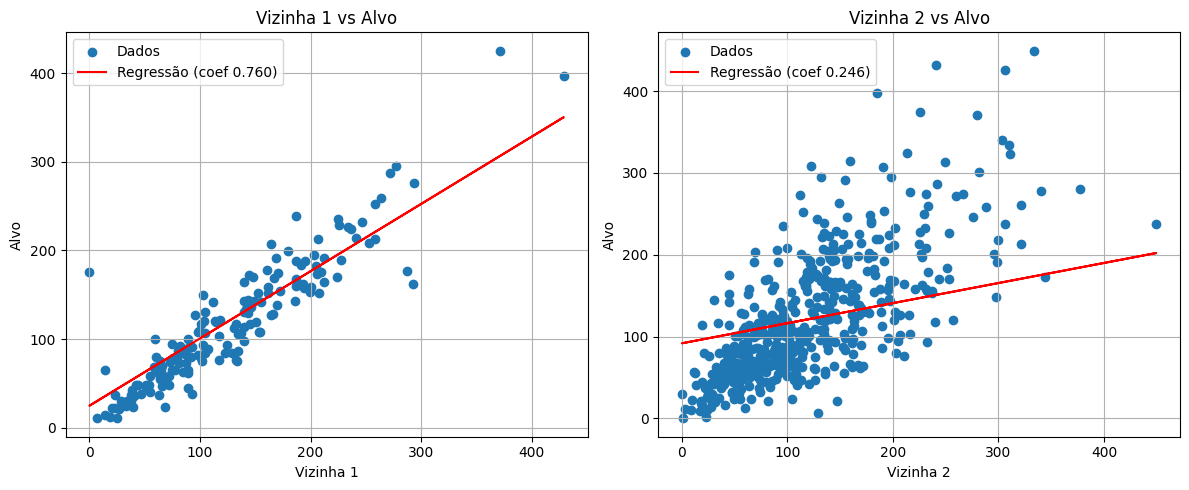

/tmp/ipython-input-1706858043.py:197: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/tmp/ipython-input-1706858043.py:198: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



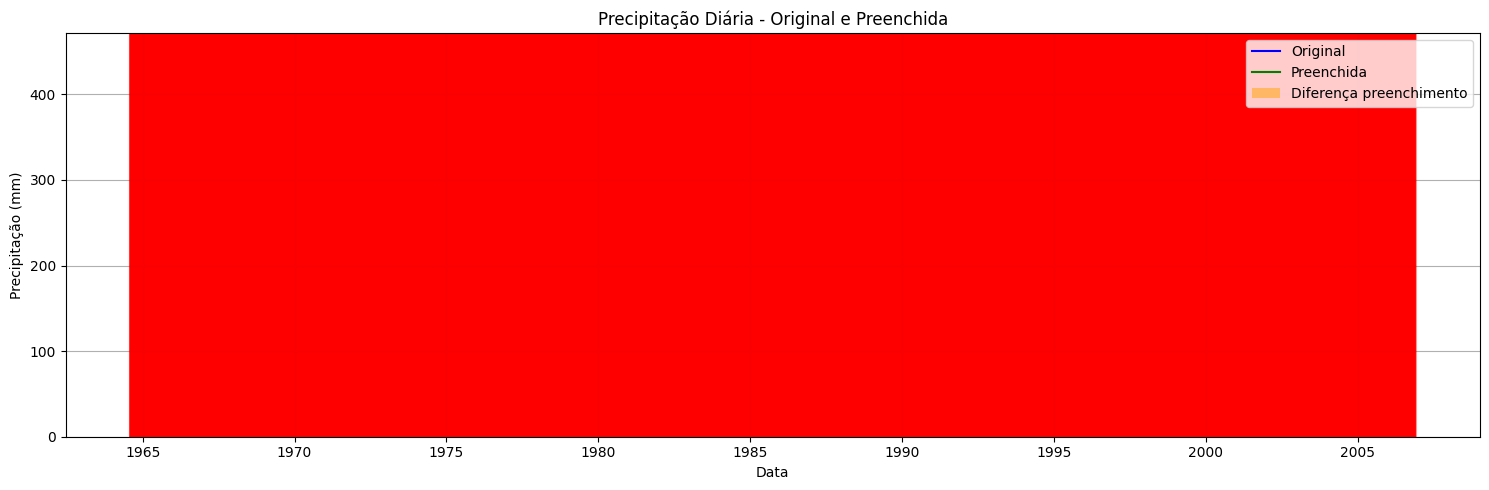

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Arquivos das estações - Mantendo os caminhos originais para uso no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    # Corrigindo a conversão de tipo para as colunas relevantes
    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Agregações (exemplo mensal) - Corrigindo a frequência 'ME' para 'M'
serie_mensal_ponte = serie_diaria_ponte.resample('M').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('M').sum()
serie_mensal_terceira = serie_diaria_terceira.resample('M').sum()

# Estatísticas simples
def estatisticas(s):
    s_float = pd.to_numeric(s, errors='coerce')
    s_limpa = s_float.dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

# Detectar falhas (NaNs)
def detectar_falhas(s):
    return s[s.isna()]

falhas_dias = detectar_falhas(serie_diaria_ponte)
print(f"Falhas diárias na série principal: {len(falhas_dias)}")

# Regressão múltipla para preencher a série principal com 2 vizinhas
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    def converter_serie(s):
        return pd.to_numeric(s, errors='coerce')

    s_alvo_f = converter_serie(s_alvo)
    s_viz1_f = converter_serie(s_viz1)
    s_viz2_f = converter_serie(s_viz2)

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

print("Estatísticas original:", estatisticas(serie_diaria_ponte))
print("Estatísticas preenchida (regressão múltipla):", estatisticas(serie_diaria_reg_mul))

# Plot interativo com Plotly para a série diária
def plot_diaria_interativa(s_original, s_preenchida, falhas, inicio=None, fim=None):
    if inicio is not None and fim is not None:
        s_original = s_original.loc[inicio:fim]
        s_preenchida = s_preenchida.loc[inicio:fim]
        falhas = falhas.loc[inicio:fim]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=s_original.index, y=s_original, mode='lines+markers',
                             name='Original', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=s_preenchida.index, y=s_preenchida, mode='lines+markers',
                             name='Preenchida', line=dict(color='green')))
    diff = s_preenchida - s_original
    fig.add_trace(go.Bar(x=diff.index, y=diff, name='Diferença preenchimento',
                         marker_color='orange', opacity=0.5))
    for d in falhas.index:
        fig.add_vrect(x0=d, x1=d, fillcolor='red', opacity=0.2, line_width=0)
    fig.update_layout(title='Precipitação Diária - Original e Preenchida (Regressão Múltipla)',
                      xaxis_title='Data', yaxis_title='Precipitação (mm)', hovermode='x unified')
    fig.show() # Reativado para uso em notebooks

# Exemplo de uso para plotar só 1 ano:
plot_diaria_interativa(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias,
                       inicio='2018-01-01', fim='2018-12-31')
# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    mask1 = (~s_x1.isna()) & (~s_y.isna())
    x1 = s_x1[mask1].values.reshape(-1, 1)
    y = s_y[mask1].values

    x2_mean = np.full_like(x1, np.nanmean(s_x2))
    X_pred1 = np.c_[x1, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1, y, label='Dados')
    axs[0].plot(x1, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title('Vizinha 1 vs Alvo')
    axs[0].set_xlabel('Vizinha 1')
    axs[0].set_ylabel('Alvo')
    axs[0].legend()
    axs[0].grid(True)

    mask2 = (~s_x2.isna()) & (~s_y.isna())
    x2 = s_x2[mask2].values.reshape(-1, 1)
    y = s_y[mask2].values

    x1_mean = np.full_like(x2, np.nanmean(s_x1))
    X_pred2 = np.c_[x1_mean, x2]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2, y, label='Dados')
    axs[1].plot(x2, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title('Vizinha 2 vs Alvo')
    axs[1].set_xlabel('Vizinha 2')
    axs[1].set_ylabel('Alvo')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show() # Reativado para uso em notebooks

plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte)

# Salvar gráfico estático diário preenchido
def plot_diaria_estatica(s_original, s_preenchida, falhas, arquivo_png):
    s_original = pd.to_numeric(s_original, errors='coerce')
    s_preenchida = pd.to_numeric(s_preenchida, errors='coerce')

    plt.figure(figsize=(15, 5))
    plt.plot(s_original.index, s_original, label='Original', color='blue')
    plt.plot(s_preenchida.index, s_preenchida, label='Preenchida', color='green')
    diff = s_preenchida - s_original
    plt.bar(diff.index, diff, color='orange', alpha=0.5, label='Diferença preenchimento')
    for data_falha in falhas.index:
        plt.axvline(x=data_falha, color='red', alpha=0.2)
    plt.title('Precipitação Diária - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show() # Reativado para uso em notebooks

# Corrigindo o caminho de saída do arquivo
arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias, arquivo_saida_png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# ------------------------------
# Caminhos dos arquivos CSV no Drive
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'

# ------------------------------
# Função para ler CSV e filtrar nível de consistência
def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)

    # Converter 'Data' para datetime, ignorando erros
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    # Corrigir vírgulas em colunas de chuva e converter para float
    cols_chuva = [col for col in df.columns if col.startswith("Chuva")]
    for col in cols_chuva:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print("Usando nível de consistência 2")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print("⚠️ Nível 2 não disponível. Usando nível alternativo 1.")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")

    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

# ------------------------------
# Ler dados
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)

# ------------------------------
# Criar séries diárias com índice completo e coluna 'Total' de precipitação
def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)

# ------------------------------
# Agregações mensais e anuais com índices completos
serie_mensal_ponte = serie_diaria_ponte.resample('ME').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('ME').sum()

serie_anual_ponte = serie_diaria_ponte.resample('YE').sum()
serie_anual_cascata = serie_diaria_cascata.resample('YE').sum()

# ------------------------------
# Detectar falhas (NaNs)
def detectar_falhas(s):
    return s[s.isna()]

falhas_dias = detectar_falhas(serie_diaria_ponte)
falhas_meses = detectar_falhas(serie_mensal_ponte)
falhas_anos = detectar_falhas(serie_anual_ponte)

print(f"⚠️ Falhas - Dias: {len(falhas_dias)}")
print(f"⚠️ Falhas - Meses: {len(falhas_meses)}")
print(f"⚠️ Falhas - Anos: {len(falhas_anos)}")

# ------------------------------
# Método 1: Preencher por média simples da vizinha
def preencher_media(s_alvo, s_vizinha):
    s_preenchido = s_alvo.copy()
    faltantes = s_alvo[s_alvo.isna()].index.intersection(s_vizinha.index)
    s_preenchido.loc[faltantes] = s_vizinha.loc[faltantes]
    return s_preenchido

# ------------------------------
# Método 2: Preencher por regressão linear
def preencher_regressao(serie_ponte, serie_cascata):
    y = serie_ponte.astype(float)
    X = serie_cascata.astype(float)

    # Selecionar datas onde ambos têm dados
    mask = (~y.isna()) & (~X.isna())
    y_train = y[mask].values.reshape(-1,1)
    X_train = X[mask].values.reshape(-1,1)

    if len(y_train) == 0:
        raise ValueError("Não há dados suficientes para treinar regressão.")

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Preencher dados faltantes
    serie_preenchida = serie_ponte.copy()
    faltantes = serie_preenchida.isna()
    if faltantes.any():
        X_faltantes = serie_cascata[faltantes].values.reshape(-1,1)
        preenchidos = modelo.predict(X_faltantes)
        serie_preenchida.loc[faltantes] = preenchidos.flatten()

    return serie_preenchida, modelo

# ------------------------------
# Preencher séries
serie_diaria_media = preencher_media(serie_diaria_ponte, serie_diaria_cascata)
serie_diaria_reg, modelo_d = preencher_regressao(serie_diaria_ponte, serie_diaria_cascata)

serie_mensal_media = preencher_media(serie_mensal_ponte, serie_mensal_cascata)
serie_mensal_reg, modelo_m = preencher_regressao(serie_mensal_ponte, serie_mensal_cascata)

serie_anual_media = preencher_media(serie_anual_ponte, serie_anual_cascata)
serie_anual_reg, modelo_a = preencher_regressao(serie_anual_ponte, serie_anual_cascata)

# ------------------------------
# Estatísticas simples
def estatisticas(s):
    return {
        'média': s.mean(),
        'mediana': s.median(),
        'desvio padrão': s.std(),
        'mínimo': s.min(),
        'máximo': s.max()
    }

print("Estatísticas série diária (original):", estatisticas(serie_diaria_ponte))
print("Estatísticas série diária (regressão):", estatisticas(serie_diaria_reg))

# ------------------------------
# Funções para gráficos interativos Plotly

def plot_diaria_interativa(s_original, s_preenchida, falhas, modelo=None):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=s_original.index, y=s_original,
                             mode='lines+markers', name='Original', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=s_preenchida.index, y=s_preenchida,
                             mode='lines+markers', name='Preenchido', line=dict(color='green')))

    # Diferença
    diff = s_preenchida - s_original
    fig.add_trace(go.Bar(x=diff.index, y=diff, name='Diferença (Preenchimento)',
                         marker_color='orange', opacity=0.5))

    # Marcar dias com falha
    for data_falha in falhas.index:
        fig.add_vrect(x0=data_falha, x1=data_falha, fillcolor="red", opacity=0.2, line_width=0)

    fig.update_layout(title="Precipitação Diária - Original e Preenchida",
                      xaxis_title='Data', yaxis_title='Precipitação (mm)',
                      hovermode='x unified')
    fig.show()

def plot_regressao(modelo, s_x, s_y):
    x_vals = s_x.dropna().values.reshape(-1,1)
    y_vals = s_y.loc[s_x.dropna().index].values
    y_pred = modelo.predict(x_vals)

    plt.figure(figsize=(6,6))
    plt.scatter(x_vals, y_vals, label='Dados treino')
    plt.plot(x_vals, y_pred, color='red', label='Regressão linear')
    plt.xlabel('Estação Vizinha')
    plt.ylabel('Estação Alvo')
    plt.title('Regressão Linear para preenchimento')
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------------
# Funções para histogramas e estatísticas detalhadas

def plot_histogramas(s_original, s_preenchida, titulo, arquivo_png=None):
    plt.figure(figsize=(10,6))
    bins = 30
    plt.hist(s_original.dropna(), bins=bins, alpha=0.5, label='Original', color='blue')
    plt.hist(s_preenchida.dropna(), bins=bins, alpha=0.5, label='Preenchida', color='green')
    plt.title(f'Histograma da Precipitação {titulo}')
    plt.xlabel('Precipitação (mm)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if arquivo_png:
        plt.savefig(arquivo_png)
    plt.show()

def estatisticas_completas(s, nome):
    print(f'Estatísticas - {nome}:')
    print(f'  Média: {s.mean():.2f}')
    print(f'  Mediana: {s.median():.2f}')
    print(f'  Desvio padrão: {s.std():.2f}')
    print(f'  Mínimo: {s.min():.2f}')
    print(f'  Máximo: {s.max():.2f}')
    print(f'  Valores válidos: {s.count()}')
    print('')

def analisar_serie(s_original, s_preenchida, freq, nome, salvar_png=False):
    if freq == 'D':
        titulo = 'Diária'
        s_o = s_original
        s_p = s_preenchida
    elif freq == 'M':
        titulo = 'Mensal'
        s_o = s_original.resample('ME').sum()
        s_p = s_preenchida.resample('ME').sum()
    elif freq == 'A':
        titulo = 'Anual'
        s_o = s_original.resample('YE').sum()
        s_p = s_preenchida.resample('YE').sum()
    else:
        raise ValueError('Freq inválida')

    estatisticas_completas(s_o, f'{nome} Original {titulo}')
    estatisticas_completas(s_p, f'{nome} Preenchida {titulo}')

    arquivo_png = None
    if salvar_png:
        arquivo_png = f'/content/drive/MyDrive/hidrologia/precipitacao/saidas/histograma_{nome.lower()}_{freq}.png'

    plot_histogramas(s_o, s_p, titulo, arquivo_png=arquivo_png)

# ------------------------------
# Rodar análises e plotagens

# Plots interativos da série diária
plot_diaria_interativa(serie_diaria_ponte, serie_diaria_reg, falhas_dias, modelo_d)
plot_regressao(modelo_d, serie_diaria_cascata, serie_diaria_ponte)

# Histogramas e estatísticas diários, mensais e anuais
analisar_serie(serie_diaria_ponte, serie_diaria_reg, 'D', 'Ponte', salvar_png=True)
analisar_serie(serie_diaria_ponte, serie_diaria_reg, 'M', 'Ponte', salvar_png=True)
analisar_serie(serie_diaria_ponte, serie_diaria_reg, 'A', 'Ponte', salvar_png=True)


Usando nível de consistência 2
⚠️ Nível 2 não disponível. Usando nível alternativo 1.
⚠️ Falhas - Dias: 14966
⚠️ Falhas - Meses: 0
⚠️ Falhas - Anos: 0


ValueError: could not convert string to float: '135,3'

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
Falhas diárias na série principal: 14966
Estatísticas original: {'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}
Estatísticas preenchida (regressão múltipla): {'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}


/tmp/ipython-input-3435805.py:56: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-3435805.py:57: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-3435805.py:58: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



/tmp/ipython-input-3435805.py:202: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/tmp/ipython-input-3435805.py:203: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



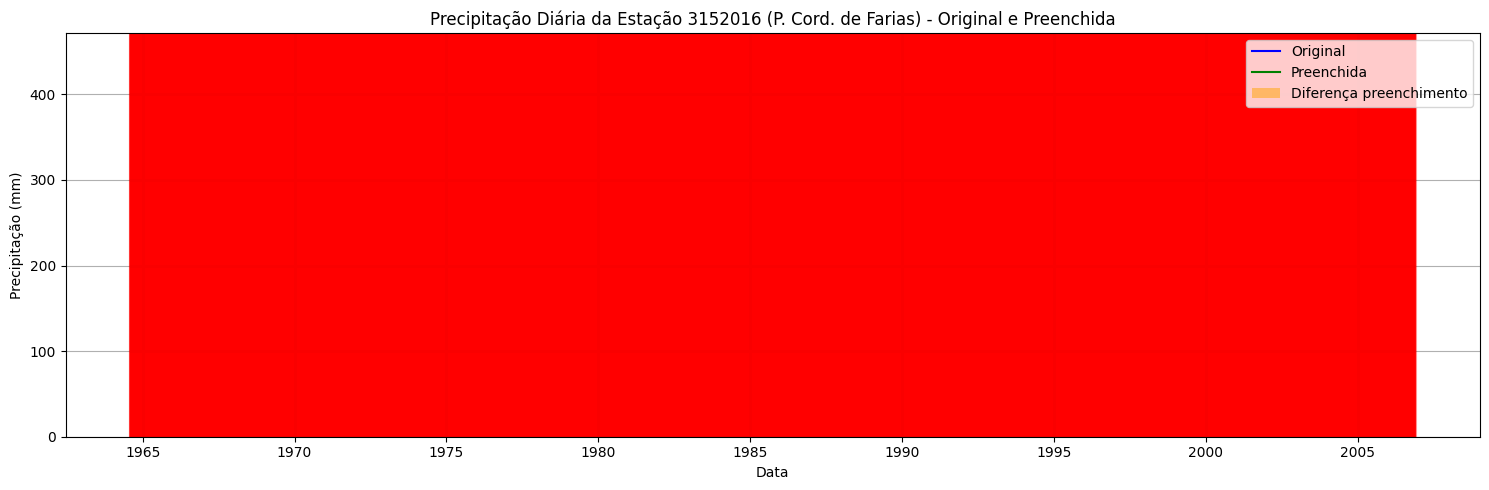

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Arquivos das estações - Mantendo os caminhos originais para uso no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (P. Cord. de Farias)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Passo do Mend.)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Agregações (exemplo mensal)
serie_mensal_ponte = serie_diaria_ponte.resample('M').sum()
serie_mensal_cascata = serie_diaria_cascata.resample('M').sum()
serie_mensal_terceira = serie_diaria_terceira.resample('M').sum()

# Estatísticas simples
def estatisticas(s):
    s_float = pd.to_numeric(s, errors='coerce')
    s_limpa = s_float.dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

# Detectar falhas (NaNs)
def detectar_falhas(s):
    return s[s.isna()]

falhas_dias = detectar_falhas(serie_diaria_ponte)
print(f"Falhas diárias na série principal: {len(falhas_dias)}")

# Regressão múltipla para preencher a série principal com 2 vizinhas
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    def converter_serie(s):
        return pd.to_numeric(s, errors='coerce')

    s_alvo_f = converter_serie(s_alvo)
    s_viz1_f = converter_serie(s_viz1)
    s_viz2_f = converter_serie(s_viz2)

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

print("Estatísticas original:", estatisticas(serie_diaria_ponte))
print("Estatísticas preenchida (regressão múltipla):", estatisticas(serie_diaria_reg_mul))

# Plot interativo com Plotly para a série diária - Títulos corrigidos
def plot_diaria_interativa(s_original, s_preenchida, falhas, inicio=None, fim=None):
    if inicio is not None and fim is not None:
        s_original = s_original.loc[inicio:fim]
        s_preenchida = s_preenchida.loc[inicio:fim]
        falhas = falhas.loc[inicio:fim]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=s_original.index, y=s_original, mode='lines+markers',
                             name='Original', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=s_preenchida.index, y=s_preenchida, mode='lines+markers',
                             name='Preenchida', line=dict(color='green')))
    diff = s_preenchida - s_original
    fig.add_trace(go.Bar(x=diff.index, y=diff, name='Diferença preenchimento',
                         marker_color='orange', opacity=0.5))
    for d in falhas.index:
        fig.add_vrect(x0=d, x1=d, fillcolor='red', opacity=0.2, line_width=0)
    fig.update_layout(title=f'Precipitação Diária da {nome_estacao_ponte} - Original e Preenchida (Regressão Múltipla)',
                      xaxis_title='Data', yaxis_title='Precipitação (mm)', hovermode='x unified')
    fig.show()

# Exemplo de uso para plotar só 1 ano:
plot_diaria_interativa(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias,
                       inicio='2018-01-01', fim='2018-12-31')

# Plot regressão múltipla - Títulos e rótulos corrigidos
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Criar uma máscara única para todos os dados não-NaN, pois o modelo foi treinado com todos eles
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    # Extrair os dados usando a máscara
    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    # Calcular a média de s_x2 usando a mesma máscara
    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados')
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    # Calcular a média de s_x1 usando a mesma máscara
    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados')
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Salvar gráfico estático diário preenchido - Título corrigido
def plot_diaria_estatica(s_original, s_preenchida, falhas, arquivo_png, nome_estacao):
    s_original = pd.to_numeric(s_original, errors='coerce')
    s_preenchida = pd.to_numeric(s_preenchida, errors='coerce')

    plt.figure(figsize=(15, 5))
    plt.plot(s_original.index, s_original, label='Original', color='blue')
    plt.plot(s_preenchida.index, s_preenchida, label='Preenchida', color='green')
    diff = s_preenchida - s_original
    plt.bar(diff.index, diff, color='orange', alpha=0.5, label='Diferença preenchimento')
    for data_falha in falhas.index:
        plt.axvline(x=data_falha, color='red', alpha=0.2)
    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Corrigindo o caminho de saída do arquivo
arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias, arquivo_saida_png, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}


/tmp/ipython-input-895392036.py:92: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-895392036.py:93: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



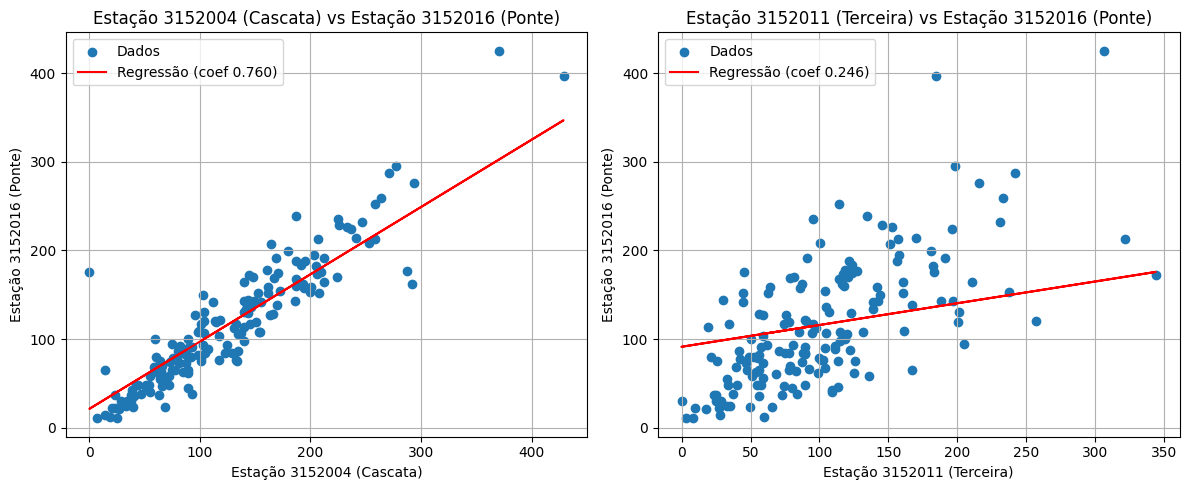

/tmp/ipython-input-895392036.py:195: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/tmp/ipython-input-895392036.py:196: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



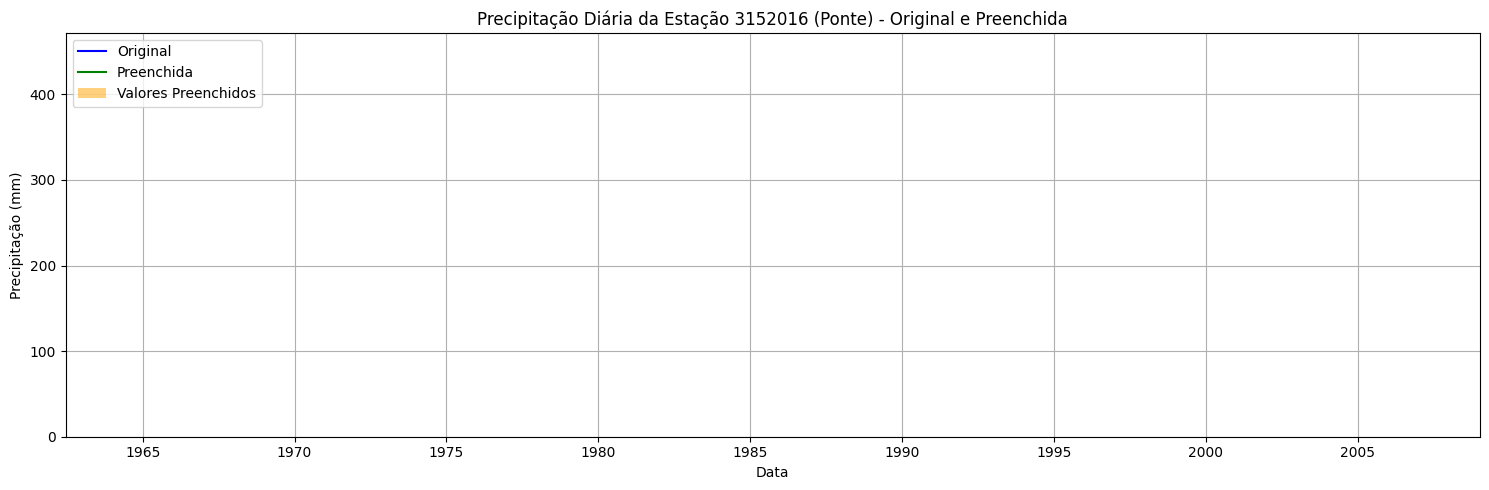

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    def converter_serie(s):
        return pd.to_numeric(s, errors='coerce')

    s_alvo_f = converter_serie(s_alvo)
    s_viz1_f = converter_serie(s_viz1)
    s_viz2_f = converter_serie(s_viz2)

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('M').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('A').sum()

# Estatísticas simples
def estatisticas(s):
    s_float = pd.to_numeric(s, errors='coerce')
    s_limpa = s_float.dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# --- Funções de Plotagem ---

# Plot regressão múltipla (com correção)
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Máscara unificada para todos os dados não-NaN, conforme a imagem de referência
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    # Plot para a primeira vizinha
    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados')
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    # Plot para a segunda vizinha
    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados')
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot interativo com Plotly para a série diária (mantido)
def plot_diaria_interativa(s_original, s_preenchida, falhas, inicio=None, fim=None):
    if inicio is not None and fim is not None:
        s_original = s_original.loc[inicio:fim]
        s_preenchida = s_preenchida.loc[inicio:fim]
        falhas = falhas.loc[inicio:fim]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=s_original.index, y=s_original, mode='lines+markers',
                             name='Original', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=s_preenchida.index, y=s_preenchida, mode='lines+markers',
                             name='Preenchida', line=dict(color='green')))
    fig.add_trace(go.Bar(x=falhas.index, y=s_preenchida[falhas.index], name='Valores Preenchidos',
                         marker_color='orange', opacity=0.5))
    fig.update_layout(title=f'Precipitação Diária da {nome_estacao_ponte} - Original e Preenchida',
                      xaxis_title='Data', yaxis_title='Precipitação (mm)', hovermode='x unified')
    fig.show()

# Plot estático para a série diária preenchida (mantido)
def plot_diaria_estatica(s_original, s_preenchida, falhas, arquivo_png, nome_estacao):
    s_original = pd.to_numeric(s_original, errors='coerce')
    s_preenchida = pd.to_numeric(s_preenchida, errors='coerce')

    plt.figure(figsize=(15, 5))
    plt.plot(s_original.index, s_original, label='Original', color='blue')
    plt.plot(s_preenchida.index, s_preenchida, label='Preenchida', color='green')

    valores_preenchidos = s_preenchida[falhas.index]
    plt.bar(valores_preenchidos.index, valores_preenchidos, color='orange', alpha=0.5, label='Valores Preenchidos')

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias, arquivo_saida_png, nome_estacao_ponte)

# Plot da série diária (exemplo de 1 ano)
plot_diaria_interativa(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias,
                       inicio='2018-01-01', fim='2018-12-31')

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}


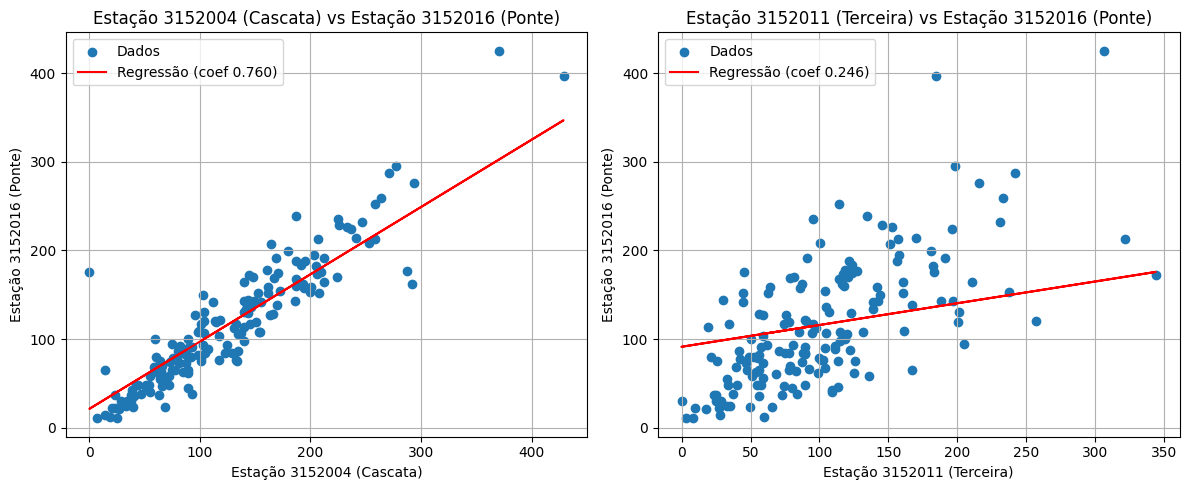

/tmp/ipython-input-3229429372.py:193: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



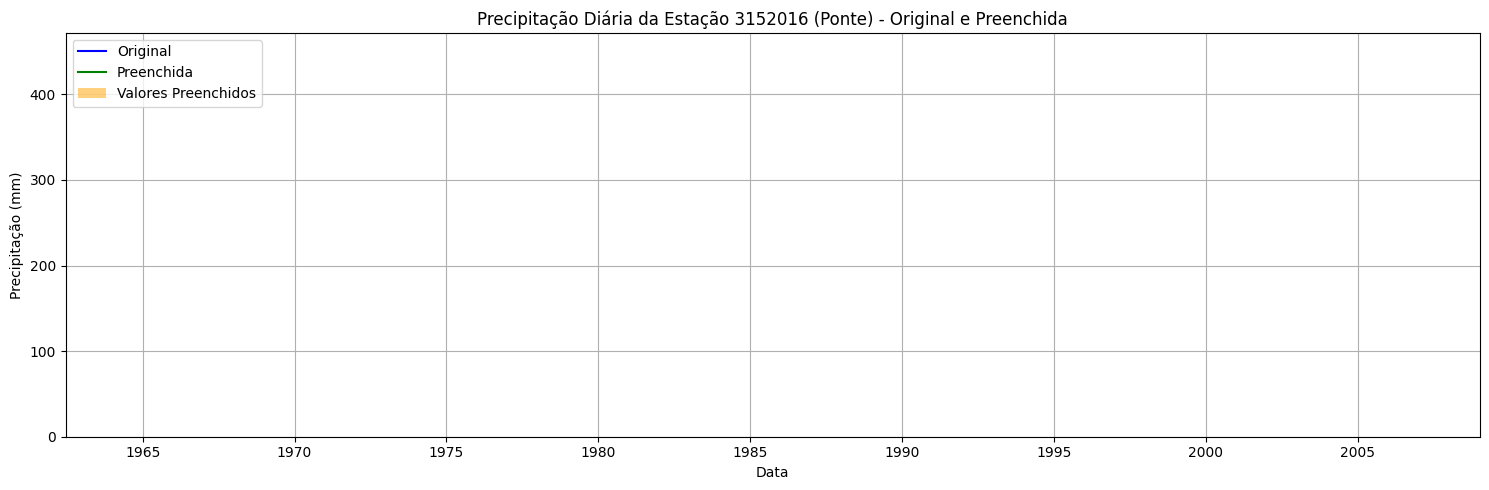

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    def converter_serie(s):
        return pd.to_numeric(s, errors='coerce')

    s_alvo_f = converter_serie(s_alvo)
    s_viz1_f = converter_serie(s_viz1)
    s_viz2_f = converter_serie(s_viz2)

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida (com a nova frequência)
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_float = pd.to_numeric(s, errors='coerce')
    s_limpa = s_float.dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# --- Funções de Plotagem ---

# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados')
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados')
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot interativo com Plotly para a série diária
def plot_diaria_interativa(s_original, s_preenchida, falhas, inicio=None, fim=None):
    if inicio is not None and fim is not None:
        s_original = s_original.loc[inicio:fim]
        s_preenchida = s_preenchida.loc[inicio:fim]
        falhas = falhas.loc[inicio:fim]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=s_original.index, y=s_original, mode='lines+markers',
                             name='Original', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=s_preenchida.index, y=s_preenchida, mode='lines+markers',
                             name='Preenchida', line=dict(color='green')))
    fig.add_trace(go.Bar(x=falhas.index, y=s_preenchida[falhas.index], name='Valores Preenchidos',
                         marker_color='orange', opacity=0.5))
    fig.update_layout(title=f'Precipitação Diária da {nome_estacao_ponte} - Original e Preenchida',
                      xaxis_title='Data', yaxis_title='Precipitação (mm)', hovermode='x unified')
    fig.show()

# Plot estático para a série diária preenchida
def plot_diaria_estatica(s_original, s_preenchida, falhas, arquivo_png, nome_estacao):
    s_original = pd.to_numeric(s_original, errors='coerce')
    s_preenchida = pd.to_numeric(s_preenchida, errors='coerce')

    plt.figure(figsize=(15, 5))
    plt.plot(s_original.index, s_original, label='Original', color='blue')
    plt.plot(s_preenchida.index, s_preenchida, label='Preenchida', color='green')

    valores_preenchidos = s_preenchida[falhas.index]
    plt.bar(valores_preenchidos.index, valores_preenchidos, color='orange', alpha=0.5, label='Valores Preenchidos')

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias, arquivo_saida_png, nome_estacao_ponte)

# Plot da série diária (exemplo de 1 ano)
plot_diaria_interativa(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias,
                       inicio='2018-01-01', fim='2018-12-31')

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}


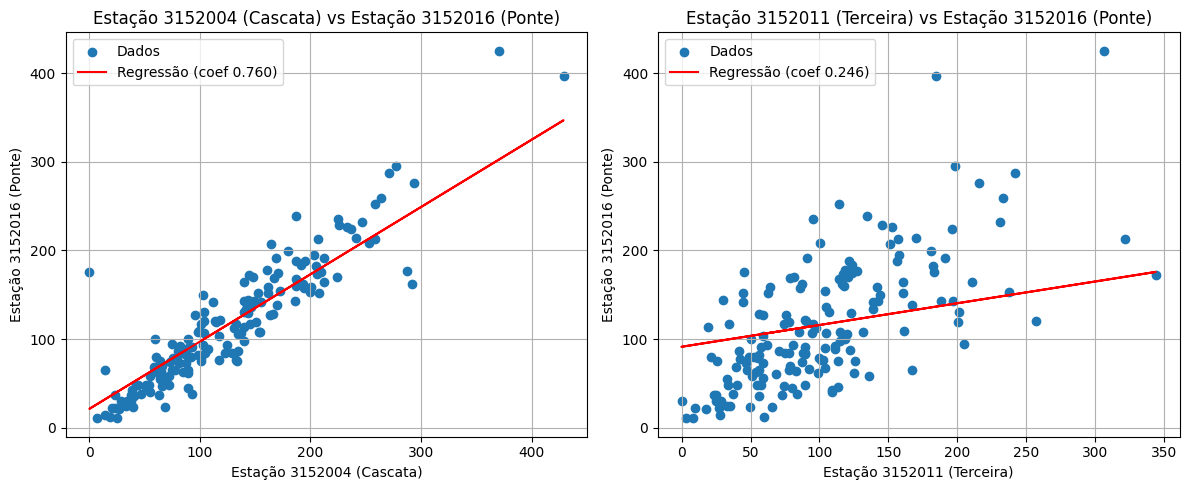

/tmp/ipython-input-950951872.py:171: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/tmp/ipython-input-950951872.py:172: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



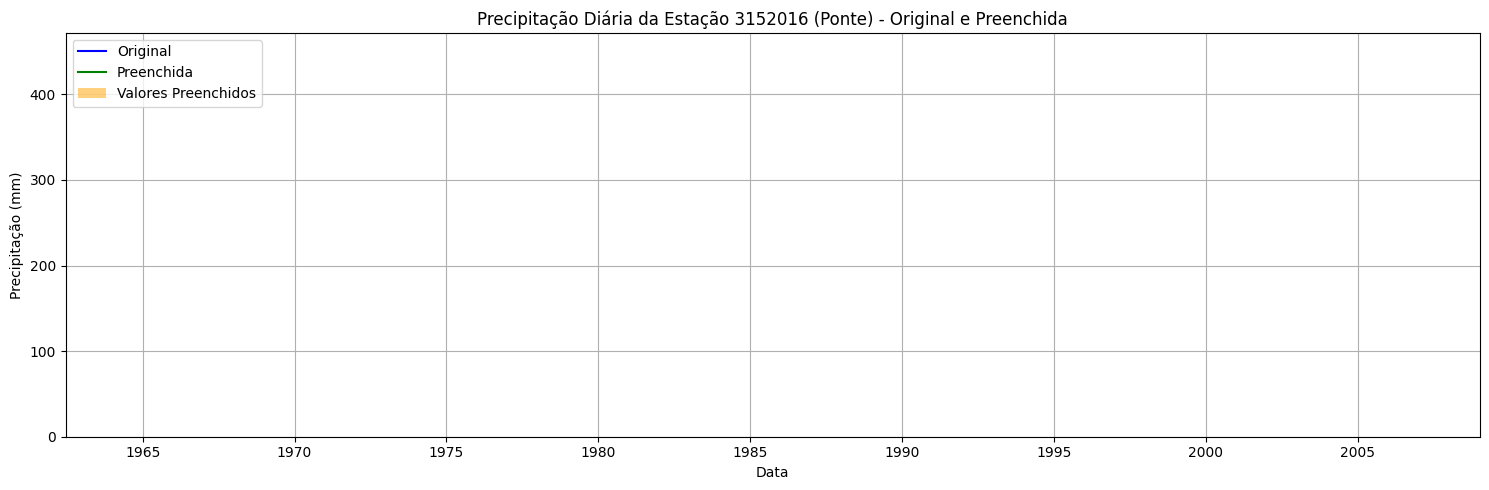

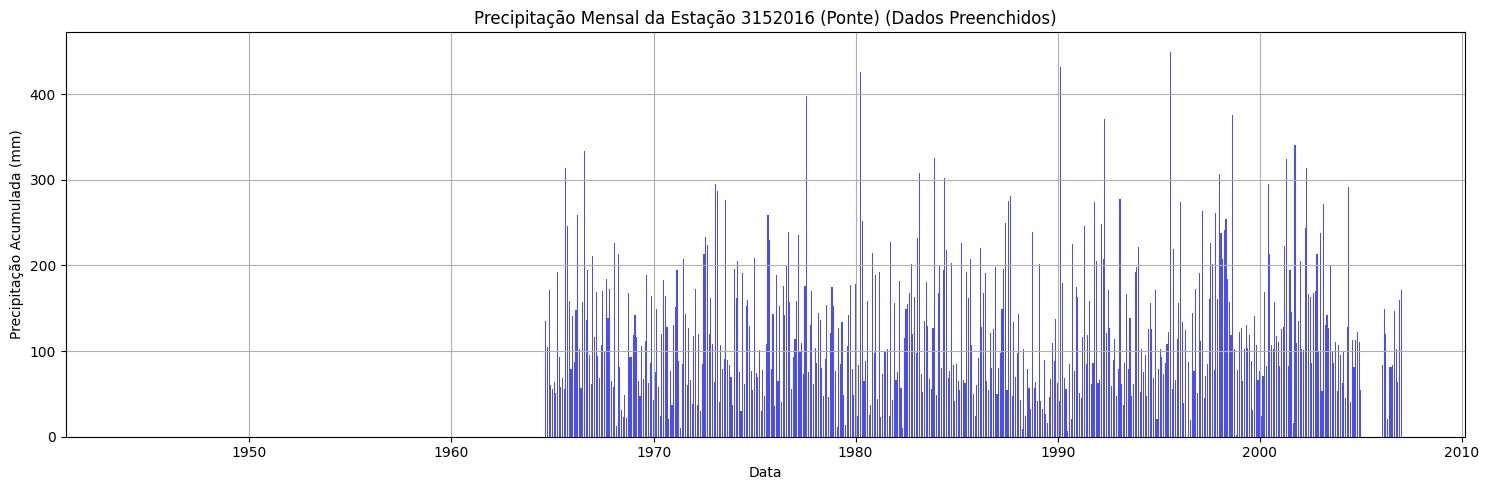

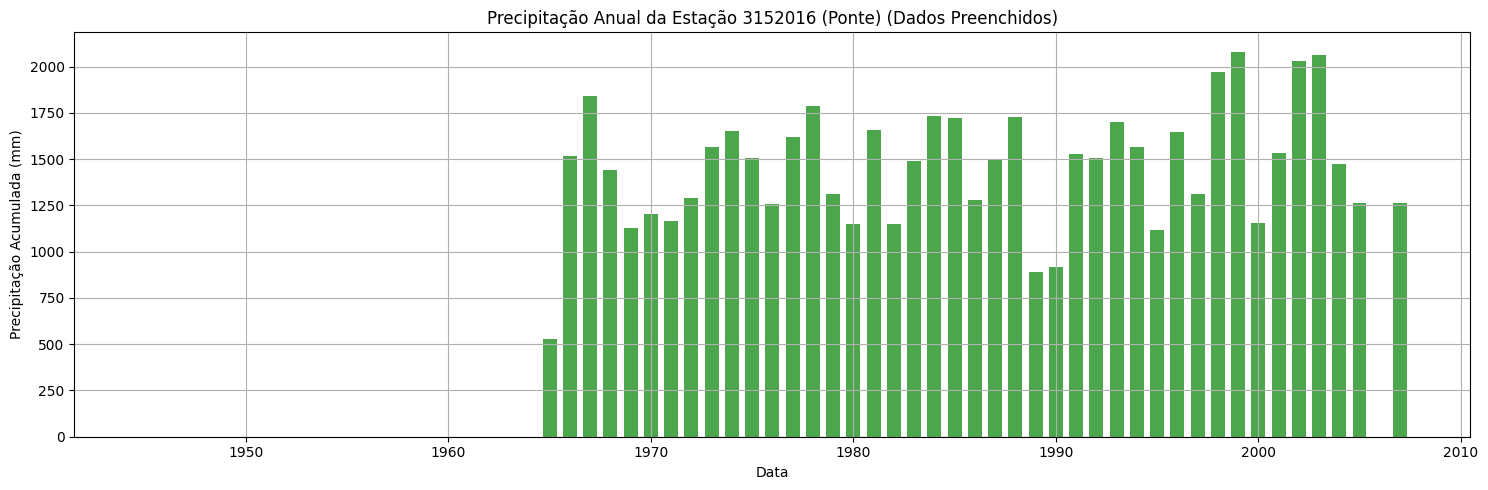

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    s_alvo_f = pd.to_numeric(s_alvo, errors='coerce')
    s_viz1_f = pd.to_numeric(s_viz1, errors='coerce')
    s_viz2_f = pd.to_numeric(s_viz2, errors='coerce')

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# --- Funções de Plotagem ---

# Plot regressão múltipla (com correção)
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Máscara unificada para todos os dados não-NaN
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    # Plot para a primeira vizinha
    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados')
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    # Plot para a segunda vizinha
    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados')
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática)
def plot_diaria_estatica(s_original, s_preenchida, falhas, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.plot(s_original.index, s_original, label='Original', color='blue')
    plt.plot(s_preenchida.index, s_preenchida, label='Preenchida', color='green')

    valores_preenchidos = s_preenchida[falhas.index]
    if not valores_preenchidos.empty:
      plt.bar(valores_preenchidos.index, valores_preenchidos, color='orange', alpha=0.5, label='Valores Preenchidos')

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, falhas_dias, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}


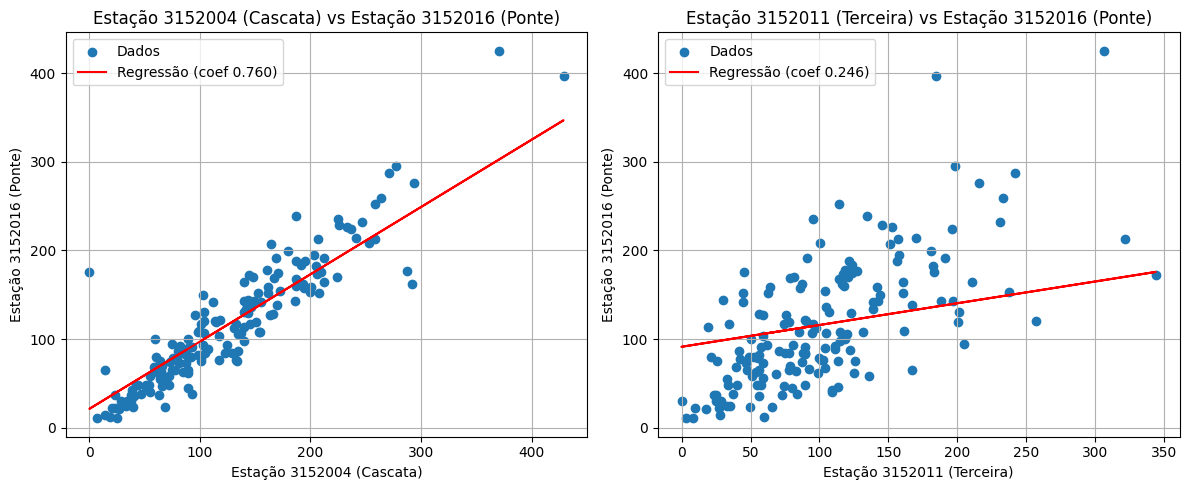

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

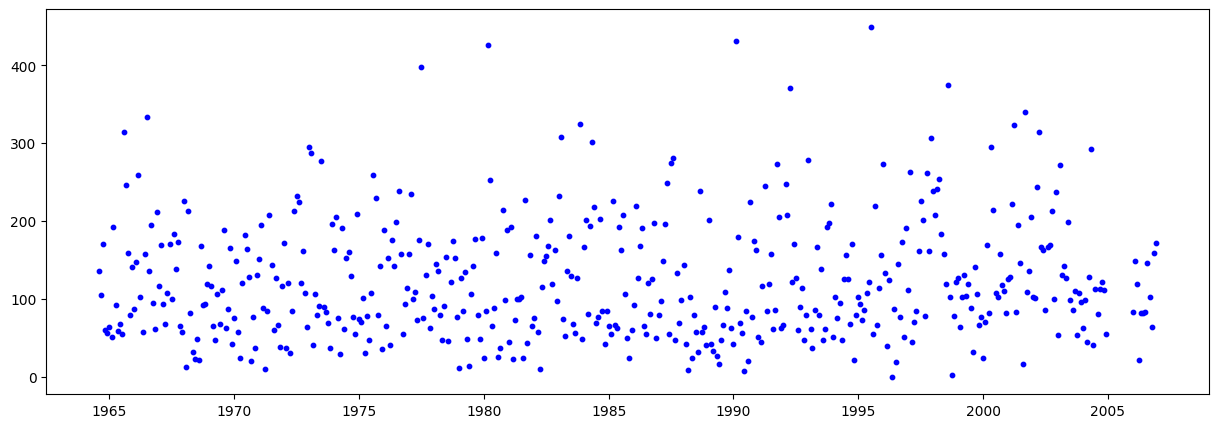

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    s_alvo_f = pd.to_numeric(s_alvo, errors='coerce')
    s_viz1_f = pd.to_numeric(s_viz1, errors='coerce')
    s_viz2_f = pd.to_numeric(s_viz2, errors='coerce')

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# --- Funções de Plotagem ---

# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados')
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados')
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática) - Corrigido para mostrar os pontos
def plot_diaria_estatica(s_original, s_preenchida, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))

    # Plotar os pontos de dados originais
    original_nao_nan = s_original.dropna()
    plt.scatter(original_nao_nan.index, original_nao_nan, label='Original', color='blue', s=10)

    # Plotar os pontos de dados preenchidos
    preenchidos_apenas = s_preenchida[s_original.isna()]
    if not preenchidos_apenas.empty:
      plt.scatter(preenchidos_apenas.index, preenchidos_apenas, label='Preenchido', color='orange', s=10)

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}

Total de falhas originais: 14966
Total de falhas preenchidas: -7518
Atenção: A regressão não conseguiu preencher 22484 falhas.
Is

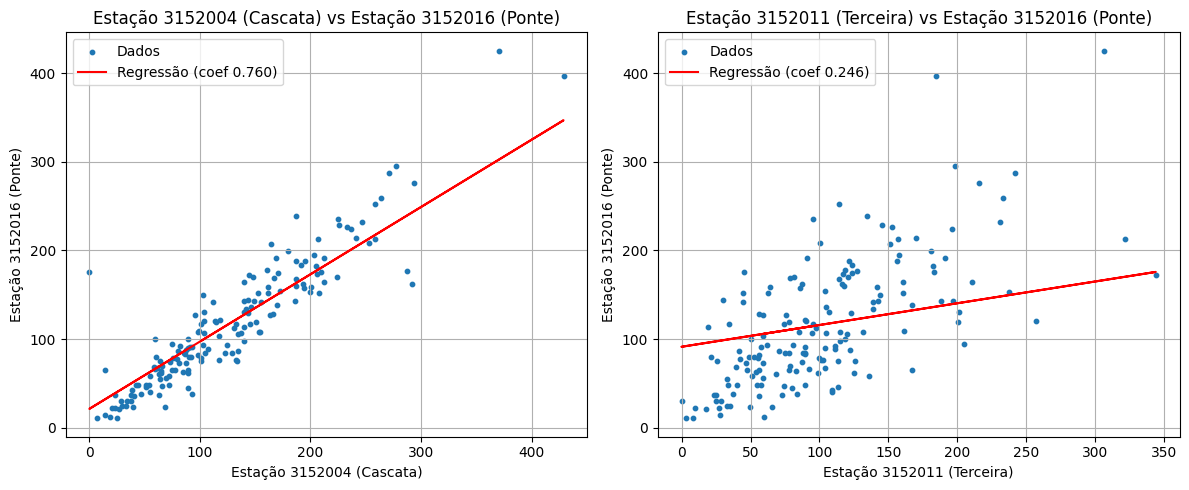

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

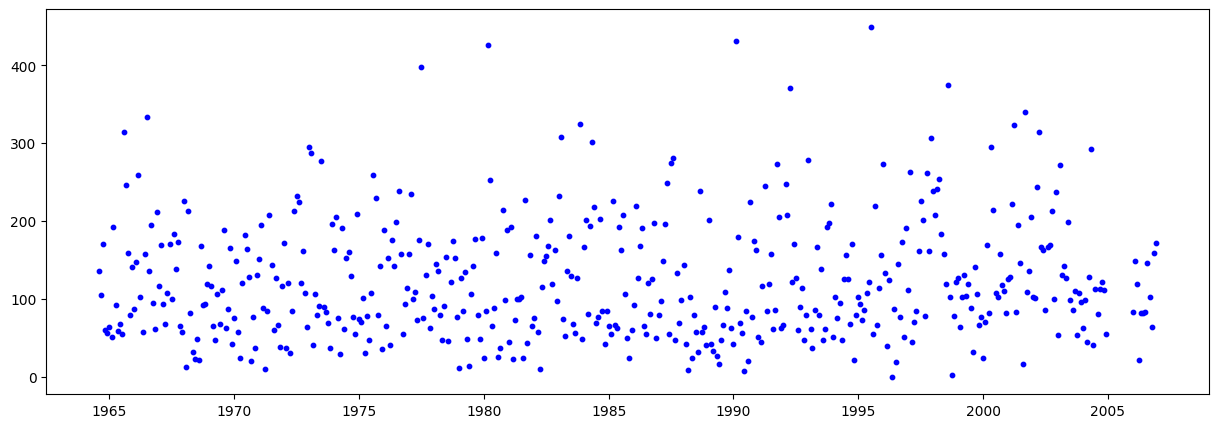

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    s_alvo_f = pd.to_numeric(s_alvo, errors='coerce')
    s_viz1_f = pd.to_numeric(s_viz1, errors='coerce')
    s_viz2_f = pd.to_numeric(s_viz2, errors='coerce')

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas preenchidas
falhas_totais = serie_diaria_ponte.isna().sum()
falhas_preenchidas = serie_diaria_reg_mul.isna().sum()
print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_totais - falhas_preenchidas}")
if falhas_preenchidas > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_preenchidas} falhas.")
    print("Isso geralmente ocorre quando as estações vizinhas também não têm dados para o mesmo período.")

# --- Funções de Plotagem ---

# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática)
def plot_diaria_estatica(s_original, s_preenchida, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))

    original_nao_nan = s_original.dropna()
    plt.scatter(original_nao_nan.index, original_nao_nan, label='Original', color='blue', s=10)

    preenchidos_apenas = s_preenchida[s_original.isna()]
    if not preenchidos_apenas.empty:
      plt.scatter(preenchidos_apenas.index, preenchidos_apenas, label='Preenchido', color='orange', s=10)

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}

Total de falhas originais: 14966
Total de falhas que o modelo não conseguiu preencher: 22484
Isso geralmente ocorre quando as est

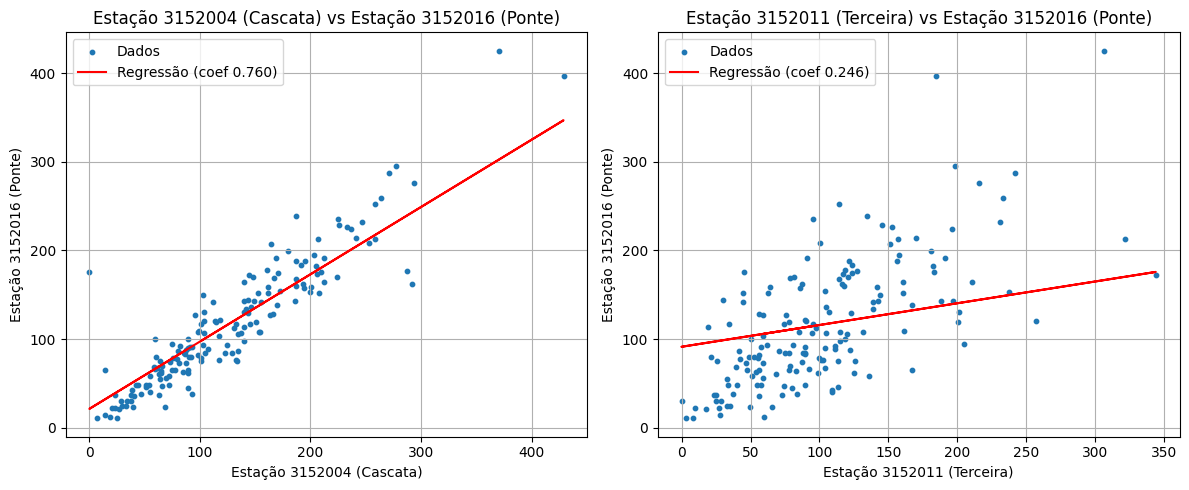

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

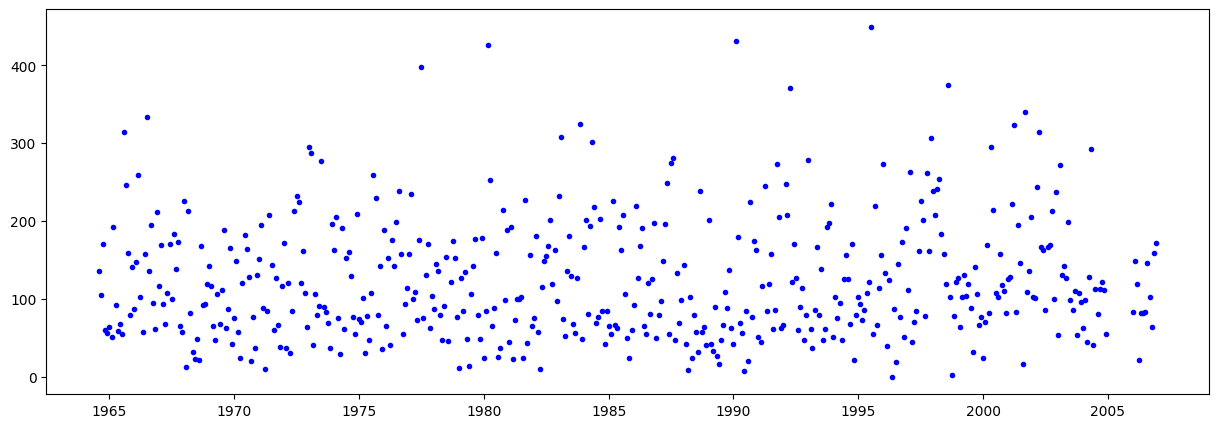

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    s_alvo_f = pd.to_numeric(s_alvo, errors='coerce')
    s_viz1_f = pd.to_numeric(s_viz1, errors='coerce')
    s_viz2_f = pd.to_numeric(s_viz2, errors='coerce')

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas preenchidas
falhas_totais = serie_diaria_ponte.isna().sum()
falhas_preenchidas = serie_diaria_reg_mul.isna().sum()
print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas que o modelo não conseguiu preencher: {falhas_preenchidas}")
if falhas_preenchidas > 0:
    print("Isso geralmente ocorre quando as estações vizinhas também não têm dados para o mesmo período.")

# --- Funções de Plotagem ---

# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática) - CORRIGIDO
def plot_diaria_estatica(s_original, s_preenchida, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))

    # Plota os dados originais
    plt.plot(s_original.index, s_original, 'bo', markersize=3, label='Original')

    # Identifica e plota os valores preenchidos
    valores_preenchidos = s_preenchida[s_original.isna()]
    if not valores_preenchidos.empty:
      plt.plot(valores_preenchidos.index, valores_preenchidos, 'go', markersize=3, label='Preenchido')

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(81.0510582010582), 'mediana': 65.1, 'desvio padrão': 85.2510628715738, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(972.6126984126983), 'mediana': 1255.5, 'desvio padrão': 742.967197967383, 'mínimo': 0.0, 'máximo': 2081.9}

Total de falhas originais: 14966
Total de falhas que o modelo não conseguiu preencher: 22484
Isso geralmente ocorre quando as est

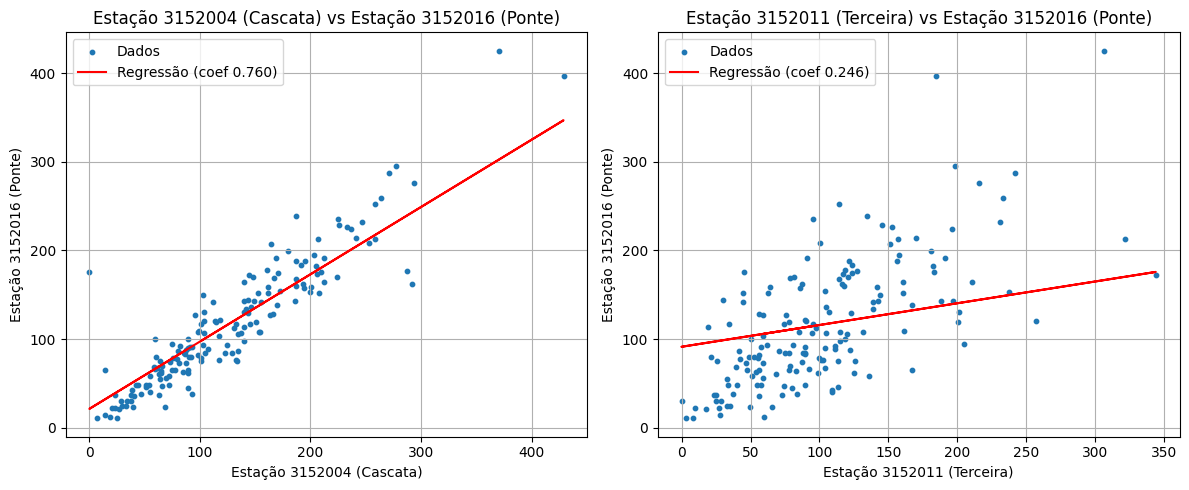

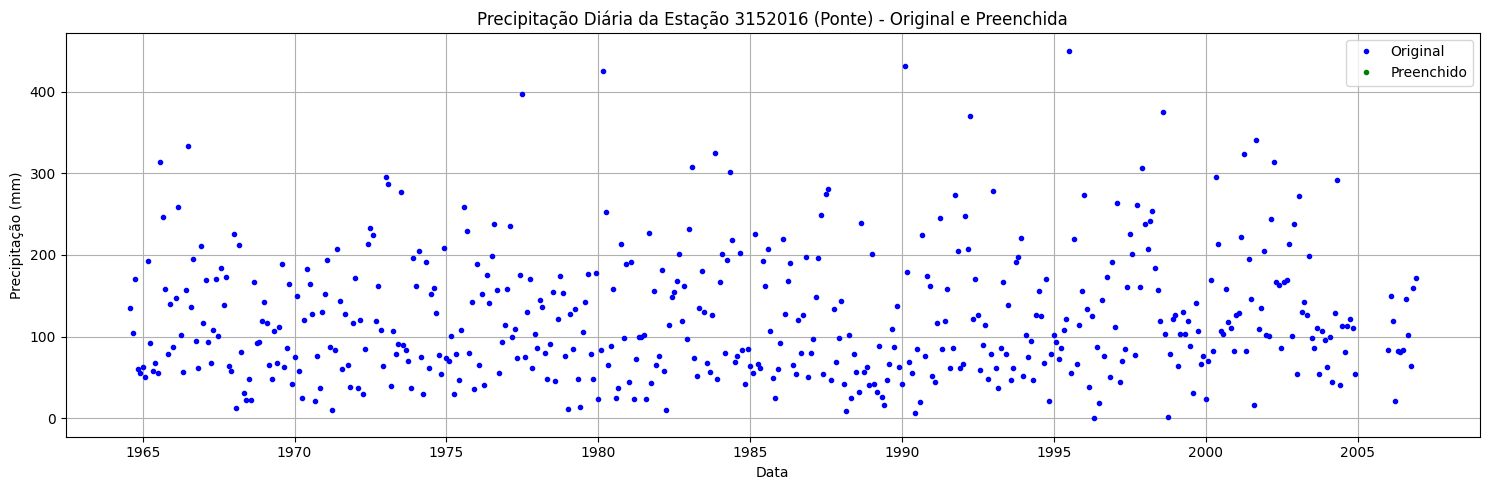

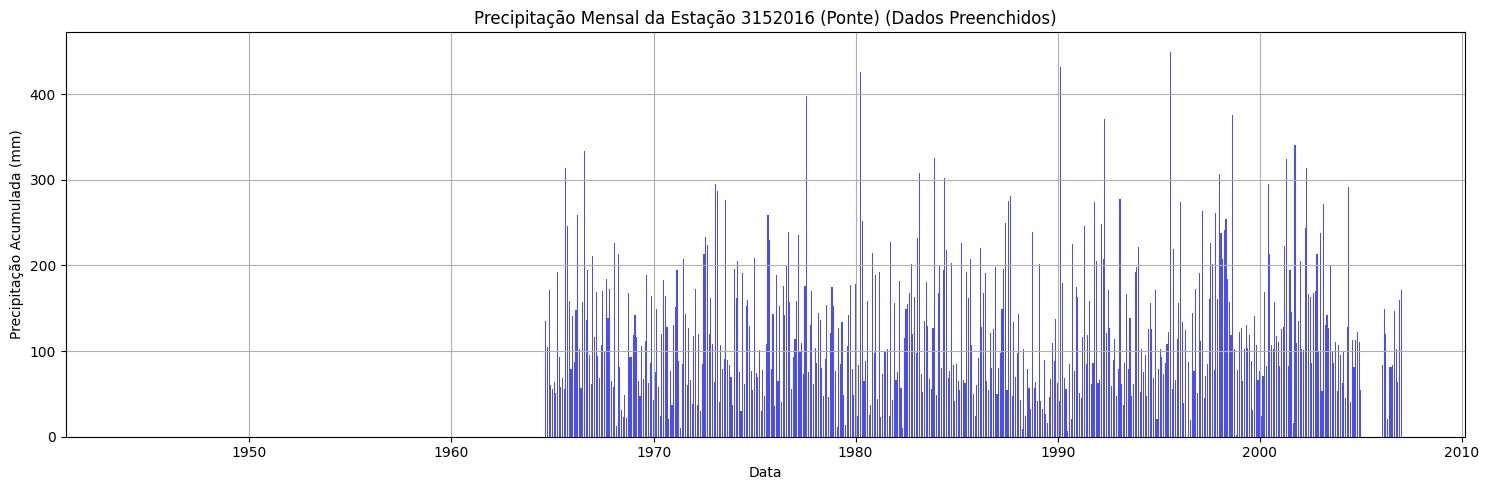

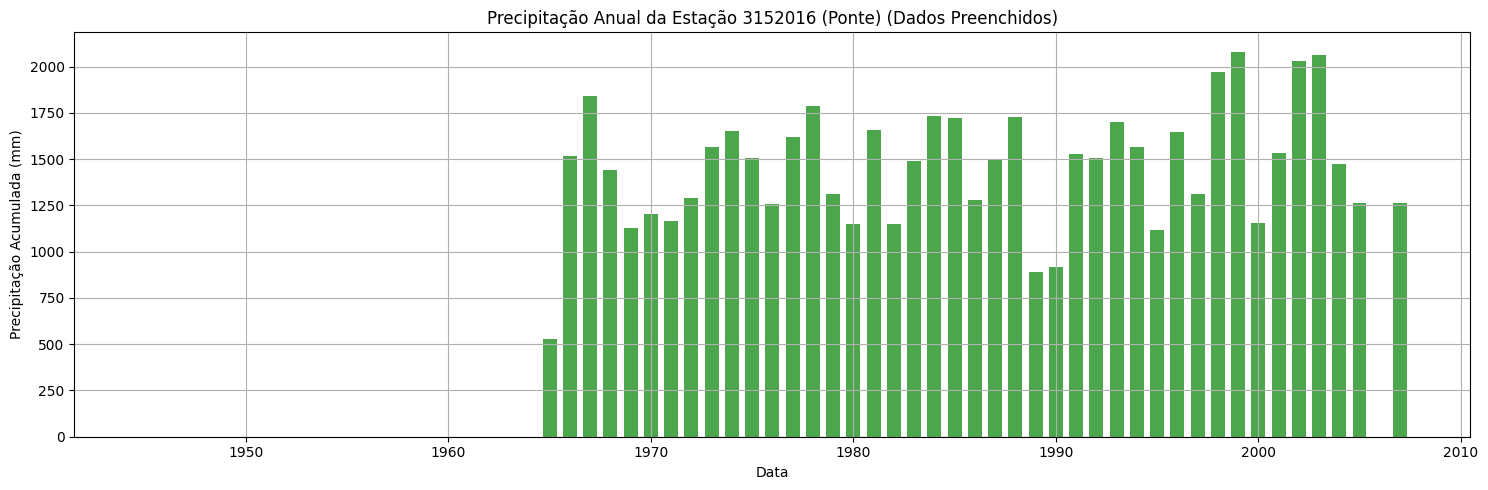

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Principal
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Vizinha 1
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Vizinha 2

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Terceira)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    s_alvo_f = pd.to_numeric(s_alvo, errors='coerce')
    s_viz1_f = pd.to_numeric(s_viz1, errors='coerce')
    s_viz2_f = pd.to_numeric(s_viz2, errors='coerce')

    df = pd.DataFrame({'alvo': s_alvo_f, 'viz1': s_viz1_f, 'viz2': s_viz2_f})
    treino = df.dropna()
    if treino.empty:
        raise ValueError("Não há dados suficientes para treinar o modelo.")

    X_train = treino[['viz1', 'viz2']].values
    y_train = treino['alvo'].values

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_preenchida = df.copy()
    faltantes = df_preenchida['alvo'].isna()

    if faltantes.any():
        X_pred = df_preenchida.loc[faltantes, ['viz1', 'viz2']].dropna()
        pred_idx = X_pred.index
        if not X_pred.empty:
            y_pred = modelo.predict(X_pred.values)
            df_preenchida.loc[pred_idx, 'alvo'] = y_pred

    return df_preenchida['alvo'], modelo

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas preenchidas
falhas_totais = serie_diaria_ponte.isna().sum()
falhas_preenchidas = serie_diaria_reg_mul.isna().sum()
print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas que o modelo não conseguiu preencher: {falhas_preenchidas}")
if falhas_preenchidas > 0:
    print("Isso geralmente ocorre quando as estações vizinhas também não têm dados para o mesmo período.")

# --- Funções de Plotagem ---

# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática) - CORRIGIDO
def plot_diaria_estatica(s_original, s_preenchida, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))

    # Criar um DataFrame temporário para garantir o alinhamento
    df_plot = pd.DataFrame({'original': s_original, 'preenchida': s_preenchida})

    # Plotar os pontos originais (apenas os não-NaN)
    plt.plot(df_plot['original'].dropna().index, df_plot['original'].dropna(), 'bo', markersize=3, label='Original')

    # Plotar os pontos preenchidos (onde a série original era NaN)
    preenchidos_apenas = df_plot[df_plot['original'].isna()]['preenchida']
    if not preenchidos_apenas.empty:
        plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=3, label='Preenchido')

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(121.43334951876582), 'mediana': 104.15, 'desvio padrão': 74.4158986187718, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(88.98687253094744), 'mediana': 76.98576308361501, 'desvio padrão': 83.35012886921851, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(1067.8424703713692), 'mediana': 1262.7, 'desvio padrão': 687.7611385475517, 'mínimo': 0.0, 'máximo': 2081.9}

Total de falhas originais: 14966
Total de falhas preenchidas: -7461
Atenção: A regressão não conseguiu preencher

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



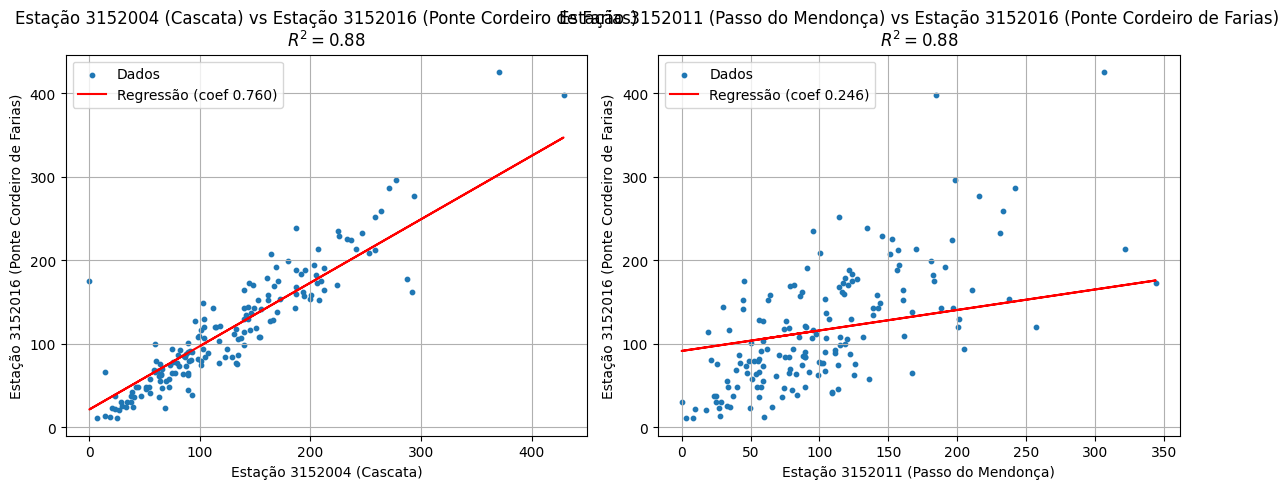

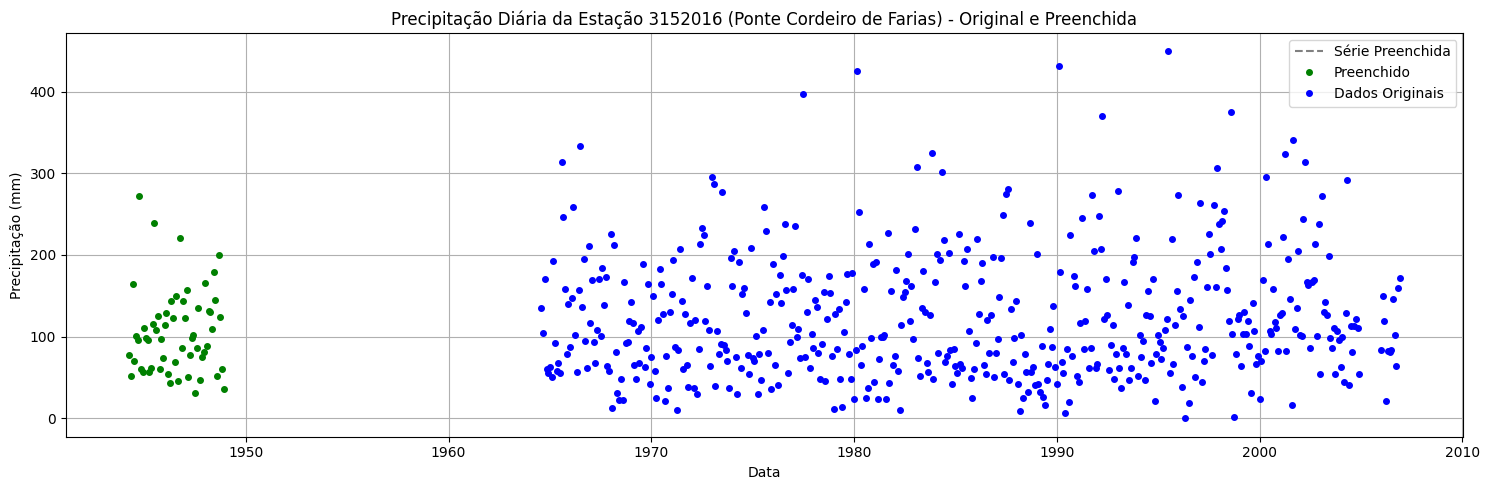

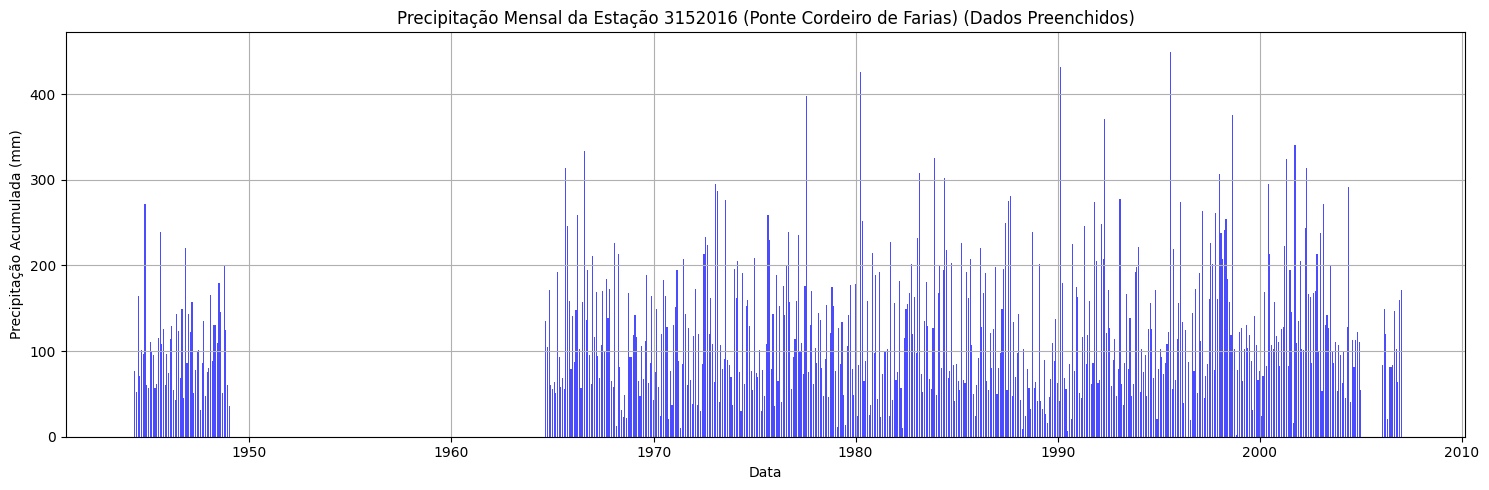

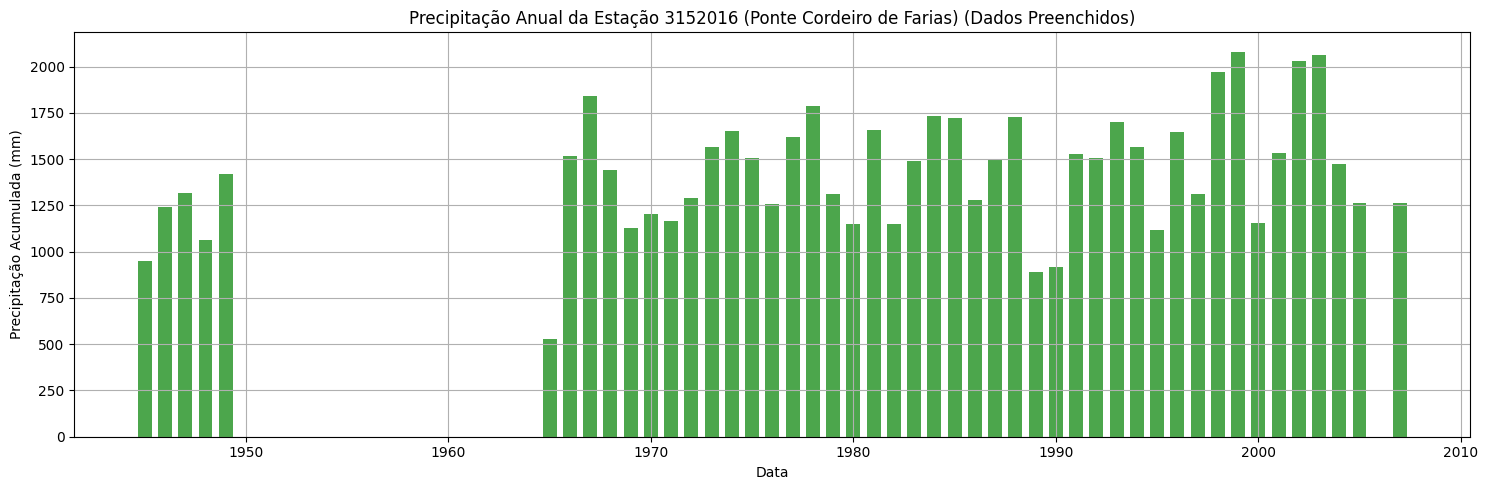

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Ponte
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Cascata
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Passo do Mendonça

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte Cordeiro de Farias)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Passo do Mendonça)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal (lógica aprimorada)
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    # 1. Tentar preencher com a regressão múltipla (ambos os vizinhos)
    treino_mul = df.dropna()
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    # 2. Tentar preencher com regressão simples (apenas vizinho 1)
    treino_v1 = df.dropna(subset=['alvo', 'viz1'])
    if not treino_v1.empty:
        modelo_v1 = LinearRegression()
        modelo_v1.fit(treino_v1[['viz1']], treino_v1['alvo'])

        faltantes_v1 = df['alvo'].isna() & (~df['viz1'].isna())
        if faltantes_v1.any():
            df.loc[faltantes_v1, 'alvo'] = modelo_v1.predict(df.loc[faltantes_v1, ['viz1']])

    # 3. Tentar preencher com regressão simples (apenas vizinho 2)
    treino_v2 = df.dropna(subset=['alvo', 'viz2'])
    if not treino_v2.empty:
        modelo_v2 = LinearRegression()
        modelo_v2.fit(treino_v2[['viz2']], treino_v2['alvo'])

        faltantes_v2 = df['alvo'].isna() & (~df['viz2'].isna())
        if faltantes_v2.any():
            df.loc[faltantes_v2, 'alvo'] = modelo_v2.predict(df.loc[faltantes_v2, ['viz2']])

    return df['alvo'], modelo_mul

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas preenchidas
falhas_totais = serie_diaria_ponte.isna().sum()
falhas_remanescentes = serie_diaria_reg_mul.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes
print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")
    print("Isso geralmente ocorre quando as estações vizinhas também não têm dados para o mesmo período.")

# --- Funções de Plotagem ---

# Plot regressão múltipla (com R² adicionado)
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo.score(treino_mul, y_masked)

    # Plot para a primeira vizinha
    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    # Plot para a segunda vizinha
    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática)
def plot_diaria_estatica(s_original, s_preenchida, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))

    df_plot = pd.DataFrame({'original': s_original, 'preenchida': s_preenchida})

    plt.plot(df_plot['preenchida'].index, df_plot['preenchida'], color='gray', linestyle='--', label='Série Preenchida', zorder=1)

    preenchidos_apenas = df_plot[(df_plot['original'].isna()) & (~df_plot['preenchida'].isna())]['preenchida']
    if not preenchidos_apenas.empty:
      plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

    plt.plot(df_plot['original'].dropna().index, df_plot['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

Usando nível de consistência 2 em 3152016_Chuvas.csv
⚠️ Nível 2 não disponível. Usando nível 1 em 3152004_Chuvas.csv
Usando nível de consistência 2 em 3152011_Chuvas.csv
--- Estatísticas da Série Diária Original ---
{'média': np.float64(123.28893360160966), 'mediana': 106.7, 'desvio padrão': 76.45151305933791, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Diária Preenchida ---
{'média': np.float64(121.43334951876582), 'mediana': 104.15, 'desvio padrão': 74.4158986187718, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Mensal Preenchida ---
{'média': np.float64(88.98687253094744), 'mediana': 76.98576308361501, 'desvio padrão': 83.35012886921851, 'mínimo': 0.0, 'máximo': 449.5}

--- Estatísticas da Série Anual Preenchida ---
{'média': np.float64(1067.8424703713692), 'mediana': 1262.7, 'desvio padrão': 687.7611385475517, 'mínimo': 0.0, 'máximo': 2081.9}

Total de falhas originais: 14966
Total de falhas preenchidas: -7461
Atenção: A regressão não conseguiu preencher

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



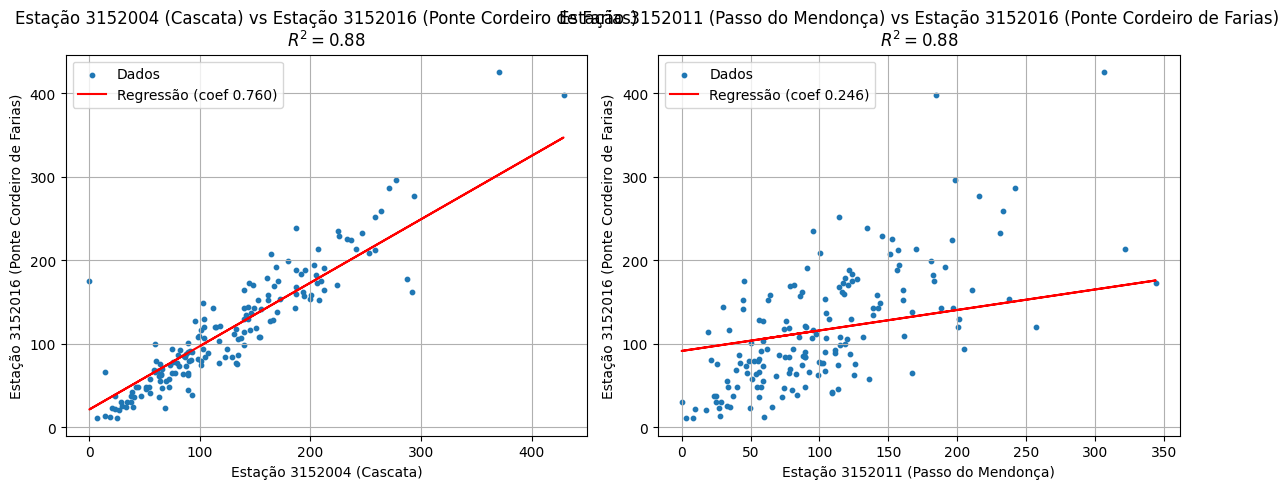

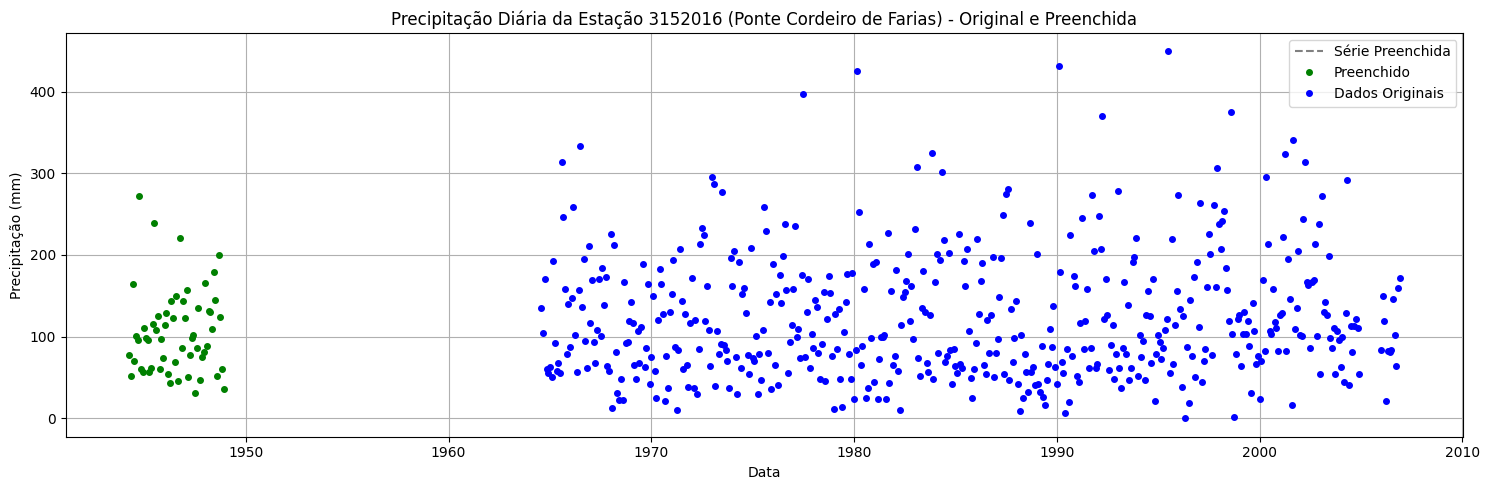

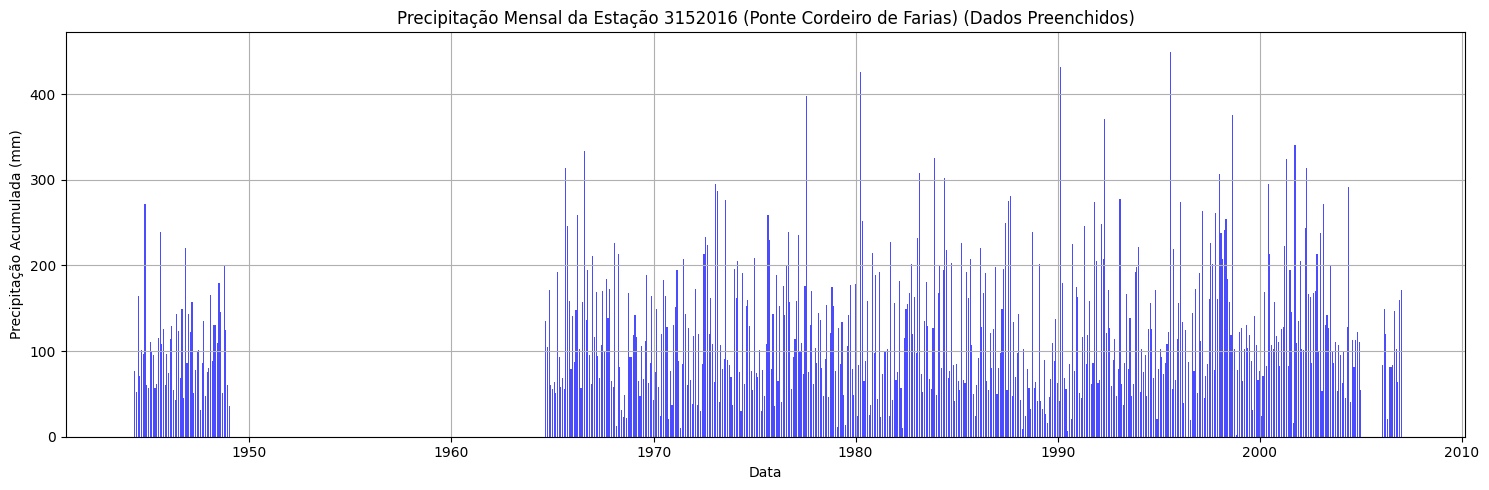

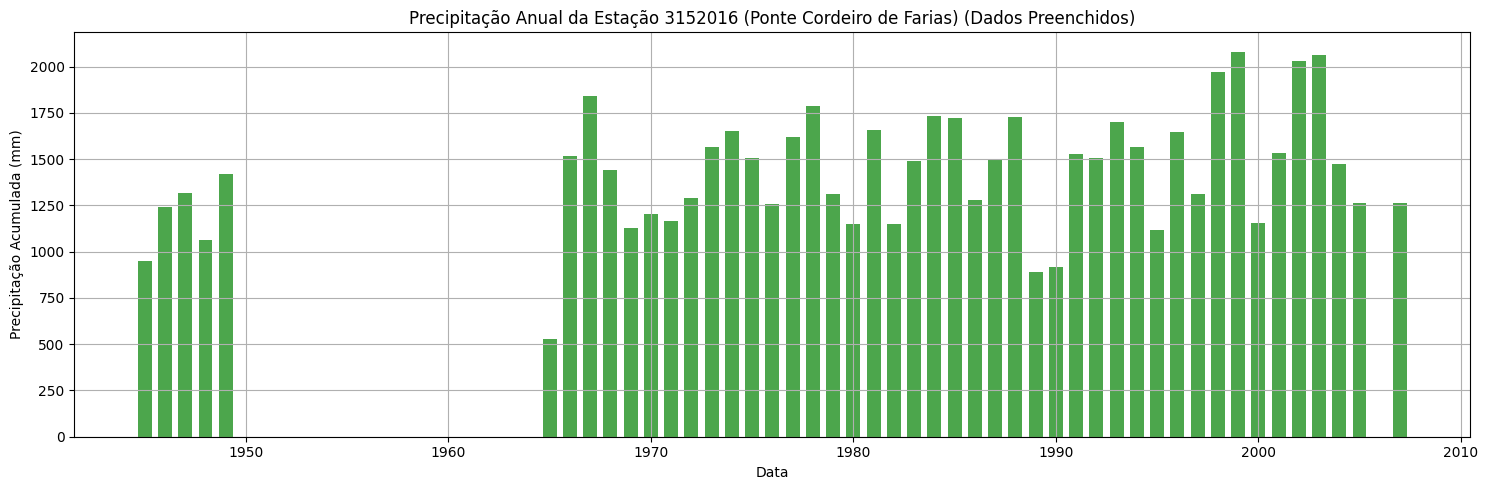

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Caminhos dos arquivos no Google Colab
arquivo_ponte = '/content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv'  # Ponte
arquivo_cascata = '/content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv'  # Cascata
arquivo_terceira = '/content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv'  # Passo do Mendonça

# Nomes das estações para os rótulos dos gráficos
nome_estacao_ponte = 'Estação 3152016 (Ponte Cordeiro de Farias)'
nome_estacao_cascata = 'Estação 3152004 (Cascata)'
nome_estacao_terceira = 'Estação 3152011 (Passo do Mendonça)'

def ler_e_filtrar_arquivo(caminho):
    df = pd.read_csv(caminho, sep=';', skiprows=13, encoding='latin1', dayfirst=True)
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')

    cols_para_converter = [col for col in df.columns if col.startswith("Chuva") or col in ['Total', 'Maxima']]
    for col in cols_para_converter:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2]
        print(f"Usando nível de consistência 2 em {caminho.split('/')[-1]}")
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1]
        print(f"⚠️ Nível 2 não disponível. Usando nível 1 em {caminho.split('/')[-1]}")
    else:
        raise ValueError("Nenhum nível de consistência válido encontrado.")
    df = df.dropna(subset=['Data'])
    df = df.sort_values('Data')
    return df

def criar_serie_diaria(df):
    df = df.copy()
    df.set_index('Data', inplace=True)
    s = df['Total']
    idx_completo = pd.date_range(s.index.min(), s.index.max(), freq='D')
    s = s.reindex(idx_completo)
    return s

# Ler as 3 séries
df_ponte = ler_e_filtrar_arquivo(arquivo_ponte)
df_cascata = ler_e_filtrar_arquivo(arquivo_cascata)
df_terceira = ler_e_filtrar_arquivo(arquivo_terceira)

# Criar séries diárias
serie_diaria_ponte = criar_serie_diaria(df_ponte)
serie_diaria_cascata = criar_serie_diaria(df_cascata)
serie_diaria_terceira = criar_serie_diaria(df_terceira)

# Regressão múltipla para preencher a série principal (lógica aprimorada)
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    # 1. Tentar preencher com a regressão múltipla (ambos os vizinhos)
    treino_mul = df.dropna()
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    # 2. Tentar preencher com regressão simples (apenas vizinho 1)
    treino_v1 = df.dropna(subset=['alvo', 'viz1'])
    if not treino_v1.empty:
        modelo_v1 = LinearRegression()
        modelo_v1.fit(treino_v1[['viz1']], treino_v1['alvo'])

        faltantes_v1 = df['alvo'].isna() & (~df['viz1'].isna())
        if faltantes_v1.any():
            df.loc[faltantes_v1, 'alvo'] = modelo_v1.predict(df.loc[faltantes_v1, ['viz1']])

    # 3. Tentar preencher com regressão simples (apenas vizinho 2)
    treino_v2 = df.dropna(subset=['alvo', 'viz2'])
    if not treino_v2.empty:
        modelo_v2 = LinearRegression()
        modelo_v2.fit(treino_v2[['viz2']], treino_v2['alvo'])

        faltantes_v2 = df['alvo'].isna() & (~df['viz2'].isna())
        if faltantes_v2.any():
            df.loc[faltantes_v2, 'alvo'] = modelo_v2.predict(df.loc[faltantes_v2, ['viz2']])

    return df['alvo'], modelo_mul

serie_diaria_reg_mul, modelo_mul = preencher_regressao_multipla(
    serie_diaria_ponte, serie_diaria_cascata, serie_diaria_terceira)

# Criação das séries mensais e anuais a partir da série diária preenchida
serie_mensal_preenchida = serie_diaria_reg_mul.resample('ME').sum()
serie_anual_preenchida = serie_diaria_reg_mul.resample('YE').sum()

# Estatísticas simples
def estatisticas(s):
    s_limpa = pd.to_numeric(s, errors='coerce').dropna()
    return {
        'média': s_limpa.mean(),
        'mediana': s_limpa.median(),
        'desvio padrão': s_limpa.std(),
        'mínimo': s_limpa.min(),
        'máximo': s_limpa.max()
    }

print("--- Estatísticas da Série Diária Original ---")
print(estatisticas(serie_diaria_ponte))
print("\n--- Estatísticas da Série Diária Preenchida ---")
print(estatisticas(serie_diaria_reg_mul))
print("\n--- Estatísticas da Série Mensal Preenchida ---")
print(estatisticas(serie_mensal_preenchida))
print("\n--- Estatísticas da Série Anual Preenchida ---")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas preenchidas
falhas_totais = serie_diaria_ponte.isna().sum()
falhas_remanescentes = serie_diaria_reg_mul.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes
print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")
    print("Isso geralmente ocorre quando as estações vizinhas também não têm dados para o mesmo período.")

# --- Funções de Plotagem ---

# Plot regressão múltipla
def plot_regressao(modelo, s_x1, s_x2, s_y, nome_x1, nome_x2, nome_y):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~s_x1.isna()) & (~s_x2.isna()) & (~s_y.isna())

    x1_masked = s_x1[mask].values.reshape(-1, 1)
    x2_masked = s_x2[mask].values.reshape(-1, 1)
    y_masked = s_y[mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo.score(treino_mul, y_masked)

    x2_mean = np.full_like(x1_masked, s_x2[mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo.coef_[0]:.3f})')
    axs[0].set_title(f'{nome_x1} vs {nome_y}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(nome_x1)
    axs[0].set_ylabel(nome_y)
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, s_x1[mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo.coef_[1]:.3f})')
    axs[1].set_title(f'{nome_x2} vs {nome_y}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(nome_x2)
    axs[1].set_ylabel(nome_y)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot da série diária preenchida (estática)
def plot_diaria_estatica(s_original, s_preenchida, arquivo_png, nome_estacao):
    plt.figure(figsize=(15, 5))

    df_plot = pd.DataFrame({'original': s_original, 'preenchida': s_preenchida}).sort_index()

    plt.plot(df_plot['preenchida'].index, df_plot['preenchida'], color='gray', linestyle='--', label='Série Preenchida', zorder=1)

    preenchidos_apenas = df_plot[(df_plot['original'].isna()) & (~df_plot['preenchida'].isna())]['preenchida']
    if not preenchidos_apenas.empty:
      plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

    plt.plot(df_plot['original'].dropna().index, df_plot['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

    plt.title(f'Precipitação Diária da {nome_estacao} - Original e Preenchida')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(arquivo_png)
    plt.show()

# Plot da série mensal preenchida (estática)
def plot_mensal_estatica(s_mensal, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_mensal.index, s_mensal, width=20, color='blue', alpha=0.7)
    plt.title(f'Precipitação Mensal da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot da série anual preenchida (estática)
def plot_anual_estatica(s_anual, nome_estacao):
    plt.figure(figsize=(15, 5))
    plt.bar(s_anual.index, s_anual, width=250, color='green', alpha=0.7)
    plt.title(f'Precipitação Anual da {nome_estacao} (Dados Preenchidos)')
    plt.xlabel('Data')
    plt.ylabel('Precipitação Acumulada (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Execução das Funções ---
plot_regressao(modelo_mul, serie_diaria_cascata, serie_diaria_terceira, serie_diaria_ponte,
               nome_estacao_cascata, nome_estacao_terceira, nome_estacao_ponte)

arquivo_saida_png = '/content/drive/MyDrive/hidrologia/precipitacao/saidas/precipitacao_diaria_preenchida_regressao_multipla.png'
plot_diaria_estatica(serie_diaria_ponte, serie_diaria_reg_mul, arquivo_saida_png, nome_estacao_ponte)

plot_mensal_estatica(serie_mensal_preenchida, nome_estacao_ponte)
plot_anual_estatica(serie_anual_preenchida, nome_estacao_ponte)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define file names and station names
file_names = {
    '3152004': '3152004_Chuvas.csv',
    '3152011': '3152011_Chuvas.csv',
    '3152016': '3152016_Chuvas.csv'
}
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

def process_file_to_daily_series(file_path, station_id):
    """
    Lê um CSV, converte dados mensais em diários e retorna uma série temporal.
    Esta versão corrige o problema da ordem cronológica inversa no arquivo.
    """
    df = pd.read_csv(file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')

    # O arquivo está em ordem cronológica inversa, então inverte-o
    df = df.iloc[::-1].copy()

    # Filtra por NivelConsistencia, priorizando 2 sobre 1
    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2].copy()
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1].copy()
    else:
        raise ValueError(f"Nenhum nível de consistência válido encontrado em {file_path}")

    # Prepara para a conversão de formato (melt)
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Data'])
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month

    # Converte as colunas de chuva diária para um formato longo
    chuva_cols = [f'Chuva{i:02d}' for i in range(1, 32)]
    df_melted = df.melt(
        id_vars=['EstacaoCodigo', 'Ano', 'Mes'],
        value_vars=chuva_cols,
        var_name='DiaStr',
        value_name='Precipitacao'
    )

    # Cria a data completa
    df_melted['Dia'] = df_melted['DiaStr'].str.replace('Chuva', '').astype(int)
    df_melted['DataCompleta'] = pd.to_datetime(
        df_melted[['Ano', 'Mes', 'Dia']].rename(columns={'Ano': 'year', 'Mes': 'month', 'Dia': 'day'}),
        errors='coerce'
    )

    # Cria a série temporal final e remove valores nulos
    series = df_melted.set_index('DataCompleta')['Precipitacao'].sort_index()
    series = series.dropna()

    return series

# Processa os três arquivos
series_ponte = process_file_to_daily_series(file_names['3152016'], '3152016')
series_cascata = process_file_to_daily_series(file_names['3152004'], '3152004')
series_terceira = process_file_to_daily_series(file_names['3152011'], '3152011')

# Imprime os intervalos de datas das séries para verificação
print("📅 Intervalo de Datas da Estação Ponte (3152016):")
print(f"Início: {series_ponte.index.min()}, Fim: {series_ponte.index.max()}")
print("\n📅 Intervalo de Datas da Estação Cascata (3152004):")
print(f"Início: {series_cascata.index.min()}, Fim: {series_cascata.index.max()}")
print("\n📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):")
print(f"Início: {series_terceira.index.min()}, Fim: {series_terceira.index.max()}")

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
}).dropna(how='all')

# Função para preencher falhas com regressão múltipla
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('M').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('A').sum()

# Função para calcular estatísticas
def estatisticas(s):
    s_limpa = s.dropna()
    return pd.Series({
        'Média': s_limpa.mean(),
        'Mediana': s_limpa.median(),
        'Máximo': s_limpa.max(),
        'Mínimo': s_limpa.min(),
        'Desvio Padrão': s_limpa.std(),
        'Total acumulado': s_limpa.sum()
    })

print("\n📊 Estatísticas - Série Diária Original (Ponte):")
print(estatisticas(df_combined['ponte']))

print("\n📊 Estatísticas - Série Diária Preenchida (Ponte):")
print(estatisticas(series_ponte_preenchida))

print("\n📊 Estatísticas - Série Mensal Preenchida (Ponte):")
print(estatisticas(serie_mensal_preenchida))

print("\n📊 Estatísticas - Série Anual Preenchida (Ponte):")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas
falhas_totais = df_combined['ponte'].isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# Plotagem dos gráficos
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~df_combined['cascata'].isna()) & (~df_combined['terceira'].isna()) & (~df_combined['ponte'].isna())

    x1_masked = df_combined['cascata'][mask].values.reshape(-1, 1)
    x2_masked = df_combined['terceira'][mask].values.reshape(-1, 1)
    y_masked = df_combined['ponte'][mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo_regressao.score(treino_mul, y_masked)

    x2_mean = np.full_like(x1_masked, df_combined['terceira'][mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo_regressao.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo_regressao.coef_[0]:.3f})')
    axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(station_names["3152004"])
    axs[0].set_ylabel(station_names["3152016"])
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, df_combined['cascata'][mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo_regressao.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo_regressao.coef_[1]:.3f})')
    axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(station_names["3152011"])
    axs[1].set_ylabel(station_names["3152016"])
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig('regressao_multipla.png')

plt.figure(figsize=(15, 5))
df_plot_diaria = pd.DataFrame({
    'original': df_combined['ponte'],
    'preenchida': series_ponte_preenchida
}).dropna(how='all')

plt.plot(df_plot_diaria['original'].dropna().index, df_plot_diaria['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

preenchidos_apenas = df_plot_diaria[(df_plot_diaria['original'].isna()) & (~df_plot_diaria['preenchida'].isna())]['preenchida']
if not preenchidos_apenas.empty:
    plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

plt.title(f'Precipitação Diária da {station_names["3152016"]} - Original e Preenchida')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_diaria_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_mensal_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_anual_preenchida.index, serie_anual_preenchida, width=250, color='green', alpha=0.7)
plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_anual_preenchida.png')

FileNotFoundError: [Errno 2] No such file or directory: '3152016_Chuvas.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Define os nomes dos arquivos e as estações, usando o caminho completo
file_names = {
    '3152004': f"{pasta_raiz}3152004_Chuvas.csv",
    '3152011': f"{pasta_raiz}3152011_Chuvas.csv",
    '3152016': f"{pasta_raiz}3152016_Chuvas.csv"
}
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

def process_file_to_daily_series(file_path, station_id):
    """
    Lê um CSV, converte dados mensais em diários e retorna uma série temporal.
    Esta versão corrige o problema da ordem cronológica inversa no arquivo.
    """
    try:
        df = pd.read_csv(file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
        return pd.Series(dtype='float64')

    # O arquivo está em ordem cronológica inversa, então inverte-o
    df = df.iloc[::-1].copy()

    # Filtra por NivelConsistencia, priorizando 2 sobre 1
    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2].copy()
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1].copy()
    else:
        print(f"Aviso: Nenhum nível de consistência válido encontrado para a estação {station_names[station_id]}. O DataFrame estará vazio.")
        return pd.Series(dtype='float64')

    # Prepara para a conversão de formato (melt)
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Data'])
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month

    # Converte as colunas de chuva diária para um formato longo
    chuva_cols = [f'Chuva{i:02d}' for i in range(1, 32)]
    df_melted = df.melt(
        id_vars=['EstacaoCodigo', 'Ano', 'Mes'],
        value_vars=chuva_cols,
        var_name='DiaStr',
        value_name='Precipitacao'
    )

    # Cria a data completa
    df_melted['Dia'] = df_melted['DiaStr'].str.replace('Chuva', '').astype(int)
    df_melted['DataCompleta'] = pd.to_datetime(
        df_melted[['Ano', 'Mes', 'Dia']].rename(columns={'Ano': 'year', 'Mes': 'month', 'Dia': 'day'}),
        errors='coerce'
    )

    # Cria a série temporal final e remove valores nulos
    series = df_melted.set_index('DataCompleta')['Precipitacao'].sort_index()
    series = series.dropna()

    return series

# Processa os três arquivos
series_ponte = process_file_to_daily_series(file_names['3152016'], '3152016')
series_cascata = process_file_to_daily_series(file_names['3152004'], '3152004')
series_terceira = process_file_to_daily_series(file_names['3152011'], '3152011')

# Imprime os intervalos de datas das séries para verificação
print("📅 Intervalo de Datas da Estação Ponte (3152016):")
print(f"Início: {series_ponte.index.min()}, Fim: {series_ponte.index.max()}")
print("\n📅 Intervalo de Datas da Estação Cascata (3152004):")
print(f"Início: {series_cascata.index.min()}, Fim: {series_cascata.index.max()}")
print("\n📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):")
print(f"Início: {series_terceira.index.min()}, Fim: {series_terceira.index.max()}")

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
}).dropna(how='all')

# Função para preencher falhas com regressão múltipla
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('M').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('A').sum()

# Função para calcular estatísticas
def estatisticas(s):
    s_limpa = s.dropna()
    return pd.Series({
        'Média': s_limpa.mean(),
        'Mediana': s_limpa.median(),
        'Máximo': s_limpa.max(),
        'Mínimo': s_limpa.min(),
        'Desvio Padrão': s_limpa.std(),
        'Total acumulado': s_limpa.sum()
    })

print("\n📊 Estatísticas - Série Diária Original (Ponte):")
print(estatisticas(df_combined['ponte']))

print("\n📊 Estatísticas - Série Diária Preenchida (Ponte):")
print(estatisticas(series_ponte_preenchida))

print("\n📊 Estatísticas - Série Mensal Preenchida (Ponte):")
print(estatisticas(serie_mensal_preenchida))

print("\n📊 Estatísticas - Série Anual Preenchida (Ponte):")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas
falhas_totais = df_combined['ponte'].isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# Plotagem dos gráficos
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~df_combined['cascata'].isna()) & (~df_combined['terceira'].isna()) & (~df_combined['ponte'].isna())

    x1_masked = df_combined['cascata'][mask].values.reshape(-1, 1)
    x2_masked = df_combined['terceira'][mask].values.reshape(-1, 1)
    y_masked = df_combined['ponte'][mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo_regressao.score(treino_mul, y_masked)

    x2_mean = np.full_like(x1_masked, df_combined['terceira'][mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo_regressao.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo_regressao.coef_[0]:.3f})')
    axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(station_names["3152004"])
    axs[0].set_ylabel(station_names["3152016"])
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, df_combined['cascata'][mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo_regressao.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo_regressao.coef_[1]:.3f})')
    axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(station_names["3152011"])
    axs[1].set_ylabel(station_names["3152016"])
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig('regressao_multipla.png')

plt.figure(figsize=(15, 5))
df_plot_diaria = pd.DataFrame({
    'original': df_combined['ponte'],
    'preenchida': series_ponte_preenchida
}).dropna(how='all')

plt.plot(df_plot_diaria['original'].dropna().index, df_plot_diaria['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

preenchidos_apenas = df_plot_diaria[(df_plot_diaria['original'].isna()) & (~df_plot_diaria['preenchida'].isna())]['preenchida']
if not preenchidos_apenas.empty:
    plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

plt.title(f'Precipitação Diária da {station_names["3152016"]} - Original e Preenchida')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_diaria_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_mensal_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_anual_preenchida.index, serie_anual_preenchida, width=250, color='green', alpha=0.7)
plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_anual_preenchida.png')

Erro: O arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv não foi encontrado.
Erro: O arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv não foi encontrado.
Erro: O arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv não foi encontrado.
📅 Intervalo de Datas da Estação Ponte (3152016):
Início: nan, Fim: nan

📅 Intervalo de Datas da Estação Cascata (3152004):
Início: nan, Fim: nan

📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):
Início: nan, Fim: nan


/tmp/ipython-input-444618967.py:115: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal_preenchida = series_ponte_preenchida.resample('M').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Define os nomes dos arquivos e as estações, usando o caminho completo
file_names = {
    '3152004': f"{pasta_raiz}3152004_Chuvas.csv",
    '3152011': f"{pasta_raiz}3152011_Chuvas.csv",
    '3152016': f"{pasta_raiz}3152016_Chuvas.csv"
}
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

def process_file_to_daily_series(file_path, station_id):
    """
    Lê um CSV, converte dados mensais em diários e retorna uma série temporal.
    Esta versão corrige o problema da ordem cronológica inversa no arquivo.
    """
    try:
        df = pd.read_csv(file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
        return pd.Series(dtype='float64')

    # O arquivo está em ordem cronológica inversa, então inverte-o
    df = df.iloc[::-1].copy()

    # Filtra por NivelConsistencia, priorizando 2 sobre 1
    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2].copy()
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1].copy()
    else:
        print(f"Aviso: Nenhum nível de consistência válido encontrado para a estação {station_names[station_id]}. O DataFrame estará vazio.")
        return pd.Series(dtype='float64')

    # Prepara para a conversão de formato (melt)
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Data'])
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month

    # Converte as colunas de chuva diária para um formato longo
    chuva_cols = [f'Chuva{i:02d}' for i in range(1, 32)]
    df_melted = df.melt(
        id_vars=['EstacaoCodigo', 'Ano', 'Mes'],
        value_vars=chuva_cols,
        var_name='DiaStr',
        value_name='Precipitacao'
    )

    # Cria a data completa
    df_melted['Dia'] = df_melted['DiaStr'].str.replace('Chuva', '').astype(int)
    df_melted['DataCompleta'] = pd.to_datetime(
        df_melted[['Ano', 'Mes', 'Dia']].rename(columns={'Ano': 'year', 'Mes': 'month', 'Dia': 'day'}),
        errors='coerce'
    )

    # Cria a série temporal final e remove valores nulos
    series = df_melted.set_index('DataCompleta')['Precipitacao'].sort_index()
    series = series.dropna()

    return series

# Processa os três arquivos
series_ponte = process_file_to_daily_series(file_names['3152016'], '3152016')
series_cascata = process_file_to_daily_series(file_names['3152004'], '3152004')
series_terceira = process_file_to_daily_series(file_names['3152011'], '3152011')

# Imprime os intervalos de datas das séries para verificação
print("📅 Intervalo de Datas da Estação Ponte (3152016):")
print(f"Início: {series_ponte.index.min()}, Fim: {series_ponte.index.max()}")
print("\n📅 Intervalo de Datas da Estação Cascata (3152004):")
print(f"Início: {series_cascata.index.min()}, Fim: {series_cascata.index.max()}")
print("\n📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):")
print(f"Início: {series_terceira.index.min()}, Fim: {series_terceira.index.max()}")

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
}).dropna(how='all')

# Função para preencher falhas com regressão múltipla
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('M').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('A').sum()

# Função para calcular estatísticas
def estatisticas(s):
    s_limpa = s.dropna()
    return pd.Series({
        'Média': s_limpa.mean(),
        'Mediana': s_limpa.median(),
        'Máximo': s_limpa.max(),
        'Mínimo': s_limpa.min(),
        'Desvio Padrão': s_limpa.std(),
        'Total acumulado': s_limpa.sum()
    })

print("\n📊 Estatísticas - Série Diária Original (Ponte):")
print(estatisticas(df_combined['ponte']))

print("\n📊 Estatísticas - Série Diária Preenchida (Ponte):")
print(estatisticas(series_ponte_preenchida))

print("\n📊 Estatísticas - Série Mensal Preenchida (Ponte):")
print(estatisticas(serie_mensal_preenchida))

print("\n📊 Estatísticas - Série Anual Preenchida (Ponte):")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas
falhas_totais = df_combined['ponte'].isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# Plotagem dos gráficos
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~df_combined['cascata'].isna()) & (~df_combined['terceira'].isna()) & (~df_combined['ponte'].isna())

    x1_masked = df_combined['cascata'][mask].values.reshape(-1, 1)
    x2_masked = df_combined['terceira'][mask].values.reshape(-1, 1)
    y_masked = df_combined['ponte'][mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo_regressao.score(treino_mul, y_masked)

    x2_mean = np.full_like(x1_masked, df_combined['terceira'][mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo_regressao.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo_regressao.coef_[0]:.3f})')
    axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(station_names["3152004"])
    axs[0].set_ylabel(station_names["3152016"])
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, df_combined['cascata'][mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo_regressao.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo_regressao.coef_[1]:.3f})')
    axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(station_names["3152011"])
    axs[1].set_ylabel(station_names["3152016"])
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig('regressao_multipla.png')

plt.figure(figsize=(15, 5))
df_plot_diaria = pd.DataFrame({
    'original': df_combined['ponte'],
    'preenchida': series_ponte_preenchida
}).dropna(how='all')

plt.plot(df_plot_diaria['original'].dropna().index, df_plot_diaria['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

preenchidos_apenas = df_plot_diaria[(df_plot_diaria['original'].isna()) & (~df_plot_diaria['preenchida'].isna())]['preenchida']
if not preenchidos_apenas.empty:
    plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

plt.title(f'Precipitação Diária da {station_names["3152016"]} - Original e Preenchida')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_diaria_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_mensal_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_anual_preenchida.index, serie_anual_preenchida, width=250, color='green', alpha=0.7)
plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Ano')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_anual_preenchida.png')

Erro: O arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152016_Chuvas.csv não foi encontrado.
Erro: O arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152004_Chuvas.csv não foi encontrado.
Erro: O arquivo /content/drive/MyDrive/hidrologia/precipitacao/3152011_Chuvas.csv não foi encontrado.
📅 Intervalo de Datas da Estação Ponte (3152016):
Início: nan, Fim: nan

📅 Intervalo de Datas da Estação Cascata (3152004):
Início: nan, Fim: nan

📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):
Início: nan, Fim: nan


/tmp/ipython-input-2823131171.py:115: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal_preenchida = series_ponte_preenchida.resample('M').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

📅 Intervalo de Datas da Estação Ponte (3152016):
Início: 1964-08-27 00:00:00, Fim: 2006-12-31 00:00:00

📅 Intervalo de Datas da Estação Cascata (3152004):
Início: 1967-01-01 00:00:00, Fim: 1981-04-30 00:00:00

📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):
Início: 1944-04-01 00:00:00, Fim: 2006-12-31 00:00:00

📊 Estatísticas - Série Diária Original (Ponte):
Média                  4.025687
Mediana                0.000000
Máximo               186.100000
Mínimo                 0.000000
Desvio Padrão         11.899854
Total acumulado    60494.000000
dtype: float64

📊 Estatísticas - Série Diária Preenchida (Ponte):
Média                  4.025687
Mediana                0.000000
Máximo               186.100000
Mínimo                 0.000000
Desvio Padrão         11.899854
Total acumulado    60494.000000
dtype: float64

📊 Estatísticas - Série Mensal Preenchida (Ponte):
Média                 80.337317
Mediana               63.600000
Máximo               449.500000
Mínimo        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



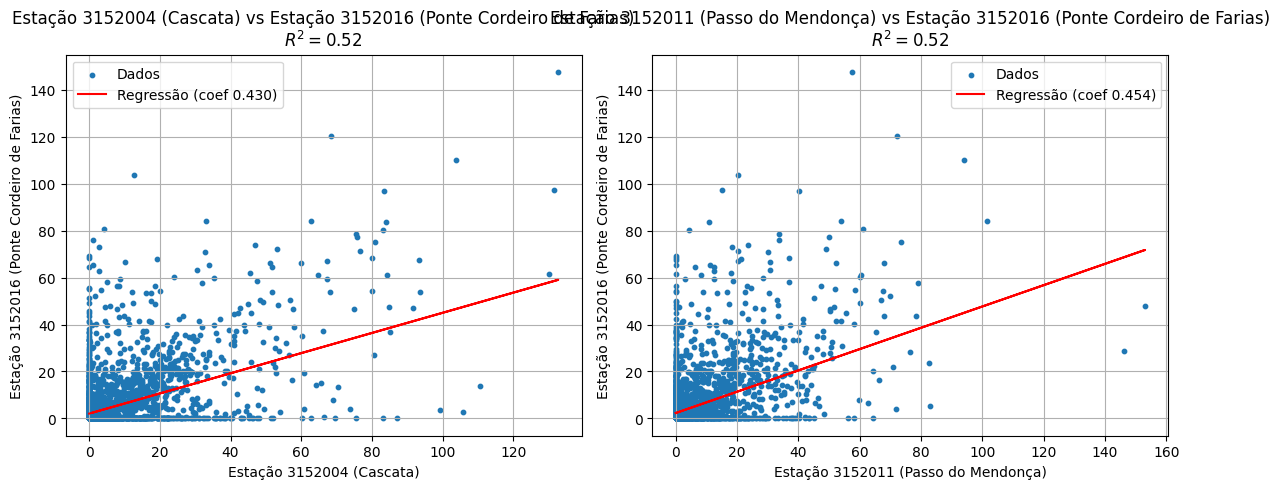

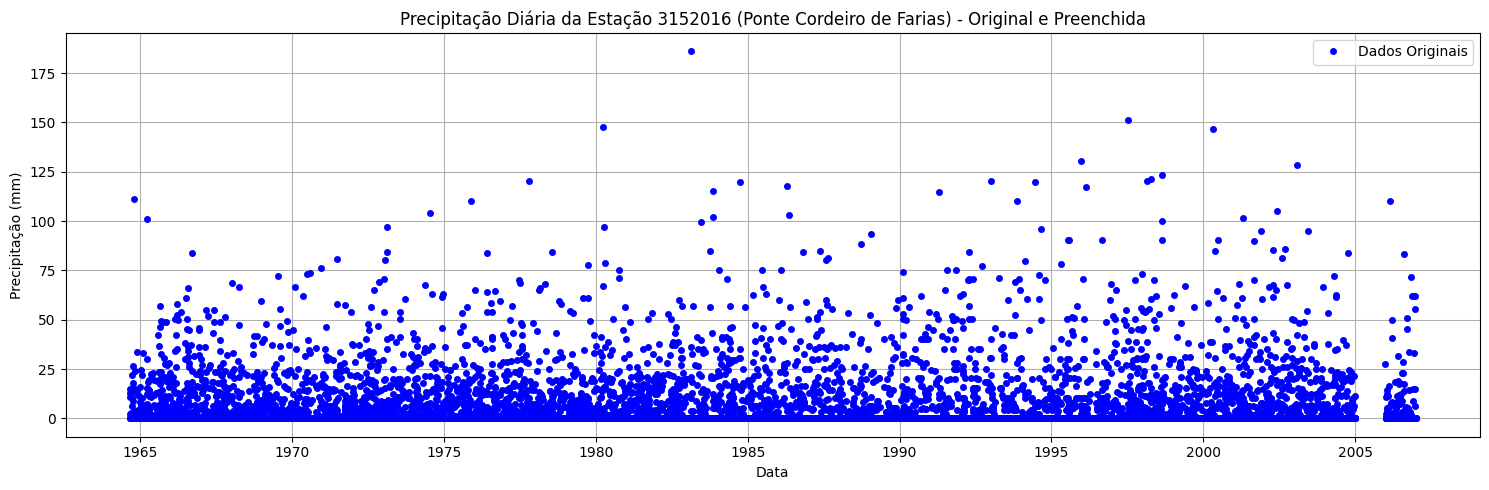

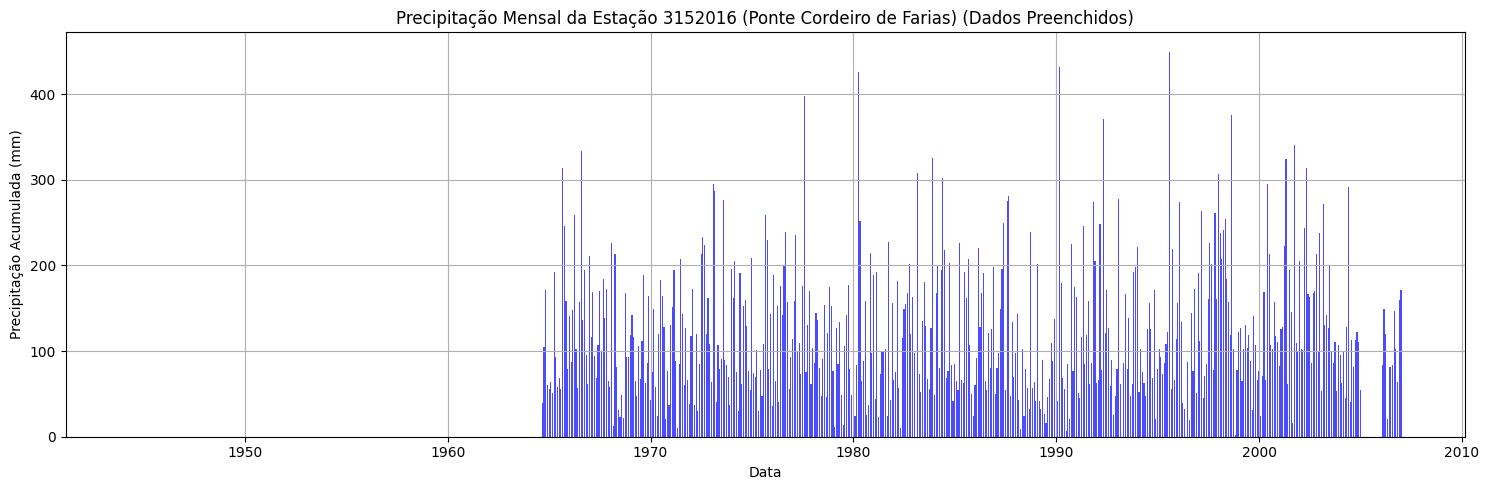

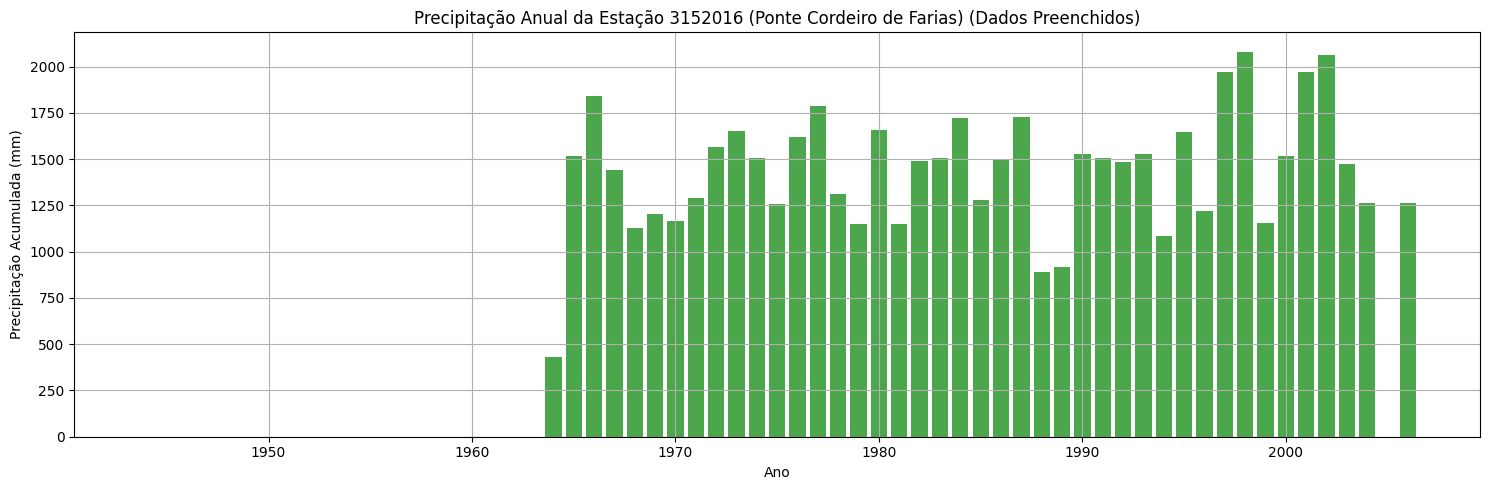

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Define os nomes dos arquivos e as estações, usando o caminho completo
file_names = {
    '3152004': f"{pasta_raiz}3152004_Chuvas.csv",
    '3152011': f"{pasta_raiz}3152011_Chuvas.csv",
    '3152016': f"{pasta_raiz}3152016_Chuvas.csv"
}
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

def process_file_to_daily_series(file_path, station_id):
    """
    Lê um CSV, converte dados mensais em diários e retorna uma série temporal.
    Esta versão corrige o problema da ordem cronológica inversa no arquivo.
    """
    try:
        df = pd.read_csv(file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
        return pd.Series(dtype='float64')

    # O arquivo está em ordem cronológica inversa, então inverte-o
    df = df.iloc[::-1].copy()

    # Filtra por NivelConsistencia, priorizando 2 sobre 1
    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2].copy()
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1].copy()
    else:
        print(f"Aviso: Nenhum nível de consistência válido encontrado para a estação {station_names[station_id]}. O DataFrame estará vazio.")
        return pd.Series(dtype='float64')

    # Prepara para a conversão de formato (melt)
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Data'])
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month

    # Converte as colunas de chuva diária para um formato longo
    chuva_cols = [f'Chuva{i:02d}' for i in range(1, 32)]
    df_melted = df.melt(
        id_vars=['EstacaoCodigo', 'Ano', 'Mes'],
        value_vars=chuva_cols,
        var_name='DiaStr',
        value_name='Precipitacao'
    )

    # Cria a data completa
    df_melted['Dia'] = df_melted['DiaStr'].str.replace('Chuva', '').astype(int)
    df_melted['DataCompleta'] = pd.to_datetime(
        df_melted[['Ano', 'Mes', 'Dia']].rename(columns={'Ano': 'year', 'Mes': 'month', 'Dia': 'day'}),
        errors='coerce'
    )

    # Cria a série temporal final e remove valores nulos
    series = df_melted.set_index('DataCompleta')['Precipitacao'].sort_index()
    series = series.dropna()

    return series

# Processa os três arquivos
series_ponte = process_file_to_daily_series(file_names['3152016'], '3152016')
series_cascata = process_file_to_daily_series(file_names['3152004'], '3152004')
series_terceira = process_file_to_daily_series(file_names['3152011'], '3152011')

# Imprime os intervalos de datas das séries para verificação
print("📅 Intervalo de Datas da Estação Ponte (3152016):")
print(f"Início: {series_ponte.index.min()}, Fim: {series_ponte.index.max()}")
print("\n📅 Intervalo de Datas da Estação Cascata (3152004):")
print(f"Início: {series_cascata.index.min()}, Fim: {series_cascata.index.max()}")
print("\n📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):")
print(f"Início: {series_terceira.index.min()}, Fim: {series_terceira.index.max()}")

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
}).dropna(how='all')

# Função para preencher falhas com regressão múltipla
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('ME').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('YE').sum()

# Função para calcular estatísticas
def estatisticas(s):
    s_limpa = s.dropna()
    return pd.Series({
        'Média': s_limpa.mean(),
        'Mediana': s_limpa.median(),
        'Máximo': s_limpa.max(),
        'Mínimo': s_limpa.min(),
        'Desvio Padrão': s_limpa.std(),
        'Total acumulado': s_limpa.sum()
    })

print("\n📊 Estatísticas - Série Diária Original (Ponte):")
print(estatisticas(df_combined['ponte']))

print("\n📊 Estatísticas - Série Diária Preenchida (Ponte):")
print(estatisticas(series_ponte_preenchida))

print("\n📊 Estatísticas - Série Mensal Preenchida (Ponte):")
print(estatisticas(serie_mensal_preenchida))

print("\n📊 Estatísticas - Série Anual Preenchida (Ponte):")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas
falhas_totais = df_combined['ponte'].isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# Plotagem dos gráficos
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~df_combined['cascata'].isna()) & (~df_combined['terceira'].isna()) & (~df_combined['ponte'].isna())

    x1_masked = df_combined['cascata'][mask].values.reshape(-1, 1)
    x2_masked = df_combined['terceira'][mask].values.reshape(-1, 1)
    y_masked = df_combined['ponte'][mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo_regressao.score(treino_mul, y_masked)

    x2_mean = np.full_like(x1_masked, df_combined['terceira'][mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo_regressao.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo_regressao.coef_[0]:.3f})')
    axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(station_names["3152004"])
    axs[0].set_ylabel(station_names["3152016"])
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, df_combined['cascata'][mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo_regressao.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo_regressao.coef_[1]:.3f})')
    axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(station_names["3152011"])
    axs[1].set_ylabel(station_names["3152016"])
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig('regressao_multipla.png')

plt.figure(figsize=(15, 5))
df_plot_diaria = pd.DataFrame({
    'original': df_combined['ponte'],
    'preenchida': series_ponte_preenchida
}).dropna(how='all')

plt.plot(df_plot_diaria['original'].dropna().index, df_plot_diaria['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

preenchidos_apenas = df_plot_diaria[(df_plot_diaria['original'].isna()) & (~df_plot_diaria['preenchida'].isna())]['preenchida']
if not preenchidos_apenas.empty:
    plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

plt.title(f'Precipitação Diária da {station_names["3152016"]} - Original e Preenchida')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_diaria_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_mensal_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_anual_preenchida.index.year, serie_anual_preenchida, color='green', alpha=0.7)
plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Ano')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_anual_preenchida.png')

📅 Intervalo de Datas da Estação Ponte (3152016):
Início: 1964-08-27 00:00:00, Fim: 2006-12-31 00:00:00

📅 Intervalo de Datas da Estação Cascata (3152004):
Início: 1967-01-01 00:00:00, Fim: 1981-04-30 00:00:00

📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):
Início: 1944-04-01 00:00:00, Fim: 2006-12-31 00:00:00

📊 Estatísticas - Série Diária Original (Ponte):
Média                  4.025687
Mediana                0.000000
Máximo               186.100000
Mínimo                 0.000000
Desvio Padrão         11.899854
Total acumulado    60494.000000
dtype: float64

📊 Estatísticas - Série Diária Preenchida (Ponte):
Média                  4.025687
Mediana                0.000000
Máximo               186.100000
Mínimo                 0.000000
Desvio Padrão         11.899854
Total acumulado    60494.000000
dtype: float64

📊 Estatísticas - Série Mensal Preenchida (Ponte):
Média                 80.337317
Mediana               63.600000
Máximo               449.500000
Mínimo        

/tmp/ipython-input-3495326831.py:115: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-3495326831.py:116: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



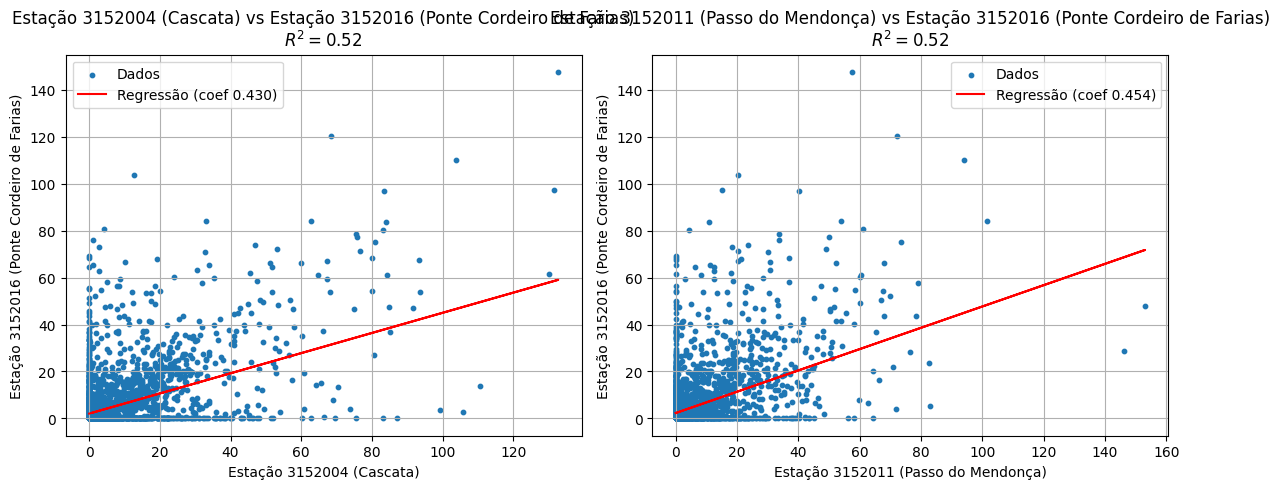

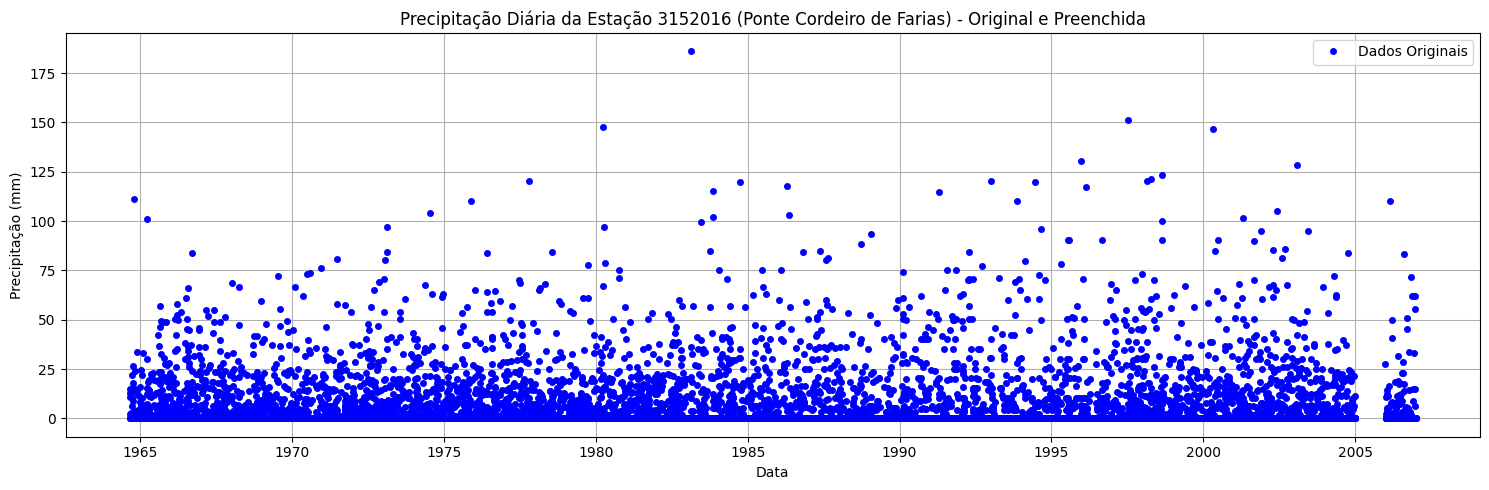

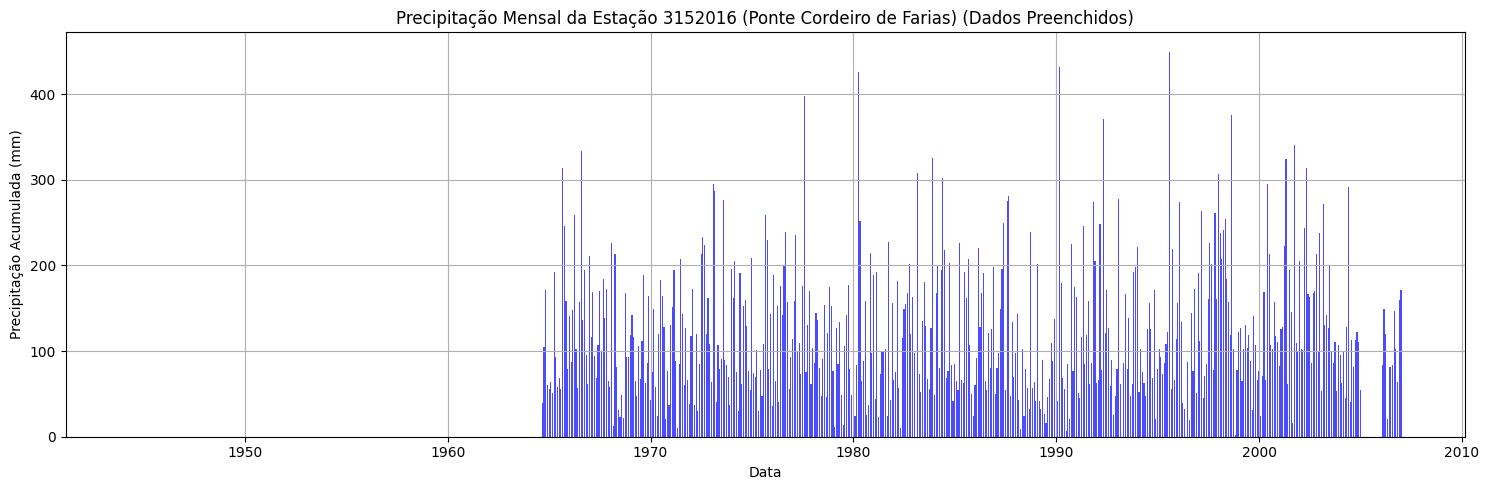

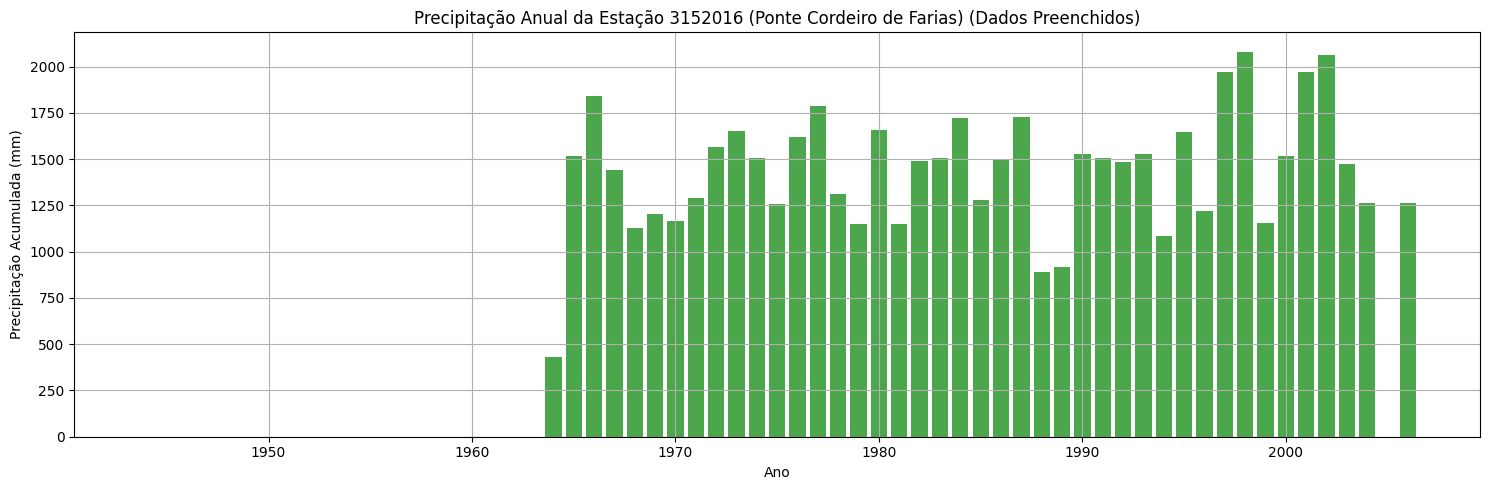

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define a pasta raiz onde os arquivos estão localizados
pasta_raiz = '/content/drive/MyDrive/hidrologia/precipitacao/'

# Define os nomes dos arquivos e as estações, usando o caminho completo
file_names = {
    '3152004': f"{pasta_raiz}3152004_Chuvas.csv",
    '3152011': f"{pasta_raiz}3152011_Chuvas.csv",
    '3152016': f"{pasta_raiz}3152016_Chuvas.csv"
}
station_names = {
    '3152004': 'Estação 3152004 (Cascata)',
    '3152011': 'Estação 3152011 (Passo do Mendonça)',
    '3152016': 'Estação 3152016 (Ponte Cordeiro de Farias)'
}

def process_file_to_daily_series(file_path, station_id):
    """
    Lê um CSV, converte dados mensais em diários e retorna uma série temporal.
    Esta versão corrige o problema da ordem cronológica inversa no arquivo.
    """
    try:
        df = pd.read_csv(file_path, sep=';', skiprows=13, encoding='latin1', decimal=',')
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
        return pd.Series(dtype='float64')

    # O arquivo está em ordem cronológica inversa, então inverte-o
    df = df.iloc[::-1].copy()

    # Filtra por NivelConsistencia, priorizando 2 sobre 1
    niveis = df['NivelConsistencia'].unique()
    if 2 in niveis:
        df = df[df['NivelConsistencia'] == 2].copy()
    elif 1 in niveis:
        df = df[df['NivelConsistencia'] == 1].copy()
    else:
        print(f"Aviso: Nenhum nível de consistência válido encontrado para a estação {station_names[station_id]}. O DataFrame estará vazio.")
        return pd.Series(dtype='float64')

    # Prepara para a conversão de formato (melt)
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Data'])
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month

    # Converte as colunas de chuva diária para um formato longo
    chuva_cols = [f'Chuva{i:02d}' for i in range(1, 32)]
    df_melted = df.melt(
        id_vars=['EstacaoCodigo', 'Ano', 'Mes'],
        value_vars=chuva_cols,
        var_name='DiaStr',
        value_name='Precipitacao'
    )

    # Cria a data completa
    df_melted['Dia'] = df_melted['DiaStr'].str.replace('Chuva', '').astype(int)
    df_melted['DataCompleta'] = pd.to_datetime(
        df_melted[['Ano', 'Mes', 'Dia']].rename(columns={'Ano': 'year', 'Mes': 'month', 'Dia': 'day'}),
        errors='coerce'
    )

    # Cria a série temporal final e remove valores nulos
    series = df_melted.set_index('DataCompleta')['Precipitacao'].sort_index()
    series = series.dropna()

    return series

# Processa os três arquivos
series_ponte = process_file_to_daily_series(file_names['3152016'], '3152016')
series_cascata = process_file_to_daily_series(file_names['3152004'], '3152004')
series_terceira = process_file_to_daily_series(file_names['3152011'], '3152011')

# Imprime os intervalos de datas das séries para verificação
print("📅 Intervalo de Datas da Estação Ponte (3152016):")
print(f"Início: {series_ponte.index.min()}, Fim: {series_ponte.index.max()}")
print("\n📅 Intervalo de Datas da Estação Cascata (3152004):")
print(f"Início: {series_cascata.index.min()}, Fim: {series_cascata.index.max()}")
print("\n📅 Intervalo de Datas da Estação Passo do Mendonça (3152011):")
print(f"Início: {series_terceira.index.min()}, Fim: {series_terceira.index.max()}")

# Alinha as séries para a regressão
df_combined = pd.DataFrame({
    'ponte': series_ponte,
    'cascata': series_cascata,
    'terceira': series_terceira
}).dropna(how='all')

# Função para preencher falhas com regressão múltipla
def preencher_regressao_multipla(s_alvo, s_viz1, s_viz2):
    df = pd.DataFrame({'alvo': s_alvo, 'viz1': s_viz1, 'viz2': s_viz2})

    treino_mul = df.dropna()
    modelo_mul = None
    if not treino_mul.empty:
        modelo_mul = LinearRegression()
        modelo_mul.fit(treino_mul[['viz1', 'viz2']], treino_mul['alvo'])

        faltantes_mul = df['alvo'].isna() & (~df['viz1'].isna()) & (~df['viz2'].isna())
        if faltantes_mul.any():
            df.loc[faltantes_mul, 'alvo'] = modelo_mul.predict(df.loc[faltantes_mul, ['viz1', 'viz2']])

    return df['alvo'], modelo_mul

# Preenche a série da Estação Ponte
series_ponte_preenchida, modelo_regressao = preencher_regressao_multipla(
    df_combined['ponte'], df_combined['cascata'], df_combined['terceira']
)

# Cria as séries mensais e anuais a partir da série preenchida
serie_mensal_preenchida = series_ponte_preenchida.resample('M').sum()
serie_anual_preenchida = series_ponte_preenchida.resample('A').sum()

# Função para calcular estatísticas
def estatisticas(s):
    s_limpa = s.dropna()
    return pd.Series({
        'Média': s_limpa.mean(),
        'Mediana': s_limpa.median(),
        'Máximo': s_limpa.max(),
        'Mínimo': s_limpa.min(),
        'Desvio Padrão': s_limpa.std(),
        'Total acumulado': s_limpa.sum()
    })

print("\n📊 Estatísticas - Série Diária Original (Ponte):")
print(estatisticas(df_combined['ponte']))

print("\n📊 Estatísticas - Série Diária Preenchida (Ponte):")
print(estatisticas(series_ponte_preenchida))

print("\n📊 Estatísticas - Série Mensal Preenchida (Ponte):")
print(estatisticas(serie_mensal_preenchida))

print("\n📊 Estatísticas - Série Anual Preenchida (Ponte):")
print(estatisticas(serie_anual_preenchida))

# Diagnóstico de falhas
falhas_totais = df_combined['ponte'].isna().sum()
falhas_remanescentes = series_ponte_preenchida.isna().sum()
falhas_preenchidas = falhas_totais - falhas_remanescentes

print(f"\nTotal de falhas originais: {falhas_totais}")
print(f"Total de falhas preenchidas: {falhas_preenchidas}")
if falhas_remanescentes > 0:
    print(f"Atenção: A regressão não conseguiu preencher {falhas_remanescentes} falhas.")

# Plotagem dos gráficos
if modelo_regressao:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    mask = (~df_combined['cascata'].isna()) & (~df_combined['terceira'].isna()) & (~df_combined['ponte'].isna())

    x1_masked = df_combined['cascata'][mask].values.reshape(-1, 1)
    x2_masked = df_combined['terceira'][mask].values.reshape(-1, 1)
    y_masked = df_combined['ponte'][mask].values

    treino_mul = pd.DataFrame({'viz1': x1_masked.flatten(), 'viz2': x2_masked.flatten()})
    r2_score = modelo_regressao.score(treino_mul, y_masked)

    x2_mean = np.full_like(x1_masked, df_combined['terceira'][mask].mean())
    X_pred1 = np.c_[x1_masked, x2_mean]
    y_pred1 = modelo_regressao.predict(X_pred1)

    axs[0].scatter(x1_masked, y_masked, label='Dados', s=10)
    axs[0].plot(x1_masked, y_pred1, color='red', label=f'Regressão (coef {modelo_regressao.coef_[0]:.3f})')
    axs[0].set_title(f'{station_names["3152004"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[0].set_xlabel(station_names["3152004"])
    axs[0].set_ylabel(station_names["3152016"])
    axs[0].legend()
    axs[0].grid(True)

    x1_mean = np.full_like(x2_masked, df_combined['cascata'][mask].mean())
    X_pred2 = np.c_[x1_mean, x2_masked]
    y_pred2 = modelo_regressao.predict(X_pred2)

    axs[1].scatter(x2_masked, y_masked, label='Dados', s=10)
    axs[1].plot(x2_masked, y_pred2, color='red', label=f'Regressão (coef {modelo_regressao.coef_[1]:.3f})')
    axs[1].set_title(f'{station_names["3152011"]} vs {station_names["3152016"]}\n$R^2 = {r2_score:.2f}$')
    axs[1].set_xlabel(station_names["3152011"])
    axs[1].set_ylabel(station_names["3152016"])
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig('regressao_multipla.png')

plt.figure(figsize=(15, 5))
df_plot_diaria = pd.DataFrame({
    'original': df_combined['ponte'],
    'preenchida': series_ponte_preenchida
}).dropna(how='all')

plt.plot(df_plot_diaria['original'].dropna().index, df_plot_diaria['original'].dropna(), 'bo', markersize=4, label='Dados Originais', zorder=3)

preenchidos_apenas = df_plot_diaria[(df_plot_diaria['original'].isna()) & (~df_plot_diaria['preenchida'].isna())]['preenchida']
if not preenchidos_apenas.empty:
    plt.plot(preenchidos_apenas.index, preenchidos_apenas, 'go', markersize=4, label='Preenchido', zorder=2)

plt.title(f'Precipitação Diária da {station_names["3152016"]} - Original e Preenchida')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_diaria_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_mensal_preenchida.index, serie_mensal_preenchida, width=20, color='blue', alpha=0.7)
plt.title(f'Precipitação Mensal da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Data')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_mensal_preenchida.png')

plt.figure(figsize=(15, 5))
plt.bar(serie_anual_preenchida.index.year, serie_anual_preenchida, color='green', alpha=0.7)
plt.title(f'Precipitação Anual da {station_names["3152016"]} (Dados Preenchidos)')
plt.xlabel('Ano')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('precipitacao_anual_preenchida.png')